In [1]:
from PIL import Image
import pytesseract
import argparse
import cv2
import os
from pdf2image import convert_from_path
import pandas as pd
#import pdf2image

# Part #1 : Converting PDF to images 

In [18]:
# Path of the pdf 
PDF_file = '../VIM/invoices/all/'
  
''' 
Part #1 : Converting PDF to images 
'''
  
# Store all the pages of the PDF in a variable 
for filename in os.listdir(PDF_file):
    if filename.endswith('.pdf') : 
        print(filename)
        #print(os.path.join(PDF_file, filename))    
        pages = convert_from_path(os.path.join(PDF_file,filename), 500)
        print(type(pages))
    # Counter to store images of each page of PDF to image 
        image_counter = 1

        # Iterate through all the pages stored above 
        for page in pages: 

            # Declaring filename for each page of PDF as JPG 
            # For each page, filename will be: 
            # PDF page 1 -> page_1.jpg 
            # PDF page 2 -> page_2.jpg 
            # PDF page 3 -> page_3.jpg 
            # .... 
            # PDF page n -> page_n.jpg 
            imagename = filename.split('.')[0]+'_'+str(image_counter)+'.jpg'

            # Save the image of the page in system 
            page.save(PDF_file+imagename, 'JPEG') 

            # Increment the counter to update filename 
            image_counter = image_counter + 1

0117002202.pdf
<class 'list'>
0117004018.pdf
<class 'list'>
0117008107.pdf
<class 'list'>
0117037839.pdf
<class 'list'>
0117076752.pdf
<class 'list'>
0117110990.pdf
<class 'list'>
0117110992.pdf
<class 'list'>
0117110993.pdf
<class 'list'>
0117121504.pdf
<class 'list'>
0117121505.pdf
<class 'list'>
0118001018.pdf
<class 'list'>
0118002664.pdf
<class 'list'>
0118004833.pdf
<class 'list'>
0118008775.pdf
<class 'list'>
0118045531.pdf
<class 'list'>
0118046827.pdf
<class 'list'>
0118046874.pdf
<class 'list'>
0118046877.pdf
<class 'list'>
0118046879.pdf
<class 'list'>
0118047019.pdf
<class 'list'>
0118049345.pdf
<class 'list'>
0118052444.pdf
<class 'list'>
0118054322.pdf
<class 'list'>
0118054359.pdf
<class 'list'>
0118054857.pdf
<class 'list'>
0118055518.pdf
<class 'list'>
0118055982.pdf
<class 'list'>
0118056537.pdf
<class 'list'>
0118057219.pdf
<class 'list'>
0118058443.pdf
<class 'list'>
0118058557.pdf
<class 'list'>
0118058835.pdf
<class 'list'>
0118058949.pdf
<class 'list'>
0118058950

In [ ]:
"""from wand.image import Image

f = "UK_PO_CEB_UK_IDEA2.pdf"
with(Image(filename=f, resolution=120)) as source: 
    images = source.sequence
    pages = len(images)
    for i in range(pages):
        n = i + 1
        newfilename = f[:-4] + str(n) + '.jpeg'
        Image(images[i]).save(filename=newfilename)"""

# Part 2 Processing pdfimages

In [5]:
#text1 = pytesseract.image_to_string(Image.open("GST_INVOICE2_1.jpg"))
#text2 = pytesseract.image_to_string(Image.open("GST_INVOICE3_1.jpg"))

#text1 = pytesseract.image_to_string("GST_INVOICE2_1.jpg", lang='eng', config='--psm 4')
#text2 = pytesseract.image_to_string("GST_INVOICE3_1.jpg", lang='eng', config='--psm 4')
filepath='../VIM/invoices/all/'
invoiceD={}
for filename in os.listdir(filepath):
    if filename.endswith('.jpg') : 
        text=pytesseract.image_to_string(filepath+filename, lang='eng', config='--psm 4')
        invoiceD[filename.split('.')[0]]=text
data=pd.DataFrame(list(invoiceD.items()), columns=["Invoice","Text"])
data.to_csv("data.csv",sep=',',index=False)

In [10]:
print(text1)

ABC AUTOMOTIVE PRODUCTS

GOLDEN INDUSTRIAL ESTATE - 1 PLOT NO 68 SHAPAR RAJKOT
EMAIL : abcautomotive@gmail.nom PHN : 02827 297236

Debit Memo TAX INVOICE Original

XYZ Global Pvt Ltd Invoice No. : MR109
AJI GIDC OPP SWAGAT WEIGH, BRIDGE GIDC "N" |Date : 06/12/2018

PLOT NO 346

RAJKOT - 360003 | PO NO. : 7445336989.01
Place of Supply : 24-Gujarat PO DATE. : 25/04/2018
GSTIN No. : 24AACCG 1233C1ZF

HSN/SAC GST %
CYLINDER LINER 5569 84199949 2106 28.00% 452790

CYLINDER LINER 5896 84099949 1670 28.00% 472610
GSTIN No : 24AAVFN2183P1Z1 3776 Sub Total 925400

Bank Name : STATE BANK OF INDIA
Bank A/C NO. : 32907101389
RTGS/1FSC Code : SBIN0060344

Taxable Amount 925400
CGST 14.00% 129556
Total GST : Two Lakh Fifty Nine Thousand One Hundred Twelve Only SCSI 14.00% 129556
Bill Amount : Eleven Lakh Eighty Four Thousand Five Hundred Twelve Only

Grand Total 11,84,512


In [26]:
type(text)

str

In [7]:
text2 = pytesseract.image_to_string(Image.open("page_2.jpg"))

In [8]:
print(text2)

Quantity

Description Unit Unit Price Amount
Fingerprint Scanner Pro Sense X-I PC £34.50 £69.00
Notebook WebCam PC £120.00 £600.00
Touchscreen Display (Multi Touch) PC £51.00 £408.00


In [27]:
text

'To:\nInnovate UK LTD.\nDashwood House\n\nLondon\nEC2M 1QS\n\nQuantity Description\n2 Fingerprint Scanner Pro Sense X-I\n5 Notebook WebCam\n8 Touchscreen Display (Multi Touch)\n\nC.E.B. UK Ltd.\n\n3, Johnson Road\nLondon, EC1V OBN\nTel: +44 20189291\n\nInvoice\n\nInvoice date: 28/08/2019\nInvoice Number: GH12345\nPayment Terms: 30 days\nDue Date: 27/09/2019\nCurrency: GBP\n\nPO No.: 4500000873\n\nShip to:\n\nInnovate UK LTD.\nDashwood House\nLondon\n\nEC2M 1QS\n\nUnit Unit Price\nPC £34.50\nPC £120.00\nPC £51.00\n\nHandling costs\nFreight expenses\n\nNet\nVAT 20 %\n\nTotal\n\nBank: — Royal Bank of Scotland Plc IBAN: GB35CITI1 8500807678686 VAT Reg. No.: GB591819014\n\nEmail: — http: info@ceb-online.uk\n\nAmount\n\n£69.00\n£600.00\n£408.00\n\n£0.00\n£0.00\n\n£1,077.00\n£215.40\n\n£1,292.40'

# Processing image to find table

In [3]:
import os
import cv2
import imutils

# This only works if there's only one table on a page
# Important parameters:
#  - morph_size
#  - min_text_height_limit
#  - max_text_height_limit
#  - cell_threshold
#  - min_columns


def pre_process_image(img, save_in_file, morph_size=(8, 8)):

    # get rid of the color
    pre = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Otsu threshold
    pre = cv2.threshold(pre, 250, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
    # dilate the text to make it solid spot
    cpy = pre.copy()
    struct = cv2.getStructuringElement(cv2.MORPH_RECT, morph_size)
    cpy = cv2.dilate(~cpy, struct, anchor=(-1, -1), iterations=1)
    pre = ~cpy

    if save_in_file is not None:
        cv2.imwrite(save_in_file, pre)
    return pre


def find_text_boxes(pre, min_text_height_limit=6, max_text_height_limit=100):
    # Looking for the text spots contours
    # OpenCV 3
    img, contours, hierarchy = cv2.findContours(pre, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    # OpenCV 4
    #contours, hierarchy = cv2.findContours(pre, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

    # Getting the texts bounding boxes based on the text size assumptions
    boxes = []
    for contour in contours:
        box = cv2.boundingRect(contour)
        h = box[3]

        if min_text_height_limit < h < max_text_height_limit:
            boxes.append(box)

    return boxes


def find_table_in_boxes(boxes, cell_threshold=10, min_columns=2):
    rows = {}
    cols = {}

    # Clustering the bounding boxes by their positions
    for box in boxes:
        (x, y, w, h) = box
        col_key = x // cell_threshold
        row_key = y // cell_threshold
        cols[row_key] = [box] if col_key not in cols else cols[col_key] + [box]
        rows[row_key] = [box] if row_key not in rows else rows[row_key] + [box]

    # Filtering out the clusters having less than 2 cols
    table_cells = list(filter(lambda r: len(r) >= min_columns, rows.values()))
    # Sorting the row cells by x coord
    table_cells = [list(sorted(tb)) for tb in table_cells]
    # Sorting rows by the y coord
    table_cells = list(sorted(table_cells, key=lambda r: r[0][1]))

    return table_cells


def build_lines(table_cells):
    if table_cells is None or len(table_cells) <= 0:
        return [], []

    max_last_col_width_row = max(table_cells, key=lambda b: b[-1][2])
    max_x = max_last_col_width_row[-1][0] + max_last_col_width_row[-1][2]

    max_last_row_height_box = max(table_cells[-1], key=lambda b: b[3])
    max_y = max_last_row_height_box[1] + max_last_row_height_box[3]

    hor_lines = []
    ver_lines = []

    for box in table_cells:
        x = box[0][0]
        y = box[0][1]
        hor_lines.append((x, y, max_x, y))

    for box in table_cells[0]:
        x = box[0]
        y = box[1]
        ver_lines.append((x, y, x, max_y))

    (x, y, w, h) = table_cells[0][-1]
    ver_lines.append((max_x, y, max_x, max_y))
    (x, y, w, h) = table_cells[0][0]
    hor_lines.append((x, max_y, max_x, max_y))

    return hor_lines, ver_lines

In [5]:

in_file = os.path.join("../", "page_1.jpg")
pre_file = os.path.join("../VIM/", "pre.png")
out_file = os.path.join("../VIM/", "out.png")

img = cv2.imread(os.path.join("page_1.jpg"))

pre_processed = pre_process_image(img, pre_file)
text_boxes = find_text_boxes(pre_processed)
cells = find_table_in_boxes(text_boxes)
hor_lines, ver_lines = build_lines(cells)

# Visualize the result
vis = img.copy()

# for box in text_boxes:
#     (x, y, w, h) = box
#     cv2.rectangle(vis, (x, y), (x + w - 2, y + h - 2), (0, 255, 0), 1)

for line in hor_lines:
    [x1, y1, x2, y2] = line
    cv2.line(vis, (x1, y1), (x2, y2), (0, 0, 255), 1)

for line in ver_lines:
    [x1, y1, x2, y2] = line
    cv2.line(vis, (x1, y1), (x2, y2), (0, 0, 255), 1)

cv2.imwrite(out_file, vis)

True

In [40]:
#cv2.imshow("output",vis)

# Processing image to find horizontal lines

In [24]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math
%matplotlib inline

In [12]:
img = cv2.imread(os.path.join("page_1.jpg"))
# get rid of the color
pre = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Otsu threshold
pre = cv2.threshold(pre, 250, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
# dilate the text to make it solid spot
cpy = pre.copy()
struct = cv2.getStructuringElement(cv2.MORPH_RECT, (8,8))
cpy = cv2.dilate(~cpy, struct, anchor=(-1, -1), iterations=1)
pre = ~cpy

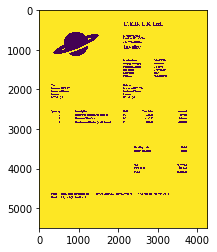

In [16]:
plt.imshow(pre)

In [20]:
lines = cv2.HoughLinesP(image=pre, rho=1, theta=np.pi / 180, threshold=100,minLineLength=100, maxLineGap=0)

In [21]:
for i in range(0, len(lines)):
    for x1, y1, x2, y2 in lines[i]:
        cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

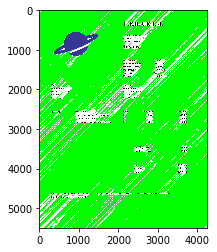

In [22]:
plt.imshow(img)

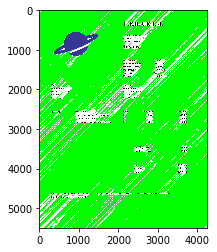

In [25]:
edges = cv2.Canny(pre, 80, 120)
lines = cv2.HoughLinesP(edges, 1, math.pi/2, 2, None, 30, 1);
for line in lines[0]:
    pt1 = (line[0],line[1])
    pt2 = (line[2],line[3])
    cv2.line(img, pt1, pt2, (0,0,255), 3)
plt.imshow(img)

# working with different tesseract parameters

In [17]:
from PIL import Image
import pytesseract
import argparse
import cv2
import os
from pdf2image import convert_from_path


In [80]:
text1 = pytesseract.image_to_string("../VIM/invoices/all/0118054857_1.jpg", lang='eng', config='--psm 1')
print(text1)
#text2 = pytesseract.image_to_string("GST_INVOICE3_1.jpg", lang='eng', config='--psm 4')

=)".
oF ;
‘ -

 

wil. ‘TAX INVOICE

(Issued under Rule 7 & Section 31 of CGST Act, 2017) ORIGINAL FOR RECIPIENT

AXIOM EV PRODUCTS PVT. LTD.

Plot No. 70,71, Road No. 3, Phase |, 1.D.A., Cherlapally, ® |
Hyderabad - 500 040, Telangana, India. Ir .
Tel : +91 40 2726 0555, Email :info@axiomevproducts.com -
5 ‘ we 2S
Website : www.axiomevproducts.com a
ae

CIN No. : U74900TG2012PTC084590 a
GSTINNo.  : 36AALCA1548D1ZV 11805485 /
PAN

: AALCA1548D
GST INVOICE NO. Invoice Date: 7
1300007708
Despatch Document No.
sememe |
GATI LTD

Date & Time of Issue of Invoice Motor Vehicle No.
24-09-2018 at 14:40:00 AP28U6915 |

Date & Time of Removal of Goods __| Gross Weight .
24-09-2018 at 18:00:00 97.50

Net Weight |
0.00

 

 

    

Consignee

AMARA RAJA BATTERIES LTD - Haryana
Village dhumaspur 165/2/2/2/2,9/11

  
   
    
     

Haryana 122102
India

  
 
    

Contact : Phn. No:
GSTI No: - State Code:06

Buyer (if Other than Consignee)

AMARA RAJA BATTERIES LTD - Haryana
Village dhumaspur 165/2

In [18]:
text3 = pytesseract.image_to_string("page_1.jpg", lang='eng', config='--psm 4')


In [19]:
print(text3)

C.E.B. UK Ltd.

3, Johnson Road
London, EC1V OBN

Tel: +44 20189291

Invoice

Invoice date: 28/08/2019
Invoice Number: GH12345
Payment Terms: 30 days
Due Date: 27/09/2019
Currency: GBP
PO No.: 4500000873
To: Ship to:
Innovate UK LTD. Innovate UK LTD.
Dashwood House Dashwood House
London London
EC2M 1QS EC2M 1QS
Quantity Description Unit Unit Price
2 Fingerprint Scanner Pro Sense X-I PC £34.50
5 Notebook WebCam PC £120.00
8 Touchscreen Display (Multi Touch) PC £51.00

Bank: — Royal Bank of Scotland Plc
Email: — http: info@ceb-online.uk

Handling costs

Freight expenses

Net

VAT 20 %
Total

IBAN: GB35CITI1 8500807678686

VAT Reg. No.: GB591819014

Amount
£69.00

£600.00
£408.00

£0.00
£0.00

£1,077.00
£215.40

£1,292.40


# Sample Invoices

In [2]:
text = pytesseract.image_to_string("../VIM/invoices/invoice-legend.png", lang='eng', config='--psm 4')
text1 = pytesseract.image_to_string("../VIM/invoices/invoice2png.png", lang='eng', config='--psm 4')
text2 = pytesseract.image_to_string("../VIM/invoices/invoice3.png", lang='eng', config='--psm 4')
text3 = pytesseract.image_to_string("../VIM/invoices/invoice4.png", lang='eng', config='--psm 4')
text4 = pytesseract.image_to_string("../VIM/invoices/invoice5.png", lang='eng', config='--psm 4')
text5 = pytesseract.image_to_string("../VIM/invoices/invoice6.png", lang='eng', config='--psm 4')
text6 = pytesseract.image_to_string("../VIM/invoices/invoice7.png", lang='eng', config='--psm 4')

In [4]:
print(text)

TWILIO

u™ SendGrid

1801 California Street, Suite 500
Denver, Colorado 80202
Phone: +1 (877) 969-8647

INVOICE

SOLDTO INVOICE SUMMARY BILLING OVERVIEW
Hot Moose Web Design Invoice Date: Aug 01, 2019 Sub-Total: $239.95
55 Moostache Tri., Invoice Number: INV04389745

Vamomoose, Colorado 80202 ‘Account Number: 9421 421 Tax: $4,71
United States Payment Terms: Due Upon Receipt

Balance Due: $244.66
anomymoose@hotmoose.com

 

CHARGE SUMMARY
Charge Name Description Service Period Subtotal Tax Total

Contact List Storage Contact list database usage for SendGrid 07/01/2019-07/31/2019 $10.00 $0.43 $10.43

Marketing Campaigns - $10 per 10k contacts
Email Testing Credits 30 additional Email Testing credits per 08/01/2019-08/31/2019 $18.00 $0.78 $18.78
- 30 Credits/Mo month, used for inbox rendering and spam.

testing,
Marketing Campaigns Includes 5,000 Marketing Campaigns 07/01/2019-07/31/2019 $4.00 $0.17 $417
Basic 5K contacts and 15,000 Marketing Campaigns

email credits per month. $0.004 per

In [19]:
print(text2)

East Repair Inc. INVOICE

1912 Harvest Lane
New York, NY 12210

Bill To Ship To Invoice # us-001
John Smith John Smith Invoice Date 1102/2019
2 Court Square 3787 Pineview Drive
New York, NY 12210 Cambridge, MA 12210 Poe 2312/2019
Due Date 26/02/2019
ary DESCRIPTION UNIT PRICE ‘AMOUNT
1 Front and rear brake cables 100.00 100.00
2 | New set of pedal arms 15.00 30.00
3° | Labor 3hrs 5.00 15.00
Subtotal 145.00
Sales Tax 6.25% 9.06
TOTAL $154.06
Terms & Conditions

Payment is due within 15 days

Please make checks payable to: East Repair Inc.


In [20]:
print(text3)

ZYLKAR CORPORATION PRO FORMA INVOICE
1561 Appleview Town Invoice: #00121
Bakers Street July 21,2015
Chicago, IL 60411

 

Bill to: Ship To: Shipping Details:

Alistair Burke Angeline Campbell Freight Type Air

1156 High Street 6040 Bandini Blvd Est Ship Date July 27, 2015

Santa Cruz, CA 95064 Los Angeles, CA 92061 Est Gross Weight 300 kg

800-555-0121 888-555-2235 Total Packages 10

ID Product Description Qty Unit Price Amount (in USD)

1 Ream of Paper 5 $50 $250.00

2 Desk 5 $100 $500.00

3 Windows Workstation 5 $1000 $5000.00

Thank you for your business ! Subtotal $5750.00
Tax Rate 5.00%
Freight $100.00
ate) <-||

Signature / Stamp

Place:

Date

Powered by (RX! Invoice


In [21]:
print(text4)

CREDIT NOTE

#CN-17

Credits Remaining

$562.750
Zylker
7455 Drew Court
White City
Kansas
66872
USA
270-510-0585

Bill To

Rob & Joe Traders

4141 Hacienda Drive

Pleasanton Credit Date : 29 Jun 2018

94588 CA .
USA Refi : 321014

 

1 Brochure Design 1.00 300,000 300.000
Brochure Design Single Sided Color

2 Web Design Packages(Template) - Basic 1,00 250.000 250.000
Custom Themes for your business. Inclusive of 10 hours of
marketing and annual training

3 Print Ad - Basic - Color 1.00 80.000 80.000
Print Ad 1/8 size Color

Sub Total 630.000

Sample Tax! (4.70%) 11.750
Sample Tax2 (7.00%) 21.000
Total $662.750

Credits Used (-) 100.000
Credits Remaining $562.750

Notes

Thanks for your business.

Terms & Conditions

Your company's Terms and Conditions will be displayed here. You can add it in the Credit notes Preferences page under Settings.


In [22]:
print(text5)

& Pay Invoice Online Download PDF Questions about this invoice? Contact us
Acme, Inc. Invoice Number #1785439
103 Majestic Way
Raleigh, NC 27606 Issue Date 2018-02-01

Due Date 2018-02-01

Bill To: jo} U) $210.07

Nathanael Erdman
75839 Nolan Crossroad
North Lethamouth, TX 78205

Item Quantity Unit Price ‘Amount

Pro! 1 $99.00 $99.00
02/01/2018 - 03/01/2018

IP Addresses 10 $1.00 $10.00
Minutes? 1398 $0.10 $139.80
Subtotal $248.80
Discount(s) Applied:
Discounts ($38.73)
1. 25% Off Plan Fee $24.75 Total $210.07
2. 10% Off Minutes $13.98
Paid $0.00
Due $210.07

Payment History


In [24]:
type(text4)

str

# Named entity Recognition

In [41]:
!pip install spacy

In [42]:
!python -m spacy download en_core_web_sm

  Created wheel for en-core-web-sm: filename=en_core_web_sm-2.2.0-cp37-none-any.whl size=12019129 sha256=fca6d2510334b32016246682b50bd856d802a635cc7a6fe04cc4d7524ec073eb
  Stored in directory: C:\Users\RAJAT~1.CHA\AppData\Local\Temp\pip-ephem-wheel-cache-7pk6lebl\wheels\48\5c\1c\15f9d02afc8221a668d2172446dd8467b20cdb9aef80a172a4
Successfully built en-core-web-sm
  Found existing installation: en-core-web-sm 2.1.0
    Uninstalling en-core-web-sm-2.1.0:
      Successfully uninstalled en-core-web-sm-2.1.0
[+] Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [68]:
!python -m spacy download en_core_web_md

  Created wheel for en-core-web-md: filename=en_core_web_md-2.2.0-cp37-none-any.whl size=98072938 sha256=cce1048767e955a61d9e3dae5de3d37b45f1754f2b3f2b5294f76c8c0bdcffee
  Stored in directory: C:\Users\RAJAT~1.CHA\AppData\Local\Temp\pip-ephem-wheel-cache-epn8x0i1\wheels\5f\3e\c9\36dd6e13b449fd84cd1f94b72dfbc559daf09f53dbf4e697a3
Successfully built en-core-web-md
[+] Download and installation successful
You can now load the model via spacy.load('en_core_web_md')


In [ ]:
!python -m spacy download en_core_web_lg

In [3]:
!python -m spacy link en_core_web_md en

symbolic link created for C:\D\Installations\Anaconda\lib\site-packages\spacy\data\en <<===>> C:\D\Installations\Anaconda\lib\site-packages\en_core_web_md
[+] Linking successful
C:\D\Installations\Anaconda\lib\site-packages\en_core_web_md -->
C:\D\Installations\Anaconda\lib\site-packages\spacy\data\en
You can now load the model via spacy.load('en')


In [1]:
from PIL import Image
import pytesseract
import argparse
import cv2
import os
from pdf2image import convert_from_path
import nltk
import spacy
from spacy.gold import GoldParse 
from spacy.language import EntityRecognizer 
from spacy import displacy

In [2]:
nlp = spacy.load('en_core_web_md') #en_core_web_sm

In [13]:
p=nlp(text1)

In [16]:
print(text1)

ABC AUTOMOTIVE PRODUCTS

GOLDEN INDUSTRIAL ESTATE - 1 PLOT NO 68 SHAPAR RAJKOT
EMAIL : abcautomotive@gmail.nom PHN : 02827 297236

Debit Memo TAX INVOICE Original

XYZ Global Pvt Ltd Invoice No. : MR109
AJI GIDC OPP SWAGAT WEIGH, BRIDGE GIDC "N" |Date : 06/12/2018

PLOT NO 346

RAJKOT - 360003 | PO NO. : 7445336989.01
Place of Supply : 24-Gujarat PO DATE. : 25/04/2018
GSTIN No. : 24AACCG 1233C1ZF

HSN/SAC GST %
CYLINDER LINER 5569 84199949 2106 28.00% 452790

CYLINDER LINER 5896 84099949 1670 28.00% 472610
GSTIN No : 24AAVFN2183P1Z1 3776 Sub Total 925400

Bank Name : STATE BANK OF INDIA
Bank A/C NO. : 32907101389
RTGS/1FSC Code : SBIN0060344

Taxable Amount 925400
CGST 14.00% 129556
Total GST : Two Lakh Fifty Nine Thousand One Hundred Twelve Only SCSI 14.00% 129556
Bill Amount : Eleven Lakh Eighty Four Thousand Five Hundred Twelve Only

Grand Total 11,84,512


In [14]:
displacy.render(p, style='ent', jupyter=True) 
for ent in p.ents:
    print(ent.text, ent.label_)

ABC AUTOMOTIVE PRODUCTS ORG
68 CARDINAL
297236 DATE
MR109
AJI GIDC OPP SWAGAT WEIGH ORG
346 CARDINAL
PO ORG
7445336989.01 CARDINAL
24-Gujarat CARDINAL
PO FAC
25/04/2018 DATE
24AACCG CARDINAL
28.00% PERCENT
452790 DATE
5896 84099949 DATE
1670 DATE
28.00% PERCENT
472610 DATE
24AAVFN2183P1Z1 3776 CARDINAL
STATE BANK OF INDIA
Bank A/C NO ORG
32907101389 CARDINAL
14.00% PERCENT
129556 DATE
Two CARDINAL
One Hundred CARDINAL
Only SCSI PERCENT
14.00% PERCENT
129556 DATE
Eleven CARDINAL


In [15]:
for q in p.ents: 
    print(q.text, q.start_char, q.end_char, q.label_)

ABC AUTOMOTIVE PRODUCTS 0 23 ORG
68 62 64 CARDINAL
297236 123 129 DATE
MR109
AJI GIDC OPP SWAGAT WEIGH 197 228 ORG
346 274 277 CARDINAL
PO 297 299 ORG
7445336989.01 306 319 CARDINAL
24-Gujarat 338 348 CARDINAL
PO 349 351 FAC
25/04/2018 360 370 DATE
24AACCG 383 390 CARDINAL
28.00% 449 455 PERCENT
452790 456 462 DATE
5896 84099949 479 492 DATE
1670 493 497 DATE
28.00% 498 504 PERCENT
472610 505 511 DATE
24AAVFN2183P1Z1 3776 523 543 CARDINAL
STATE BANK OF INDIA
Bank A/C NO 574 605 ORG
32907101389 609 620 CARDINAL
14.00% 678 684 PERCENT
129556 685 691 DATE
Two 704 707 CARDINAL
One Hundred 733 744 CARDINAL
Only SCSI 752 761 PERCENT
14.00% 762 768 PERCENT
129556 769 775 DATE
Eleven 790 796 CARDINAL


In [ ]:
nlp = spacy.load('en', entity = False, parser = False) 

doc_list = [] 
doc = nlp(text1) 
doc_list.append(p) 
gold_list = [] 
gold_list.append(GoldParse(p, [u'ANIMAL', u'O', u'O', u'O'])) 

ner = EntityRecognizer(nlp.vocab, entity_types = ['ANIMAL']) 
ner.update(doc_list, gold_list) 


# Custom NER tagging

In [2]:
from PIL import Image
import pytesseract
import argparse
import cv2
import os
from pdf2image import convert_from_path
import nltk
import spacy
from spacy.gold import GoldParse 
from spacy.language import EntityRecognizer 
from spacy import displacy
import pandas as pd
nlp = spacy.load('en_core_web_md')

In [62]:
pd.set_option('display.max_colwidth', -1)

NameError: name 'pd' is not defined

In [26]:
#nlp = spacy.load('en_core_web_lg')

In [71]:
text1 = pytesseract.image_to_string("../VIM/invoices/all/0117002202_2.jpg", lang='eng', config='--psm 6')

In [4]:
text = pytesseract.image_to_string("../VIM/invoices/invoice-legend.png", lang='eng', config='--psm 4')
#text1 = pytesseract.image_to_string("../VIM/invoices/invoice2png.png", lang='eng', config='--psm 4')
text2 = pytesseract.image_to_string("../VIM/invoices/invoice3.png", lang='eng', config='--psm 4')
text3 = pytesseract.image_to_string("../VIM/invoices/invoice4.png", lang='eng', config='--psm 4')
text4 = pytesseract.image_to_string("../VIM/invoices/invoice5.png", lang='eng', config='--psm 4')
text5 = pytesseract.image_to_string("../VIM/invoices/invoice6.png", lang='eng', config='--psm 4')
text6 = pytesseract.image_to_string("../VIM/invoices/invoice7.png", lang='eng', config='--psm 4')


In [72]:
print(text1)

' SHREENIDHI SHIPPING PVT LTD.,
SHIPPING CLEARING AND FORWARDING AGENT
No.1, ANGAPPA NAICKEN STREET,GROUND FLOOR
CHENNAI-600 001.Ph:044-25242393 Fax:044-43517120
S.T.REGN. NO.AASCS8890BSD001
INVOICE-EXPORT
PARTY:- M/s.Amararaja Batteries Ltd., Date 18.04.17
Renigunta Cuddapah Road, INVOICE NO}004/18.04.17
Karakambadi, tirupati. F.NO. 003/2016-17.
MATERIAL |BATTERIES No.Of cont |02x20'
INV.NO: 1700200005,007 / 04.04.17 CON.NO. |TCKU3252711,TCKU3333979
SB.NO: 5209093/04.04.17 PKg/PLT _|20 Pallets
INV.VALUE: |2,499,215.04 Gr.Wt 33106 KGS
‘ [Cleared on _|05.04.17
‘ or Re-Imburseble
1 CFS Charges (Rs.1840------CWC) 1,840.00
2 Fumigation Services Charges (Rs.100.00) 100.00
3 Certificate of orgin charges (Rs.150x1) 150.00
+ Transport Charges From Renigunta to Chennai (Rs.17570x2) 35,140.00
(Service Tax Payable by Consignee)
5 Documentation Charges 300.00
6 Customs Inspection/Examination Charges (Rs.600x02) 1200.00
7 Service Charges (Rs.1000x02) 2000.00
Total 37,230.00 3500.00
: Service Tax @ 

In [46]:
print(text)

SHREENIDHI SHIPPING PVT LTD.

SHIPPING CLEARING AND FORWARDING AGENT

/

No.1, ANGAPPA NAICKEN STREET,GROUND FLOOR

CHENNAI-600 001.Ph:044-25242393 Fax:044-43517120

S.T.REGN. NO.AASCS8890BSD001

INVOICE-EXPORT

Ono

+202

PARTY:-

M/s.Amararaja Batteries Ltd.,

Date

18.04.17

Renigunta Cuddapah Road,

INVOICE NO}004/18.04.17 #

Karakambadi, tirupati.

F.NO

003/2016-17.

MATERIAL

BATTERIES

No.Of cont

02x20'

INV.NO

1700200005,007 / 04.04.17

CON.NO

TCKU3252711,TCKU3333979

SB.NO

5209093/04.04.17

PKg/PLT

20 Pallets

INV.VALUE

2,499,215.04

Gr.Wt

33106 KGS

Cleared on

05.04.17

Re-Imburseble

Non Taxable

Re-Imburseble

amount

Taxable Amount

CFS Charges

(Rs.1840

Wieeeiord

CWC)

1,840.00

Fumigation Services Charges

(Rs.100.00)

100.00

Certificate of orgin charges

(Rs.150x1)

150.00

Bwn

Transport Charges From Renigunta to Chennai

(Rs.17570x2)

35,140.00

(Service Tax Payable by Consignee)

Documentation Charges

300.00

an

Customs Inspection/Examination Charges

(

In [27]:
p=nlp(text)
for ent in p.ents:
    print(ent.text)

AMARA RAJA
INDIA
Amara Raja Batteries Ltd


04
4
Karakambadi Tirupathi

Buyer's
Pradesh
INDIA.,517520
17.02.2017

Tel
0877-2285600


Consignee


Consignee


NW BATTERIEN
NW BATTERIEN
53
Ubi Ave 1,#03-39 &


Ubi Ave 1,#03-39 &


03
Ubi Industrial Park


408934
Singapore
Ubi Industrial Park


408934
Singapore
Singapore
CFR Singapore


CFR
singapore
100%Payment.40daysafterDateofBillofLading
BNP PARIBAS
Tren


2
Banjara Hills
Hyderabad
034
INDIA
Kattupalli


Singapore
Singapore
Amara Raja Batteries Ltd.
Wooden Pallets Stuffed
1x20
India
9,384.96
36
02.2017
AMAR




In [29]:
p=nlp(text)
for ent in p.ents:
    print(ent.text)#+"  "+ ent.label_)

DV sonnson Wi AMARA RAJA
3 o £
TIN
Pradesh
INDIA.,517520 P.O
17.02.2017
0877-2285600
Consignee
NW BATTERIEN
NW BATTERIEN
53
Ubi Ave 1,#03-39 &

53
Ubi Ave 1,#03-
Ubi Industrial Park
#03
Ubi Industrial Park 408934
Singapore
408934
Singapore
Singapore

‘Terms of Delivery &
CFR Singapore

CFR singapore
100%Payment.40daysafterDateofBillofLading
BNP pareattegiee
101,Ground
2
Banjara Hills
Hyderabad
5Q0
034
INDIA
10572300136
Amara Raja Batteries Ltd.
Wooden Pallets Stuffed
1x20
India
12VMF(WET)LeadAcidAmaron-

1000

9,384.96

1,280
26.70
NA LC Date:
NINETY-SIX CENTS
1600800842
02.2017


In [ ]:
for doc in nlp.pipe(text3, disable=["tagger", "parser"]):
    # Do something with the doc here
    print([(ent.text, ent.label_) for ent in doc.ents])

In [22]:
docs = list(nlp.pipe(text))[0]

In [ ]:
docs

In [12]:
# Convert .tsv file to dataturks json format. 
import json
import logging
import sys
def tsv_to_json_format(input_path,output_path,unknown_label):
    try:
        f=input_path#f=open(input_path,'r') # input file
        fp=open(output_path, 'w') # output file
        data_dict={}
        annotations =[]
        label_dict={}
        s=''
        start=0
        for line in f:
            if line[0:len(line)-1]!='.\tO':
                word=line.split('\t')
                s+=word+" "
                entity=entity[:len(entity)-1]
                if entity!=unknown_label:
                    if len(entity) != 1:
                        d={}
                        d['text']=word
                        d['start']=start
                        d['end']=start+len(word)-1  
                        try:
                            label_dict[entity].append(d)
                        except:
                            label_dict[entity]=[]
                            label_dict[entity].append(d) 
                start+=len(word)+1
            else:
                data_dict['content']=s
                s=''
                label_list=[]
                for ents in list(label_dict.keys()):
                    for i in range(len(label_dict[ents])):
                        if(label_dict[ents][i]['text']!=''):
                            l=[ents,label_dict[ents][i]]
                            for j in range(i+1,len(label_dict[ents])): 
                                if(label_dict[ents][i]['text']==label_dict[ents][j]['text']):  
                                    di={}
                                    di['start']=label_dict[ents][j]['start']
                                    di['end']=label_dict[ents][j]['end']
                                    di['text']=label_dict[ents][i]['text']
                                    l.append(di)
                                    label_dict[ents][j]['text']=''
                            label_list.append(l)                          
                            
                for entities in label_list:
                    label={}
                    label['label']=[entities[0]]
                    label['points']=entities[1:]
                    annotations.append(label)
                data_dict['annotation']=annotations
                annotations=[]
                json.dump(data_dict, fp)
                fp.write('\n')
                data_dict={}
                start=0
                label_dict={}
    except Exception as e:
        logging.exception("Unable to process file" + "\n" + "error = " + str(e))
        return None

In [13]:
tsv_to_json_format(text,'ner_corpus_260.json','abc')

ERROR:root:Unable to process file
error = can only concatenate list (not "str") to list
Traceback (most recent call last):
  File "<ipython-input-12-e6883c752453>", line 17, in tsv_to_json_format
    s+=word+" "
TypeError: can only concatenate list (not "str") to list


In [11]:
for line in text:
    if line[0:len(line)-1]!='.\tO':
        word=line.split('\t')
        s+=word+" "
        #entity=entity[:len(entity)-1]
        if entity!=unknown_label:
            if len(entity) != 1:
                d={}
                d['text']=word
                d['start']=start
                d['end']=start+len(word)-1  
                try:
                    label_dict[entity].append(d)
                except:
                    label_dict[entity]=[]
                    label_dict[entity].append(d) 
        start+=len(word)+1

ValueError: not enough values to unpack (expected 2, got 1)

In [2]:
nlp = spacy.blank('en')  # create blank Language class
print("Created blank 'en' model")
ner = nlp.create_pipe('ner')
nlp.add_pipe(ner)

Created blank 'en' model


In [ ]:
# Add new entity labels to entity recognizer
for i in LABEL:
    ner.add_label(i)
# Inititalizing optimizer
if model is None:
    optimizer = nlp.begin_training()
else:
    optimizer = nlp.entity.create_optimizer()

In [ ]:
#def main(model=None, new_model_name='new_model', output_dir=None, n_iter=10):
"""Setting up the pipeline and entity recognizer, and training the new entity."""
if model is not None:
    nlp = spacy.load(model)  # load existing spacy model
    print("Loaded model '%s'" % model)
else:
    nlp = spacy.blank('en')  # create blank Language class
    print("Created blank 'en' model")
if 'ner' not in nlp.pipe_names:
    ner = nlp.create_pipe('ner')
    nlp.add_pipe(ner)
else:
    ner = nlp.get_pipe('ner')

for i in LABEL:
    ner.add_label(i)   # Add new entity labels to entity recognizer

if model is None:
    optimizer = nlp.begin_training()
else:
    optimizer = nlp.entity.create_optimizer()

# Get names of other pipes to disable them during training to train only NER
other_pipes = [pipe for pipe in nlp.pipe_names if pipe != 'ner']
with nlp.disable_pipes(*other_pipes):  # only train NER
    for itn in range(n_iter):
        random.shuffle(TRAIN_DATA)
        losses = {}
        batches = minibatch(TRAIN_DATA, size=compounding(4., 32., 1.001))
        for batch in batches:
            texts, annotations = zip(*batch)
            nlp.update(texts, annotations, sgd=optimizer, drop=0.35,
                       losses=losses)
        print('Losses', losses)

# Test the trained model
test_text = 'Gianni Infantino is the president of FIFA.'
doc = nlp(test_text)
print("Entities in '%s'" % test_text)
for ent in doc.ents:
    print(ent.label_, ent.text)

# Save model 
if output_dir is not None:
    output_dir = Path(output_dir)
    if not output_dir.exists():
        output_dir.mkdir()
    nlp.meta['name'] = new_model_name  # rename model
    nlp.to_disk(output_dir)
    print("Saved model to", output_dir)

    # Test the saved model
    print("Loading from", output_dir)
    nlp2 = spacy.load(output_dir)
    doc2 = nlp2(test_text)
    for ent in doc2.ents:
        print(ent.label_, ent.text)

In [ ]:
from spacy.strings import StringStore

animal_hash = StringStore([u'ANIMAL']) # <-- match id
nlp.vocab.strings.add('ANIMAL')

In [111]:
class CustomEntityRecognizer(object):
    """Example of a spaCy v2.0 pipeline component that sets entity annotations
    based on list of single or multiple-word company names. Companies are
    labelled as ORG and their spans are merged into one token. Additionally,
    ._.has_tech_org and ._.is_tech_org is set on the Doc/Span and Token
    respectively."""

    name = "Invoices"  # component name, will show up in the pipeline

    def __init__(self, nlp,entity, customEntity=tuple(), label="INV"): #def __init__(self, nlp,entity, customEntity=tuple(), label="INV"):
        """Initialise the pipeline component. The shared nlp instance is used
        to initialise the matcher with the shared vocab, get the label ID and
        generate Doc objects as phrase match patterns.
        """
        self.label = nlp.vocab.strings[label]  # get entity label ID
        #print("check this ",customEntity)
        # Set up the PhraseMatcher – it can now take Doc objects as patterns,
        # so even if the list of companies is long, it's very efficient
        
        #print("INVOICE DD - ",invoice)
        patterns = [nlp.make_doc(ent) for ent in customEntity]
        #print("patterns - ",patterns)
        self.matcher = PhraseMatcher(nlp.vocab)
        self.matcher.add(entity, None, *patterns)
        #matcher.add()
        # Register attribute on the Token. We'll be overwriting this based on
        # the matches, so we're only setting a default value, not a getter.
        Token.set_extension("is_invoice", default=False, force=True)

        # Register attributes on Doc and Span via a getter that checks if one of
        # the contained tokens is set to is_tech_org == True.
        Doc.set_extension("has_invoice", getter=self.has_invoice, force=True)
        Span.set_extension("has_invoice", getter=self.has_invoice, force=True)

    def __call__(self, doc):
        """Apply the pipeline component on a Doc object and modify it if matches
        are found. Return the Doc, so it can be processed by the next component
        in the pipeline, if available.
        """
        matches = self.matcher(doc)
        spans = []  # keep the spans for later so we can merge them afterwards
        for _, start, end in matches:
            # Generate Span representing the entity & set label
            entity = Span(doc, start, end, label=self.label)
            spans.append(entity)
            # Set custom attribute on each token of the entity
            for token in entity:
                token._.set("is_invoice", True)
            # Overwrite doc.ents and add entity – be careful not to replace!
            doc.ents = list(doc.ents) + [entity]
        for span in spans:
            # Iterate over all spans and merge them into one token. This is done
            # after setting the entities – otherwise, it would cause mismatched
            # indices!
            span.merge()
        return doc  # don't forget to return the Doc!

    def has_invoice(self, tokens):
        """Getter for Doc and Span attributes. Returns True if one of the tokens
        is a tech org. Since the getter is only called when we access the
        attribute, we can refer to the Token's 'is_tech_org' attribute here,
        which is already set in the processing step."""
        return any([t._.get("is_invoice") for t in tokens])

In [112]:
#!/usr/bin/env python
# coding: utf8
"""Example of a spaCy v2.0 pipeline component that sets entity annotations
based on list of single or multiple-word company names. Companies are
labelled as ORG and their spans are merged into one token. Additionally,
._.has_tech_org and ._.is_tech_org is set on the Doc/Span and Token
respectively.

* Custom pipeline components: https://spacy.io//usage/processing-pipelines#custom-components

Compatible with: spaCy v2.0.0+
Last tested with: v2.1.0
"""
from __future__ import unicode_literals, print_function

import plac
from spacy.lang.en import English
from spacy.matcher import PhraseMatcher,Matcher
from spacy.pipeline import EntityRuler
from spacy.tokens import Doc, Span, Token


@plac.annotations(
    #text=("Text to process", "positional", None, str),
    #companies=("Names of technology companies", "positional", None, str),
)
def main(text=text1, *customEntity):
    # For simplicity, we start off with only the blank English Language class
    # and no model or pre-defined pipeline loaded.
    nlp = spacy.load('en_core_web_md')
    #if not invoice:  # set default companies if none are set via args
    #entityData = ["GH12345", "INV012021", "MR109", "TG162","134/18-19","33/IPI/103","INVOICE NO","Invoice Number","Invoice No","INVOICE NO}006/20.08.19","INVOICE"]  # etc.
    entityData = ["Swachh Bharat Cess","Krishi Kalyan Cess","Service Tax","INVOICE NO}"]
    #entityData = [{"INV":"INVOICE"},{"INV":"NO"},{"INV":"}"},{}]
    component = CustomEntityRecognizer(nlp,"Taxes",entityData, "TAX")  # initialise component
    nlp.add_pipe(component, last=True)  # add last to the pipeline

    p = nlp(text1)
    print("Pipeline", nlp.pipe_names)  # pipeline contains component name
    print("Tokens", [t.text for t in p])  # custom entity names from the list are merged
    #print("Doc has_invoice", doc._.has_invoice)  # Doc contains custom entities
    #print("Token 0 is_invoice", doc[0]._.is_invoice)  # "INV012021" is a Invoice number
    #print("Token 1 is_invoice", doc[1]._.is_invoice)  # "is" is not
    #print("Entities", [(e.text, e.label_) for e in doc.ents])  # all invoice are entities
    #p=nlp(text7)
    for ent in p.ents:
        print(ent.text, ent.label_)
if __name__ == "__main__":
    plac.call(main)

    # Expected output:
    # Pipeline ['tech_companies']
    # Tokens ['Alphabet Inc.', 'is', 'the', 'company', 'behind', 'Google', '.']
    # Doc has_tech_org True
    # Token 0 is_tech_org True
    # Token 1 is_tech_org False
    # Entities [('Alphabet Inc.', 'ORG'), ('Google', 'ORG')]

Pipeline ['tagger', 'parser', 'ner', 'Invoices']
Tokens ["'", 'SHREENIDHI', 'SHIPPING', 'PVT', 'LTD', '.', ',', '\n', 'SHIPPING', 'CLEARING', 'AND', 'FORWARDING', 'AGENT', '\n', 'No.1', ',', 'ANGAPPA', 'NAICKEN', 'STREET', ',', 'GROUND', 'FLOOR', '\n', 'CHENNAI-600', '001.Ph:044', '-', '25242393', 'Fax:044', '-', '43517120', '\n', 'S.T.REGN', '.', 'NO.AASCS8890BSD001', '\n', 'INVOICE', '-', 'EXPORT', '\n', 'PARTY:-', 'M', '/', 's', '.', 'Amararaja', 'Batteries', 'Ltd.', ',', 'Date', '18.04.17', '\n', 'Renigunta', 'Cuddapah', 'Road', ',', 'INVOICE', 'NO}004/18.04.17', '\n', 'Karakambadi', ',', 'tirupati', '.', 'F.NO', '.', '003/2016', '-', '17', '.', '\n', 'MATERIAL', '|BATTERIES', 'No', '.', 'Of', 'cont', '|02x20', "'", '\n', 'INV.NO', ':', '1700200005,007', '/', '04.04.17', 'CON.NO', '.', '|TCKU3252711,TCKU3333979', '\n', 'SB.NO', ':', '5209093/04.04.17', 'PKg', '/', 'PLT', '_', '|20', 'Pallets', '\n', 'INV.VALUE', ':', '|2,499,215.04', 'Gr', '.', 'Wt', '33106', 'KGS', '\n', '‘', '[',

In [8]:
class CustomEntityTokenMatcher(object):
    """Example of a spaCy v2.0 pipeline component that sets entity annotations
    based on list of single or multiple-word company names. Companies are
    labelled as ORG and their spans are merged into one token. Additionally,
    ._.has_tech_org and ._.is_tech_org is set on the Doc/Span and Token
    respectively."""

    name = "Invoices"  # component name, will show up in the pipeline

    def __init__(self, nlp,entity, customEntity, label="INV"): #def __init__(self, nlp,entity, customEntity=tuple(), label="INV"):
        """Initialise the pipeline component. The shared nlp instance is used
        to initialise the matcher with the shared vocab, get the label ID and
        generate Doc objects as phrase match patterns.
        """
        self.label = nlp.vocab.strings[label]  # get entity label ID
        #print("check this ",customEntity)
        # Set up the PhraseMatcher – it can now take Doc objects as patterns,
        # so even if the list of companies is long, it's very efficient
        
        #print("INVOICE DD - ",invoice)
        #patterns = [nlp.make_doc(ent) for ent in customEntity]
        #print("patterns - ",patterns)
        self.matcher = Matcher(nlp.vocab)
        self.matcher.add(entity, None, *customEntity)
        #matcher.add()
        # Register attribute on the Token. We'll be overwriting this based on
        # the matches, so we're only setting a default value, not a getter.
        Token.set_extension("is_invoice", default=False, force=True)

        # Register attributes on Doc and Span via a getter that checks if one of
        # the contained tokens is set to is_tech_org == True.
        Doc.set_extension("has_invoice", getter=self.has_invoice, force=True)
        Span.set_extension("has_invoice", getter=self.has_invoice, force=True)

    def __call__(self, doc):
        """Apply the pipeline component on a Doc object and modify it if matches
        are found. Return the Doc, so it can be processed by the next component
        in the pipeline, if available.
        """
        matches = self.matcher(doc)
        spans = []  # keep the spans for later so we can merge them afterwards
        for _, start, end in matches:
            # Generate Span representing the entity & set label
            entity = Span(doc, start, end, label=self.label)
            spans.append(entity)
            # Set custom attribute on each token of the entity
            for token in entity:
                token._.set("is_invoice", True)
            # Overwrite doc.ents and add entity – be careful not to replace!
            doc.ents = list(doc.ents) + [entity]
        for span in spans:
            # Iterate over all spans and merge them into one token. This is done
            # after setting the entities – otherwise, it would cause mismatched
            # indices!
            span.merge()
        return doc  # don't forget to return the Doc!

    def has_invoice(self, tokens):
        """Getter for Doc and Span attributes. Returns True if one of the tokens
        is a tech org. Since the getter is only called when we access the
        attribute, we can refer to the Token's 'is_tech_org' attribute here,
        which is already set in the processing step."""
        return any([t._.get("is_invoice") for t in tokens])

In [11]:
#!/usr/bin/env python
# coding: utf8
"""Example of a spaCy v2.0 pipeline component that sets entity annotations
based on list of single or multiple-word company names. Companies are
labelled as ORG and their spans are merged into one token. Additionally,
._.has_tech_org and ._.is_tech_org is set on the Doc/Span and Token
respectively.

* Custom pipeline components: https://spacy.io//usage/processing-pipelines#custom-components

Compatible with: spaCy v2.0.0+
Last tested with: v2.1.0
"""
from __future__ import unicode_literals, print_function

import plac
from spacy.lang.en import English
from spacy.matcher import PhraseMatcher,Matcher
from spacy.pipeline import EntityRuler
from spacy.tokens import Doc, Span, Token


@plac.annotations(
    #text=("Text to process", "positional", None, str),
    #companies=("Names of technology companies", "positional", None, str),
)
def main(text=psm6[0], *customEntity):
    # For simplicity, we start off with only the blank English Language class
    # and no model or pre-defined pipeline loaded.
    nlp = spacy.load('en_core_web_md')
    #if not invoice:  # set default companies if none are set via args
    #entityData = ["GH12345", "INV012021", "MR109", "TG162","134/18-19","33/IPI/103","INVOICE NO","Invoice Number","Invoice No","INVOICE NO}006/20.08.19","INVOICE"]  # etc.
    entityData = [[{"ORTH": "Ph"}, {"ORTH": ":"},  {"ORTH":{"REGEX":"\d"}},{"ORTH": "-"},  {"ORTH":{"REGEX":"\d"}}],
            [{"ORTH": "Tel"}, {"ORTH": ":"},  {"ORTH":{"REGEX":"\d"}},{"ORTH": "-"},  {"ORTH":{"REGEX":"\d"}}],
            [{"ORTH": "Phone"}, {"ORTH": ":"},  {"ORTH":{"REGEX":"\d"}},{"ORTH": "-"},  {"ORTH":{"REGEX":"\d"}}],
            
            #space and mobile pattern
            [{"ORTH": "Ph"}, {"ORTH": ":"},  {"ORTH":{"REGEX":"\d"}}],
            [{"ORTH": "Phone"}, {"ORTH": ":"},  {"ORTH":{"REGEX":"\d"}}],
            [{"ORTH": "Tel"}, {"ORTH": ":"},  {"ORTH":{"REGEX":"\d"}}],
            
            #No space landline pattern
            [ {"ORTH":{"REGEX":"(Ph:\d{0,3})"}},{"ORTH": "-"},  {"ORTH":{"REGEX":"\d"}}],
            [ {"ORTH":{"REGEX":"(Phone:\d{0,3})"}},{"ORTH": "-"},  {"ORTH":{"REGEX":"\d"}}],
            [ {"ORTH":{"REGEX":"(Tel:\d{0,3})"}},{"ORTH": "-"},  {"ORTH":{"REGEX":"\d"}}],
            
            #No space landline pattern2
            #[{"ORTH": "Phone"}, {"ORTH": ":"},  {"ORTH":{"REGEX":"\d"}},{"ORTH": "-"},  {"ORTH":{"REGEX":"\d"}},{"ORTH": "-"},  {"ORTH":{"REGEX":"\d"}},{"ORTH":{"REGEX":"\d"}}],
            [{"ORTH": "Tel"}, {"ORTH": ":"},  {"ORTH":{"REGEX":"\d"}},{"ORTH": "-"},  {"ORTH":{"REGEX":"\d"}},  {"ORTH":{"REGEX":"\d"}}],
            
            
            #No space mobile pattern
            [ {"ORTH":{"REGEX":"(Ph:\d)"}}],
            [ {"ORTH":{"REGEX":"(Phone:\d)"}}],
            [ {"ORTH":{"REGEX":"(Tel:\d)"}}]]
    #entityData = [{"INV":"INVOICE"},{"INV":"NO"},{"INV":"}"},{}]
    component = CustomEntityTokenMatcher(nlp,"Phone",entityData, "Phone")  # initialise component
    nlp.add_pipe(component, last=True)  # add last to the pipeline

    p = nlp(psm6[0])
    print("Pipeline", nlp.pipe_names)  # pipeline contains component name
    print("Tokens", [t.text for t in p])  # custom entity names from the list are merged
    #print("Doc has_invoice", doc._.has_invoice)  # Doc contains custom entities
    #print("Token 0 is_invoice", doc[0]._.is_invoice)  # "INV012021" is a Invoice number
    #print("Token 1 is_invoice", doc[1]._.is_invoice)  # "is" is not
    #print("Entities", [(e.text, e.label_) for e in doc.ents])  # all invoice are entities
    #p=nlp(text7)
    for ent in p.ents:
        print(ent.text, ent.label_)
if __name__ == "__main__":
    plac.call(main)

    # Expected output:
    # Pipeline ['tech_companies']
    # Tokens ['Alphabet Inc.', 'is', 'the', 'company', 'behind', 'Google', '.']
    # Doc has_tech_org True
    # Token 0 is_tech_org True
    # Token 1 is_tech_org False
    # Entities [('Alphabet Inc.', 'ORG'), ('Google', 'ORG')]

ValueError: [E103] Trying to set conflicting doc.ents: '(23, 24, 'Phone')' and '(23, 26, 'Phone')'. A token can only be part of one entity, so make sure the entities you're setting don't overlap.

# 3b Custom NER Tagging

In [113]:
from spacy.pipeline import EntityRuler

nlp = spacy.load("en_core_web_sm")
ruler = EntityRuler(nlp, validate=True)
patterns = [{"label": "ORG", "pattern": ["GH12345", "INV012021", "MR109", "TG162","134/18-19","33/IPI/103","INVOICE NO","Invoice Number","Invoice No","INVOICE NO}006/20.08.19","INVOICE"]}]
ruler.add_patterns(patterns)

nlp.add_pipe(ruler)

doc = nlp(text1)
print([(ent.text, ent.label_) for ent in doc.ents])

MatchPatternError: Invalid token patterns for matcher rule 'ORG'

Pattern 0:
- 'GH12345' is not of type 'object' [0]
- 'INV012021' is not of type 'object' [1]
- 'MR109' is not of type 'object' [2]
- 'TG162' is not of type 'object' [3]
- '134/18-19' is not of type 'object' [4]
- '33/IPI/103' is not of type 'object' [5]
- 'INVOICE NO' is not of type 'object' [6]
- 'Invoice Number' is not of type 'object' [7]
- 'Invoice No' is not of type 'object' [8]
- 'INVOICE NO}006/20.08.19' is not of type 'object' [9]
- 'INVOICE' is not of type 'object' [10]


In [114]:
matcher = PhraseMatcher(nlp.vocab, attr="SHAPE")
matcher.add("INV", None,nlp("GH12345"), nlp("INV012021"), nlp("MR109"), nlp("TG162"),nlp("134/18-19"),nlp("33/IPI/103"),nlp("INVOICE NO"),nlp("Invoice Number"),nlp("Invoice No"),nlp("INVOICE NO}006/20.08.19"),nlp("INVOICE"))

doc = nlp(text1)
for match_id, start, end in matcher(doc):
    print("Matched based on token shape:", doc[start:end])

Matched based on token shape: SHREENIDHI
Matched based on token shape: SHIPPING
Matched based on token shape: SHIPPING
Matched based on token shape: CLEARING
Matched based on token shape: FORWARDING
Matched based on token shape: AGENT
Matched based on token shape: ANGAPPA
Matched based on token shape: NAICKEN
Matched based on token shape: STREET
Matched based on token shape: GROUND
Matched based on token shape: FLOOR
Matched based on token shape: INVOICE
Matched based on token shape: EXPORT
Matched based on token shape: Amararaja Batteries
Matched based on token shape: Renigunta Cuddapah
Matched based on token shape: INVOICE
Matched based on token shape: INVOICE NO}004/18.04.17
Matched based on token shape: MATERIAL
Matched based on token shape: Fumigation Services
Matched based on token shape: Services Charges
Matched based on token shape: Transport Charges
Matched based on token shape: Documentation Charges
Matched based on token shape: Customs Inspection
Matched based on token shape

In [118]:
from spacy.pipeline import EntityRuler

nlp = spacy.load("en_core_web_sm")
ruler = EntityRuler(nlp, validate = True)
patterns = [{"label": "ORG", "pattern": [["GH12345", "INV012021", "MR109", "TG162","134/18-19","33/IPI/103","INVOICE NO","Invoice Number","Invoice No","INVOICE"]]}]
ruler.add_patterns(patterns)
nlp.add_pipe(ruler)

doc = nlp(text1)
print([(ent.text, ent.label_) for ent in doc.ents])

MatchPatternError: Invalid token patterns for matcher rule 'ORG'

Pattern 0:
- ['GH12345', 'INV012021', 'MR109', 'TG162', '134/18-19', '33/IPI/103', 'INVOICE NO', 'Invoice Number', 'Invoice No', 'INVOICE'] is not of type 'object' [0]


In [119]:
a={"a":"bb","b":"aa"}

In [120]:
for b in a:
    print(b)

a
b


In [137]:
import spacy.util

In [123]:
"""def filter_spans(spans):
    # Filter a sequence of spans so they don't contain overlaps
    # For spaCy 2.1.4+: this function is available as spacy.util.filter_spans()
    get_sort_key = lambda span: (span.end - span.start, -span.start)
    sorted_spans = sorted(spans, key=get_sort_key, reverse=True)
    result = []
    seen_tokens = set()
    for span in sorted_spans:
        # Check for end - 1 here because boundaries are inclusive
        if span.start not in seen_tokens and span.end - 1 not in seen_tokens:
            result.append(span)
        seen_tokens.update(range(span.start, span.end))
    result = sorted(result, key=lambda span: span.start)
    return result"""

In [121]:
def extract_currency_relations(doc):
    # Merge entities and noun chunks into one token
    spans = list(doc.ents) + list(doc.noun_chunks)
    spans = filter_spans(spans)
    with doc.retokenize() as retokenizer:
        for span in spans:
            retokenizer.merge(span)

    relations = []
    for money in filter(lambda w: w.ent_type_ == "MONEY", doc):
        if money.dep_ in ("attr", "dobj"):
            subject = [w for w in money.head.lefts if w.dep_ == "nsubj"]
            if subject:
                subject = subject[0]
                relations.append((subject, money))
        elif money.dep_ == "pobj" and money.head.dep_ == "prep":
            relations.append((money.head.head, money))
    return relations

In [136]:
nlp = spacy.load("en_core_web_md")

[]


In [ ]:
doc = nlp(text1)
#print(doc)
relations = extract_currency_relations(doc)
print(relations)
for r1, r2 in relations:
    print("2")
    print("{:<10}\t{}\t{}".format(r1.text, r2.ent_type_, r2.text))

# Data Processing

In [1]:
from PIL import Image
import pytesseract
import argparse
import cv2
import os
from pdf2image import convert_from_path
import nltk
import spacy
from spacy.gold import GoldParse 
from spacy.language import EntityRecognizer 
from spacy import displacy
import pandas as pd
import plac
from spacy.lang.en import English
from spacy.matcher import PhraseMatcher,Matcher
from spacy.pipeline import EntityRuler
from spacy.tokens import Doc, Span, Token
import regex as re
nlp = spacy.load('en_core_web_md')



In [25]:
!pip install regex

In [2]:
data=pd.read_csv('../VIM/data3.csv')

In [3]:
psm4=data.iloc[0:,1:2]
psm4=list(psm4.Text)

In [3]:
psm6=data.iloc[0:,4:]
psm6=list(psm6.Text3)

In [81]:
psm6[0:100]

["i SHREENIDHI SHIPPING PVT LTD.\nSHIPPING CLEARING AND FORWARDING AGENT\nNo.1, ANGAPPA NAICKEN STREET,GROUND FLOOR\nCHENNAI-600 001.Ph:044-25242393 Fax:044-43517120\nS.T.REGN. NO.AASCS8890BSD001\nINVOICE-EXPORT\n©1130 92202\nPARTY:- — |M/s.Amararaja Batteries Ltd., Date 18.04.17\nRenigunta Cuddapah Road, INVOICE NO|004/18.04.17 4\nKarakambadi, tirupati. F.NO. 003/2016-17.\nMATERIAL |BATTERIES No.Of cont |02x20'\nINV.NO: 1700200005,007 / 04.04.17 CON.NO. |TCKU3252711,TCKU3333979\nSB.NO: 5209093/04.04.17 PKg/PLT 20 Pallets\nINV.VALUE: |2,499,215.04 Gr.Wt 33106 KGS\nCleared on {05.04.17\nRe-Imburseble\namount\n1 CFS Charges (Rs.1840------CWC) 1,840.00\n2 Fumigation Services Charges (Rs.100.00) 100.00\n3 Certificate of orgin charges (Rs.150x1) 150.00\n4 Transport Charges From Renigunta to Chennai (Rs.17570x2) 35,140.00\n(Service Tax Payable by Consignee)\n5 Documentation Charges 300.00\n6 Customs Inspection/Examination Charges (Rs.600x02) 1200.00\n7 Service Charges (Rs.1000x02) 2000.00\nT

In [14]:
#Token Matcher for Invoice with selected input
matcher = Matcher(nlp.vocab)
def add_event_ent(matcher, doc, i, matches):
    # Get the current match and create tuple of entity label, start and end.
    # Append entity to the doc's entity. (Don't overwrite doc.ents!)
    match_id, start, end = matches[i]
    entity = Span(doc, start, end, label="Invoice")
    doc.ents += (entity,)
    #print(entity.text)

matcher.add("invoice", None, 
            [{"ORTH": "INVOICE"}, {}]
           )

#"Ph:044-25242393 Ph: 044-25242393 Phone: 08772224266 Tel: 04424493550 Phone: +91 - 44 - 2716 8064 Tel: 044 - 3797 3797"
doc = nlp("INVOICE NO|004/18.04.17")
matches = matcher(doc)
print("Tokens", [t.text for t in doc])
spans=[]
for match_id, start, end in matches:
    string_id = nlp.vocab.strings[match_id]  # Get string representation
    span = doc[start:end]  # The matched span
    spans.append(span.text)
    print(string_id, span.text)

#print(max(spans))

Tokens ['INVOICE', 'NO|004/18.04.17']
invoice INVOICE NO|004/18.04.17


In [14]:
#Token Matcher for Phone with selected input
matcher = Matcher(nlp.vocab)
def add_event_ent(matcher, doc, i, matches):
    # Get the current match and create tuple of entity label, start and end.
    # Append entity to the doc's entity. (Don't overwrite doc.ents!)
    match_id, start, end = matches[i]
    entity = Span(doc, start, end, label="Phone")
    doc.ents += (entity,)
    #print(entity.text)

matcher.add("Phone", None, 
           
            #space and std landline pattern
            [{"ORTH": "Ph"}, {"ORTH": ":"},  {"ORTH":{"REGEX":"\d"}},{"ORTH": "-"},  {"ORTH":{"REGEX":"\d"}}],
            [{"ORTH": "Tel"}, {"ORTH": ":"},  {"ORTH":{"REGEX":"\d"}},{"ORTH": "-"},  {"ORTH":{"REGEX":"\d"}}],
            [{"ORTH": "Phone"}, {"ORTH": ":"},  {"ORTH":{"REGEX":"\d"}},{"ORTH": "-"},  {"ORTH":{"REGEX":"\d"}}],
            
            #space and mobile pattern
            [{"ORTH": "Ph"}, {"ORTH": ":"},  {"ORTH":{"REGEX":"\d"}}],
            [{"ORTH": "Phone"}, {"ORTH": ":"},  {"ORTH":{"REGEX":"\d"}}],
            [{"ORTH": "Tel"}, {"ORTH": ":"},  {"ORTH":{"REGEX":"\d"}}],
            
            #No space landline pattern
            [ {"ORTH":{"REGEX":"(Ph:\d{0,3})"}},{"ORTH": "-"},  {"ORTH":{"REGEX":"\d"}}],
            [ {"ORTH":{"REGEX":"(Phone:\d{0,3})"}},{"ORTH": "-"},  {"ORTH":{"REGEX":"\d"}}],
            [ {"ORTH":{"REGEX":"(Tel:\d{0,3})"}},{"ORTH": "-"},  {"ORTH":{"REGEX":"\d"}}],
            
            #No space landline pattern2
            [{"ORTH": "Phone"}, {"ORTH": ":"},  {"ORTH":{"REGEX":"\d"}},{"ORTH": "-"},  {"ORTH":{"REGEX":"\d"}},{"ORTH": "-"},  {"ORTH":{"REGEX":"\d"}},{"ORTH":{"REGEX":"\d"}}],
            [{"ORTH": "Tel"}, {"ORTH": ":"},  {"ORTH":{"REGEX":"\d"}},{"ORTH": "-"},  {"ORTH":{"REGEX":"\d"}},  {"ORTH":{"REGEX":"\d"}}],
            
            
            #No space mobile pattern
            [ {"ORTH":{"REGEX":"(Ph:\d)"}}],
            [ {"ORTH":{"REGEX":"(Phone:\d)"}}],
            [ {"ORTH":{"REGEX":"(Tel:\d)"}}]
            
            
            
           )
#"Ph:044-25242393 Ph: 044-25242393 Phone: 08772224266 Tel: 04424493550 Phone: +91 - 44 - 2716 8064 Tel: 044 - 3797 3797"
doc = nlp(str(psm6[44]))
matches = matcher(doc)
#print("Tokens", [t.text for t in doc])
spans=[]
for match_id, start, end in matches:
    string_id = nlp.vocab.strings[match_id]  # Get string representation
    span = doc[start:end]  # The matched span
    spans.append(span.text)
    #print(match_id, string_id, start, end, span.text)

print(max(spans))

Tel: 044 - 3797 3797


# ENTITY RULER

In [128]:
nlp.remove_pipe("entity_ruler")

('entity_ruler', <spacy.pipeline.entityruler.EntityRuler at 0x1b3ddf6bc88>)

In [129]:
ruler = EntityRuler(nlp,overwrite_ents=True)
ruler.add_patterns([{"label": "Phone", "pattern": [{"ORTH": "Tel"}, {"ORTH": ":"}, {"ORTH":{"REGEX":"\d"}},{"ORTH": "-"},  {"ORTH":{"REGEX":"\d"}},  {"ORTH":{"REGEX":"\d"}}], "id":"phone"},
                     {"label": "Phone", "pattern": [{"ORTH": "Ph"}, {"ORTH": ":"},  {"ORTH":{"REGEX":"\d"}},{"ORTH": "-"},  {"ORTH":{"REGEX":"\d"}}],"id":"phone"},
                     {"label": "Phone", "pattern": [{"ORTH": "Tel"}, {"ORTH": ":"},  {"ORTH":{"REGEX":"\d"}},{"ORTH": "-"},  {"ORTH":{"REGEX":"\d"}}],"id":"phone"},
                     {"label": "Phone", "pattern": [{"ORTH": "Phone"}, {"ORTH": ":"},  {"ORTH":{"REGEX":"\d"}},{"ORTH": "-"},  {"ORTH":{"REGEX":"\d"}}],"id":"phone"},

                      #space and mobile pattern
                     {"label": "Phone", "pattern": [{"ORTH": "Ph"}, {"ORTH": ":"},  {"ORTH":{"REGEX":"\d"}}],"id":"phone"},
                     {"label": "Phone", "pattern": [{"ORTH": "Phone"}, {"ORTH": ":"},  {"ORTH":{"REGEX":"\d"}}],"id":"phone"},
                     {"label": "Phone", "pattern": [{"ORTH": "Tel"}, {"ORTH": ":"},  {"ORTH":{"REGEX":"\d"}}],"id":"phone"},

                      #No space landline pattern
                     {"label": "Phone", "pattern": [ {"ORTH":{"REGEX":"(Ph:\d{0,3})"}},{"ORTH": "-"},  {"ORTH":{"REGEX":"\d"}}],"id":"phone"},
                     {"label": "Phone", "pattern": [ {"ORTH":{"REGEX":"(Phone:\d{0,3})"}},{"ORTH": "-"},  {"ORTH":{"REGEX":"\d"}}],"id":"phone"},
                     {"label": "Phone", "pattern": [ {"ORTH":{"REGEX":"(Tel:\d{0,3})"}},{"ORTH": "-"},  {"ORTH":{"REGEX":"\d"}}],"id":"phone"},

                      #No space landline pattern2
                     {"label": "Phone", "pattern": [{"ORTH": "Phone"}, {"ORTH": ":"},  {"ORTH":{"REGEX":"\d"}},{"ORTH": "-"},  {"ORTH":{"REGEX":"\d"}},{"ORTH": "-"},  {"ORTH":{"REGEX":"\d"}},{"ORTH":{"REGEX":"\d"}}],"id":"phone"},
                     {"label": "Phone", "pattern": [{"ORTH": "Tel"}, {"ORTH": ":"},  {"ORTH":{"REGEX":"\d"}},{"ORTH": "-"},  {"ORTH":{"REGEX":"\d"}},  {"ORTH":{"REGEX":"\d"}}],"id":"phone"},
                      #No space mobile pattern
                     {"label": "Phone", "pattern": [ {"ORTH":{"REGEX":"(Ph:\d)"}}],"id":"phone"},
                     {"label": "Phone", "pattern": [ {"ORTH":{"REGEX":"(Phone:\d)"}}],"id":"phone"},
                     {"label": "Phone", "pattern": [ {"ORTH":{"REGEX":"(Tel:\d)"}}],"id":"phone"},
                     {"label": "GST", "pattern": [{"ORTH": "GSTIN"}, {"ORTH": ":"}, {}],"id":"gst"},
                     {"label": "GST", "pattern": [{"ORTH": "GSTIN_"}, {"ORTH": ":"}, {}],"id":"gst"},
                     {"label": "EMAIL", "pattern": [{"ORTH": "E"},{"ORTH": "-"},{"ORTH": "mail"}, {"ORTH": ":"}, {}],"id":"email"}, 
                     {"label": "EMAIL", "pattern":   [{"ORTH": "Email"}, {"ORTH": ":"}, {}],"id":"email"},
                     {"label": "EMAIL", "pattern":   [ {"ORTH":{"REGEX":"(Email:)"}}],"id":"email"},
                    ])
nlp.add_pipe(ruler)

In [5]:
c=0
for a,b in enumerate(psm6):
    doc = nlp(str(b))
    #ents = [(ent.text, ent.label_) for ent in doc.ents]
    print("DOC NO: ",a)
    print([(ent.text, ent.label_, ent.ent_id_) for ent in doc.ents])
    c+=1
print(c)

DOC NO:  0
[('SHREENIDHI', 'ORG', ''), ('PVT LTD', 'ORG', ''), ('001.Ph:044-25242393', 'Phone', 'phone'), ('Fax:044-43517120\n', 'ORG', ''), ('NO.AASCS8890BSD001', 'CARDINAL', ''), ('Amararaja Batteries Ltd.', 'ORG', ''), ('Renigunta Cuddapah Road', 'FAC', ''), ('tirupati', 'GPE', ''), ('F.NO', 'ORG', ''), ("cont |02x20'", 'ORG', ''), ('CON.NO', 'ORG', ''), ('1,840.00', 'CARDINAL', ''), ('100.00', 'CARDINAL', ''), ('Rs.150x1', 'ORG', ''), ('150.00', 'CARDINAL', ''), ('Renigunta', 'GPE', ''), ('Chennai', 'GPE', ''), ('35,140.00', 'CARDINAL', ''), ('Consignee)\n', 'ORG', ''), ('300.00', 'CARDINAL', ''), ('Customs Inspection/Examination Charges', 'ORG', ''), ('1200.00', 'CARDINAL', ''), ('Rs.1000x02', 'CARDINAL', ''), ('2000.00', 'CARDINAL', ''), ('37,230.00 3500.00', 'CARDINAL', ''), ('Service Tax @', 'ORG', ''), ('14.00%', 'PERCENT', ''), ('0.5%', 'PERCENT', ''), ('Pye %', 'PERCENT', ''), ('0.5%', 'PERCENT', ''), ('18.00', 'CARDINAL', ''), ('|__|\n', 'ORG', ''), ('Tega g', 'PERSON', '')

[('rey tere', 'PERSON', ''), ('Itladass ree', 'PERSON', ''), ('mit G -\n', 'ORG', ''), ('Ces NO | |\n', 'ORG', ''), ('aoe\n', 'ORG', ''), ('aa', 'ORG', ''), ('7', 'CARDINAL', ''), ('7', 'CARDINAL', ''), ('1', 'CARDINAL', ''), ('Babite', 'ORG', ''), ('Ti Se al\n', 'PERSON', ''), ('27', 'CARDINAL', ''), ('4', 'CARDINAL', ''), ('Pe', 'ORG', ''), ('¥', 'CARDINAL', ''), ('eet\n', 'ORG', ''), ('ne Pal\n', 'ORG', ''), ('Baek', 'PERSON', ''), ('ast\n', 'ORG', ''), ('Jie', 'PERSON', ''), ('o5\n', 'PERSON', ''), ('Phcls', 'GPE', ''), ('eee eee eee\n', 'PRODUCT', ''), ('Mae ems', 'PERSON', ''), ('ee les aes', 'PERSON', ''), ('hae OB', 'ORG', ''), ('ey', 'ORG', ''), ('te ce pecs Nirah', 'ORG', ''), ('eae Pe EIN cs', 'ORG', ''), ('NG', 'ORG', ''), ('soiie Rok ce', 'PERSON', ''), ('5s', 'CARDINAL', ''), ('eo', 'ORG', ''), ('Wain', 'PERSON', ''), ('Sasi ano', 'PERSON', ''), ('a Ba es ORR', 'GPE', ''), ('2 yy', 'DATE', ''), ('dirs\n', 'LAW', ''), ('J ae', 'PRODUCT', ''), ('2', 'CARDINAL', ''), ('COE',

DOC NO:  8
[('C\n', 'ORG', ''), ('=', 'ORG', ''), ('QS', 'ORG', ''), ('N\n', 'ORG', ''), ('ggge\n', 'ORG', ''), ('HB', 'ORG', ''), ('2 2g°°s', 'QUANTITY', ''), ('ols |\n', 'ORG', ''), ('3', 'CARDINAL', ''), ('9', 'CARDINAL', ''), ('8', 'CARDINAL', ''), ('1', 'CARDINAL', ''), ('°', 'CARDINAL', ''), ('2%', 'PERCENT', ''), ('°', 'CARDINAL', ''), ('8', 'CARDINAL', ''), ('8', 'CARDINAL', ''), ('5', 'CARDINAL', ''), ('2 1', 'CARDINAL', ''), ('8 3', 'CARDINAL', ''), ('2', 'CARDINAL', ''), ('63 %', 'PERCENT', ''), ('BSH', 'ORG', ''), ('2 58', 'CARDINAL', ''), ('28', 'CARDINAL', ''), ('2', 'CARDINAL', ''), ('ae\n', 'ORG', ''), ('8', 'CARDINAL', ''), ('2', 'CARDINAL', ''), ('4', 'CARDINAL', ''), ('7', 'CARDINAL', ''), ('Gs 3', 'ORG', ''), ('Qa ag', 'ORG', ''), ('9/2', 'CARDINAL', ''), ('5', 'CARDINAL', ''), ('Seow s g -', 'PERSON', ''), ('4 858', 'QUANTITY', ''), ('eS Pe z w EB dae', 'PERSON', ''), ('3', 'CARDINAL', ''), ('2585', 'CARDINAL', ''), ('°', 'CARDINAL', ''), ('ats pa Se 8 =', 'ORG', '

[('3', 'CARDINAL', ''), ('Pi AMARA RAJA BATTERIES', 'PERSON', ''), ('4', 'CARDINAL', ''), ('Exporter', 'ORG', ''), ('1700200009', 'CARDINAL', ''), ('7200004302', 'CARDINAL', ''), ('0877', 'CARDINAL', ''), ('Comsignee\n', 'PERSON', ''), ('Kenya', 'GPE', ''), ('Kenya\n', 'ORG', ''), ('Le\n', 'ORG', ''), ('CIF Mombasa\n', 'ORG', ''), ('100%', 'PERCENT', ''), ('Trendse\nTowers', 'ORG', ''), ('8', 'CARDINAL', ''), ('Road No.2', 'GPE', ''), ('Banjar\nSea', 'FAC', ''), ('INDIA', 'GPE', ''), ('AccountNo.0937810572300136,SWIFT\n', 'PERSON', ''), ('B NPAINBBHYD', 'ORG', ''), ('BNPA0009378,AD', 'ORG', ''), ('18000009', 'CARDINAL', ''), ('India', 'GPE', ''), ('Amaron HiLife SLI', 'PRODUCT', ''), ('BVKS', 'ORG', ''), ('00691', 'CARDINAL', ''), ('7', 'CARDINAL', ''), ('7,960.32', 'CARDINAL', ''), ('BVKS', 'ORG', ''), ('83.43', 'DATE', ''), ('4,004.64', 'CARDINAL', ''), ('3,841.20', 'CARDINAL', ''), ('EKN', 'ORG', ''), ('33.40', 'DATE', ''), ('EKN', 'ORG', ''), ('200', 'CARDINAL', ''), ('EKN', 'ORG',

[('Indian Customs EDI System 11Ce#s', 'ORG', ''), ('TAL', 'ORG', ''), ('PONNERI', 'ORG', ''), ('DIST.TIRUVELLORE601120 007', 'PERSON', ''), ('SB', 'ORG', ''), ('5256043', 'CARDINAL', ''), ('31/01/2018', 'DATE', ''), ('07/04/2017', 'CARDINAL', ''), ('Customs\nPort', 'ORG', ''), ('Laég-Code :', 'LAW', ''), ('Oriqin', 'GPE', ''), ('PRADESH\n', 'ORG', ''), ('IEC EXIM\n', 'ORG', ''), ('Qty Unit', 'ORG', ''), ('Ind-Imp', 'PERSON', ''), ('0410162665', 'CARDINAL', ''), ('UruuuuEles 2 MRORANENI 252', 'ORG', ''), ('144.000', 'CARDINAL', ''), ('505249.26', 'CARDINAL', ''), ('2 865.460 KGs Imp', 'QUANTITY', ''), ('13', 'CARDINAL', ''), ('20>', 'PERCENT', ''), ('3 99.430', 'CARDINAL', ''), ('1 1 1 144.000', 'QUANTITY', ''), ('NOS 505249.28', 'ORG', ''), ('254.920', 'CARDINAL', ''), ('SQM', 'ORG', ''), ('1', 'CARDINAL', ''), ('1', 'CARDINAL', ''), ('2', 'CARDINAL', ''), ('2', 'CARDINAL', ''), ('46.000', 'CARDINAL', ''), ('NOS', 'ORG', ''), ('2 456.270', 'CARDINAL', ''), ('NOS', 'ORG', ''), ('254176.

[('4', 'CARDINAL', ''), ('PVT LTD.', 'ORG', ''), ('001.Ph:044-25242393', 'Phone', 'phone'), ('Fax:044-43517120', 'ORG', ''), ('S.T.REGN', 'ORG', ''), ('NO.AASCS8890BSD001', 'CARDINAL', ''), ('Amararaja Batteries Ltd.', 'ORG', ''), ('Cuddapah Road', 'FAC', ''), ('tirupati', 'ORG', ''), ('F.NO', 'ORG', ''), ("cont |02x20'", 'ORG', ''), ('1700200009/06.04.17', 'CARDINAL', ''), ('|MRKU7204519,MRKU7574874\n', 'ORG', ''), ('5258043/06.04.17', 'CARDINAL', ''), ('20', 'CARDINAL', ''), ('¥', 'CARDINAL', ''), ('ParmeMtate Sea |', 'FAC', ''), ('1,840.00', 'CARDINAL', ''), ('100.00', 'CARDINAL', ''), ('Rs.150x1', 'ORG', ''), ('150.00', 'CARDINAL', ''), ('Renigunta', 'GPE', ''), ('Chennai', 'GPE', ''), ('35,140.00', 'CARDINAL', ''), ('Consignee', 'ORG', ''), ('300.00', 'CARDINAL', ''), ('Customs Inspection/Examination Charges', 'ORG', ''), ('1200.00', 'CARDINAL', ''), ('Rs.1000x02', 'CARDINAL', ''), ('2000.00', 'CARDINAL', ''), ('3500.00', 'CARDINAL', ''), ('14.00%', 'PERCENT', ''), ('490.00', 'MON

[('No.1', 'CARDINAL', ''), ('ANGAPPA NAICKEN STREET', 'FAC', ''), ('001.Ph:044-25242393', 'Phone', 'phone'), ('Fax:044-43517120\n', 'ORG', ''), ('300', 'CARDINAL', ''), ('Renigunta Cuddapah Road', 'FAC', ''), ('Tirupati', 'GPE', ''), ('India', 'GPE', ''), ('AMIGL170097756A/25.03.17 CON.NO', 'PERSON', ''), ('SEGU1592916\n', 'PERSON', ''), ('11,787.00', 'CARDINAL', ''), ('4,631.00', 'CARDINAL', ''), ('Consignee', 'ORG', ''), ('5', 'CARDINAL', ''), ('500:00', 'CARDINAL', ''), ('Yard / Cfs Inspection Charges', 'ORG', ''), ('1000.00', 'CARDINAL', ''), ('4', 'CARDINAL', ''), ('14.00%', 'PERCENT', ''), ('0.5%', 'PERCENT', ''), ('0.5%', 'PERCENT', ''), ('12.00', 'CARDINAL', ''), ('seecsemssenscpmeenl\n', 'ORG', ''), ('Rupees Nineteen Thousang_AmdSixtyFourOnly', 'ORG', ''), ('\\\n', 'ORG', ''), ('1', 'CARDINAL', ''), ('NA\n', 'ORG', ''), ('Shreenidhi Shipping Pvt Ltd. Wi', 'ORG', ''), ('Nowe (Se)\n', 'ORG', ''), ('KD\n', 'ORG', ''), ('PORFER / GC', 'ORG', ''), ('GTA', 'ORG', ''), ('5', 'CARDINA

[('3', 'CARDINAL', ''), ('7', 'CARDINAL', ''), ('SROOL\n', 'ORG', ''), ('RAJAJISALAI', 'ORG', ''), ('Custom Stn:', 'WORK_OF_ART', ''), ('INMAALI', 'ORG', ''), ('Dt', 'PRODUCT', ''), ('0788006723', 'CARDINAL', ''), ('Cade', 'PERSON', ''), ('6450011', 'CARDINAL', ''), ('Inv No & Dt', 'ORG', ''), ('AMR', 'ORG', ''), ('QUANZHOU YUCRY', 'PERSON', ''), ('Qty', 'ORG', ''), ('Frice CTH', 'PERSON', ''), ('23', 'CARDINAL', ''), ('Unat', 'ORG', ''), ('E. NSNO', 'PERSON', ''), ('ioe\n', 'ORG', ''), ('HYDRO', 'ORG', ''), ('71-ANR-2017R01', 'CARDINAL', ''), ('Pa\n19000', 'ORG', ''), ('00 0', 'DATE', ''), ('COBB WO', 'ORG', ''), ('S2 70258090', 'PERCENT', ''), ('12.50 %', 'PERCENT', ''), ('A¥94g', 'PERSON', ''), ('20°', 'TIME', ''), ('0.00 %', 'PERCENT', ''), ('ee OO\n', 'ORG', ''), ('CYD', 'ORG', ''), ('0.00 %', 'PERCENT', ''), ('2.00 %', 'PERCENT', ''), ('1.00 %', 'PERCENT', ''), ('1', 'CARDINAL', ''), ('40', 'CARDINAL', ''), ('4.00', 'CARDINAL', ''), ('8142', 'DATE', ''), ('70', 'CARDINAL', ''), (

[('oe', 'ORG', ''), ('117', 'CARDINAL', ''), ('18', 'CARDINAL', ''), ('SYNERGY CARGO MANAGEMENT', 'ORG', ''), ('°', 'CARDINAL', ''), ('26', 'CARDINAL', ''), ('FOURTH', 'ORDINAL', ''), ('CHENNAI 600001', 'LAW', ''), ('a4\n', 'ORG', ''), ('#', 'CARDINAL', ''), ('44', 'CARDINAL', ''), ('#', 'CARDINAL', ''), ('44', 'CARDINAL', ''), ('30772405 ¥', 'MONEY', ''), ('AAICS2726E CIN #', 'ORG', ''), ('453', 'CARDINAL', ''), ('ae ti', 'ORG', ''), ('Vessel', 'PRODUCT', ''), ('PAULA V', 'TIME', ''), ('154 Date', 'DATE', ''), ('13/04/2017', 'CARDINAL', ''), ('AMIGLI70097756A', 'PRODUCT', ''), ('25/03/2017', 'CARDINAL', ''), ('510 520', 'CARDINAL', ''), ('TIRUPATI', 'ORG', ''), ('XIAMEN', 'GPE', ''), ('AMARA RAJA BAT ERIES LTD', 'PERSON', ''), ('1', 'CARDINAL', ''), ('195.98', 'CARDINAL', ''), ('1.000', 'CARDINAL', ''), ('QUANZHOU YUCRY TRAFFIC APPLIANCES CO LTD IGM', 'ORG', ''), ('2162245', 'CARDINAL', ''), ('AMARARAJA BATTERIES LIMITED Line #', 'ORG', ''), ('Gy-Units', 'ORG', ''), ('INR', 'ORG', '')

[('L\n', 'ORG', ''), ('HOOSE', 'ORG', ''), ('MSATTSALA', 'ORG', ''), ('Cheamanr', 'GPE', ''), ('ENIRY F', 'PRODUCT', ''), ('WAREHOUSE\n', 'ORG', ''), ('ARITS??50FcHo0', 'ORG', ''), ('onter gen’Typ:271', 'PERSON', ''), ('7p5q 00', 'FAC', ''), ('N/M', 'ORG', ''), ('70', 'CARDINAL', ''), ('SMES', 'ORG', ''), ('40028623', 'MONEY', ''), ('Code', 'PRODUCT', ''), ('Saar', 'ORG', ''), ('MARR RAJA', 'PERSON', ''), ('LID ee', 'ORG', ''), ('2I', 'CARDINAL', ''), ('4/8', 'CARDINAL', ''), ('YINGKOG ZHONGIIE SHIDA SEPA', 'PERSON', ''), ('RIGR', 'PERSON', ''), ('Oetails el Ses', 'PERSON', ''), ('2ROY', 'CARDINAL', ''), ('2.02', 'CARDINAL', ''), ('195', 'CARDINAL', ''), ('120000777', 'CARDINAL', ''), ('et et', 'ORG', ''), ('050/201', 'CARDINAL', ''), ('498 5.00 ¢% + $027', 'MONEY', ''), ('33', 'CARDINAL', ''), ('NOEXCISE', 'ORG', ''), ('0.00%', 'PERCENT', ''), ('0', 'CARDINAL', ''), ('00', 'CARDINAL', ''), ('0.00', 'CARDINAL', ''), ('2', 'CARDINAL', ''), ('Cvp', 'PRODUCT', ''), ('0.00 ¢', 'CARDINAL', 

[('HDFC ERGO General Insurance Company Limited', 'ORG', ''), ('2415', 'CARDINAL', ''), ('6 5 4400', 'TIME', ''), ('ieee\n', 'ORG', ''), ('33', 'CARDINAL', ''), ('Certificate of Insurance', 'ORG', ''), ('INDIA AC', 'ORG', ''), ('Corr Address/ RENIGUNTA CUDDAPAH RD', 'PERSON', ''), ('KARAKAMBAD', 'ORG', ''), ('TIRUPATI', 'ORG', ''), ('AP', 'ORG', ''), ('Supp CHITTOOR', 'PERSON', ''), ('ANDHRA', 'GPE', ''), ('Moblie', 'ORG', ''), ('Invoice/PO/Ref', 'ORG', ''), ('BL/AWB/LRIRR No', 'ORG', ''), ('| CITPL PORT Voyage', 'EVENT', ''), ('Valuation\n', 'ORG', ''), ('INR', 'ORG', ''), ('0%', 'PERCENT', ''), ('Customs Duty Value', 'ORG', ''), ('Special Condition & Exclusion', 'ORG', ''), ('2010', 'DATE', ''), ('Biciogical', 'GPE', ''), ('Bic-Chemical', 'ORG', ''), ('2009', 'DATE', ''), ('JC2009-056', 'ORG', ''), ('MEED\n', 'ORG', ''), ('Denting, Bending', 'ORG', ''), ('0.5%', 'PERCENT', ''), ('7', 'CARDINAL', ''), ('2', 'CARDINAL', ''), ('18%', 'PERCENT', ''), ('Premium\n', 'ORG', ''), ('281.00', '

[('LTD', 'ORG', ''), ('3rd Floor', 'ORG', ''), ('24', 'CARDINAL', ''), ('Nelson Manickam Road', 'FAC', ''), ('Chennai', 'GPE', ''), ('Tamil Nadu', 'GPE', ''), ('India', 'GPE', ''), ('HVA PAN# GSTIN# TEL', 'ORG', ''), ('TN', 'GPE', ''), ('NES', 'ORG', ''), ('RS', 'ORG', ''), ('1000009783', 'DATE', ''), ('IND', 'ORG', ''), ('HONG KONG', 'GPE', ''), ('HONG KONG', 'GPE', ''), ('TIRUPATI', 'ORG', ''), ('AP', 'ORG', ''), ('517520', 'DATE', ''), ('TIRUPATI', 'ORG', ''), ('ANDHRA', 'GPE', ''), ('PORT\n', 'FAC', ''), ('1804', 'CARDINAL', ''), ('384 13,017.600 KG', 'QUANTITY', ''), ('119', 'CARDINAL', ''), ('860.000', 'CARDINAL', ''), ('CBM\n', 'ORG', ''), ('18', 'CARDINAL', ''), ('1200008783', 'CARDINAL', ''), ('MSKU8574398', 'CARDINAL', ''), ('ite gt nn', 'PRODUCT', ''), ('EE HN', 'ORG', ''), ('wa 1', 'ORG', ''), ('RRR', 'ORG', ''), ('996521', 'CARDINAL', ''), ('65.70 78,838.45', 'MONEY', ''), ('996799 INR', 'MONEY', ''), ('2,000.00', 'MONEY', ''), ('INR', 'ORG', ''), ('1.00', 'CARDINAL', ''),

[('China', 'GPE', ''), ('Bulkin Centre', 'FAC', ''), ('332', 'CARDINAL', ''), ('Portland Street', 'FAC', ''), ('Mongkok', 'GPE', ''), ('Kowloon', 'GPE', ''), ('HongKong\n', 'GPE', ''), ('VEL', 'ORG', ''), ('4852', 'CARDINAL', ''), ('Amara Raja Batteries Lid', 'PERSON', ''), ('BT', 'ORG', ''), ('LVRLA)', 'ORG', ''), ('3180212-', 'CARDINAL', ''), ('Karakambadi Tirupati-', 'ORG', ''), ('Pradesh', 'GPE', ''), ('India', 'GPE', ''), ('2018', 'CARDINAL', ''), ('1S-)908', 'CARDINAL', ''), ('37AABCA9264E1Z0', 'CARDINAL', ''), ('ba ppt', 'GPE', ''), ('NANJING', 'GPE', ''), ('eae\n', 'ORG', ''), ('10713.6', 'CARDINAL', ''), ('0.8999', 'CARDINAL', ''), ('2.90', 'CARDINAL', ''), ('2', 'CARDINAL', ''), ('AI', 'ORG', ''), ('ea tal\n', 'ORG', ''), ('10713.60', 'CARDINAL', ''), ('Sea\n', 'ORG', ''), ('Chennai', 'GPE', ''), ('india', 'GPE', ''), ('China-HK Group Development Ltd.', 'ORG', ''), ('636-302580', 'CARDINAL', ''), ('Hongkong', 'GPE', ''), ('Shanghai Banking Corporation Limited', 'ORG', ''), ('

[('7', 'CARDINAL', ''), ('eis Ml irvine', 'LOC', ''), ('\\\n\n', 'PERSON', ''), ('Oe', 'ORG', '')]
DOC NO:  69
[('Customs', 'ORG', ''), ('CHENNAI', 'PERSON', ''), ('TAMIL NADU - 600027', 'GPE', ''), ('AAACZ3050ACHO01', 'PERSON', ''), ('4S', 'CARDINAL', ''), ('3449898/03/10/2017', 'CARDINAL', ''), ('N/H\n', 'ORG', ''), ('0988006723', 'CARDINAL', ''), ('0180034', 'CARDINAL', ''), ('27', 'CARDINAL', ''), ('NUNEGUNDLAPALLI', 'ORG', ''), ('MAJARAKOTHAPALLI', 'ORG', ''), ('AP', 'ORG', ''), ('517416', 'CARDINAL', ''), ('Port Of Loading :DETROIT', 'FAC', ''), ('MI |\n', 'ORG', ''), ('Orgn', 'PERSON', ''), ('UNITED STATES Cntry Of', 'ORG', ''), ('Consgn', 'GPE', ''), ('15732435196', 'CARDINAL', ''), ('33068271', 'CARDINAL', ''), ('22/09/2017', 'CARDINAL', ''), ('22/09/2017', 'CARDINAL', ''), ('Pkgs', 'ORG', ''), ('12', 'CARDINAL', ''), ('16979.000 KGS\n', 'ORG', ''), ('15732435196', 'CARDINAL', ''), ('ween nnn nnn', 'ORG', ''), ('3306\n& Nos', 'ORG', ''), ('019', 'CARDINAL', ''), ('INC\n', 'ORG

[('WNW\n', 'ORG', ''), ('Johnson Controls Autobaterias', 'PERSON', ''), ('S.A', 'ORG', ''), ('Le Habona Sart', 'ORG', ''), ('26036', 'DATE', ''), ('Bangarupaly AM', 'ORG', ''), ('##', 'MONEY', ''), ('CHITTOOR', 'ORG', ''), ('ANDHRA', 'GPE', ''), ('59225574/15.01.2018', 'CARDINAL', ''), ('51483187/02.01.2018', 'CARDINAL', ''), ('51600033', 'CARDINAL', ''), ('Bangarupaly AM#', 'ORG', ''), ('4 15', 'DATE', ''), ('CHITTOOR', 'ORG', ''), ('ANDHRA PRADESH Logistica', 'ORG', ''), ('S Je\n', 'ORG', ''), ('INDIA\n', 'ORG', ''), ('ec', 'ORG', ''), ('Material Taric Description Country', 'ORG', ''), ('Value\n', 'ORG', ''), ('ES\n', 'ORG', ''), ('mat.no', 'ORG', ''), ('193', 'CARDINAL', ''), ('960', 'CARDINAL', ''), ('EUR', 'ORG', ''), ('Containerpalette\n', 'ORG', ''), ('10', 'CARDINAL', ''), ('44.985,60', 'CARDINAL', ''), ('0,00', 'CARDINAL', ''), ('0,00', 'CARDINAL', ''), ('Up to', 'CARDINAL', ''), ('dedudte\n', 'ORG', ''), ('FCA', 'ORG', ''), ('Free Carrier', 'PERSON', ''), ('Burgos', 'ORG', ''

[('2480044 °', 'QUANTITY', ''), ('°', 'CARDINAL', ''), ('°', 'CARDINAL', ''), ('Indien Customs EDI', 'ORG', ''), ('CREWNAT', 'ORG', ''), ('SELFSOBHIICHUS2', 'PERSON', ''), ('22-02-2228', 'DATE', ''), ('RABCROZASEFIOOI', 'ORG', ''), ('AMRRFA', 'ORG', ''), ('RAJA BAIIERIES LIS', 'PERSON', ''), ('JOMNEON', 'ORG', ''), ('ADIO BATIEFIAS', 'PERSON', ''), ('443653.60', 'CARDINAL', ''), ('EOR', 'ORG', ''), ('32', 'DATE', ''), ('45233.00', 'CARDINAL', ''), ('11', 'CARDINAL', ''), ('MASRID SPAIN\n', 'ORG', ''), ('2399.00', 'CARDINAL', ''), ('INR SPAIN\n', 'ORG', ''), ('House', 'ORG', ''), ('9', 'CARDINAL', ''), ('0.96', 'CARDINAL', ''), ('4.68', 'CARDINAL', ''), ('0.86', 'CARDINAL', ''), ('Dury FS', 'PERSON', ''), ('Ne\n', 'LAW', ''), ('Octails f', 'PERSON', ''), ('1.00', 'CARDINAL', ''), ('81.0506', 'CARDINAL', ''), ('CTA', 'ORG', ''), ('Oty Rt', 'PERSON', ''), ('Fs', 'ORG', ''), ('Exe Sty Rt CVO ame', 'PERSON', ''), ('fs', 'ORG', ''), ('B.D', 'ORG', ''), ('6.06', 'CARDINAL', ''), ('Q5672000 wW

[('#', 'CARDINAL', ''), ('bec', 'GPE', ''), ('777', 'CARDINAL', ''), ('3', 'CARDINAL', ''), ('9', 'CARDINAL', ''), ('°', 'CARDINAL', ''), ('60', 'CARDINAL', ''), ('RAJAJISALAI', 'ORG', ''), ('CRENWAI-600\n', 'PERSON', ''), ('se\n', 'ORG', ''), ('IEC', 'ORG', ''), ('IMSELF', 'ORG', ''), ('5302253', 'CARDINAL', ''), ('532750', 'CARDINAL', ''), ('0180034', 'CARDINAL', ''), ('110', 'CARDINAL', ''), ('NOMEGONDLAPALLI', 'ORG', ''), ('BANGAROE', 'ORG', ''), ('MAJARAKOIHREALLI es\n', 'ORG', ''), ('FRADESH', 'ORG', ''), ('0', 'CARDINAL', ''), ('Fort OF Loading -Valencia', 'ORG', ''), ('SPRIN Cntry GE Consgn', 'ORG', ''), ('093292', 'CARDINAL', ''), ('Pkgs', 'ORG', ''), ('30', 'CARDINAL', ''), ('xcs\n', 'ORG', ''), ('FER Bi\n& Nos', 'ORG', ''), ('56569427', 'CARDINAL', ''), ('29/01/2018 4/5', 'DATE', ''), ('ICHNSON', 'ORG', ''), ('BATTERIAS\n', 'ORG', ''), ('44385.€0', 'CARDINAL', ''), ('COR Tor', 'ORG', ''), ('PASEO', 'ORG', ''), ('LA HABANA 4', 'EVENT', ''), ('45333_00', 'CARDINAL', ''), ('MRO

[('Gg - oo', 'ORG', ''), ('S6 #10', 'MONEY', ''), ('eunsenenss', 'GPE', ''), ('4', 'CARDINAL', ''), ('5', 'CARDINAL', ''), ('ttateemennsenessaneesnneessnmeniannenasineceminetaatne tani', 'PERSON', ''), ('TERETE SOEOEE EMA', 'PRODUCT', ''), ('tecemeee aeteneee tet', 'TIME', ''), ('2522', 'CARDINAL', ''), ('CR BR crepe', 'ORG', ''), ('entee nner', 'PERSON', ''), ('RS', 'ORG', ''), ('2 3', 'DATE', ''), ('0', 'CARDINAL', ''), ('2', 'CARDINAL', ''), ('5', 'CARDINAL', ''), ('iso', 'ORG', ''), ('| 8 | y  ', 'LAW', ''), ('Zepeehe GS SHAE', 'PERSON', ''), ('23', 'CARDINAL', ''), ('3', 'CARDINAL', ''), ('5', 'CARDINAL', ''), ('SS', 'ORG', ''), ('S apePe & =', 'ORG', ''), ('2°55', 'TIME', ''), ('oCs', 'CARDINAL', ''), ('=', 'ORG', ''), ('a oo | ei', 'PERSON', ''), ('I=', 'ORG', ''), ('7', 'CARDINAL', ''), ('Oo PoE |', 'PERSON', ''), ('7B', 'CARDINAL', ''), ('io', 'PERSON', ''), ('i. Mougt', 'PERSON', ''), ('a2 | a ® | of BE B', 'WORK_OF_ART', ''), ('S00', 'PERSON', ''), ('7', 'CARDINAL', ''), ('a

[('Brarce', 'ORG', ''), ('102', 'CARDINAL', ''), ('First Floor', 'ORG', ''), ('SBI Bank', 'ORG', ''), ('Jhilmil Metro Station Complex', 'ORG', ''), ('011-22124356', 'CARDINAL', ''), ('8527291062', 'CARDINAL', ''), ('c4 1', 'PRODUCT', ''), ('Oe se ereeeoe', 'PERSON', ''), ('O7AAICA1669A1ZZ', 'LAW', ''), ('9', 'CARDINAL', ''), ('GST', 'ORG', ''), ('Te Tconsignor', 'PERSON', ''), ('aa\n', 'ORG', ''), ('ETD', 'ORG', ''), ('\\Opadu AIA TK ik NN', 'PERSON', ''), ('AP', 'ORG', ''), ('¥', 'CARDINAL', ''), ('GSTIN', 'PERSON', ''), ('scsssssssseeseerere\n', 'PERSON', ''), ('LAB RCAILE TEIZO', 'PERSON', ''), ('CW\n', 'ORG', ''), ('rol\n', 'ORG', ''), ('ST\n', 'ORG', ''), ('oot Bas pin', 'PERSON', ''), ('seresccateansnescsinsgeddnnnaidcnenie mee\n', 'ORG', ''), ('BeHeys Vae B12 Ab', 'ORG', ''), ('VF', 'ORG', ''), ('472556', 'CARDINAL', ''), ('6', 'CARDINAL', ''), ('|ropay PAD', 'ORG', ''), ('4.J0.2eseresseseeeee', 'CARDINAL', '')]
DOC NO:  94
[('the Transport Operator', 'ORG', ''), ('one', 'CARDIN

[('|\n', 'PERSON', ''), ('S7AABCE7093F1ZJ P.O.', 'ORG', ''), ('1600002706', 'DATE', ''), ('Narasimharaopalem(Village', 'GPE', ''), ('J.O.No', 'ORG', ''), ('AP', 'ORG', ''), ('2229', 'CARDINAL', ''), ('Amara Raja Batteries Limited', 'ORG', ''), ('Consignee/Ship', 'FAC', ''), ('Nunegundlapalli', 'GPE', ''), ('Bangarupalyam', 'GPE', ''), ('Besa cio', 'PERSON', ''), ('ae tlmsei', 'PERSON', ''), ('Nunegundlapalli', 'GPE', ''), ('Bangarupalyam', 'GPE', ''), ('Andhra', 'GPE', ''), ('Code 37 State Code 37\n', 'LAW', ''), ('37AABCA9264E1ZO', 'CARDINAL', ''), ('37AABCA9264E1ZO', 'CARDINAL', ''), ('HSN', 'ORG', ''), ('Amt', 'ORG', ''), ('150', 'CARDINAL', ''), ('175', 'CARDINAL', ''), ('2.00', 'CARDINAL', ''), ('0.00', 'CARDINAL', ''), ('237.00', 'CARDINAL', ''), ('14 237.00', 'CARDINAL', ''), ('2168.00', 'CARDINAL', ''), ('350', 'CARDINAL', ''), ('27.00', 'CARDINAL', ''), ('37476.00', 'CARDINAL', ''), ('0.00', 'CARDINAL', ''), ('37476.00 141', 'CARDINAL', ''), ('5247.00', 'CARDINAL', ''), ('14 5

[('te mmnmmnmnnmnnnnnnmrecnnnanaatryitinnnntreome', 'ORG', ''), ('itatrg', 'PERSON', ''), ('Senne eee', 'PERSON', ''), ('mae', 'PERSON', ''), ('7', 'CARDINAL', ''), ('Transhi', 'PERSON', ''), ('Trek', 'ORG', ''), ('Rs', 'ORG', ''), ('tun | Rs', 'PERSON', ''), ('Km', 'PERSON', ''), ('Jaipur', 'GPE', ''), ('Jodhpur', 'GPE', ''), ('8', 'CARDINAL', ''), ('25,000', 'CARDINAL', ''), ('2456 Kms', 'QUANTITY', ''), ('16', 'CARDINAL', ''), ('MHO6GAQ2356', 'ORDINAL', ''), ('Roha / Mahad / Pune', 'ORG', ''), ('1259 Kms', 'QUANTITY', ''), ('16', 'CARDINAL', ''), ('51,612', 'CARDINAL', ''), ('1481 Kms', 'QUANTITY', ''), ('1°', 'QUANTITY', ''), ('PO Domne + ag', 'ORG', ''), ('44.010', 'CARDINAL', ''), ('16', 'CARDINAL', ''), ('49,000', 'CARDINAL', ''), ('1186 Kms', 'QUANTITY', ''), ('ea _ Bhopal Contract Rate', 'ORG', ''), ('Hosangabad', 'ORG', ''), ('Near', 'ORG', ''), ('16', 'CARDINAL', ''), ('4', 'CARDINAL', ''), ('44,220', 'CARDINAL', ''), ('Bhopal', 'GPE', ''), ('7', 'CARDINAL', ''), ('13-0ct', 

[('2200009658', 'CARDINAL', ''), ('25', 'CARDINAL', ''), ('LVRLA\nSAC', 'ORG', ''), ('995413', 'CARDINAL', ''), ('NC AU', 'ORG', ''), ('1.00 272,612.000', 'DATE', ''), ('Central GST', 'ORG', ''), ('Input@9.00%', 'PERCENT', ''), ('24,535.08', 'CARDINAL', ''), ('State GST', 'ORG', ''), ('Input@9.00%', 'PERCENT', ''), ('Central GST', 'ORG', ''), ('Input@9.00%', 'PERCENT', ''), ('Central GST-', 'ORG', ''), ('State GST', 'ORG', ''), ('Input@9.00%', 'PERCENT', ''), ('15%', 'PERCENT', ''), ('monthly', 'DATE', ''), ('25', 'CARDINAL', ''), ('LVRLA', 'ORG', ''), ('ARIPL', 'ORG', ''), ('GST', 'ORG', '')]
DOC NO:  104
[('2200009658', 'CARDINAL', ''), ('31-JUL-2017', 'CARDINAL', ''), ('Monday to Saturday', 'DATE', ''), ('8.00 AM to 5.00 PM', 'TIME', ''), ('4', 'CARDINAL', ''), ('State bank Of Hyderabad', 'ORG', ''), ('PMR', 'ORG', ''), ('Opp to Corporation', 'ORG', ''), ('17507', 'CARDINAL', ''), ('Ph-0877-220153', 'PERSON', ''), ('seven days', 'DATE', ''), ('more than 50%', 'PERCENT', ''), ('10', 

[('33AADCP252001ZD', 'CARDINAL', ''), ('CIN UzasgomHzoo4eTC', 'ORG', ''), ('145744', 'CARDINAL', ''), ('the Better\nPerkinElmer (India', 'ORG', ''), ('Pvt', 'NORP', ''), ('7th Floor', 'DATE', ''), ('One', 'CARDINAL', ''), ('Customer Order', 'ORG', ''), ('3200011560', 'DATE', ''), ('Tamil', 'GPE', ''), ('Nadu', 'GPE', ''), ('°', 'CARDINAL', ''), ('No 1800 22 1660', 'DATE', ''), ('33AADCP2520Q1ZD', 'CARDINAL', ''), ('31.05.2018', 'DATE', ''), ('AMARA RAJA BATTERIES LTD', 'PERSON', ''), ('Il 2\n', 'ORG', ''), ('Il NUNEGUNDLAPALLI', 'PERSON', ''), ('BANARUPALYAM\nNUNEGUNDLAPALLI', 'ORG', ''), ('BANARUPALYAM\nCHITTOOR', 'ORG', ''), ('Andra Pradesh\nCHITTOOR', 'ORG', ''), ('Andra Pradesh India', 'ORG', ''), ('517416', 'CARDINAL', ''), ('517416', 'CARDINAL', ''), ('Andra Pradesh\n', 'ORG', ''), ('Pradesh State Code ar\nState', 'WORK_OF_ART', ''), ('Code ae Fs GSTIN', 'PERSON', ''), ('37AABCA9264E1ZO', 'CARDINAL', ''), ('37AABCA9264E1ZO', 'CARDINAL', ''), ('PAN No', 'PRODUCT', ''), ('8 1', 'CA

[('™', 'ORG', ''), ('33AADCP2520Q1ZD', 'CARDINAL', ''), ('CIN', 'ORG', ''), ('the Better\nPerkinElmer (India', 'ORG', ''), ('Pvt', 'NORP', ''), ('Invoice Number Invoice Date', 'LAW', ''), ('7th Floor 4514000267', 'DATE', ''), ('28.06.2018', 'DATE', ''), ('TICEL Bio Park - Phase Il', 'FAC', ''), ('Taramani', 'GPE', ''), ('Customer Order', 'ORG', ''), ('2200011560', 'CARDINAL', ''), ('INDIA', 'GPE', ''), ('33AADCP2520Q1ZD', 'CARDINAL', ''), ('31.05.2018', 'DATE', ''), ('AMARA RAJA BATTERIES LTD', 'PERSON', ''), ('Il NUNEGUNDLAPALLI', 'PERSON', ''), ('BANARUPALYAM\nNUNEGUNDLAPALLI', 'ORG', ''), ('BANARUPALYAM\nCHITTOOR', 'ORG', ''), ('Andra Pradesh\nCHITTOOR', 'ORG', ''), ('Andra Pradesh India', 'ORG', ''), ('517416', 'CARDINAL', ''), ('517416', 'CARDINAL', ''), ('Andra Pradesh\n', 'ORG', ''), ('Pradesh State Code oT', 'WORK_OF_ART', ''), ('37', 'CARDINAL', ''), ('37AABCA9264E1ZO', 'CARDINAL', ''), ('37AABCA9264E1ZO', 'CARDINAL', ''), ('PAN No', 'PRODUCT', ''), ('100711913', 'DATE', ''), 

[('CIN', 'ORG', ''), ('O.\n', 'ORG', ''), ('the Better\n\nPerkinElmer (', 'ORG', ''), ('Pvt', 'NORP', ''), ('Invoice Number Invoice Date', 'LAW', ''), ('7th Floor 4514000267', 'DATE', ''), ('28.06.2018', 'DATE', ''), ('TICEL Bio Park - Phase Il', 'FAC', ''), ('Taramar, Customer Order', 'ORG', ''), ('2200011560', 'CARDINAL', ''), ('INDIA', 'GPE', ''), ('33AADCP2520Q1ZD', 'CARDINAL', ''), ('AMARA RAJA BATTERIES LTD', 'PERSON', ''), ('II', 'ORG', ''), ('2', 'CARDINAL', ''), ('NUNEGUNDLAPALLI', 'ORG', ''), ('BANARUPALYAM\nNUNEGUNDLAPALLI', 'ORG', ''), ('BANARUPALYAM\nCHITTOOR', 'ORG', ''), ('Andra Pradesh\n\n', 'ORG', ''), ('Andra Pradesh India', 'ORG', ''), ('517416', 'CARDINAL', ''), ('517416', 'CARDINAL', ''), ('Andra Pradesh\n', 'ORG', ''), ('Pradesh State Code', 'WORK_OF_ART', ''), ('37', 'CARDINAL', ''), ('37AABCA9264E1ZO', 'CARDINAL', ''), ('37AABCA9264E1ZO', 'CARDINAL', ''), ('PAN No', 'PRODUCT', ''), ('100711913', 'DATE', ''), ('Tel: 91-9441555138 4644042', 'Phone', 'phone'), ('30

[('Ge', 'ORG', ''), ('E00 WI SS\n', 'ORG', ''), ('8897566117', 'CARDINAL', ''), ('01.11.2018', 'CARDINAL', ''), ('7', 'CARDINAL', ''), ('Kumar\n', 'PERSON', ''), ('Mahasamudram(P', 'ORG', ''), ('AMARA RAJA BATTERIES LTD', 'ORG', ''), ('BANGARUPALYAM\nCHITTOOR - 517416', 'PERSON', ''), ('9', 'CARDINAL', ''), ('Doh TM', 'ORG', ''), ('12', 'CARDINAL', ''), ('WMiv RLA', 'GPE', ''), ('Sevag', 'GPE', ''), ('Nav\nLoading', 'ORG', ''), ('rs', 'ORG', ''), ('Pe Wctrerrisccisad tA eavscantcness', 'PERSON', ''), ('Pdisevccecicsocalt ree cakucancniais', 'ORG', ''), ('Rb cnhacen oer', 'PERSON', ''), ('eens\n', 'ORG', ''), ('RS', 'ORG', ''), ('Kumar\n', 'PERSON', '')]
DOC NO:  123
[('BILL FORMS\n', 'ORG', ''), ('A. LAGNA', 'PERSON', ''), ('ARBL', 'ORG', ''), ('02', 'CARDINAL', ''), ('Sqm Sqm', 'ORG', ''), ('Rs', 'ORG', ''), ('the month of Oct 2018', 'DATE', ''), ('Total Scrap', 'ORG', ''), ('fifteen thousands', 'CARDINAL', '')]
DOC NO:  124
[('mee\nete P', 'ORG', ''), ('1', 'CARDINAL', ''), ('ISBU', 

[('¢', 'CARDINAL', ''), ('AVG Transport', 'ORG', ''), ('Km', 'CARDINAL', ''), ('Km', 'CARDINAL', ''), ('| Ge', 'PERSON', ''), ('| Re', 'PERSON', ''), ('4', 'CARDINAL', ''), ('2', 'CARDINAL', ''), ('Jaipur', 'GPE', ''), ('Jodhpur', 'GPE', ''), ('95.000', 'CARDINAL', ''), ('2456 Kms', 'QUANTITY', ''), ('16', 'CARDINAL', ''), ('477', 'CARDINAL', ''), ('Khalapur / Roha / Mahad / Pune', 'ORG', ''), ('3,000', 'MONEY', ''), ('53,000', 'CARDINAL', ''), ('1259 Kms', 'QUANTITY', ''), ('1612', 'MONEY', ''), ('51,612', 'CARDINAL', ''), ('1481 kms', 'QUANTITY', ''), ('4', 'CARDINAL', ''), ('44,010', 'CARDINAL', ''), ('13-0ct 16', 'DATE', ''), ('MPOSHHO305|', 'PERSON', ''), ('7', 'CARDINAL', ''), ('Seoni -  ', 'ORG', ''), ('4,000', 'CARDINAL', ''), ('1186s', 'CARDINAL', ''), ('=', 'ORG', ''), ('Hani | | sl', 'PERSON', ''), ('Bhopal', 'GPE', ''), ('Hosangabad', 'PERSON', ''), ('Near', 'ORG', ''), ('6 13-0ct | 16', 'DATE', ''), ('21', 'CARDINAL', ''), ('44,220', 'CARDINAL', ''), ('0a 16 sll %', 'PERCE

[('J -\n', 'ORG', ''), ('the Transport Operator', 'ORG', ''), ('one', 'CARDINAL', ''), ('9', 'CARDINAL', ''), ('Lorry Receipt', 'PRODUCT', ''), ('Lorry Receipt', 'PRODUCT', ''), ('2', 'CARDINAL', ''), ('the Transport Operator', 'ORG', ''), ('the IBA Scheme', 'LAW', ''), ('Bank', 'ORG', ''), ('Member-Banks', 'ORG', ''), ('Bank', 'ORG', ''), ('Transport', 'ORG', ''), ('deliverethie', 'PERSON', ''), ('carriage', 'ORG', ''), ('the Transport Operator', 'ORG', ''), ('Bank', 'ORG', ''), ('Bank', 'ORG', ''), ('Bank', 'ORG', ''), ('consignor', 'ORG', ''), ('the Transport Operator', 'ORG', ''), ('the Transport Operator', 'ORG', ''), ('3', 'CARDINAL', ''), ('The Transport Operator', 'ORG', ''), ('the Consignee Bank', 'ORG', ''), ('this Lorry\n', 'ORG', ''), ('the Consignee Bank', 'ORG', ''), ('Transpon', 'NORP', ''), ('Ohobaore', 'ORG', ''), ('efi coke oimiot Someyes', 'PRODUCT', ''), ('ane', 'PERSON', ''), ('nfemnastoiten', 'GPE', ''), ('ane We', 'ORG', ''), ('11', 'CARDINAL', ''), ('2', 'CARDIN

[('Location of Supplier', 'ORG', ''), ('~=SSSCiRNG BPE', 'PERSON', ''), ('CS\n', 'ORG', ''), ('GATTERESTD fmekedae', 'PERSON', ''), ('CYTSC', 'ORG', ''), ('C(CSYSC<‘CO?t”S\n', 'ORG', ''), ('Ud', 'PERSON', ''), ('Ee ds eee ot', 'PERSON', ''), ('edd oe\n', 'ORG', ''), ('Se nd ee oe', 'PERSON', ''), ('0', 'CARDINAL', ''), ('2', 'CARDINAL', ''), ('BOLEROI', 'ORG', ''), ('JOMTI', 'PERSON', ''), ('50', 'CARDINAL', ''), ('7', 'CARDINAL', ''), ('192.18', 'CARDINAL', ''), ('996791', 'CARDINAL', ''), ('TaxabieVae', 'ORG', ''), ('24000', 'CARDINAL', ''), ('Nm romurax | 800', 'GPE', ''), ('Ly sother', 'PERSON', ''), ('donyoat ru', 'PERSON', ''), ('Mppyc TAX CRED OF', 'ORG', ''), ('PEF RVETOGISTICS LTD OY', 'ORG', ''), ('ane\n', 'PERSON', ''), ('35', 'DATE', ''), ('Aitnrised Sansa OC', 'PERSON', ''), ('2', 'CARDINAL', '')]
DOC NO:  136
[('averosisics AVG LOGISTICS LIMITED\n102', 'ORG', ''), ('First Floor', 'ORG', ''), ('SBI Bank', 'ORG', ''), ('Jhilmil Metro Station Complex', 'ORG', ''), ('S |\n', 

[('ian naii«s', 'PERSON', ''), ('el Bi ec', 'EVENT', ''), ('eo eer 1', 'ORG', ''), ('AVG Transport', 'ORG', ''), ('7', 'CARDINAL', ''), ('Transhi', 'ORG', ''), ('Noot | contrat Market', 'EVENT', ''), ('Tanah', 'GPE', ''), ('Remarks\n', 'PERSON', ''), ('¢', 'CARDINAL', ''), ('4 2', 'CARDINAL', ''), ('5', 'CARDINAL', ''), ('1', 'CARDINAL', ''), ('95,000', 'CARDINAL', ''), ('2456 Kms', 'QUANTITY', ''), ('21', 'CARDINAL', ''), ('paeer eect', 'PERSON', ''), ('16', 'CARDINAL', ''), ('ff HO Khalapur / Roha / Mahad / Pune', 'ORG', ''), ('53,000', 'CARDINAL', ''), ('1259 Kms', 'QUANTITY', ''), ('5', 'CARDINAL', ''), ('16', 'CARDINAL', ''), ('MPOSHE3292 1f', 'ORG', ''), ('1,612', 'MONEY', ''), ('1481', 'CARDINAL', ''), ('ct ae\n', 'ORG', ''), ('130a', 'PRODUCT', ''), ('1', 'CARDINAL', ''), ('HO Ujjain', 'GPE', ''), ('3', 'CARDINAL', ''), ('16', 'CARDINAL', ''), ('MPOSHHO30S', 'ORG', ''), ('po - | 49,000', 'PRODUCT', ''), ('ei', 'ORG', ''), ('48.000', 'CARDINAL', ''), ('106', 'CARDINAL', ''), ('K

[('one', 'CARDINAL', ''), ('WEIGHMENT ROOM IN PARKING LOT', 'FAC', ''), ('63400', 'DATE', ''), ('AC25', 'ORG', ''), ('Architectural', 'ORG', ''), ('1868', 'DATE', ''), ('Uk', 'GPE', ''), ('tiie\n', 'PERSON', ''), ('Weightment', 'GPE', ''), ('8.00', 'CARDINAL', ''), ('Ss 49,400|', 'PRODUCT', ''), ('9.01', 'CARDINAL', ''), ('two', 'CARDINAL', ''), ('Acrylic', 'ORG', ''), ('58.00', 'CARDINAL', ''), ('Sqm', 'ORG', ''), ('217.00', 'CARDINAL', ''), ('98.640', 'CARDINAL', ''), ('facturer', 'PERSON', ''), ('necificatioan\n', 'PERSON', ''), ('9.02', 'CARDINAL', ''), ('two', 'CARDINAL', ''), ('Exterior Emulsion Paint', 'ORG', ''), ('1', 'CARDINAL', ''), ('Guface St.', 'GPE', ''), ('408.00', 'CARDINAL', ''), ('Gam', 'WORK_OF_ART', ''), ('197.00', 'CARDINAL', ''), ('three', 'CARDINAL', ''), ('Sqm 35.00', 'PRODUCT', ''), ('1,855', 'CARDINAL', ''), ('two', 'CARDINAL', ''), ('169.00', 'CARDINAL', ''), ('1,014', 'CARDINAL', ''), ('OCONEE', 'GPE', ''), ('10.01', 'CARDINAL', ''), ('57.00', 'CARDINAL', '

[('AMARA RAJA', 'PERSON', ''), ('Amara Raja Batteries Ltd\n', 'ORG', ''), ('Ra Bill 04', 'PERSON', ''), ('2200011162', 'CARDINAL', ''), ('20.03.2018', 'CARDINAL', ''), ('Rs', 'ORG', ''), ('Amara Raja', 'PERSON', ''), ('C. Narasimhulu Naidu', 'PERSON', ''), ('RA Bill 04', 'LAW', ''), ('AITWE', 'ORG', ''), ('Amara Raja Group Company', 'ORG', ''), ('Tirupati', 'GPE', ''), ('Andhra', 'GPE', ''), ('Pradesh', 'GPE', ''), ('India', 'GPE', ''), ('877 2265000', 'CARDINAL', ''), ('877', 'CARDINAL', ''), ('PVT', 'ORG', ''), ('TENA', 'ORG', ''), ('AMR', 'ORG', ''), ('Nanakramguda', 'ORG', ''), ('Gachibowli', 'GPE', ''), ('India', 'GPE', ''), ('mktg(@amararaja.co.in\n', 'ORG', '')]
DOC NO:  151
[('Bese\n', 'ORG', ''), ('AMARA RAJA', 'PERSON', ''), ('Onis\n', 'ORG', ''), ('WEIGHMENT ROOM IN PARKING LOT', 'ORG', ''), ('Bill\n', 'PERSON', ''), ('1.0', 'DATE', ''), ('37,31', 'CARDINAL', ''), ('975', 'CARDINAL', ''), ('Mechanical Works', 'ORG', ''), ('27', 'CARDINAL', ''), ('40,550', 'CARDINAL', ''), ('

[('°', 'CARDINAL', ''), ('O -\n', 'ORG', ''), ('ee fe', 'ORG', ''), ('9 2', 'CARDINAL', ''), ('3', 'CARDINAL', ''), ('6 3', 'CARDINAL', ''), ('5', 'CARDINAL', ''), ('°', 'CARDINAL', ''), ('E\n', 'ORG', ''), ('9/3', 'CARDINAL', ''), ('2', 'CARDINAL', ''), ('°', 'CARDINAL', ''), ('7', 'CARDINAL', ''), ('Oo wz', 'PERSON', ''), ('=', 'ORG', ''), ('°', 'MONEY', ''), ('=', 'ORG', ''), ('Fea\n', 'ORG', ''), ('2', 'CARDINAL', ''), ('hac', 'ORG', ''), ('Te', 'PERSON', ''), ('2', 'CARDINAL', ''), ('2', 'CARDINAL', ''), ('5', 'CARDINAL', ''), ('8', 'CARDINAL', ''), ('2', 'CARDINAL', ''), ('3', 'CARDINAL', ''), ('°', 'CARDINAL', ''), ('g\\é E\n', 'ORG', ''), ('3 5', 'DATE', ''), ('6', 'CARDINAL', ''), ('952 8/8', 'PERCENT', ''), ('°', 'CARDINAL', ''), ('8', 'CARDINAL', ''), ('8', 'CARDINAL', ''), ('8', 'CARDINAL', ''), ('2', 'CARDINAL', ''), ('FF', 'ORG', ''), ('8', 'CARDINAL', ''), ('~<$oas', 'PRODUCT', ''), ('Beetes eis', 'PERSON', ''), ('a= S830', 'PERSON', ''), ('OQ\n', 'ORG', ''), ('z0', 'PRO

[('4', 'CARDINAL', ''), ('ats', 'WORK_OF_ART', ''), ('Government of India/State Department of Karnataka Form GST INV - 1', 'ORG', ''), ('Pvt', 'NORP', ''), ('29AABCM8922D1ZG', 'CARDINAL', ''), ('32', 'CARDINAL', ''), ('Chandapura', 'GPE', ''), ('Hosur Road', 'FAC', ''), ('Bangalore', 'GPE', ''), ('29', 'CARDINAL', ''), ('teceiver', 'DATE', ''), ('Consignee', 'PERSON', ''), ('ROAD\n', 'ORG', ''), ('RAJA BATTERIES LTD', 'ORG', ''), ('2711112018', 'CARDINAL', ''), ('TERY DIVISION', 'ORG', ''), ('1', 'CARDINAL', ''), ('1300008586', 'CARDINAL', ''), ('KARAKAMBADI | OFFICE & WORKS', 'ORG', ''), ('KARAKAMBADI', 'ORG', ''), ('Date', 'EVENT', ''), ('| ae ere "', 'PERSON', ''), ('Contact Person RAMACHANDRAGOWDA =', 'WORK_OF_ART', ''), ('30 Days', 'DATE', ''), ('Andhra', 'GPE', ''), ('Prac\n', 'ORG', ''), ('37', 'CARDINAL', ''), ('Andhra', 'GPE', ''), ('37', 'CARDINAL', ''), ('37AABCA9264E120', 'CARDINAL', ''), ('HSN', 'ORG', ''), ('Amt', 'ORG', ''), ('INR', 'ORG', ''), ('4', 'CARDINAL', ''), ('0

[('AMARA RAJA GROUP OF COMPANIES', 'ORG', ''), ('Tirupati', 'GPE', ''), ('Qeve\n', 'PERSON', ''), ('D.', 'NORP', ''), ('Rs', 'ORG', ''), ('£ 2 OVO', 'MONEY', ''), ('cccccccssssssseesesesssrecseeee\n\n', 'PERSON', ''), ('eight', 'CARDINAL', ''), ('Cheages fer Ike Raocunemad', 'PERSON', ''), ('Epoxy Kes', 'PERSON', ''), ('Pony\n', 'ORG', ''), ('5000271222', 'CARDINAL', ''), ('cesie®', 'PERSON', ''), ('Ctel', 'PERSON', ''), ('Countersigned', 'ORG', '')]
DOC NO:  169
[('12/13/2018 IVCargo - Print', 'ORG', ''), ('Cargo El Lay\n', 'ORG', ''), ('PUNE CITY', 'GPE', ''), ('aa', 'ORG', ''), ('Ph :020-66245182', 'Phone', 'phone'), ('9552271921', 'CARDINAL', ''), ('OP', 'ORG', ''), ('L.R.NO', 'PERSON', ''), ('02228', 'CARDINAL', ''), ('05', 'CARDINAL', ''), ('12:27 AM', 'TIME', ''), ('onsignee', 'PERSON', ''), ('eames\n', 'ORG', ''), ('9999999999', 'CARDINAL', ''), ('100', 'CARDINAL', ''), ('TIN', 'ORG', ''), ('PUNE CITY', 'GPE', ''), ('CHITTOOR ANDHRA', 'ORG', ''), ('1000', 'CARDINAL', ''), ('021

[('0751904', 'CARDINAL', ''), ('43:15', 'CARDINAL', ''), ('CRLTT', 'ORG', ''), ('Sf', 'ORG', ''), ('PIF', 'ORG', ''), ('New Thach', 'GPE', ''), ('Guader Murti', 'PERSON', ''), ('220004', 'CARDINAL', ''), ('indig PI NR', 'WORK_OF_ART', ''), ('LALIT WEIGHT BRIDGE', 'ORG', ''), ('KALYAN SHIL ROAD\nSten', 'ORG', ''), ('5223', 'MONEY', ''), ('Eenail', 'PERSON', ''), ('GAHISSUPEC', 'ORG', ''), ('MAHARASHTRA', 'GPE', ''), ('CONSIGNOR', 'ORG', ''), ('2871525', 'CARDINAL', ''), ('PE\n', 'ORG', ''), ('MAHARASHTRA', 'GPE', ''), ('DOMBIVLI - DON\n', 'ORG', ''), ('DOM-R', 'NORP', ''), ('PVT LTD 8', 'ORG', ''), ('CHITTOOR - CTR\n', 'ORG', ''), ('47', 'CARDINAL', ''), ('MIDC PHSE I. DOMBIVL', 'PERSON', ''), ('KALYAN', 'ORG', ''), ('MAHARASHTRA', 'GPE', ''), ('PINCODE', 'ORG', ''), ('421204', 'CARDINAL', ''), ('BUTE\n', 'ORG', ''), ('9321751276', 'CARDINAL', ''), ('INVOECE', 'ORG', ''), ('eects', 'ORG', ''), ('PA |', 'ORG', ''), ('CTR-R', 'ORG', ''), ('LAST MILE', 'QUANTITY', ''), ('FRT Q', 'ORG', '')

[('eo Eee pp', 'ORG', ''), ('sae ee ee eet', 'PERSON', ''), ('eS Sanaa 3 Sees', 'EVENT', ''), ('Tae io', 'PERSON', ''), ('eta', 'ORG', ''), ('3', 'CARDINAL', ''), ('7', 'CARDINAL', ''), ('¥', 'CARDINAL', ''), ('Wi ee', 'GPE', ''), ('7', 'CARDINAL', ''), ('eS a ry', 'ORG', ''), ('4s 5', 'CARDINAL', ''), ('4', 'CARDINAL', ''), ('Reon', 'LOC', ''), ('3', 'CARDINAL', ''), ('J s\n', 'PRODUCT', ''), ('4° 1', 'QUANTITY', ''), ('Cee ae', 'PERSON', ''), ('2', 'CARDINAL', ''), ('8', 'CARDINAL', ''), ('Sa & Se', 'ORG', ''), ('2', 'CARDINAL', ''), ('Rak ge gira', 'PERSON', ''), ('ari VE', 'ORG', ''), ('Coe', 'PERSON', ''), ('1', 'CARDINAL', ''), ('FS', 'ORG', ''), ('1%', 'PERCENT', ''), ('SS', 'ORG', ''), ('eee\n', 'ORG', ''), ('7', 'CARDINAL', ''), ('6', 'CARDINAL', ''), ('eee Fe', 'ORG', ''), ('BM et', 'ORG', ''), ('Zz om', 'PERSON', ''), ('3', 'CARDINAL', ''), ('3', 'CARDINAL', ''), ('2', 'CARDINAL', ''), ('*\n', 'ORG', ''), ('2 4', 'CARDINAL', ''), ('|e SN', 'ORG', ''), ('oo Ci', 'PERSON', '')

[('4', 'CARDINAL', ''), ('asl m ow', 'DATE', ''), ('9', 'CARDINAL', ''), ('|rpIoa wn 5', 'PERSON', ''), ('308', 'MONEY', ''), ('S57', 'ORG', ''), ('G>3', 'ORG', ''), ('210', 'PRODUCT', ''), ('16/3', 'CARDINAL', ''), ('Saopance Seng sgese', 'PERSON', ''), ('2', 'CARDINAL', ''), ('alz| |2', 'ORG', ''), ('9', 'CARDINAL', ''), ('Sah agoe 2a eee', 'PERSON', ''), ('33', 'CARDINAL', ''), ('wy\n', 'ORG', ''), ('38', 'CARDINAL', ''), ('2', 'CARDINAL', ''), ('8', 'CARDINAL', ''), ('zas Bip', 'PERSON', ''), ('6', 'CARDINAL', ''), ('2', 'CARDINAL', ''), ('SERRE', 'NORP', ''), ('12', 'CARDINAL', ''), ('7', 'CARDINAL', ''), ('aa', 'ORG', ''), ('Po gore', 'PERSON', ''), ('285353285', 'CARDINAL', ''), ('srene go2s=28', 'PERSON', ''), ('po\n', 'ORG', ''), ('3', 'CARDINAL', ''), ('3283 53', 'DATE', ''), ('hs', 'ORG', ''), ('e225', 'PRODUCT', ''), ('35', 'CARDINAL', ''), ('8 9', 'CARDINAL', ''), ('Boag', 'LOC', ''), ('EES SS', 'ORG', ''), ('op Oo', 'ORG', ''), ('3%', 'PERCENT', ''), ('Tms\n', 'GPE', ''),

[('4160x3120', 'CARDINAL', ''), ('9', 'CARDINAL', ''), ('4 4', 'CARDINAL', ''), ('=\n', 'ORG', ''), ('4', 'CARDINAL', ''), ('hs - ZN', 'PERSON', ''), ('1enaay', 'CARDINAL', ''), ('Sf', 'GPE', ''), ('PVR', 'ORG', ''), ('$1 40', 'MONEY', ''), ('yo axneutagen\n', 'PERSON', ''), ('dor sou', 'PERSON', ''), ('ea', 'ORG', ''), ('Ww aeks', 'PERSON', ''), ('aunyedag', 'PERSON', ''), ('rl whi', 'WORK_OF_ART', ''), ('va', 'GPE', ''), ('owen 2M', 'ORG', ''), ('05', 'CARDINAL', ''), ('404', 'CARDINAL', ''), ('Patonaysut', 'ORG', ''), ('30', 'DATE', ''), ('6', 'CARDINAL', ''), ('sysul se |', 'PERSON', ''), ('aaoge p', 'WORK_OF_ART', ''), ('4', 'MONEY', ''), ('53', 'CARDINAL', ''), ('O1', 'CARDINAL', ''), ('SS', 'ORG', ''), ('Srage oy', 'PERSON', ''), ('sAoge Aus Fo', 'PERSON', ''), ('rysibay Ke', 'PERSON', ''), ('UO', 'ORG', ''), ('BoHess c\n', 'ORG', ''), ('2210s', 'PRODUCT', ''), ('Hyd X®', 'PRODUCT', ''), ('JNO | ®', 'PERSON', ''), ('eee\n', 'ORG', ''), ('J ee', 'PERSON', ''), ('5009', 'CARDINAL'

[('Address:}112', 'ORG', ''), ('1158p', 'MONEY', ''), ('267', 'CARDINAL', ''), ('IAI DURGA TRANSPORT CORPORATION', 'ORG', ''), ('AMARA RAIA BATTERIES LTD', 'ORG', ''), ('26.428', 'CARDINAL', ''), ('ROAD,3RD', 'DATE', ''), ('EENADU', 'ORG', ''), ('Oe SWART SL TEEAEHTOOND AP', 'LAW', ''), ('GSTNOS7AABCASDGEELZO', 'PRODUCT', ''), ('ETALEUN', 'ORG', ''), ('TLIILIT INI PTRaaH SD', 'ORG', ''), ('T/NDLONINDTD GL', 'ORG', ''), ('Ww i | BHM', 'LAW', ''), ('hiomen', 'PERSON', ''), ('7', 'CARDINAL', ''), ('ye Lae Vi | athe', 'PERSON', ''), ('3', 'CARDINAL', ''), ('2', 'CARDINAL', ''), ('esas en Ul Preece biseces', 'PERSON', ''), ('Pere', 'PERSON', ''), ('eight', 'CARDINAL', ''), ('Mbit che iaatet Hatt', 'PERSON', ''), ('Rs Haltin Rs', 'ORG', ''), ('1', 'CARDINAL', ''), ('Selstarecrs Ts', 'PERSON', ''), ('Rs', 'WORK_OF_ART', ''), ('FEC', 'ORG', ''), ('CLL', 'ORG', ''), ('1,500', 'CARDINAL', ''), ('7,863', 'CARDINAL', ''), ('|\n', 'LAW', ''), ('| 4 | 1800413158 | 133957', 'LAW', ''), ('ede ee Ne ee

[('$y}', 'MONEY', ''), ('9/2', 'CARDINAL', ''), ('G', 'ORG', ''), ('TOPSIA Road', 'ORG', ''), ('3rd Floor', 'FAC', ''), ('Koluitta - 700', 'FAC', ''), ('4065 1010', 'DATE', ''), ('3257', 'CARDINAL', ''), ('9133', 'CARDINAL', ''), ('40651009', 'CARDINAL', ''), ('AIDURGA', 'ORG', ''), ('11.42.2018', 'CARDINAL', ''), ('1021', 'CARDINAL', ''), ('Amara Raja Batteries Limited BiITo', 'ORG', ''), ('Amara Raja Batteries Ltd', 'ORG', ''), ('Amara Raia Batteries Ltd', 'ORG', ''), ('Ranigunts Kadans', 'PERSON', ''), ('Cadita Estate', 'ORG', ''), ('Consignee', 'PERSON', ''), ('Cadiia Estate', 'ORG', ''), ('Opp-Miphre', 'NORP', ''), ('Actalh', 'GPE', ''), ('Opp-Aipina Hotel', 'ORG', ''), ('MiH+-08', 'GPE', ''), ('Asiall', 'GPE', ''), ('Loca GST', 'ORG', ''), ('37AABCAS284E1ZC', 'CARDINAL', ''), ('24AABCA9264E12V', 'CARDINAL', ''), ('GST', 'ORG', ''), ('Godown', 'PERSON', ''), ('Truck Returned without Load', 'WORK_OF_ART', ''), ("J\n\n'", 'PERSON', ''), ('=\n', 'ORG', ''), ('ES eon el', 'GPE', ''), 

[('14', 'DATE', ''), ('ae\n4 : M/s', 'ORG', ''), ('DELHI GUJARAT FLEET', 'ORG', ''), ('P) LTD', 'ORG', ''), ('Ft\n', 'PERSON', ''), ('restatints', 'PERSON', ''), ('lockouts note & civi', 'ORG', ''), ('Company specia', 'ORG', ''), ('0.05pisa', 'CARDINAL', ''), ('every hundred rupees', 'MONEY', ''), ('Company', 'ORG', ''), ('Company', 'ORG', ''), ('up to 2/3rd', 'CARDINAL', ''), ('1S', 'CARDINAL', ''), ('3', 'CARDINAL', ''), ('Company', 'ORG', ''), ('5', 'CARDINAL', ''), ('16', 'CARDINAL', ''), ('Thecarrierdo', 'PERSON', ''), ('3', 'CARDINAL', ''), ('more than 12 hrs', 'TIME', ''), ('2', 'CARDINAL', ''), ('Company', 'ORG', ''), ('18', 'CARDINAL', ''), ('Demurage', 'PERSON', ''), ('assigningany', 'PERSON', ''), ('hamali', 'NORP', ''), ("asper company's", 'ORG', ''), ('Company', 'ORG', ''), ('@700/-', 'ORG', ''), ('g\n', 'PERSON', ''), ('19', 'CARDINAL', ''), ('Company', 'ORG', ''), ('1', 'CARDINAL', ''), ('6', 'CARDINAL', ''), ('Rs', 'ORG', ''), ('20', 'CARDINAL', ''), ('behalfand |', 'PE

[('1100090630', 'CARDINAL', ''), ('Monday to Saturday', 'DATE', ''), ('8.00 AM to 5.00 PM', 'TIME', ''), ('4', 'CARDINAL', ''), ('State bank Of Hyderabad', 'ORG', ''), ('PMR', 'ORG', ''), ('Opp to Corporation', 'ORG', ''), ('17507', 'CARDINAL', ''), ('Ph-0877-220153', 'PERSON', ''), ('seven days', 'DATE', ''), ('more than 50%', 'PERCENT', ''), ('10', 'CARDINAL', ''), ('Cenvat/Service', 'ORG', ''), ('Invoice', 'ORG', ''), ('one day', 'DATE', ''), ('13', 'CARDINAL', ''), ('14', 'CARDINAL', ''), ('15', 'CARDINAL', ''), ('Central\nMotor Vehicle Rules', 'ORG', ''), ('1989', 'DATE', ''), ('Rule 129', 'LAW', ''), ('137', 'CARDINAL', ''), ('16', 'CARDINAL', ''), ('Gas\nCylinder Rules', 'LAW', ''), ('2004', 'DATE', ''), ('chapter II', 'LAW', ''), ('Rule 3 to 28', 'LAW', ''), ('Central Motor Vehicle Rules', 'ORG', ''), ('189', 'CARDINAL', ''), ('18', 'CARDINAL', ''), ('Amara Raja', 'PERSON', ''), ('19', 'CARDINAL', ''), ('Interstate', 'ORG', ''), ('Amara Raja', 'PERSON', ''), ('CTO\n', 'ORG', ''

[('™\n', 'ORG', ''), ('6', 'CARDINAL', ''), ('Poi\n| Ch', 'PERSON', ''), ('JAI DURGA TRANSPORT CORPORATION', 'ORG', ''), ("te mee 2 |\n' |", 'ORG', ''), ('H.O.', 'PERSON', ''), ('9/2', 'CARDINAL', ''), ('G', 'ORG', ''), ('TOPSIA Road', 'ORG', ''), ('3rd Floor', 'FAC', ''), ('|CONSIGNEE', 'PERSON', ''), ('WB-11-D-4165', 'CARDINAL', ''), ('943385v\n', 'PERSON', ''), ('Phone : 4065', 'Phone', 'phone'), ('3260', 'CARDINAL', ''), ('1224 / 1542 / 8994', 'DATE', ''), ('Capacity * JOT', 'PERSON', ''), ('40651009', 'CARDINAL', ''), ('Container No', 'PRODUCT', ''), ('Amara Raja Batteries Ltd BilTo', 'ORG', ''), ('Amara Raja Batteries Ltd Amara Raja Batteries Ltd 8', 'ORG', ''), ('Dhulagori Puratan Chowrasta', 'PERSON', ''), ('COE Dhulagori Puratan Chowrasta', 'ORG', ''), ('Nunegundiapati', 'GPE', ''), ('Dhulagarh', 'PERSON', ''), ('Bangarupalyam Mandal', 'GPE', ''), ('Chittoor Dist P.S.', 'PERSON', ''), ('Sankrail', 'NORP', ''), ('P.O.', 'ORG', ''), ('Ohulagori', 'LOC', ''), ('Howrah P.S.', 'PER

[('p\n', 'ORG', ''), ('| - 7', 'PERSON', ''), ('Th', 'PRODUCT', ''), ('5', 'CARDINAL', ''), ('8', 'CARDINAL', ''), ('8 c3 %', 'PERCENT', ''), ('2', 'CARDINAL', ''), ('Sa', 'PRODUCT', ''), ('Seti', 'ORG', ''), ('2', 'CARDINAL', ''), ('2', 'CARDINAL', ''), ('ieee\n', 'ORG', ''), ('2 - %', 'PERCENT', ''), ('3 3', 'DATE', ''), ('Seeses fseeee', 'PERSON', ''), ('= & =', 'ORG', ''), ('5 5\n', 'PERCENT', ''), ('®\n', 'ORG', ''), ('2 5', 'CARDINAL', ''), ('32', 'CARDINAL', ''), ('5 7', 'DATE', ''), ('Eesist 2S6se35', 'ORG', ''), ('FPERESE', 'ORG', ''), ('$2 £ 5', 'MONEY', ''), ('EFS EEE S', 'ORG', ''), ('$%', 'PERCENT', ''), ('5', 'DATE', ''), ('5', 'CARDINAL', ''), ('2', 'CARDINAL', ''), ('3 °', 'CARDINAL', ''), ('3', 'CARDINAL', ''), ('yg £', 'PERSON', ''), ('oY§ SBE &', 'ORG', ''), ('GE', 'ORG', ''), ('ae', 'PRODUCT', ''), ('6s 0', 'CARDINAL', ''), ('7S 3', 'CARDINAL', ''), ('2%', 'PERCENT', ''), ('3S8', 'CARDINAL', ''), ('3', 'CARDINAL', ''), ('ae\ngohee', 'ORG', ''), ('=', 'ORG', ''), ('3

[('=', 'GPE', ''), ('7', 'CARDINAL', ''), ('5 5', 'CARDINAL', ''), ('sag PE ww\n', 'ORG', ''), ('3', 'MONEY', ''), ('2', 'CARDINAL', ''), ('Ef Y', 'ORG', ''), ('S', 'PRODUCT', ''), ('4', 'CARDINAL', ''), ('wy', 'GPE', ''), ('S', 'PRODUCT', ''), ('s5', 'ORG', ''), ('59', 'CARDINAL', ''), ('¢', 'CARDINAL', ''), ('° 5', 'DATE', ''), ('23° g ae', 'QUANTITY', ''), ('os ne\n', 'ORG', ''), ('®O1', 'PERSON', ''), ('25', 'CARDINAL', ''), ('gh\n', 'ORG', ''), ('S323', 'PRODUCT', ''), ('SR SS', 'ORG', ''), ('8 3 5', 'PERCENT', ''), ('38 s', 'TIME', ''), ('z e zx', 'PRODUCT', ''), ('5', 'CARDINAL', ''), ('£ S ESR sy', 'WORK_OF_ART', ''), ('8', 'CARDINAL', ''), ('geetese', 'NORP', ''), ('2', 'CARDINAL', ''), ('8', 'CARDINAL', ''), ('2', 'CARDINAL', ''), ('2', 'CARDINAL', ''), ('8', 'CARDINAL', ''), ('ae ae', 'ORG', ''), ('GSAH', 'ORG', ''), ('3', 'CARDINAL', ''), ('3', 'CARDINAL', ''), ('PoE ps2', 'PERSON', ''), ('5', 'CARDINAL', ''), ('2', 'CARDINAL', ''), ('28s', 'CARDINAL', ''), ('3', 'CARDINAL'

[('9', 'CARDINAL', ''), ('SHENOY NAGAR', 'ORG', ''), ('Bs ‘\\\nChennai - 600030', 'ORG', ''), ('UIN', 'ORG', ''), ('33AAECB0319A1ZM', 'CARDINAL', ''), ('ey', 'ORG', ''), ('Tamil Nadu', 'GPE', ''), ('33', 'CARDINAL', ''), ('044', 'CARDINAL', ''), ('16', 'CARDINAL', ''), ('0278659175', 'CARDINAL', ''), ('13', 'CARDINAL', ''), ('India\n', 'ORG', ''), ('37AABCA9264E1ZO', 'CARDINAL', ''), ('7', 'CARDINAL', ''), ('AMARA RAJA BATTERIES LTD', 'PERSON', ''), ('Wt', 'PERSON', ''), ('3,660', 'CARDINAL', ''), ('ETA', 'ORG', ''), ('BATTERY SAPARATORS\n', 'ORG', ''), ('37AABCA9264E1ZO', 'CARDINAL', ''), ('16,603.00', 'CARDINAL', ''), ('16,603', 'CARDINAL', ''), ('TN 18 AJ', 'ORG', ''), ('16,603.00', 'CARDINAL', ''), ('GST', 'ORG', ''), ('NCLUDED', 'ORG', ''), ('GST', 'ORG', ''), ('THE\n', 'ORG', ''), ('io\n', 'ORG', ''), ('KIPAUK', 'ORG', ''), ('600 010', 'CARDINAL', ''), ('33AAECB0319A1ZM', 'CARDINAL', ''), ('DOOR NO.3', 'ORG', ''), ('9', 'CARDINAL', ''), ('FIRST', 'ORDINAL', ''), ('SHENOY NAGAR', 

[('Indian Customs EDI System - Imports', 'ORG', ''), ('RAJAJISALAI', 'ORG', ''), ('SELFSUBMITCHOO1', 'ORG', ''), ('IEC', 'ORG', ''), ('0988006723', 'CARDINAL', ''), ('0180034', 'CARDINAL', ''), ("JF-AMARON-1807 14/09/2018 M/S'JIANGSU", 'ORG', ''), ('JINFAN', 'ORG', ''), ('Inv Val', 'PRODUCT', ''), ('360000.00', 'CARDINAL', ''), ('JIANGANG ROAD\n', 'ORG', ''), ('44662.45', 'MONEY', ''), ('INR TANGSHI', 'ORG', ''), ('8728.06', 'CARDINAL', ''), ('CHINA\n', 'ORG', ''), ('CN -\nSVB', 'ORG', ''), ('HSS', 'ORG', ''), ('0.00%', 'PERCENT', ''), ('0.00', 'CARDINAL', ''), ('0.00 0.00', 'CARDINAL', ''), ('0.00', 'CARDINAL', ''), ('0.00', 'CARDINAL', ''), ('0.00', 'CARDINAL', ''), ('0.00', 'CARDINAL', ''), ('BuyerSeller Reltd', 'PERSON', ''), ('1.00', 'CARDINAL', ''), ('74.6000', 'CARDINAL', ''), ('INR\n', 'ORG', ''), ('Dty Rt BCD amt(Rs', 'PERSON', ''), ('Ass Val CETH', 'ORG', ''), ('Rs', 'ORG', ''), ('0.00', 'CARDINAL', ''), ('0.00', 'CARDINAL', ''), ('75A/270V', 'CARDINAL', ''), ('CHARGER', 'ORG

[('| Gite | J', 'PERSON', ''), ('f@', 'ORG', ''), ('ANNAMALAI LOGISTI\n', 'ORG', ''), ('CS\n', 'ORG', ''), ('38', 'MONEY', ''), ('73', 'MONEY', ''), ('4th', 'ORDINAL', ''), ('Coral Merchant Street', 'FAC', ''), ('Mannady', 'GPE', ''), ('Chennai', 'GPE', ''), ('Tel : 044-25217017', 'Phone', 'phone'), ('25222527', 'CARDINAL', ''), ('billing@parafor.in / annamalailogistics@gmail.com /', 'ORG', ''), ('2', 'CARDINAL', ''), ('Ree Tes ceca', 'ORG', ''), ('Pe', 'ORG', ''), ('KARAKAMBADI', 'ORG', ''), ('TIRUPATI MBE0303077\n', 'ORG', ''), ('5', 'CARDINAL', ''), ('20250.00 101250.00', 'CARDINAL', ''), ('2 4', 'CARDINAL', ''), ('4', 'CARDINAL', ''), ('14/', 'CARDINAL', ''), ('dy Poot', 'PERSON', ''), ('6', 'CARDINAL', ''), ('nance ae vennefnentennem LS na', 'PERSON', ''), ('ec', 'ORG', ''), ('Rupees One Lakh', 'MONEY', ''), ('Two Hundred and Fifty', 'CARDINAL', ''), ('4101250.00', 'CARDINAL', ''), ('101250.00', 'CARDINAL', ''), ('AAOFA6014A lef £OMnnamalai ogistics\n', 'ORG', ''), ('OE', 'ORG', '

[('4', 'CARDINAL', ''), ('Customs', 'ORG', ''), ('KATTUPALLI', 'ORG', ''), ('TAL', 'ORG', ''), ('PONNERI', 'ORG', ''), ('TIRUVELLORE601120\n', 'PERSON', ''), ('Custom Stn: INKAT1', 'WORK_OF_ART', ''), ('IEC', 'ORG', ''), ('9047961/29/11/2018/N/H\n', 'ORG', ''), ('0988006723', 'CARDINAL', ''), ('0180034', 'CARDINAL', ''), ('RENIGUNTA CUDDAPAH RD', 'ORG', ''), ('KARAKAMBADI\n', 'ORG', ''), ('ANDHRA PRADESH 517520', 'ORG', ''), ('2210840/27/11/2018', 'CARDINAL', ''), ('KOREA', 'GPE', ''), ('REPUBLIC OF Cntry', 'GPE', ''), ('Consgn', 'GPE', ''), ('11/11/2018 Date', 'DATE', ''), ('Pkgs', 'ORG', ''), ('486', 'CARDINAL', ''), ('BDL Gross Wt', 'PERSON', ''), ('532334.000 KGS\n', 'ORG', ''), ('B/L\n& Nos\n', 'ORG', ''), ('SU-18003395-1', 'ORG', ''), ('KOREA ZINC COMPANY LTD', 'ORG', ''), ('336342.36', 'CARDINAL', ''), ('505,DAEJONG', 'CARDINAL', ''), ('6.00', 'CARDINAL', ''), ('ONSAN-EUP', 'ORG', ''), ('0.00', 'CARDINAL', ''), ('ULSAN', 'GPE', ''), ('Cust', 'ORG', ''), ('House', 'ORG', ''), ('0

[('=', 'ORG', ''), ('KATTUPALLI', 'ORG', ''), ('TAL', 'ORG', ''), ('PONNERI', 'ORG', ''), ('SELFSUBMITCHOG', 'ORG', ''), ('IEC', 'ORG', ''), ('9047961/29/11/2018/N/H\n', 'ORG', ''), ('0988006723', 'CARDINAL', ''), ('0180034', 'CARDINAL', ''), ('100539.21', 'CARDINAL', ''), ('ONSAN', 'ORG', ''), ('505', 'CARDINAL', ''), ('DAEJONG', 'ORG', ''), ('0.00', 'CARDINAL', ''), ('ONSAN-EUP', 'ORG', ''), ('ULJU-GUN', 'ORG', ''), ('0.00', 'CARDINAL', ''), ('ULSAN', 'GPE', ''), ('Cust', 'ORG', ''), ('House', 'ORG', ''), ('6.00%', 'PERCENT', ''), ('6.00', 'CARDINAL', ''), ('0.00 0.00', 'CARDINAL', ''), ('0.00', 'CARDINAL', ''), ('0.00', 'CARDINAL', ''), ('0,00', 'CARDINAL', ''), ('0.00', 'CARDINAL', ''), ('1.00', 'CARDINAL', ''), ('INR\n', 'ORG', ''), ('Dty Rt BCD', 'PERSON', ''), ('Rs', 'ORG', ''), ('Ass Val CETH', 'ORG', ''), ('Rs', 'ORG', ''), ('TIN', 'ORG', ''), ('FTA', 'ORG', ''), ('P0.NO.1200010454', 'ORG', ''), ('611 0.00', 'CARDINAL', ''), ('0.00', 'CARDINAL', ''), ('7334335.37', 'CARDINAL',

[('arqla raeget STI', 'PERSON', ''), ('TAM', 'ORG', ''), ('Tel: 23601442', 'Phone', 'phone'), ('560 080', 'CARDINAL', ''), ('Sadashivanagar PO', 'PERSON', ''), ('8066', 'DATE', ''), ('BANGALORE - 560 080', 'LOC', ''), ('27/06/2018', 'CARDINAL', ''), ('Party Code', 'LAW', ''), ('19225', 'CARDINAL', ''), ('NUNEGUNDLAPALLE', 'ORG', ''), ('Coordination Division/Project', 'ORG', ''), ('AP', 'ORG', ''), ('INDIA\n', 'ORG', ''), ('C. Rajkuma', 'PERSON', ''), ('ARBL/005/18-19', 'CARDINAL', ''), ('11.06.2018', 'CARDINAL', ''), ('Div Inv EAT/80/2018-', 'PERSON', ''), ('2019', 'DATE', ''), ('18/06/2018', 'CARDINAL', ''), ('12V-150Ah', 'CARDINAL', ''), ('@C10', 'ORG', ''), ('Tubular Batteries\n', 'ORG', ''), ('T0111\nSI', 'ORG', ''), ('550.00', 'CARDINAL', ''), ('DIMENSIONS', 'ORG', ''), ('MARKIN\nG & LAYOUT', 'ORG', ''), ('2', 'CARDINAL', ''), ('2', 'CARDINAL', ''), ('3,200.00', 'CARDINAL', ''), ('4', 'CARDINAL', ''), ('2,277.00', 'CARDINAL', ''), ('Ed Cess--8-00-', 'PERSON', ''), ('100%', 'PERCEN

[('Sridhar AN', 'PERSON', ''), ('Tuesday, December 11, 2018', 'DATE', ''), ('7:00 PM', 'TIME', ''), ('ADMN', 'PERSON', ''), ('Sujatha M <', 'ORG', ''), ('Prakash M', 'ORG', ''), ('pm@amararaja.co.in', 'ORG', ''), ('Ramesh Babu P', 'PERSON', ''), ('Sreeram Peerlagudem', 'PERSON', ''), ('Accenture', 'ORG', ''), ('12.12.18', 'CARDINAL', ''), ('ARGC', 'ORG', ''), ('9000994507', 'CARDINAL', ''), ('ADMN', 'PERSON', ''), ('Tuesday, December 11, 2018', 'DATE', ''), ('4:38 PM', 'TIME', ''), ('Sujatha M\n', 'ORG', ''), ('Prakash M', 'ORG', ''), ('Ramesh Babu P', 'PERSON', ''), ('Sreeram Peerlagudem', 'PERSON', ''), ('Accenture', 'ORG', ''), ('Sridhar AN\n', 'ORG', ''), ('12.12.18', 'CARDINAL', ''), ('ARGC', 'ORG', ''), ('Tomorrow', 'DATE', ''), ('Rs.3152/-\n', 'ORG', ''), ('Diese', 'NORP', ''), ('LOF\n', 'ORG', ''), ('Ph: 7702057723', 'Phone', 'phone'), ('Sujatha M\n', 'ORG', ''), ('Tuesday, December 11, 2018', 'DATE', ''), ('3:30 PM', 'TIME', ''), ('Sridhar AN <sridhar.an@amararaja.co.in', 'PER

[('ADMN', 'ORG', ''), ('RR', 'ORG', ''), ('nae Rt NE', 'PERSON', ''), ('Soe', 'PRODUCT', ''), ('Sl', 'ORG', ''), ('eae', 'ORG', ''), ('Tuesday, December 25, 2018', 'DATE', ''), ('3:18 PM', 'TIME', ''), ('Narashimhulu Naidu C\n', 'ORG', ''), ('Lakshmi Narayana M', 'ORG', ''), ('Ramesh Babu P', 'PERSON', ''), ('Ramachandra Raju C', 'ORG', ''), ('Vehicle', 'ORG', ''), ('SRI\nRAJANNA', 'ORG', ''), ('3', 'CARDINAL', ''), ('Jaya Prakash', 'PERSON', ''), ('1', 'CARDINAL', ''), ('732', 'CARDINAL', ''), ('340', 'CARDINAL', ''), ('Rs.3400/-\n', 'ORG', ''), ('TPTY', 'ORG', ''), ('Bangarupalem', 'PERSON', ''), ('TPTY Local Visit & Back', 'ORG', ''), ('Bills Processing', 'ORG', ''), ('Ph: 7702057723', 'Phone', 'phone'), ('Narashimhulu Naidu C', 'ORG', ''), ('Tuesday, December 04, 2018', 'DATE', ''), ('3:52 PM', 'TIME', ''), ('Jayaprakash Narayana G(Legal', 'PERSON', ''), ('ADMN', 'PERSON', ''), ('ADMN', 'PERSON', ''), ('Parthasaradhi M <mps@amararaja.co.in>', 'ORG', ''), ('Lakshmi Narayana M', 'ORG

[('ADMN', 'ORG', ''), ('AAR Ss SS RE Sea', 'ORG', ''), ('Venkatesh', 'PERSON', ''), ('Wednesday, December 26, 2018', 'DATE', ''), ('9:35 AM', 'TIME', ''), ('ADMN', 'PERSON', ''), ('Jithendra Babu V', 'PERSON', ''), ('Ramesh Babu P\n\n', 'PERSON', ''), ('07-12-2018', 'DATE', ''), ('ADMN', 'PERSON', ''), ('Wednesday, December 26, 2018', 'DATE', ''), ('9:33 AM', 'TIME', ''), ('Venkatesh', 'PERSON', ''), ('Jithendra Babu V', 'PERSON', ''), ('Ramesh Babu P\n', 'PERSON', ''), ('07-12-2018', 'DATE', ''), ('Ph: 7702057723', 'Phone', 'phone'), ('ADMN', 'PERSON', ''), ('Tuesday, December 25, 2018', 'DATE', ''), ('3:22 PM', 'TIME', ''), ('Venkatesh', 'PERSON', ''), ('Jithendra Babu V', 'PERSON', ''), ('Ramesh Babu P\n', 'PERSON', ''), ('07-12-2018', 'DATE', ''), ('Vehicle', 'ORG', ''), ('SRI\n', 'ORG', ''), ('3', 'CARDINAL', '')]
DOC NO:  278
[('noof', 'PERSON', ''), ('ia -\nDays', 'ORG', ''), ('Ramaiah Setty 08.12.18', 'PERSON', ''), ('2', 'CARDINAL', ''), ('13', 'CARDINAL', ''), ('660', 'CARDIN

[('| Se —J 2 ee aera Ses', 'PERSON', ''), ('ra oo il em', 'PERSON', ''), ('2', 'CARDINAL', ''), ('6', 'CARDINAL', ''), ('eee ee', 'PERSON', ''), ('aia', 'PERSON', ''), ('Sa fen', 'PERSON', ''), ('EO cel oe', 'ORG', ''), ('Se Piha', 'PERSON', ''), ('Sialels', 'PERSON', ''), ('pnt', 'ORG', ''), ('2', 'CARDINAL', ''), ('2', 'CARDINAL', ''), ('ae es', 'WORK_OF_ART', ''), ('2', 'CARDINAL', ''), ('2', 'CARDINAL', ''), ('na Pe eee co', 'ORG', ''), ('sae Pee oe', 'PERSON', ''), ('FN', 'ORG', ''), ('gundigi', 'PERSON', ''), ('ea', 'PERSON', ''), ('4', 'CARDINAL', ''), ('ee ea\n', 'ORG', ''), ('ae Fs', 'PRODUCT', ''), ('ao\n', 'ORG', ''), ('7', 'CARDINAL', ''), ('7', 'CARDINAL', ''), ('7', 'CARDINAL', ''), ('4', 'CARDINAL', ''), ('5', 'CARDINAL', ''), ('2', 'CARDINAL', ''), ('SL', 'ORG', ''), ('_ ee', 'PERSON', ''), ('P ¢', 'ORG', ''), ('Toe TREC', 'PERSON', ''), ('28', 'CARDINAL', ''), ('ma\n', 'PERSON', ''), ('emmy', 'PERSON', ''), ('kee', 'PERSON', ''), ('=', 'ORG', ''), ('Ma rh * x =', 'PERS

[('- ADMN', 'PERSON', ''), ('Ae', 'PRODUCT', ''), ('Rl', 'PRODUCT', ''), ('RS', 'ORG', ''), ('Rajeev Mehra', 'PERSON', ''), ('Tuesday, December 25, 2018', 'DATE', ''), ('6:38 PM', 'TIME', ''), ('ADMN', 'PERSON', ''), ('Ramesh Babu P', 'PERSON', ''), ('Dharish Babu K\n', 'PERSON', ''), ('35965 & 06.12.18 & 07.12.18Vehicle', 'ORG', ''), ('ARGC & Chennai\n', 'ORG', ''), ('iPhone\n', 'ORG', ''), ('ADMN', 'PERSON', ''), ('Tuesday, December 25, 2018', 'DATE', ''), ('2:53 PM', 'TIME', ''), ('Rajeev Mehra', 'PERSON', ''), ('Ramesh Babu P', 'PERSON', ''), ('Dharish Babu K\n', 'PERSON', ''), ('35965 & 06.12.18 & 07.12.18Vehicle', 'ORG', ''), ('ARGC & Chennai\n', 'ORG', ''), ('Vehicle', 'ORG', ''), ('1 DAY', 'DATE', ''), ('Rs.3506/-\n', 'ORG', ''), ('TPTY', 'ORG', ''), ('LVGH', 'ORG', ''), ('ARGC & Back', 'ORG', ''), ('Bills Processing', 'ORG', ''), ('Ph: 7702057723', 'Phone', 'phone'), ('ADMN', 'PERSON', ''), ('Wednesday, December 05, 2018', 'DATE', ''), ('4:16 PM', 'TIME', ''), ('Rajeev Mehra',

[('0866 - 2975672', 'DATE', ''), ('ee e S\n~ =&', 'ORG', ''), ('Bulk Chemicals', 'ORG', ''), ('Water Treatment Chemicals & R.O. Plants Spears', 'ORG', ''), ('° °', 'DATE', ''), ('Amara Raja Batteries Ltd.', 'ORG', ''), ('Automotive Battery Division', 'ORG', ''), ('1496/2018', 'CARDINAL', ''), ('ATE', 'ORG', ''), ('517520', 'CARDINAL', ''), ('ARBL', 'ORG', ''), ('1100093952/07.12.18', 'CARDINAL', ''), ('Rs', 'ORG', ''), ('1.825', 'CARDINAL', ''), ('13.60 Kg 39920', 'DATE', ''), ('542912.00', 'CARDINAL', ''), ('542912.00', 'CARDINAL', ''), ('9%', 'PERCENT', ''), ('2', 'CARDINAL', ''), ('48862.08', 'CARDINAL', ''), ('9%', 'PERCENT', ''), ('S00', 'PRODUCT', ''), ('48862.08', 'CARDINAL', ''), ('Ly', 'ORG', ''), ('0D', 'PRODUCT', ''), ('$2 3c', 'MONEY', ''), ('\\V\n', 'ORG', ''), ('25,260', 'CARDINAL', ''), ('640636.16\n', 'MONEY', ''), ('Six lakh', 'MONEY', ''), ('fea\n', 'ORG', ''), ('Balaji Entgep', 'PERSON', ''), ('8394', 'CARDINAL', ''), ('2542', 'DATE', ''), ('ys py', 'PERSON', ''), ('

[('os |\n', 'ORG', ''), ('VOYAGE', 'ORG', ''), ('7 8002', 'CARDINAL', ''), ('ZURICH', 'GPE', ''), ('pict oT', 'GPE', ''), ('Ri ELE Gn os', 'FAC', ''), ('Ser', 'NORP', ''), ('eo', 'ORG', ''), ('ee eee\n', 'ORG', ''), ('RENIGUNTA -\n| CUDDAPAH ROAD', 'ORG', ''), ('TIRUPATI - 517520', 'ORG', ''), ('Ps\n', 'ORG', ''), ('INDIA CMACGM\n', 'ORG', ''), ('lee eee mie Ra =) eihiee', 'PERSON', ''), ('EE ™\n', 'ORG', ''), ('L\n', 'ORG', ''), ('KARAKAMBADI', 'ORG', ''), ('RENIGUNTA - CUDDAPAH', 'ORG', ''), ('CMA CGM Société Anonyme au', 'ORG', ''), ('234', 'CARDINAL', ''), ('Euros', 'MONEY', ''), ('TIRUPATI - 517520', 'DATE', ''), ('ANDHRA', 'GPE', ''), ('4', 'CARDINAL', ''), ('quai d’Arenc - 13002', 'PERSON', ''), ('Marseille - France', 'ORG', ''), ('PRADESH INDIA Tel', 'ORG', ''), ('33', 'CARDINAL', ''), ('488.91', 'CARDINAL', ''), ('33', 'CARDINAL', ''), ('2', 'CARDINAL', ''), ('5', 'CARDINAL', ''), ('¢', 'CARDINAL', ''), ('Se | PORTOPRILDADING |', 'PERSON', ''), ('| PORT OFDISCHARGE', 'EVENT', 

[('MM\n', 'DATE', ''), ('06.12.2018 nyrstar\n', 'PERSON', ''), ('8890859', 'CARDINAL', ''), ('6415', 'CARDINAL', ''), ('D15 CALCIUM', 'ORG', ''), ('Vessel CMA', 'PRODUCT', ''), ('CGM RABELAIS V8142', 'PRODUCT', ''), ('ADELAIDE\n', 'ORG', ''), ('Nyrster Sales & Marketing AG', 'ORG', ''), ('48.709', 'CARDINAL', ''), ('TESORREGRATE', 'ORG', ''), ('48', 'CARDINAL', ''), ('ZURICH\n', 'ORG', ''), ('2', 'CARDINAL', ''), ('10', 'CARDINAL', ''), ('ORDER:108069/10', 'ORG', ''), ('8890859', 'CARDINAL', ''), ('DATED:03.12.2018\n', 'ORG', ''), ('GSTIN', 'ORG', ''), ('37AABCA9264E1Z0\n', 'ORG', ''), ('CCV@AMARARAJA.CO.IN', 'ORG', ''), ('IEC', 'ORG', ''), ('098806723', 'CARDINAL', ''), ('Net Gross\n', 'ORG', ''), ('Number Pieces', 'ORG', ''), ('6415', 'CARDINAL', ''), ('CMAU1626230\n', 'PRODUCT', ''), ('8048423', 'CARDINAL', ''), ('42 1.061 1.062', 'PERCENT', ''), ('6415', 'CARDINAL', ''), ('42', 'CARDINAL', ''), ('1.056', 'CARDINAL', ''), ('1.038', 'CARDINAL', ''), ('8048426', 'DATE', ''), ('1.060',

[('im@ian Custens EGL Svcten - Inoorts V1', 'ORG', ''), ('SRS', 'ORG', ''), ('66', 'DATE', ''), ('RAJAIISALAT', 'ORG', ''), ('CHERNAT', 'ORG', ''), ('2639622', 'DATE', ''), ('IEC', 'ORG', ''), ('Noebe', 'PERSON', ''), ('Mo ORACLE ES EES', 'PERSON', ''), ('2', 'CARDINAL', ''), ('LTE\n', 'ORG', ''), ('Inv Ne & Gt', 'ORG', ''), ('192053', 'CARDINAL', ''), ('Cte TESSINERPLATZ', 'PERSON', ''), ('7', 'CARDINAL', ''), ('6.e¢ SO6', 'ORG', ''), ('ZUEICH\n', 'ORG', ''), ('6.06', 'CARDINAL', ''), ('SWITZERLAND', 'GPE', ''), ('AUSTRALIA', 'GPE', ''), ('Hoase', 'PERSON', ''), ('Al ® }', 'PERSON', ''), ('26%', 'PERCENT', ''), ('0.80', 'CARDINAL', ''), ('6.06 3.83', 'CARDINAL', ''), ('6.06', 'CARDINAL', ''), ('9.09', 'CARDINAL', ''), ('3', 'CARDINAL', ''), ('Petails\n', 'ORG', ''), ('1', 'CARDINAL', ''), ('66', 'CARDINAL', ''), ('71 459', 'CARDINAL', ''), ('INR', 'ORG', ''), ('PROY\n', 'ORG', ''), ('2', 'CARDINAL', ''), ('7338553.35', 'CARDINAL', ''), ('CALCIUN', 'ORG', ''), ('PG', 'PRODUCT', ''), ('

[('Manipal Utility Packaging Solutions Pvt Ltd', 'ORG', ''), ('MUPSPL', 'ORG', ''), ('1', 'CARDINAL', ''), ('MUPSPL', 'ORG', ''), ('MUPSPL', 'ORG', ''), ('48', 'CARDINAL', ''), ('hours', 'TIME', ''), ('Customer', 'ORG', ''), ('Customer’s Purchase Order', 'ORG', ''), ('48', 'CARDINAL', ''), ('MUPSPL', 'ORG', ''), ('Customer', 'ORG', ''), ('MUPSPL', 'ORG', ''), ('MUPSPL', 'ORG', ''), ('Customer', 'ORG', ''), ('CGST', 'ORG', ''), ('SGST', 'ORG', ''), ('IGST', 'ORG', ''), ('leviable', 'PERSON', ''), ('MUPSPL', 'ORG', ''), ('MUPSPL', 'ORG', ''), ('Manipal Utility Packaging Solutions Private Limited', 'ORG', ''), ('NEFT', 'ORG', ''), ('Invoice', 'ORG', ''), ('Customer’s A/c\n', 'ORG', ''), ('15 days', 'DATE', ''), ('2.00%', 'PERCENT', ''), ('On Account Payment', 'WORK_OF_ART', ''), ('Courts at Udupi', 'ORG', ''), ('Karnataka', 'GPE', ''), ('7 days', 'DATE', ''), ('7 days', 'DATE', ''), ('TDS', 'ORG', ''), ('TDS\n', 'ORG', ''), ('MUPSPL', 'ORG', ''), ('Invoice', 'ORG', ''), ('6', 'CARDINAL', 

[('DUbLFOBKOO\n| S.R Control & Automations', 'ORG', ''), ('2018-19', 'DATE', ''), ('Sri Surya Complex', 'FAC', ''), ('189', 'CARDINAL', ''), ('Bon eoneiiie', 'PERSON', ''), ('30 Days', 'DATE', ''), ("the Date of Invoice\n'", 'DATE', ''), ('Andhra', 'GPE', ''), ('37', 'CARDINAL', ''), ('9848592312', 'CARDINAL', ''), ('19', 'CARDINAL', ''), ('erpesecpeswleencnass\n', 'LAW', ''), ('Amararaja Batteries LTD', 'ORG', ''), ('SBD-II', 'ORG', ''), ('Bangarupalyam', 'GPE', ''), ('0', 'CARDINAL', ''), ('1', 'CARDINAL', ''), ('0 1', 'CARDINAL', ''), ('37AABCA9264E1ZO', 'CARDINAL', ''), ('Fs', 'ORG', ''), ('rerarert\n', 'PERSON', ''), ('State Name', 'ORG', ''), ('Andhra', 'GPE', ''), ('37', 'CARDINAL', ''), ('Amararaja Batteries LTD', 'ORG', ''), ('SBD-II mia', 'ORG', ''), ('Small Battery Division Unit', 'ORG', ''), ('24', 'CARDINAL', ''), ('Bangarupalyam', 'GPE', ''), ('Ub Yy\n', 'ORG', ''), ('50 00° 5000', 'TIME', ''), ('24', 'CARDINAL', ''), ('=\n', 'ORG', ''), ('UIN', 'ORG', ''), ('37AABCA9264E

[('\\\n', 'ORG', ''), ('™\n', 'ORG', ''), ('5', 'MONEY', ''), ('GN', 'ORG', ''), ('Seurvevepoes 2 ef otewnsenwanswe', 'ORG', ''), ('Timor', 'GPE', ''), ('A.D. .', 'PERSON', ''), ('Es ee', 'GPE', ''), ('Bar gous de Sho', 'PERSON', ''), ('3', 'CARDINAL', ''), ('Sec', 'ORG', ''), ('Empa', 'PERSON', ''), ('Ccdetis', 'PERSON', ''), ('7', 'CARDINAL', ''), ('Xe', 'PRODUCT', ''), ('oP', 'ORG', ''), ('Aten j — - i', 'PERSON', ''), ('5', 'CARDINAL', ''), ('Liew', 'PERSON', ''), ("cae\n|\n'", 'ORG', '')]
DOC NO:  322
[('TAXINVOICE', 'ORG', ''), ('Waisd\n', 'PERSON', ''), ('Ph:0877-2280243', 'Phone', 'phone'), ('arma cote', 'ORG', ''), ("po Supplier's", 'ORG', ''), ('galla_lakshmisriraja@yahoo.co.in PO', 'PERSON', ''), ('INV NO:549/09.11.2018 |', 'ORG', ''), ('Destination\n', 'ORG', ''), ('PRADESH', 'GPE', ''), ('INDIA', 'GPE', ''), ('Pkgs', 'ORG', ''), ('ei nen', 'ORG', ''), ('Femelle', 'GPE', ''), ('50', 'CARDINAL', ''), ('207.00', 'CARDINAL', ''), ('10,350.00', 'CARDINAL', ''), ('20', 'CARDINAL

[('ANDRA PRADESH CODE', 'ORG', ''), ('37', 'CARDINAL', ''), ('UIN', 'ORG', ''), ('37AKPPREGO4LO2B', 'CARDINAL', ''), ('Andhra', 'GPE', ''), ('37', 'CARDINAL', ''), ('9-Nov-2018', 'DATE', ''), ('UIN', 'ORG', ''), ('37AABCA9264E1', 'CARDINAL', ''), ('Andhra', 'GPE', ''), ('Pradesh', 'GPE', ''), ('37', 'CARDINAL', ''), ('AMARA RAJA', 'PERSON', ''), ('BANGARUPALYAM\n', 'PERSON', ''), ('CHITTOOR 0118120394', 'LAW', ''), ('UIN', 'ORG', ''), ('37AABCA9264E1Z0', 'CARDINAL', ''), ('Andhra', 'GPE', ''), ('37', 'CARDINAL', ''), ('3810', 'CARDINAL', ''), ('1,933.00', 'DATE', ''), ('2.15X350', 'MONEY', ''), ('SS\n', 'ORG', ''), ('Cgst', 'ORG', ''), ('5', 'CARDINAL', ''), ('Sgst', 'ORG', ''), ('1,913.67', 'CARDINAL', ''), ('XS\n', 'ORG', ''), ('Po ee ne', 'PERSON', ''), ('Eos Oe\n', 'ORG', ''), ('INR Twenty Five Thousand Ninety', 'ORG', ''), ('Four paise', 'MONEY', ''), ('HSN', 'ORG', ''), ('2288', 'CARDINAL', ''), ('sree ae\n', 'ORG', ''), ('INR Three Thousand Eight Hundred Twenty Seven', 'ORG', ''

[('Fr POWERTREK INDUSTRIES', 'ORG', ''), ('PROD/10\n', 'PERSON', ''), ('AMARARAJABATTERIESLTD\n', 'ORG', ''), ('ACSCLEADALLOY', 'ORG', ''), ('1100092540', 'CARDINAL', ''), ('DT', 'ORG', ''), ('01', 'CARDINAL', ''), ('AMND', 'ORG', ''), ('PT/18', 'ORG', ''), ('i.\n', 'ORG', ''), ('GREEN@REDsssss', 'GPE', ''), ('APO7TH3599 - fe', 'ORG', ''), ('08.00', 'CARDINAL', ''), ('2 2', 'QUANTITY', ''), ('8 4085.00', 'CARDINAL', ''), ('5', 'CARDINAL', ''), ('42 105.00', 'CARDINAL', ''), ('SA', 'ORG', ''), ('105.00', 'CARDINAL', ''), ('4107.00', 'CARDINAL', ''), ('6 42 1093.00', 'PERCENT', ''), ('1308.00', 'CARDINAL', ''), ('1091.00', 'CARDINAL', ''), ('068.00', 'CARDINAL', ''), ('1088.00', 'CARDINAL', ''), ('990.00', 'CARDINAL', ''), ('16 42', 'CARDINAL', ''), ('17', 'CARDINAL', ''), ('Sa\n', 'PERSON', ''), ('rane\n', 'PERSON', ''), ('|\n', 'LAW', ''), ('18561.00', 'CARDINAL', ''), ('252', 'CARDINAL', ''), ('6568.00', 'CARDINAL', ''), ('25129.00 PCT', 'CARDINAL', ''), ('A | | | |\n', 'WORK_OF_ART',

[('SS', 'ORG', ''), ('Delivery Challan ISO', 'PERSON', ''), ('Certified Company', 'ORG', ''), ('Sreertidhi Raja Packing Solutions Pvt', 'ORG', ''), ('1', 'CARDINAL', ''), ('& Mfg', 'ORG', ''), ('IDA', 'ORG', ''), ('Gajulmandyam', 'PERSON', ''), ('Chittor', 'PERSON', ''), ('State - Andra', 'ORG', ''), ('State', 'ORG', ''), ('Code - 37', 'PRODUCT', ''), ('Packing Solutions', 'ORG', ''), ('Coonan SRPSPL-ARG/0625', 'PERSON', ''), ('8-Dec-2018', 'PERSON', ''), ('Alat illage', 'PERSON', ''), ('andriga anda Ce', 'PERSON', ''), ('Delivery Note\nGSTIN/', 'PRODUCT', ''), ('UIN', 'ORG', ''), ('37AAPCS8924D1ZX', 'CARDINAL', ''), ('Andhra', 'GPE', ''), ('37', 'CARDINAL', ''), ('625', 'CARDINAL', ''), ('aa -\n', 'ORG', ''), ('{IBD Il', 'PERSON', ''), ('1100091880, 88853,', 'DATE', ''), ('84577', 'DATE', ''), ('76733', 'CARDINAL', ''), ('75821', 'DATE', ''), ('2p', 'CARDINAL', ''), ('TOOR', 'ORG', ''), ('Andhra', 'GPE', ''), ('37', 'CARDINAL', ''), ('ULL AP', 'ORG', ''), ('120 26AH', 'CARDINAL', ''),

[('Certified Company', 'ORG', ''), ('Sreenidhi Raja Packing Solutions', 'ORG', ''), ('1', 'CARDINAL', ''), ('& Mfg', 'ORG', ''), ('Sned no.4', 'GPE', ''), ('IDA', 'ORG', ''), ('Gajulmandyam', 'PERSON', ''), ('Chittor', 'PERSON', ''), ('9581 442', 'DATE', ''), ('State - Andra', 'ORG', ''), ('State', 'ORG', ''), ('37', 'CARDINAL', ''), ('CIN', 'ORG', ''), ('$$$', 'MONEY', ''), ('SRPSPL-ARG/0626', 'ORG', ''), ('FeancitomtMancial | Delivery', 'ORG', ''), ('UIN', 'ORG', ''), ('37AAPCS8924D1ZX', 'CARDINAL', ''), ('Andhra', 'GPE', ''), ('37', 'CARDINAL', ''), ('626', 'CARDINAL', ''), ("Amara Raja Batteries Ltd Buyer's", 'ORG', ''), ('1-Dec-2018', 'CARDINAL', ''), ('Ta', 'ORG', ''), ('2', 'CARDINAL', ''), ('BANGARU PALYAM', 'PERSON', ''), ('Andhra', 'GPE', ''), ('37', 'CARDINAL', ''), ('Plame Someta cieetmeee', 'PERSON', ''), ('fe\n', 'LAW', ''), ('HSN', 'ORG', ''), ('Pkgs', 'ORG', ''), ('00S', 'DATE', ''), ('Emre ee', 'PERSON', ''), ('810', 'CARDINAL', ''), ('nos 24.51| nos', 'ORG', ''), ('SS

[('| DON WOOD', 'PERSON', ''), ('4', 'CARDINAL', ''), ('PADAVARAD\n', 'ORG', ''), ('THRISSUR', 'ORG', ''), ('KERALA\n', 'ORG', ''), ('Phone: 9072856764', 'Phone', 'phone'), ('9447056764', 'CARDINAL', ''), ('32', 'CARDINAL', ''), ('32ADUPT3331J1Z8', 'CARDINAL', ''), ('350', 'CARDINAL', ''), ('5010', 'CARDINAL', ''), ('06', 'CARDINAL', ''), ('1100093780/1-12-2018', 'CARDINAL', ''), ('AMARARAJA BATTERIES LTD', 'ORG', ''), ("AMARARAJA BATTERIES LTD '", 'ORG', ''), ('PP\nINDUSTRIAL BATTERY DIVISION PLANT -2', 'ORG', ''), ('CHITOOR BANGARUPALAYAM', 'PERSON', ''), ('CHITOOR\nState', 'ORG', ''), ('Andhra', 'GPE', ''), ('37', 'CARDINAL', ''), ('37AABCA9264E1Z0', 'CARDINAL', ''), ('37AABCA9264E12O', 'CARDINAL', ''), ('HSN', 'ORG', ''), ('2', 'CARDINAL', ''), ('602', 'CARDINAL', ''), ('12.19)67045.00', 'PRODUCT', ''), ('79113.10', 'CARDINAL', ''), ('3.5', 'CARDINAL', ''), ('602', 'CARDINAL', ''), ('44579999', 'CARDINAL', ''), ('27.15|29865.00', 'CARDINAL', ''), ('2.5', 'CARDINAL', ''), ('602', 'C

[('PONDY OXIDES & CHEMICALS LIMITED POCL', 'ORG', ''), ('Smelter Division', 'ORG', ''), ('POCL', 'ORG', ''), ('528 10', 'CARDINAL', ''), ('December 2018', 'DATE', ''), ('Batteries Limited\n', 'ORG', ''), ('Small Battery Division Unit', 'ORG', ''), ('II\n', 'ORG', ''), ('Bangarupalyam', 'GPE', ''), ('416', 'CARDINAL', ''), ('37AABCA9264E1ZO', 'CARDINAL', ''), ('1', 'CARDINAL', ''), ('0.4%', 'PERCENT', ''), ('Dt.01.12.18\n', 'ORG', ''), ('Dt', 'ORG', ''), ('Kgs 19,770k3s', 'DATE', ''), ('Rs', 'GPE', ''), ('Rs', 'ORG', ''), ('38,67,G02/-', 'CARDINAL', ''), ('6', 'CARDINAL', ''), ('Transporter Name D Prakash Transport', 'ORG', ''), ('7 5700', 'CARDINAL', ''), ('| 8 GSTIN', 'TIME', ''), ('| 3', 'LAW', ''), ('Pondy Oxides & Chemicals Ltd.', 'ORG', ''), ('Signatory\n', 'LAW', ''), ('98843', 'DATE', ''), ('05818', 'CARDINAL', ''), ('|\nEncl', 'PERSON', ''), ('™', 'ORG', ''), ('G17 - G19 & G30 - G32', 'ORG', ''), ('SIPCOT Industrial Park', 'FAC', ''), ('Sriperumputhur', 'PERSON', ''), ('Mampakk

[('Cc Poy', 'PERSON', ''), ('33AASFA0694A1ZP', 'CARDINAL', ''), ('Tamil Nadu', 'GPE', ''), ('33', 'CARDINAL', ''), ('S.M.ASLAM(944466007', 'PERSON', ''), ('UIN', 'ORG', ''), ('37AAACG6753F1ZL', 'CARDINAL', ''), ('Andhra', 'GPE', ''), ('37', 'CARDINAL', ''), ('BATTERIES LTD\n', 'ORG', ''), ('KARAKAMBADI\n', 'ORG', ''), ('TIRUPATHI\n', 'LAW', ''), ('ANDHARAPRADESH |', 'LAW', ''), ('UIN', 'ORG', ''), ('Andhra', 'GPE', ''), ('37', 'CARDINAL', ''), ('Description of Goods', 'ORG', ''), ('1,040', 'CARDINAL', ''), ('89.89', 'CARDINAL', ''), ('6,500', 'CARDINAL', ''), ('KGS | 7 | KGS', 'EVENT', ''), ('7,540', 'CARDINAL', ''), ('E&OE\n', 'ORG', ''), ('Eight Lakh Thirty Thousand', 'PERCENT', ''), ('HSN', 'ORG', ''), ('18%', 'PERCENT', ''), ('INR One Lakh Twenty Six Thousand', 'ORG', ''), ('Fifty One', 'CARDINAL', ''), ('paise', 'DATE', ''), ('Company', 'ORG', ''), ('VATTIN', 'ORG', ''), ('33103365597', 'CARDINAL', ''), ('10647098/30.06.2010', 'CARDINAL', ''), ('VAT TIN', 'ORG', ''), ('8', 'CARDIN

[('QO', 'ORG', ''), ('ae\nIPE\n', 'ORG', ''), ('SLV Woy peyeseusd s', 'PRODUCT', ''), ('Siu\n', 'PERSON', ''), ('ceil ae anes', 'ORG', ''), ('sie suejnoied jje', 'PERSON', ''), ('SMOYS SdIOAU', 'PERSON', ''), ('S14', 'ORG', ''), ('PO', 'ORG', ''), ('Ast eeaasd', 'PERSON', ''), ('Nd sAuedwog\n', 'PERSON', ''), ('ZLEZOSVGLET', 'PERSON', ''), ('7', 'CARDINAL', ''), ('Ajauiy paspuny sesyy puesnoy', 'PERSON', ''), ('uaaeg Aoy', 'PERSON', ''), ('seedny uelpuy', 'PERSON', ''), ('spiom ul', 'PERSON', ''), ('junowly xe', 'PERSON', ''), ('060', 'CARDINAL', ''), ('XBL', 'CARDINAL', ''), ('{\n', 'LAW', ''), ('NSH\n', 'LAW', ''), ('ssodny veppuy\n', 'PERSON', ''), ('3', 'CARDINAL', ''), ('ec', 'ORG', ''), ('Sps0m ut', 'ORG', ''), ('| HO punoy', 'PERSON', ''), ('887', 'MONEY', ''), ('Soueyegsepenuj\n', 'ORG', ''), ("6L'G8Z'E9'%", 'PERSON', ''), ('082', 'MONEY', ''), ('1', 'CARDINAL', ''), ('yunowy sod |', 'WORK_OF_ART', ''), ('NIN/NILS®S |', 'ORG', ''), ('NIMNILSS\n', 'ORG', ''), ('Bsypuy\n', 'PERSO

[('HB', 'ORG', ''), ('12', 'CARDINAL', ''), ('2', 'CARDINAL', ''), ('3', 'CARDINAL', ''), ('g Sy] S', 'PERSON', ''), ('919', 'CARDINAL', ''), ('3', 'CARDINAL', ''), ('ea', 'ORG', ''), ('filalé', 'ORG', ''), ('ec', 'ORG', ''), ('° 3', 'DATE', ''), ('5', 'CARDINAL', ''), ('2', 'CARDINAL', ''), ('2', 'CARDINAL', ''), ('UO', 'ORG', ''), ('212', 'CARDINAL', ''), ('2', 'CARDINAL', ''), ('5', 'CARDINAL', ''), ('3', 'CARDINAL', ''), ('3fs', 'CARDINAL', ''), ('Ke -\nLu Co Slolz', 'ORG', ''), ('Ei\n=', 'ORG', ''), ('Elglz', 'PERSON', ''), ('283', 'MONEY', ''), ('Rees', 'PERSON', ''), ('ele\\|S &', 'ORG', ''), ('Es\nS', 'ORG', ''), ('\\e', 'CARDINAL', ''), ('4', 'CARDINAL', ''), ('ile yg\n', 'PERSON', ''), ('cL e au', 'PERSON', ''), ('os', 'GPE', ''), ('5', 'CARDINAL', ''), ('1', 'CARDINAL', ''), ('22', 'CARDINAL', ''), ('GE', 'ORG', ''), ('a=', 'ORG', ''), ('E3 e 2', 'PRODUCT', ''), ('=', 'ORG', ''), ('al', 'PERSON', ''), ('3', 'CARDINAL', ''), ('oO\n', 'PERSON', ''), ('zg\ncE = w\\ & 7\nL', 'OR

[('y%', 'GPE', ''), ('zs -\n2', 'ORG', ''), ('38%', 'PERCENT', ''), ('2p', 'CARDINAL', ''), ('GT ES\n', 'ORG', ''), ('#', 'CARDINAL', ''), ('ii dg\n', 'PERSON', ''), ('a ef 8 te', 'PRODUCT', ''), ('fa § pb\n', 'ORG', ''), ('EERE', 'ORG', ''), ('3', 'CARDINAL', ''), ('=', 'ORG', ''), ('le Jé', 'PERSON', ''), ('a z\\3 2 ® le S', 'PERSON', ''), ('fr § Ft & & Beeg', 'ORG', ''), ('ig EEG', 'ORG', ''), ('2 8 ha', 'QUANTITY', ''), ('a2 offi', 'PERSON', ''), ('j - Se 3\n', 'ORG', ''), ('3 5', 'CARDINAL', ''), ('2° #F', 'MONEY', ''), ('5', 'CARDINAL', ''), ('2', 'CARDINAL', ''), ("Pid|'\n", 'ORG', ''), ('9', 'CARDINAL', ''), ('Eo', 'ORG', ''), ('fiat\n', 'ORG', ''), ('2 8288', 'DATE', ''), ('156', 'MONEY', ''), ('=', 'ORG', ''), ('2', 'CARDINAL', ''), ('EY', 'ORG', ''), ('5 $', 'MONEY', ''), ('92', 'CARDINAL', ''), ('oe tant', 'ORG', ''), ('3', 'CARDINAL', ''), ('Ge\n', 'ORG', ''), ('¥', 'CARDINAL', ''), ('& AR', 'PERSON', ''), ('SE ee', 'ORG', ''), ('=', 'ORG', ''), ('SS', 'ORG', ''), ('=', 'O

[('Hea\n', 'ORG', ''), ('ea\n', 'ORG', ''), ('¢ %', 'PERCENT', ''), ('Cee', 'TIME', ''), ('Y\n', 'ORG', ''), ('| 09', 'PERSON', ''), ('2 82', 'DATE', ''), ('c\n', 'ORG', ''), ('3', 'CARDINAL', ''), ('=', 'ORG', ''), ('ee & € \\', 'ORG', ''), ('SJ', 'ORG', ''), ('8', 'CARDINAL', ''), ('vi\n', 'ORG', ''), ('2 5', 'CARDINAL', ''), ('2', 'CARDINAL', ''), ('= Res', 'ORG', ''), ('8', 'MONEY', ''), ('Q\n', 'ORG', ''), ('8', 'CARDINAL', ''), ('4', 'CARDINAL', ''), ('E\n', 'ORG', ''), ('6 2', 'CARDINAL', ''), ('5 5', 'CARDINAL', ''), ('2', 'CARDINAL', ''), ('725', 'CARDINAL', ''), ('7', 'CARDINAL', ''), ('i &\n- z |', 'ORG', ''), ('ey', 'ORG', ''), ('g\n', 'ORG', ''), ('3', 'CARDINAL', ''), ('2', 'CARDINAL', ''), ('9', 'CARDINAL', ''), ('6a', 'CARDINAL', ''), ('4', 'CARDINAL', ''), ('Olo\n', 'PERSON', ''), ('ja', 'PERSON', ''), ('5', 'CARDINAL', ''), ('1', 'CARDINAL', ''), ('2', 'CARDINAL', ''), ('5', 'CARDINAL', ''), ('2', 'CARDINAL', ''), ('S ES\n3', 'ORG', ''), ('S 3 g\n', 'PRODUCT', ''), ('

[('77', 'CARDINAL', ''), ('Amarraja', 'ORG', ''), ('23665', 'DATE', ''), ('32.02', 'CARDINAL', ''), ('2842.42', 'CARDINAL', ''), ('77', 'CARDINAL', ''), ('Amarraja', 'ORG', ''), ('23666', 'DATE', ''), ('xp', 'PRODUCT', ''), ('44.04', 'CARDINAL', ''), ('70 91.65', 'PERCENT', ''), ('4036.27', 'CARDINAL', ''), ('77', 'CARDINAL', ''), ('Amarraja', 'ORG', ''), ('23667', 'CARDINAL', ''), ('62.01', 'CARDINAL', ''), ('777', 'CARDINAL', ''), ('5075.52', 'CARDINAL', ''), ('77', 'CARDINAL', ''), ('Amarraja', 'ORG', ''), ('23668', 'DATE', ''), ('82.07', 'CARDINAL', ''), ('77', 'CARDINAL', ''), ('Amarraja', 'ORG', ''), ('23669', 'DATE', ''), ('4126.20', 'CARDINAL', ''), ('77', 'CARDINAL', ''), ('Amarraja', 'ORG', ''), ('23670', 'DATE', ''), ('745.99', 'CARDINAL', ''), ('77', 'CARDINAL', ''), ('Amarraja', 'ORG', ''), ('23671', 'DATE', ''), ('3704.89', 'CARDINAL', ''), ('77', 'CARDINAL', ''), ('Amarraja', 'ORG', ''), ('23672', 'DATE', ''), ('4798.80', 'CARDINAL', ''), ('77', 'CARDINAL', ''), ('Amarra

[('BHARAT SANCHAR NIGAM', 'ORG', ''), ('Bill\n', 'ORG', ''), ('senauinortt Guus apsauil', 'PERSON', ''), ('4021532354', 'CARDINAL', ''), ('1800425 2288', 'MONEY', ''), ('9035431977', 'CARDINAL', ''), ('418004252288', 'CARDINAL', ''), ('12', 'CARDINAL', ''), ('CHENNAI Bill Period 01/10/2018 to 31/10/2018', 'LAW', ''), ('22/11/2018 5', 'DATE', ''), ('18004252288', 'CARDINAL', ''), ('5', 'CARDINAL', ''), ('33AABCA9264E1ZW', 'CARDINAL', ''), ('10,000.00', 'CARDINAL', ''), ('Rupees)/2_miscr', 'CARDINAL', ''), ('0 2', 'CARDINAL', ''), ('Bill Amount Amount Payable s', 'PERSON', ''), ('dlsquesus Geirans', 'PERSON', ''), ('Uuiiae', 'PERSON', ''), ('Ga', 'PERSON', ''), ('uns Cease Gauctirgw Ganens 2\n', 'ORG', ''), ('SL', 'ORG', ''), ('3', 'CARDINAL', ''), ('12,876.39', 'CARDINAL', ''), ('0.00', 'CARDINAL', ''), ('Twelve Thousand Nine Hundred and Thirty One', 'MONEY', ''), ('@ 2%', 'PERCENT', ''), ('oe\nS', 'ORG', ''), ('Rs', 'ORG', ''), ('124TH', 'ORDINAL', ''), ('RIAZ GARDEN,,KODAMBAKKAM', 'PE

[('04', 'CARDINAL', ''), ('September 2018', 'DATE', ''), ('S.AMARA RAJA BATTERIES LTD\n', 'ORG', ''), ('Hyderabad', 'GPE', ''), ('36AABCA9264E1ZQ', 'CARDINAL', ''), ('Chejarla', 'PERSON', ''), ('INR', 'ORG', ''), ('15,779.00', 'CARDINAL', ''), ('SGST', 'ORG', ''), ('9%', 'PERCENT', ''), ('INR', 'ORG', ''), ('1,420.00', 'CARDINAL', ''), ('9%', 'PERCENT', ''), ('INR', 'ORG', ''), ('1,420.00', 'CARDINAL', ''), ('AAMCA3404H\n', 'PERSON', ''), ('36AAMCA3404H2ZU', 'CARDINAL', ''), ('998512', 'CARDINAL', ''), ('Bank of India\n', 'ORG', ''), ('862420110000866', 'CARDINAL', ''), ('IFSC Code', 'LAW', ''), ('BKID0008624\n', 'ORG', ''), ('KPHB Colony', 'ORG', ''), ('AIT', 'ORG', ''), ('Artim Serv', 'PERSON', ''), ('Private Limited', 'ORG', ''), ('al Ye\n', 'ORG', ''), ('4', 'MONEY', ''), ('447', 'CARDINAL', ''), ('503', 'MONEY', ''), ('Manjeera Majestic Commercial Complex', 'ORG', ''), ('JNTU-Hi-Tech City Road', 'ORG', ''), ('KPHB\nColony', 'ORG', ''), ('Kukatpally', 'ORG', '')]
DOC NO:  407
[('04

[('04', 'CARDINAL', ''), ('September 2018', 'DATE', ''), ('S.AMARA RAJA BATTERIES LTD\n', 'ORG', ''), ('Hyderabad', 'GPE', ''), ('36AABCA9264E1ZQ', 'CARDINAL', ''), ('Mr Thaduri Satish Mehervan', 'PERSON', ''), ('6%', 'PERCENT', ''), ('INR', 'ORG', ''), ('6,840.00', 'CARDINAL', ''), ('SGST 9%', 'PERCENT', ''), ('INR', 'ORG', ''), ('616.00', 'CARDINAL', ''), ('9%', 'PERCENT', ''), ('INR', 'ORG', ''), ('616.00', 'CARDINAL', ''), ('INR', 'ORG', ''), ('8,072.00', 'CARDINAL', ''), ('AAMCA3404H\n', 'PERSON', ''), ('36AAMCA3404H2ZU', 'CARDINAL', ''), ('998512', 'CARDINAL', ''), ('Bank of India\n', 'ORG', ''), ('862420110000866', 'CARDINAL', ''), ('IFSC Code', 'LAW', ''), ('BKIDO008624\n', 'ORG', ''), ('KPHB Colony', 'ORG', ''), ('St ma Limited', 'ORG', ''), ('Kip -\nMallikharina Ra', 'ORG', ''), ('503', 'MONEY', ''), ('Manjeera Majestic Commercial Complex', 'ORG', ''), ('JNTU-Hi-Tech City Road', 'ORG', ''), ('KPHB\nColony', 'ORG', ''), ('Kukatpally', 'ORG', '')]
DOC NO:  415
[('DEA MIM\n', 'O

[('Stationery Stock Register', 'ORG', ''), ('the month Oct 2018', 'DATE', ''), ('Jane', 'PERSON', ''), ('aur', 'PERSON', ''), ('te eee\n', 'ORG', ''), ('aJemployee Register | 5', 'ORG', ''), ('~—*«| | |', 'LAW', ''), ('4', 'CARDINAL', ''), ('3S', 'CARDINAL', ''), ('SCT ST CT TCS\n', 'ORG', ''), ('4]_~—ssf', 'CARDINAL', ''), ('SUT Ce PL\n', 'ORG', ''), ('ST ST CT CT', 'ORG', ''), ('Renee De yO eee', 'PERSON', ''), ('Clip Sizeno-simm', 'PERSON', ''), ('2', 'CARDINAL', ''), ('tom ae meD Cle', 'PERSON', ''), ('adferaser Tt ttt', 'PERSON', ''), ('CCS\n', 'ORG', ''), ('es Ee\n', 'ORG', ''), ('SCT CCT CT', 'ORG', ''), ('CCS\n', 'ORG', ''), ('Tike ke ee ne ee', 'PERSON', ''), ('CS\n', 'ORG', ''), ('Teepe ee', 'PERSON', ''), ('raefcutter SSC]', 'PERSON', ''), ('CCT CT', 'ORG', ''), ('CT CS\n', 'ORG', ''), ('SCT SS\n', 'ORG', ''), ('CT SC', 'GPE', ''), ('SCT SCT CCT CT SCC SC', 'ORG', ''), ('Tien', 'PERSON', ''), ('3f—~—Ss|', 'CARDINAL', ''), ('3ST', 'CARDINAL', ''), ('CT CC', 'ORG', ''), ('200'

[('TOYOTA', 'ORG', ''), ('BIDADI', 'ORG', ''), ('562109', 'CARDINAL', ''), ('29AAACT5S415B1ZO', 'CARDINAL', ''), ('181901033', 'CARDINAL', ''), ('11661179', 'CARDINAL', ''), ('AMARA RAJA BATTERIES', 'PERSON', ''), ('AMR', 'ORG', ''), ('GACHIBOWLI', 'ORG', ''), ('36AABCA9264E1ZQ', 'CARDINAL', ''), ('36', 'CARDINAL', ''), ('Rs', 'ORG', ''), ('Two', 'CARDINAL', ''), ('Lac Thirty\n', 'ORG', ''), ('Five Thousand Seven Hundred', 'DATE', ''), ('Exch', 'ORG', ''), ('INR\n', 'ORG', ''), ('INR', 'ORG', ''), ('18', 'CARDINAL', ''), ('Sep-\n', 'ORG', ''), ('18', 'CARDINAL', ''), ('0.00', 'CARDINAL', ''), ('0.00', 'CARDINAL', ''), ('35,960.76', 'CARDINAL', ''), ('0.00', 'CARDINAL', ''), ('0.00', 'CARDINAL', ''), ('TDS', 'ORG', ''), ('TDS', 'ORG', ''), ('Toyota Kirloskar Motor (P) Ltd\n/', 'ORG', ''), ('¥', 'CARDINAL', ''), ('No.1', 'CARDINAL', ''), ('Bidadi Industrial Area', 'GPE', ''), ('Ramanagar Dist', 'PERSON', ''), ('Pin-562 109', 'CARDINAL', ''), ('Karnataka', 'GPE', ''), ('India', 'GPE', '')

[('2 5', 'DATE', ''), ('&\n', 'ORG', ''), ('2', 'CARDINAL', ''), ('3', 'CARDINAL', ''), ('2', 'CARDINAL', ''), ('1', 'CARDINAL', ''), ('$§', 'PERCENT', ''), ('2', 'CARDINAL', ''), ('2255', 'DATE', ''), ('°', 'CARDINAL', ''), ('223', 'CARDINAL', ''), ('3', 'CARDINAL', ''), ('ne', 'ORG', ''), ('sée', 'ORG', ''), ('2', 'CARDINAL', ''), ('9s', 'CARDINAL', ''), ('83', 'CARDINAL', ''), ('4', 'CARDINAL', ''), ('ia\n', 'ORG', ''), ('2', 'CARDINAL', ''), ('4', 'CARDINAL', ''), ('3', 'CARDINAL', ''), ('2', 'CARDINAL', ''), ('6', 'CARDINAL', ''), ('3', 'CARDINAL', ''), ('|\n', 'PERSON', ''), ('212 al ° £', 'MONEY', ''), ('235', 'CARDINAL', ''), ('21', 'MONEY', ''), ('3', 'CARDINAL', ''), ('1', 'CARDINAL', ''), ('5 2', 'CARDINAL', ''), ('g\n', 'PERSON', ''), ('223', 'CARDINAL', ''), ('5', 'CARDINAL', ''), ('5', 'CARDINAL', ''), ('Z a S\n', 'ORG', ''), ('aE sé =', 'ORG', ''), ('2 gE', 'CARDINAL', ''), ('33 3', 'DATE', ''), ('3', 'CARDINAL', ''), ('26', 'MONEY', ''), ('2', 'CARDINAL', ''), ('3 2', '

[('Transporte\n', 'ORG', ''), ('Supplier\n', 'ORG', ''), ('India Private Limited\n', 'ORG', ''), ('26', 'CARDINAL', ''), ('G.N.T. Road', 'FAC', ''), ('Erukkancherry', 'GPE', ''), ('Chennai', 'GPE', ''), ('India', 'GPE', ''), ('044', 'CARDINAL', ''), ('Survey Nos.', 'ORG', ''), ('725/1,2B', 'GPE', ''), ('727/2, 737/1 & 2B', 'ORG', ''), ('200', 'CARDINAL', ''), ('Ponniammanmedu', 'GPE', ''), ('Madavaram', 'GPE', ''), ('Al', 'PERSON', ''), ('Se\n', 'ORG', ''), ('Chennai', 'GPE', ''), ('India', 'GPE', ''), ('044', 'CARDINAL', ''), ('25532307/25532309', 'CARDINAL', ''), ('SS', 'ORG', ''), ('2', 'CARDINAL', ''), ('Surana Warehouse', 'ORG', ''), ('TamilNadu', 'ORG', ''), ('33AAACE2136L1ZX', 'CARDINAL', ''), ('19-20', 'PERCENT', ''), ('28/05/2019', 'CARDINAL', ''), ('36024', 'CARDINAL', ''), ('27', 'CARDINAL', ''), ('ANDHRA PRADESH & State', 'ORG', ''), ('37', 'CARDINAL', ''), ('33', 'CARDINAL', ''), ('AAACE2136L', 'ORG', ''), ('1300009106', 'CARDINAL', ''), ('01-04-2019', 'CARDINAL', ''), ('i

[('Consignor', 'FAC', ''), ('Consignor', 'PERSON', ''), ('Amara Road Lines', 'ORG', ''), ('Transporter', 'ORG', ''), ('Transporter', 'ORG', ''), ('¢', 'CARDINAL', ''), ('15 days', 'DATE', ''), ('every day', 'DATE', ''), ('the Consignment\n', 'ORG', ''), ('48 hours', 'TIME', ''), ('48 hours', 'TIME', ''), ('30 days', 'DATE', ''), ('5', 'CARDINAL', ''), ('the expiry of 30 days', 'DATE', ''), ('30 days', 'DATE', ''), ('the date of arrival', 'DATE', ''), ('Consignmnet', 'PERSON', ''), ('Consignor', 'PRODUCT', ''), ('Chittoor', 'PERSON', ''), ('Qe\n', 'ORG', ''), ('Begepalli Road', 'FAC', ''), ('Anumepalli', 'PERSON', ''), ('Hosur - 635126', 'PERSON', ''), ('04344 - 314440', 'DATE', ''), ('CENVAT', 'ORG', ''), ('GTA', 'ORG', ''), ('the CENVAT Credit Rules', 'ORG', ''), ('2004', 'DATE', ''), ('Notifica', 'ORG', ''), ('20', 'CARDINAL', ''), ('Service Receiver', 'ORG', ''), ('75%', 'PERCENT', '')]
DOC NO:  451
[('AMARA ROAD LINES]', 'ORG', ''), ('ower wen oe Se\n', 'PERSON', ''), ('licostieiom

[('sere alt\n', 'ORG', ''), ('tte vo', 'PERSON', ''), ('7 ° OAPA', 'TIME', ''), ('4', 'CARDINAL', ''), ('3', 'CARDINAL', ''), ('es -\nony', 'ORG', ''), ('Petamitta Thalapulapalli Post', 'ORG', ''), ('Chittoor', 'PERSON', ''), ('Dt', 'ORG', ''), ('AP', 'ORG', ''), ('9490028997', 'CARDINAL', ''), ('S Ashok Levland Limited ypicie Type', 'ORG', ''), ('Petamitta Village', 'GPE', ''), ('Thalapulapalli Post', 'ORG', ''), ('Post Box No:37', 'PRODUCT', ''), ('8', 'CARDINAL', ''), ('2', 'CARDINAL', ''), ('517 124', 'CARDINAL', ''), ('635 109', 'CARDINAL', ''), ('MAD/49930 DT:20-0-5', 'PERSON', ''), ('Truck Returned without Load', 'WORK_OF_ART', ''), ('Value Actual Weight', 'ORG', ''), ('SS', 'ORG', ''), ('AIG', 'ORG', ''), ('2', 'CARDINAL', ''), ("AAPFKO263L\n'", 'ORG', ''), ('the Gaowe GST', 'ORG', ''), ('37AAPFK0263L1ZY', 'CARDINAL', ''), ('GST', 'ORG', ''), ('Consignor', 'ORG', ''), ('lfort Fed Mise', 'ORG', ''), ('|', 'PERSON', ''), ('4', 'CARDINAL', ''), ('71-AR-35', 'CARDINAL', ''), ('Va',

[('Setvice Provider Address', 'ORG', ''), ('PETAMITTA VILLAGE', 'GPE', ''), ('PULAPALLI POST', 'ORG', ''), ('Puthalapattu', 'ORG', ''), ('Chittoor', 'PERSON', ''), ('Andhra', 'GPE', ''), ('Pradesh', 'GPE', ''), ('INDIA', 'GPE', ''), ('124', 'CARDINAL', ''), ('GSTN', 'ORG', ''), ('AAULM', 'ORG', ''), ('1', 'CARDINAL', ''), ('28', 'CARDINAL', ''), ('Slwoumno fen TT ed TP\n', 'PERSON', ''), ('77', 'CARDINAL', ''), ('| | | |', 'EVENT', ''), ('$Ooerme| fea', 'MONEY', ''), ('7', 'CARDINAL', ''), ('loorenwe', 'PERSON', ''), ('4', 'MONEY', ''), ('$4', 'MONEY', ''), ('F7', 'CARDINAL', ''), ('wecanhssmen foamal', 'PERSON', ''), ('PR Aooumwe', 'GPE', ''), ('7', 'CARDINAL', ''), ('+\n', 'ORG', ''), ('OSE', 'ORG', ''), ('SSS', 'ORG', ''), ('Bill Details', 'PERSON', ''), ('SSeS Se SaKge RRS SST |', 'PERSON', ''), ('Srise', 'PERSON', ''), ('600', 'CARDINAL', ''), ('teeaeenncesaeeen ferme eo\n', 'ORG', ''), ('Prorat', 'NORP', ''), ('Ninian Le', 'PERSON', ''), ('95613', 'CARDINAL', ''), ('01.2018', 'CA

[('e @.\n', 'ORG', ''), ('8', 'CARDINAL', ''), ('REI\n', 'ORG', ''), ('°', 'CARDINAL', ''), ('s8 ®', 'PRODUCT', ''), ('Sih', 'PERSON', ''), ('2', 'CARDINAL', ''), ('Se SEF', 'ORG', ''), ('a5\n', 'ORG', ''), ('7°', 'CARDINAL', ''), ('2 m', 'QUANTITY', ''), ('355', 'MONEY', ''), ('8', 'CARDINAL', ''), ('$3 3', 'MONEY', ''), ('5', 'CARDINAL', ''), ('3', 'CARDINAL', ''), ('IO', 'ORG', ''), ('®', 'PERSON', ''), ('81', 'CARDINAL', ''), ('9', 'CARDINAL', ''), ('pchaberegesiihigs', 'GPE', ''), ('UO', 'ORG', ''), ('a2 g', 'PERSON', ''), ('® g <', 'PERSON', ''), ('2a o3', 'ORG', ''), ('gag lebriegiisieiiay Yo Ow', 'PERSON', ''), ('3~', 'CARDINAL', ''), ('55', 'CARDINAL', ''), ('3%', 'PERCENT', ''), ('ao res', 'ORG', ''), ('8gce22 2233', 'CARDINAL', ''), ('3', 'CARDINAL', ''), ('B41 5', 'DATE', ''), ('HBB', 'ORG', ''), ('=', 'ORG', ''), ('3 5', 'DATE', ''), ('UU 4\n', 'LAW', ''), ('HG Ey\n5 o| & 2 e358', 'ORG', ''), ('°', 'CARDINAL', ''), ('Pieil Gs ®', 'PERSON', ''), ('75', 'CARDINAL', ''), ('ri

[('Oe', 'ORG', ''), ('PETAMITTA VILLAGE', 'GPE', ''), ('pulapal LAPALLI POST', 'ORG', ''), ('Puthalapattu', 'ORG', ''), ('PATTU MANDAL', 'ORG', ''), ('Chittoor', 'PERSON', ''), ('chittoor', 'PERSON', ''), ('dhra Pradesh', 'PERSON', ''), ('INDIA', 'GPE', ''), ('517 124', 'CARDINAL', ''), ('Seeecadl ao', 'PERSON', ''), ('Te\n', 'ORG', ''), ('11', 'CARDINAL', ''), ('Ta\n', 'ORG', ''), ('al | | | |', 'EVENT', ''), ('TT\n', 'ORG', ''), ('eee ee', 'ORG', ''), ('9,613', 'CARDINAL', ''), ('Bill Detalls', 'PERSON', ''), ('Lecae  T', 'ORG', ''), ('1', 'CARDINAL', ''), ('9,613', 'CARDINAL', ''), ('foyunerconsmion', 'ORG', ''), ('REMACAMMATRANSPORT sas', 'ORG', ''), ('Ja', 'PERSON', ''), ('Petamitta Cub', 'ORG', ''), ('4', 'CARDINAL', '')]
DOC NO:  470
[('¢', 'CARDINAL', ''), ('ls KAMALAMMA TRANSPORT', 'FAC', ''), ('Coreen coer |', 'PERSON', ''), ('jreuctin Comighnatiionm', 'PERSON', ''), ('°', 'CARDINAL', ''), ('Trick Casscty', 'PERSON', ''), ('Petamitta Thalapulapalli Post', 'ORG', ''), ('Chitto

[('KAMALAMMA TRANSPORT', 'ORG', ''), ('CONSIGNOR', 'PRODUCT', ''), ('1', 'CARDINAL', ''), ('MOGS2IA |', 'ORG', ''), ('TNTRASOIS', 'ORG', ''), ('4', 'CARDINAL', ''), ('Petamitta Thalapulapalli Post', 'ORG', ''), ('Pulthalapattu Mondal', 'PERSON', ''), ('Chittoor', 'PERSON', ''), ('Dt', 'ORG', ''), ('AP', 'ORG', ''), ('9490028997', 'CARDINAL', ''), ('Petamitta Village', 'GPE', ''), ('Thalapulapalli Post', 'ORG', ''), ('Post Box', 'PRODUCT', ''), ('Puthalapattu Mandala Andra Pradesh', 'ORG', ''), ('ipcot Electronics Complex', 'ORG', ''), ('517', 'CARDINAL', ''), ('124', 'CARDINAL', ''), ('Hosur Tamil Nadu 8', 'ORG', ''), ('GSTIN', 'PERSON', ''), ('India Pin', 'EVENT', ''), ('635 109', 'CARDINAL', ''), ('eo\n', 'ORG', ''), ('7', 'CARDINAL', ''), ('ATV', 'ORG', ''), ('499', 'CARDINAL', ''), ('ToPay', 'ORG', ''), ('Truck Returned without Load', 'WORK_OF_ART', ''), ('ati \\ ths', 'PERSON', ''), ('Value Actual Weight', 'ORG', ''), ('MT ABR', 'GPE', ''), ('o6 5', 'DATE', ''), ('17210401', 'DATE

[('=', 'ORG', ''), ('S', 'ORG', ''), ('2', 'CARDINAL', ''), ('7%', 'PERCENT', ''), ('api iit', 'ORG', ''), ('iti', 'ORG', ''), ('3;¢', 'CARDINAL', ''), ('Se\n', 'ORG', ''), ('Kati tt', 'PERSON', ''), ('ia', 'GPE', ''), ('3', 'CARDINAL', ''), ('5', 'CARDINAL', ''), ('Pla li', 'PERSON', ''), ('yyy gs', 'PERSON', ''), ('=', 'ORG', ''), ('poi', 'PERSON', ''), ('ttn | wt S', 'PERSON', ''), ('rie', 'ORG', ''), ('=', 'ORG', ''), ('ill li', 'PERSON', ''), ('GRE', 'ORG', ''), ('2', 'CARDINAL', ''), ('°', 'CARDINAL', ''), ('5', 'CARDINAL', ''), ('aj U\n', 'ORG', ''), ('Tt', 'PERSON', ''), ('5', 'CARDINAL', ''), ('3', 'CARDINAL', ''), ('ed dg ols', 'PERSON', ''), ('=', 'ORG', ''), ('o|', 'ORG', ''), ('2', 'CARDINAL', ''), ('4', 'CARDINAL', ''), ('7', 'CARDINAL', ''), ('3', 'CARDINAL', ''), ('| %', 'PERCENT', ''), ('3', 'CARDINAL', ''), ('1', 'CARDINAL', ''), ('2', 'CARDINAL', ''), ('5', 'CARDINAL', ''), ('5', 'CARDINAL', ''), ('2S', 'CARDINAL', ''), ('13', 'CARDINAL', '')]
DOC NO:  482
[('S\\@', 

[('ozee gli BF BB\n', 'ORG', ''), ('ps 6', 'ORG', ''), ('pai Z vw FEES A. ne', 'ORG', ''), ('Fl', 'GPE', ''), ('°', 'CARDINAL', ''), ('5', 'CARDINAL', ''), ('DE2\n', 'ORG', ''), ('9 8', 'DATE', ''), ('4', 'CARDINAL', ''), ('2', 'CARDINAL', ''), ('5', 'CARDINAL', ''), ('3', 'CARDINAL', ''), ('7', 'CARDINAL', ''), ('1', 'CARDINAL', ''), ('Ob Pho\n- <', 'ORG', ''), ('4', 'CARDINAL', ''), ('2', 'CARDINAL', ''), ('Q\n', 'ORG', ''), ('wn', 'PERSON', ''), ('2', 'CARDINAL', ''), ('8', 'CARDINAL', ''), ('278', 'CARDINAL', ''), ('2', 'CARDINAL', ''), ('oe & os o', 'ORG', ''), ('3', 'CARDINAL', ''), ('ae', 'ORG', ''), ('Sloe ww o4 mec €', 'PERSON', ''), ('5', 'CARDINAL', ''), ('CELE\n', 'ORG', ''), ('5', 'CARDINAL', ''), ('ead Ea\n', 'ORG', ''), ('2', 'CARDINAL', ''), ('E\n', 'ORG', ''), ('6', 'CARDINAL', ''), ('Cc a -\n', 'PRODUCT', ''), ('4', 'CARDINAL', ''), ('Bem\n', 'ORG', ''), ('Diu', 'ORG', ''), ('4', 'CARDINAL', ''), ('3', 'CARDINAL', ''), ('F783 e SH y hs', 'PERSON', ''), ('=', 'ORG', ''

[('OBLUM ELECTRICAL INDUSTRIES', 'ORG', ''), ('Assisted Private Industrial Estate', 'ORG', ''), ('Balanagar', 'PERSON', ''), ('OBLUM', 'ORG', ''), ('23771106', 'DATE', ''), ('E-Mail', 'ORG', ''), ('36620284610', 'CARDINAL', ''), ('PAN NO', 'ORG', ''), ('CUDDAPALL ROAD', 'FAC', ''), ('37430113476', 'CARDINAL', ''), ('7-02-2017', 'DATE', ''), ('CUDDAPAH ROAD', 'FAC', ''), ('PRADESH', 'GPE', ''), ('37430113476', 'CARDINAL', ''), ('Date 07-02-2017', 'DATE', ''), ('ARP', 'ORG', ''), ('10000000237', 'CARDINAL', ''), ("ASO'DD-7161\n", 'ORG', ''), ('eee', 'ORG', ''), ('co. Oe', 'ORG', ''), ('Value\n', 'ORG', ''), ('Saree Nos', 'PERSON', ''), ('Rs', 'PERSON', ''), ('Rs', 'ORG', ''), ('YKV LOKA', 'PERSON', ''), ('7,500.01', 'MONEY', ''), ('Surge Arresters', 'ORG', ''), ('Metal Oxide\n', 'ORG', ''), ('FRP', 'ORG', ''), ('silicon\nPolymer Housed', 'ORG', ''), ('11', 'CARDINAL', ''), ('K V\n', 'ORG', ''), ('MCOV', 'ORG', ''), ('765', 'CARDINAL', ''), ('Disconnector & Brackets', 'ORG', ''), ('Model\

[('9', 'CARDINAL', ''), ('3', 'CARDINAL', ''), ('Z\n', 'ORG', ''), ('0', 'CARDINAL', ''), ('3', 'CARDINAL', ''), ('2', 'CARDINAL', ''), ('¥', 'CARDINAL', ''), ('1.3', 'CARDINAL', ''), ('CS', 'ORG', ''), ('el\n', 'ORG', ''), ('2', 'CARDINAL', ''), ('ee ae &\n', 'ORG', ''), ('4x', 'CARDINAL', ''), ('3', 'CARDINAL', ''), ('SS', 'ORG', ''), ('°', 'CARDINAL', ''), ('2', 'CARDINAL', ''), ('5', 'CARDINAL', ''), ('=', 'ORG', ''), ('32', 'CARDINAL', ''), ('Se C\n', 'ORG', ''), ('Awd\nos', 'ORG', ''), ('3 2', 'CARDINAL', ''), ('Oe lee', 'PERSON', ''), ('| L o', 'PERSON', ''), ('tw', 'ORG', ''), ("=\n'", 'ORG', ''), ('2', 'CARDINAL', ''), ('=', 'ORG', ''), ('se Ss G', 'ORG', ''), ('2', 'CARDINAL', ''), ('3', 'CARDINAL', ''), ('NN', 'ORG', ''), ('Zz YN', 'PERSON', ''), ('| Ola ln L242', 'PERSON', ''), ('gis |2 Sf N\n', 'ORG', ''), ('ae ne\n', 'ORG', ''), ('20 2', 'CARDINAL', ''), ('22', 'CARDINAL', ''), ('8', 'CARDINAL', ''), ('ia', 'NORP', ''), ('=', 'ORG', ''), ('=', 'ORG', ''), ('2', 'CARDINAL'

[('INVOIGE', 'ORG', ''), ('6', 'CARDINAL', ''), ('Ada tmewanes fons\n', 'ORG', ''), ('406', 'CARDINAL', ''), ('Jade Arcade', 'PERSON', ''), ('M.G. Road', 'FAC', ''), ('brs', 'ORG', ''), ('ARO SMOL', 'ORG', ''), ('201', 'CARDINAL', ''), ('Phone : 040-66333985', 'Phone', 'phone'), ('ies Company\n', 'ORG', ''), ('AMara Raja Power Systems Ltd.', 'ORG', ''), ('392', 'CARDINAL', ''), ('23.02.2017', 'CARDINAL', ''), ('Tirupati', 'ORG', ''), ('520', 'CARDINAL', ''), ('A.P. Our Delivery ChallanNo.', 'ORG', ''), ('23.02.2017', 'CARDINAL', ''), ('TSO8UB', 'ORG', ''), ('Transformers', 'ORG', ''), ('1', 'CARDINAL', ''), ('11', 'CARDINAL', ''), ('CT', 'ORG', ''), ('Ratio:100/1-1A 03 Nos 15,200', 'ORG', ''), ('45,600.00', 'CARDINAL', ''), ('45,600.00', 'CARDINAL', ''), ('12.5%', 'PERCENT', ''), ('2%', 'PERCENT', ''), ('5', 'CARDINAL', ''), ('1,026.00', 'CARDINAL', ''), ('oAao| le', 'ORG', ''), ('Amara Raja', 'PERSON', ''), ('Infra (P) Ltd', 'ORG', ''), ('Amara Raja Power Systems Ltd', 'PERSON', ''), 

[('X\n', 'PERSON', ''), ('zfmail', 'PERSON', ''), ('atic', 'PERSON', ''), ('AVS', 'ORG', ''), ('5', 'CARDINAL', ''), ('MG', 'CARDINAL', ''), ('csdictio eo', 'ORG', ''), ('Bey 2a eo', 'PERSON', ''), ('Ge', 'ORG', ''), ('ae das ke', 'PERSON', ''), ('oe PRES\n', 'ORG', ''), ('WHS', 'ORG', ''), ('Ge', 'ORG', ''), ('Ri ee', 'GPE', ''), ('Bee oe', 'PERSON', ''), ('7 118', 'CARDINAL', ''), ('0fc', 'NORP', ''), ('7', 'CARDINAL', ''), ('Ne\n', 'ORG', ''), ('Sey Ra ORG & Yew pe', 'ORG', ''), ('NZ ESN pes', 'WORK_OF_ART', ''), ('Das Se Nas SU SRE Se', 'PERSON', ''), ('Se SS', 'ORG', ''), ('ECS eae Ss', 'PRODUCT', ''), ('2845', 'CARDINAL', ''), ('Pere', 'PERSON', ''), ('gree', 'PERSON', ''), ('aed', 'PERSON', ''), ('Fa SIE', 'PERSON', ''), ('Pp %', 'PERCENT', ''), ('Ce SS', 'ORG', ''), ('eS S\n', 'ORG', ''), ('A MIS s', 'WORK_OF_ART', ''), ('= ba', 'PERSON', ''), ('SF', 'ORG', ''), ('RS', 'ORG', ''), ('G03', 'PERSON', ''), ('ee eae ae\n', 'ORG', ''), ('NaNT Gil eet', 'PERSON', ''), ('Secun', 'ORG'

[('teat Maheswari Fasteners & Bright Pvt.', 'ORG', ''), ('Telangana', 'PERSON', ''), ('924 48', 'CARDINAL', ''), ('maheswarifasteners', 'PERSON', ''), ('Exciseable Goods For Home Consumption ge 3 9', 'ORG', ''), ('Rule 11 of Central Excise Rules', 'LAW', ''), ('2002', 'DATE', ''), ('Medchal', 'GPE', ''), ('16', 'CARDINAL', ''), ('4th', 'ORDINAL', ''), ('Aditya Towers', 'FAC', ''), ('Sri |', 'EVENT', ''), ('AAE CM7469 CXM001', 'PERSON', ''), ('PAN No', 'ORG', ''), ('AAECM7469C\n', 'ORG', ''), ('HYDM09263C\n', 'PERSON', ''), ('Sai Enclave', 'GPE', ''), ('Bowenpally', 'GPE', ''), ('011', 'CARDINAL', ''), ('Postnett Bhavan', 'PERSON', ''), ('Ramkote', 'ORG', ''), ('Hyd', 'ORG', ''), ('73181600 / 73182100 / 73182200 / 73182300', 'DATE', ''), ('1', 'CARDINAL', ''), ('2/17', 'CARDINAL', ''), ('Pali\n', 'PERSON', ''), ('SUV', 'PRODUCT', ''), ('19/2', 'CARDINAL', ''), ('NW\n', 'ORG', ''), ('3', 'CARDINAL', ''), ('Goods | Total Quantity)', 'ORG', ''), ("Accessable\n'", 'PERSON', ''), ('IR KS\n',

[('LEE PENSAR ELECTRIC PRIVATE LIMITED\n', 'ORG', ''), ('Industrial Estate', 'ORG', ''), ('Rachagunneri', 'GPE', ''), ('Srikalahasthi', 'NORP', ''), ('641', 'CARDINAL', ''), ('11.03.2017', 'CARDINAL', ''), ('11.03.2017', 'CARDINAL', ''), ('P. AMARA RAJA POWER SYSTEMS', 'PERSON', ''), ('Amara Raja', 'PERSON', ''), ('Hyderabad', 'GPE', ''), ('Renigunta\n', 'ORG', ''), ('Tirupati\n', 'ORG', ''), ('37430113476', 'CARDINAL', ''), ('23', 'CARDINAL', ''), ('RS', 'ORG', ''), ('1', 'CARDINAL', ''), ('1500.00', 'CARDINAL', ''), ('2', 'CARDINAL', ''), ('50dia', 'CARDINAL', ''), ('IPS', 'ORG', ''), ('50dia', 'CARDINAL', ''), ('IPS', 'ORG', ''), ('Tube 6', 'EVENT', ''), ('18000.00', 'CARDINAL', ''), ('28500.00', 'CARDINAL', ''), ('VAT 14.5%', 'PERCENT', ''), ('4132.50', 'CARDINAL', ''), ('32632.50', 'CARDINAL', ''), ('Fifty', 'CARDINAL', ''), ('PENSAR', 'ORG', ''), ('2 0-12byp \\\n', 'PERCENT', ''), ('2', 'CARDINAL', ''), ('Jy\nSS\n', 'ORG', '')]
DOC NO:  516
[('CHALLAN\n', 'PERSON', ''), ('3775912

[('Ain BD\n', 'ORG', ''), ('22', 'CARDINAL', ''), ('eS SIe B', 'ORG', ''), ('Ss Fria & =', 'ORG', ''), ('aio Ss\n', 'ORG', ''), ('Sg', 'ORG', ''), ('2 5\n%', 'PERCENT', ''), ('1', 'CARDINAL', ''), ('| Si', 'PERSON', ''), ('2', 'CARDINAL', ''), ('g la &\n', 'ORG', ''), ('Cy OC', 'PRODUCT', ''), ('buzil\n', 'PERSON', ''), ('Phe', 'PERSON', ''), ('G', 'PERSON', ''), ('25/2 4', 'CARDINAL', ''), ('2', 'CARDINAL', ''), ('® TG]', 'PERSON', ''), ('Sie Pyle', 'PERSON', ''), ('2', 'CARDINAL', ''), ('=', 'ORG', ''), ('2', 'CARDINAL', ''), ('2° | |', 'TIME', ''), ('2', 'CARDINAL', ''), ('| ty', 'PERSON', ''), ('¥', 'CARDINAL', ''), ('2', 'CARDINAL', ''), ('7', 'CARDINAL', ''), ('3', 'CARDINAL', ''), ('ZA\n4D|', 'ORG', ''), ('25', 'CARDINAL', ''), ('F\n', 'ORG', ''), ('29', 'CARDINAL', ''), ('Zz @Q feo', 'PERSON', ''), ('=', 'ORG', ''), ('3', 'CARDINAL', ''), ('3', 'CARDINAL', ''), ('Us', 'GPE', ''), ('2', 'CARDINAL', ''), ('80', 'CARDINAL', ''), ('7', 'CARDINAL', ''), ('9 ~ | 2', 'DATE', ''), ('3'

[('tua 2', 'ORG', ''), ('Z2\\3 Zz', 'PERSON', ''), ('|e Ge', 'PERSON', ''), ('Oo ln | | ows | wai', 'PERSON', ''), ('MSBMSBSiPsPshtses| siz\n', 'ORG', ''), ('eo Sin SI® Sia', 'ORG', ''), ('\\|o', 'CARDINAL', ''), ('aia &', 'ORG', ''), ('Sig', 'PERSON', ''), ('| ao Cn |', 'PERSON', ''), ('a\n|', 'LAW', ''), ('BB\n', 'LAW', ''), ('2 2', 'CARDINAL', ''), ('1A', 'CARDINAL', ''), ('#', 'CARDINAL', ''), ('#', 'CARDINAL', ''), ('2°', 'QUANTITY', ''), ('BB | als &\n', 'ORG', ''), ('fe Fig &\ne/83e', 'ORG', ''), ('Cla', 'PERSON', ''), ('5', 'CARDINAL', ''), ('5', 'CARDINAL', ''), ('5', 'CARDINAL', ''), ('3', 'CARDINAL', ''), ('8 5 | | 7', 'DATE', ''), ('7', 'CARDINAL', ''), ('2 e ¢', 'CARDINAL', ''), ('3', 'CARDINAL', ''), ('16', 'CARDINAL', ''), ('FB', 'ORG', ''), ('gs S', 'ORG', ''), ('4', 'CARDINAL', ''), ('Oo |p | | BR', 'PERSON', ''), ('O\n', 'ORG', ''), ('7A', 'CARDINAL', ''), ('5', 'CARDINAL', ''), ('C7\n', 'ORG', ''), ('ui', 'ORG', ''), ('0', 'CARDINAL', ''), ('| ra', 'PERSON', ''), ('#

[('37AFVPG3466Q1ZG', 'CARDINAL', ''), ('18923', 'DATE', ''), ('Stationary', 'PRODUCT', ''), ('Multicolour Offset Printing', 'ORG', ''), ('1', 'CARDINAL', ''), ('Supplier / Transporter\n', 'ORG', ''), ('2', 'CARDINAL', ''), ('Kola Street', 'FAC', ''), ('TIRUPATI', 'ORG', ''), ('501', 'CARDINAL', ''), ('Se\n', 'ORG', ''), ('Nkdas.jps@gmail.com C)', 'ORG', ''), ('Yes/', 'CARDINAL', ''), ('Rlyssah', 'ORG', ''), ('031', 'CARDINAL', ''), ('Armosn', 'PERSON', ''), ('Poy A power', 'PERSON', ''), ('leo nallounlrad', 'PERSON', ''), ('RBcRALbsoFr| GSTIN', 'PERSON', ''), ('4\\m', 'CARDINAL', ''), ('| 20004', 'DATE', ''), ('lor 2250', 'ORG', ''), ('1:80 2160', 'CARDINAL', ''), ('Op\n', 'ORG', ''), ('8', 'CARDINAL', ''), ('ee |\n', 'ORG', ''), ('67', 'CARDINAL', ''), ('Pt Rell', 'PERSON', ''), ('724', 'CARDINAL', ''), ('ICIC', 'ORG', ''), ('Tilak Road Branch', 'ORG', ''), ('NB', 'ORG', ''), ('630905010308', 'CARDINAL', ''), ('SREE', 'ORG', ''), ('2', 'CARDINAL', ''), ('15 Days', 'DATE', ''), ('Tirup

[('2018-19', 'DATE', ''), ('307', 'CARDINAL', ''), ('Dharwada Towers', 'PERSON', ''), ('-Jun-2018\n', 'ORG', ''), ('Paymen\n', 'ORG', ''), ('30 DAYS', 'DATE', ''), ("37ADIPV8685P2Z4 Supplier's", 'ORG', ''), ('Andhra', 'GPE', ''), ('37', 'CARDINAL', ''), ('2', 'CARDINAL', ''), ('AMARA RAJA', 'PERSON', ''), ('LIMTED', 'PRODUCT', ''), ('Ryn SPORE CUO', 'PERSON', ''), ('TIRUPATI-517520,Phone:0877-2265000', 'Phone', 'phone'), ('UIN', 'ORG', ''), ('37AABCA9265F', 'CARDINAL', ''), ('Despatched', 'PERSON', ''), ('Destination', 'ORG', ''), ('Andhra', 'GPE', ''), ('37', 'CARDINAL', ''), ('Terms of Delivery', 'WORK_OF_ART', ''), ('LIMTED\n', 'ORG', ''), ('Renigunta-Cuddapah Road', 'ORG', ''), ('Phone:0877-2265000', 'Phone', 'phone'), ('UIN', 'ORG', ''), ('37AABCA9265F', 'CARDINAL', ''), ('Andhra', 'GPE', ''), ('37', 'CARDINAL', ''), ('1805', 'DATE', ''), ('1.6mm', 'QUANTITY', ''), ('GK18051', 'ORG', ''), ('83113010', 'DATE', ''), ('6,650.00', 'CARDINAL', ''), ('Kg 5%', 'PERCENT', ''), ('1.00', 'C

[('Pete }\n', 'ORG', ''), ('2Ty', 'CARDINAL', ''), ('Tre', 'NORP', ''), ('7', 'CARDINAL', ''), ('Fa\n', 'PERSON', ''), ('4', 'MONEY', ''), ('2', 'CARDINAL', ''), ('4', 'CARDINAL', ''), ('Pes', 'ORG', ''), ('7', 'CARDINAL', ''), ('P\n', 'ORG', ''), ('LN frm', 'PERSON', ''), ('ae Tee\n', 'ORG', ''), ('2', 'CARDINAL', ''), ('5', 'CARDINAL', ''), ('Fay FIs tone', 'PERSON', ''), ('fud.8 Seah oF ye -\nOS', 'PERSON', ''), ('cae Ae een ne k', 'PERSON', ''), ('3', 'MONEY', ''), ('ge', 'ORG', ''), ('G2 cme', 'ORG', ''), ('Tee', 'PRODUCT', ''), ('Ses Fie >', 'PERSON', ''), ('4 3B', 'CARDINAL', ''), ('eS Poe Age', 'GPE', ''), ('{® x ons', 'PERSON', ''), ('Pt\n', 'PERSON', ''), ('5', 'CARDINAL', ''), ('S', 'PRODUCT', ''), ('Ss HOM', 'ORG', ''), ('4', 'CARDINAL', ''), ('Moe tae', 'PERSON', ''), ('Revet', 'PERSON', ''), ('F\n', 'ORG', ''), ('2', 'CARDINAL', ''), ('Po', 'PRODUCT', ''), ('5', 'CARDINAL', ''), ('mit', 'ORG', ''), ('Tere', 'ORG', ''), ('Nineties', 'DATE', ''), ('¢', 'CARDINAL', ''), ('F 

[('1', 'CARDINAL', ''), ('1', 'CARDINAL', ''), ('cae', 'ORG', ''), ('Reena\n', 'PERSON', ''), ('Detter', 'PERSON', ''), ('L Duplicate', 'PERSON', ''), ('ranspo', 'ORG', ''), ('Rule 46', 'LAW', ''), ('Sec 31 of GST Act 2017', 'DATE', ''), ('the Supplier Invoice', 'ORG', ''), ('18', 'CARDINAL', ''), ('Date Jun 06', 'DATE', ''), ('18', 'CARDINAL', ''), ('Diguvamagham (V& P),Thavanam Palli Transporter', 'ORG', ''), ('Chittoor', 'PERSON', ''), ('Andra Pradesh', 'GPE', ''), ('India', 'GPE', ''), ('17', 'MONEY', ''), ('Vehicle', 'ORG', ''), ('37AABCA2774J1ZH', 'CARDINAL', ''), ('AQ', 'ORG', ''), ('4', 'DATE', ''), ('0', 'CARDINAL', ''), ('3 1', 'CARDINAL', ''), ('Bill No ans\n\n', 'PERSON', ''), ('Customer Name of the Consignee\n\nAmara Raja Power Systems Lid', 'WORK_OF_ART', ''), ('Amara Raja Power Systems Lid', 'PERSON', ''), ('Road\n\n', 'ORG', ''), ('Andhra', 'GPE', ''), ('Andhra', 'GPE', ''), ('Pradesh\n', 'ORG', ''), ('India', 'GPE', ''), ('517520', 'CARDINAL', ''), ('India', 'GPE', '')

[('¥', 'CARDINAL', ''), ('1', 'CARDINAL', ''), ('1', 'CARDINAL', ''), ('ee |\n', 'ORG', ''), ('ferred', 'ORG', ''), ('See 31 of GST Act', 'DATE', ''), ('Transporter\n', 'ORG', ''), ('Rule 46', 'LAW', ''), ('Sec', 'ORG', ''), ('the Supplier | Invoice No ISORDO0IS82', 'ORG', ''), ('18', 'CARDINAL', ''), ('PO Date Jun 06', 'EVENT', ''), ('18', 'CARDINAL', ''), ('Diguvamagham (V&', 'ORG', ''), ('Palli', 'ORG', ''), ('Tra\n', 'PERSON', ''), ('Chittoor', 'PERSON', ''), ('Andra Pradesh', 'GPE', ''), ('India', 'GPE', ''), ('129', 'CARDINAL', ''), ('Smee |', 'ORG', ''), ('37AAECA277431ZH |', 'ORG', ''), ('Ei\n', 'ORG', ''), ('Amara Raja Power Systems Lid', 'ORG', ''), ('Amara Raja Power Systems Ltd', 'ORG', ''), ('Andhra', 'GPE', ''), ('Tirupathi', 'GPE', ''), ('Andhra', 'GPE', ''), ('Pradesh |\n', 'ORG', ''), ('17520', 'MONEY', ''), ('india', 'GPE', ''), ('517520', 'CARDINAL', ''), ('37', 'CARDINAL', ''), ('Andhra', 'GPE', ''), ('60%ADV', 'CARDINAL', ''), ('PO,40', 'GPE', ''), ('DEL', 'ORG', '

[('1', 'CARDINAL', ''), ('Recepient\n', 'ORG', ''), ('Rule 46', 'LAW', ''), ('Sec 31', 'DATE', ''), ('GST Act', 'LAW', ''), ('2017', 'DATE', ''), ('Transporter\n)', 'ORG', ''), ('the Supplier | Invoice', 'ORG', ''), ('Date Nov 14', 'DATE', ''), ('18', 'CARDINAL', ''), ('PO Date Jul 11', 'EVENT', ''), ('18', 'CARDINAL', ''), ('Diguvamagham (V&', 'ORG', ''), ('Palli 1', 'ORG', ''), ('™\n', 'ORG', ''), ('Chittoor', 'PERSON', ''), ('Andra Pradesh', 'GPE', ''), ('India', 'GPE', ''), ('17', 'MONEY', ''), ('Date\n', 'LAW', ''), ('Consignee\n', 'ORG', ''), ('Amara Raja Power Systems Ltd', 'ORG', ''), ('Amara Raja Power Systems Ltd', 'ORG', ''), ('Karakambadi Karakambadi\n', 'ORG', ''), ('Tirupathi', 'ORG', ''), ('Andhra', 'GPE', ''), ('Tirupathi', 'GPE', ''), ('Andhra', 'GPE', ''), ('India', 'GPE', ''), ('517520', 'CARDINAL', ''), ('India', 'GPE', ''), ('517520', 'CARDINAL', ''), ('37AABCA9265F1ZL', 'CARDINAL', ''), ('37', 'CARDINAL', ''), ('Andhra', 'GPE', ''), ('60%', 'PERCENT', ''), ('PO,40

[('ge', 'ORG', ''), ('a TAX INVOICE s', 'LAW', ''), ('2', 'CARDINAL', ''), ('Transporter\n', 'ORG', ''), ('GST', 'ORG', ''), ('Act 2017', 'LAW', ''), ('Under Rule 46', 'LAW', ''), ('Sec 31', 'DATE', ''), ('G ct Triplicate for Supplier\n=', 'ORG', ''), ('eens\n', 'ORG', ''), ('the Supplier Invoice', 'ORG', ''), ('Date Nov 14', 'DATE', ''), ('18', 'CARDINAL', ''), ('PO Date Jun 14', 'EVENT', ''), ('18', 'CARDINAL', ''), ('Diguvamagham (V& P),Thavanam', 'ORG', ''), ('Palli', 'ORG', ''), ('eeeberttien\n(M', 'ORG', ''), ('Chittoor', 'PERSON', ''), ('Andra Pradesh', 'GPE', ''), ('India', 'GPE', ''), ('$17 129', 'MONEY', ''), ('37AAECA2774', 'CARDINAL', ''), ('1', 'CARDINAL', ''), ('AAECA2774', 'PRODUCT', ''), ('Amara Raja Power Systems Ltd', 'ORG', ''), ('Amara Raja Power Systems Ltd', 'ORG', ''), ('Renigunta-Cuddapah Road\n', 'ORG', ''), ('Andhra', 'GPE', ''), ('Tirupathi', 'GPE', ''), ('Andhra', 'GPE', ''), ('Pradesh\n', 'ORG', ''), ('India', 'GPE', ''), ('17520', 'MONEY', ''), ('India', '

[('ail ARPSL', 'PERSON', ''), ('1', 'CARDINAL', ''), ('233', 'CARDINAL', ''), ('| 30', 'DATE', ''), ('2', 'CARDINAL', ''), ('|GRN/005117/18', 'ORG', ''), ('|P0/001668/18', 'ORG', ''), ('7961', 'DATE', ''), ('330', 'CARDINAL', ''), ('3', 'CARDINAL', ''), ('|Po', 'GPE', ''), ('0', 'CARDINAL', ''), ('4', 'CARDINAL', ''), ('|GRN/005184/18', 'ORG', ''), ('235', 'CARDINAL', ''), ('250', 'CARDINAL', ''), ('|PO/001884/18-19 |', 'PRODUCT', ''), ('1871049', 'CARDINAL', ''), ('100', 'CARDINAL', ''), ('6', 'CARDINAL', ''), ('7747197', 'CARDINAL', ''), ('130', 'CARDINAL', ''), ('|GRN/005205/18', 'ORG', ''), ('|PO/001641/18-19 |', 'ORG', ''), ('Hamali sss | 236 | 30', 'LAW', ''), ('9', 'CARDINAL', ''), ('|PO/001801/18', 'ORG', ''), ('10', 'CARDINAL', ''), ('|GRN/005216/18', 'ORG', ''), ('19', 'CARDINAL', ''), ('|PO/001885/18-19 |', 'EVENT', ''), ('14_|GRN/005217/18', 'CARDINAL', ''), ('19', 'CARDINAL', ''), ('|_11/10/2018|', 'NORP', ''), ('200', 'CARDINAL', ''), ('12_|GRN/005223/18', 'CARDINAL', '')

[('37ABAFS3975M1ZK', 'CARDINAL', ''), ('Ph: 2288406', 'Phone', 'phone'), ('Ramanuja Circle', 'FAC', ''), ('Tiruchanoos Road', 'FAC', ''), ('TIRUPATI', 'ORG', ''), ('501', 'CARDINAL', ''), ('Né', 'ORG', ''), ('oe CN', 'ORG', ''), ('QTY.|', 'ORG', ''), ('Ps', 'ORG', ''), ('IMS', 'ORG', ''), ('5248', 'CARDINAL', '')]
DOC NO:  594
[('32', 'CARDINAL', ''), ('529 LB', 'QUANTITY', '')]
DOC NO:  595
[('soy\n', 'ORG', ''), ('r=\n', 'ORG', '')]
DOC NO:  596
[('PPS RTC', 'ORG', ''), ('Ea\n', 'ORG', ''), ('Benne cobelt', 'PERSON', '')]
DOC NO:  597
[('°° & °°', 'MONEY', ''), ('mt)', 'ORG', ''), ('L@ Cc LT\n', 'PRODUCT', ''), ('SWE', 'PRODUCT', ''), ('KE GESTICS', 'PERSON', ''), ('REP oo', 'ORG', ''), ('ocr', 'PRODUCT', ''), ('Ma\n', 'ORG', ''), ('9836', 'CARDINAL', ''), ('|\n', 'PERSON', ''), ('TUPI - GSTIN', 'PERSON', ''), ('37AABCV3609C12', 'CARDINAL', ''), ('AMIEL QI DE 0', 'PERSON', ''), ('PY', 'ORG', ''), ('I1O2Zos', 'ORG', ''), ('29972', 'CARDINAL', ''), ('139', 'CARDINAL', ''), ('TOPAY', 'O

[('~ Sr en Cm', 'PERSON', ''), ('Ul\n', 'ORG', ''), ('Gorpn', 'ORG', ''), ('SAOIS', 'PERSON', ''), ('ibrahim Merchant Road', 'FAC', ''), ('Khadak', 'GPE', ''), ('Mumbai', 'GPE', ''), ('CRE te', 'PERSON', ''), ('LatNev-20168\n', 'PERSON', ''), ('574945', 'CARDINAL', ''), ('657', 'CARDINAL', ''), ('S7ARBOMP esr Zi', 'PERSON', ''), ('O5-ii-zHia', 'ORG', ''), ('é3', 'PRODUCT', ''), ('BB\n', 'ORG', ''), ('7', 'CARDINAL', ''), ('Ho\n', 'ORG', ''), ('BASHA', 'ORG', ''), ('Tamer 72', 'DATE', ''), ('Zonr\n', 'PERSON', '')]
DOC NO:  608
[('#96', 'CARDINAL', ''), ('Sirsi Heights', 'LOC', ''), ('Near Sirsi Circle\n', 'ORG', ''), ('Mysore Road', 'FAC', ''), ('Chamrajpet', 'ORG', ''), ('Bangalore', 'GPE', ''), ('Cs & :', 'ORG', ''), ('080', 'CARDINAL', ''), ('77', 'CARDINAL', ''), ('info@rajeshbus.in', 'ORG', ''), ('www.rajeshbus.in\n', 'ORG', ''), ('ssn\n', 'ORG', ''), ('eS OD Se Eee eee Se ee', 'PERSON', ''), ('eee\n', 'ORG', ''), ('Bangalore-Mysore', 'GPE', ''), ('10/11/2048', 'CARDINAL', ''), ('

[('136793924', 'DATE', ''), ('4,70', 'CARDINAL', ''), ('Mame ABE B26', 'PERSON', ''), ('Waiee AMARARAJA POWER SYSTEMS LTO', 'PERSON', ''), ('AMARARAJA POWER SYSTEMS', 'ORG', ''), ('LID\n', 'ORG', ''), ('initia Limited BUYPGHY', 'ORG', ''), ('1', 'CARDINAL', ''), ('KARAKAMBADI', 'ORG', ''), ('RENIGUNTA CUDDAPAH ROAD', 'ORG', ''), ('THIRUPAT', 'ORG', ''), ('whrte\n', 'ORG', ''), ('1ST', 'MONEY', ''), ('25', 'CARDINAL', ''), ('18260101127', 'CARDINAL', ''), ('5', 'CARDINAL', ''), ('6', 'CARDINAL', ''), ('182401051220', 'CARDINAL', ''), ('EWBN', 'ORG', ''), ('ar PRAGILE', 'PERSON', ''), ('1', 'CARDINAL', ''), ('7', 'CARDINAL', ''), ('INVONCTE', 'ORG', ''), ('209965.92', 'CARDINAL', ''), ('1497', 'DATE', ''), ('708', 'CARDINAL', ''), ('OTAL', 'ORG', ''), ('wvoice', 'ORG', ''), ('7', 'CARDINAL', ''), ('7', 'CARDINAL', ''), ('3', 'CARDINAL', ''), ('MARINI C7', 'PERSON', ''), ('00', 'CARDINAL', ''), ('SIMPREM', 'ORG', ''), ('9', 'MONEY', ''), ('7', 'CARDINAL', ''), ('NEPICIARY', 'ORG', ''), ('

[('Ce', 'ORG', ''), ('TE Se aan', 'PERSON', ''), ('PVT', 'LAW', ''), ('LTD', 'ORG', ''), ('329', 'CARDINAL', ''), ('Bachupally Road', 'FAC', ''), ('Nizampet', 'FAC', ''), ('Hyderabad', 'GPE', ''), ('500 090', 'CARDINAL', ''), ('040', 'CARDINAL', ''), ('™', 'ORG', ''), ('G 9', 'ORG', ''), ('BOOKEDATOWNERSRISK', 'PERSON', ''), ('AC\n', 'ORG', ''), ('3', 'CARDINAL', ''), ('Fos wali', 'PERSON', ''), ('ES\n', 'ORG', ''), ('Woe | Invoice', 'WORK_OF_ART', ''), ('1996511', 'CARDINAL', ''), ('ARECAITIAIIZN', 'ORG', ''), ('7', 'CARDINAL', ''), ('Seto Ee f pe', 'PERSON', ''), ('@.8 c34', 'PERSON', ''), ('the Consignment in Good Condition', 'WORK_OF_ART', ''), ('the Terms & Conditions Printed', 'ORG', ''), ('SE% @.8 ma', 'PERSON', ''), ('3', 'CARDINAL', ''), ('Consignor', 'PERSON', ''), ('ri sie =', 'ORG', ''), ('te Ae', 'PERSON', ''), ('4', 'CARDINAL', '')]
DOC NO:  638


[('Sa Tee', 'PRODUCT', ''), ('2', 'CARDINAL', ''), ('Garg', 'PERSON', ''), ('Naetaew-ase 3', 'ORG', ''), ('ea wae kes yt ae: +', 'PERSON', ''), ('SI', 'ORG', ''), ('vod', 'PRODUCT', ''), ('ae Sid ord cng', 'PRODUCT', ''), ('egies se ’ ree <', 'PERSON', ''), ('een —wntpeneill', 'ORG', ''), ('0%', 'PERCENT', ''), ('ey', 'ORG', ''), ('a5', 'ORG', ''), ('oie eae ova Ry', 'ORG', ''), ('oe ma “hie ip — al bby', 'PERSON', ''), ('F a s', 'PRODUCT', ''), ('=', 'ORG', ''), ('2', 'CARDINAL', ''), ('ee ke\n', 'PERSON', ''), ('ES el', 'GPE', ''), ('Ua Oe', 'ORG', ''), ('5', 'CARDINAL', ''), ('ee ee ys a.', 'PERSON', ''), ('Ade', 'ORG', ''), ('Aare EY', 'ORG', ''), ('Chk ee', 'PERSON', ''), ('Beek e. eternal es iat', 'PERSON', ''), ('baat ss', 'PERSON', ''), ('gaa weet ss Ee', 'ORG', ''), ('Jie higes', 'PERSON', ''), ('38', 'CARDINAL', ''), ('Ss Talla', 'ORG', ''), ('4', 'CARDINAL', ''), ('ey ay', 'ORG', ''), ('ey', 'ORG', ''), ('te ey', 'ORG', ''), ('eS Pe) Je ow', 'PERSON', ''), ('°', 'CARDINAL', 

DOC NO:  639
[('cs LTD', 'ORG', ''), ('NASIK\n', 'ORG', ''), ('27AABCV3609C1ZN', 'CARDINAL', ''), ('1222046511', 'CARDINAL', ''), ('37AAECA2774)1ZH', 'CARDINAL', ''), ('NSK', 'ORG', ''), ('Noa 12', 'DATE', ''), ('GoDown GP', 'PERSON', ''), ('TOPAY-GP |\n', 'LAW', ''), ('Hamali Notice DDC ODA\n', 'LAW', ''), ('2191.00 30.00 0.00 0.00 0.00 0.00 0.00', 'PERCENT', ''), ('2221.00', 'CARDINAL', ''), ('0.00', 'CARDINAL', ''), ('GST', 'ORG', ''), ('2221.00', 'CARDINAL', ''), ('9965', 'CARDINAL', ''), ('GST', 'ORG', ''), ('CONSIGNEE-RCM |', 'ORG', ''), ('07', 'CARDINAL', '')]
DOC NO:  640
[('5', 'CARDINAL', ''), ('sem', 'ORG', '')]
DOC NO:  641
[('Pri\n', 'ORG', ''), ('NASIK NASIK - MH GSTIN', 'PERSON', ''), ('2391009230', 'CARDINAL', ''), ('GSTIN', 'ORG', ''), ('NSK', 'ORG', ''), ('Noa 9 BDate 20-11-2018', 'DATE', ''), ('GoDown Remarks', 'PERSON', ''), ('DLY\n', 'ORG', ''), ('Hamaili', 'PERSON', ''), ('2301.00 30.00 0.00', 'MONEY', ''), ('2331.00', 'CARDINAL', ''), ('0.00', 'CARDINAL', ''), ('

[('=', 'ORG', ''), ('Beas', 'PERSON', ''), ('ees\n', 'ORG', ''), ('Le', 'WORK_OF_ART', ''), ('Aetciccentebeee Wt', 'PERSON', ''), ('7', 'CARDINAL', ''), ('te s', 'PRODUCT', ''), ('3', 'CARDINAL', ''), ('| eS oe ae Pe Le', 'PERSON', ''), ('2', 'CARDINAL', ''), ('NF Bs hee', 'PERSON', ''), ('coh ps', 'PERSON', ''), ('RRM', 'ORG', ''), ('SG', 'ORG', ''), ('Ea ae\n', 'ORG', ''), ('3', 'CARDINAL', ''), ('ae %', 'PERCENT', ''), ('eet - te', 'PERSON', ''), ('sy es.', 'ORG', ''), ('mde', 'ORG', ''), ('Se A', 'ORG', ''), ('rey\n', 'PERSON', ''), ('27', 'CARDINAL', ''), ('Ys ae\n', 'ORG', ''), ('ee Cee', 'PERSON', ''), ('ad z - ey', 'ORG', ''), ('=', 'ORG', ''), ('¥ ££', 'MONEY', ''), ('#', 'CARDINAL', ''), ('32', 'CARDINAL', ''), ('°', 'CARDINAL', ''), ('Wess', 'PERSON', ''), ('Rae es', 'PERSON', ''), ('Pe', 'PERSON', ''), ('a bd 5', 'PERCENT', ''), ('eae', 'WORK_OF_ART', ''), ('2', 'CARDINAL', ''), ('4', 'CARDINAL', ''), ('3', 'CARDINAL', ''), ('4', 'CARDINAL', ''), ('rey eS } een th', 'PERSON

DOC NO:  652
[('c\n', 'ORG', ''), ('KESINENI CARGO CARRIERS PVT', 'PRODUCT', ''), ('329', 'CARDINAL', ''), ('Bachupally Road', 'FAC', ''), ('Nizampet', 'FAC', ''), ('Hyderabad', 'GPE', ''), ('500 090', 'CARDINAL', ''), ('040', 'CARDINAL', ''), ('Jodm foo |', 'PERSON', ''), ('2', 'CARDINAL', ''), ("bo\n= '", 'ORG', ''), ('ma', 'ORG', ''), ('KESINE', 'ORG', ''), ('PVT', 'ORG', ''), ('LTD', 'ORG', '')]
DOC NO:  653
[('ay\n', 'ORG', ''), ('5', 'CARDINAL', ''), ('S\n', 'ORG', '')]
DOC NO:  654
[('2 3', 'CARDINAL', ''), ('2s', 'CARDINAL', ''), ('ae\n= eo', 'ORG', ''), ('3 2', 'CARDINAL', ''), ('Pies Mens', 'ORG', ''), ('ned', 'PERSON', ''), ('ey', 'ORG', ''), ('SS eae Ro Nace', 'ORG', ''), ('Rete', 'PRODUCT', ''), ('9', 'CARDINAL', ''), ('SBADPRE', 'ORG', ''), ('oe\nS', 'ORG', ''), ('Sihace Sy\n', 'PERSON', ''), ('3', 'CARDINAL', ''), ('2', 'CARDINAL', ''), ('neg ee &\n', 'ORG', ''), ('Soe ae', 'PERSON', ''), ('Bae', 'PERSON', ''), ('Wks', 'PERSON', ''), ('4', 'CARDINAL', ''), ('3', 'CARDINA

[('CHITTOOR TRANSPORT\n', 'ORG', ''), ('OMSICE', 'PERSON', ''), ('9', 'CARDINAL', ''), ('Vanniar Block Street', 'PERSON', ''), ('CHITTOOR', 'ORG', ''), ('A.P. Ph', 'PERSON', ''), ('08572 - 226962', 'CARDINAL', ''), ('37/2', 'MONEY', ''), ('1st Cross', 'ORG', ''), ('3rd & 4th Main', 'ORG', ''), ('New Tharugupet', 'GPE', ''), ('Bangalore', 'GPE', ''), ('080 -', 'CARDINAL', ''), ('9449822448', 'CARDINAL', ''), ('181', 'CARDINAL', ''), ('Balaji Complex', 'PERSON', ''), ('Sulthanpet Main Road', 'FAC', ''), ('080', 'CARDINAL', ''), ('8884684532', 'CARDINAL', ''), ('29AFKPJ8478G1ZS', 'CARDINAL', ''), ('737', 'MONEY', ''), ('747 7', 'PRODUCT', ''), ('LE typ', 'FAC', ''), ('TNA', 'ORG', ''), ('A-BLR\n', 'ORG', ''), ('R039 Stsc', 'PERSON', ''), ('3906', 'CARDINAL', ''), ('C427', 'ORG', ''), ('745', 'CARDINAL', ''), ('AF\n', 'ORG', ''), ('ra\nL. R.', 'ORG', ''), ('Hecke Particulars\n', 'ORG', ''), ('CHITTOOR TRANSPORT\n', 'ORG', '')]
DOC NO:  661
[('¥', 'CARDINAL', ''), ('=\n', 'ORG', '')]
DOC NO

[('2018', 'DATE', ''), ('GRNNO', 'ORG', ''), ('1', 'CARDINAL', ''), ('scoaiiuesemeeeeieienas tt ioeesar etl tebeaic', 'PERSON', ''), ('agteeeeos\n', 'ORG', ''), ('Uom', 'PERSON', ''), ('Sapa', 'GPE', ''), ('642.3', 'CARDINAL', ''), ('642.530 213.8 1,202,662.64 0.00', 'DATE', ''), ('42', 'CARDINAL', ''), ('0', 'MONEY', ''), ('HS-AI-L1750xH57.5x35', 'ORG', ''), ('2', 'CARDINAL', ''), ('20 $172 - xW35xH57.5mm', 'MONEY', ''), ('50.600', 'MONEY', ''), ('213.15', 'MONEY', ''), ('1401', 'CARDINAL', ''), ('mm', 'ORG', ''), ('13.20,023.03 000', 'CARDINAL', ''), ('1$.77.320.19', 'CARDINAL', ''), ('ESTRINCO', 'PERSON', ''), ('ESTRINCO', 'PERSON', ''), ('02', 'CARDINAL', ''), ('01/08/2018', 'DATE', ''), ('01/08/2018', 'DATE', ''), ('03082018', 'CARDINAL', '')]
DOC NO:  670
[('Vijay Trading Corp', 'ORG', ''), ('Bangalore', 'GPE', ''), ('SSTIN', 'ORG', ''), ('UIN', 'ORG', ''), ('2044NPA1743P', 'CARDINAL', ''), ('ioneeiele', 'PERSON', ''), ('a(s)', 'ORG', ''), ('OO ais', 'ORG', ''), ('Amara Raja Elec

[('3', 'CARDINAL', ''), ('2', 'CARDINAL', ''), ('1/1,Ashwathlakshmi', 'CARDINAL', ''), ('1514', 'CARDINAL', ''), ('Te Roed Garemices -', 'PERSON', ''), ('2944NPA1743P126', 'CARDINAL', ''), ('Karnataka', 'GPE', ''), ('29', 'CARDINAL', ''), ('080', 'CARDINAL', ''), ('1511', 'CARDINAL', ''), ('Po/001420/1819/31.7.18', 'ORG', ''), ('Diguvamagam Village & Post', 'ORG', ''), ('Thavanampalli Mandal', 'GPE', ''), ('129', 'CARDINAL', ''), ('37', 'CARDINAL', ''), ('Haseeena |', 'PERSON', ''), ('283793', 'DATE', ''), ('0.30', 'CARDINAL', ''), ('Moe oe ee', 'PERSON', ''), ('FE &OE8&\nIndian', 'ORG', ''), ('HSN', 'ORG', ''), ('Ci', 'PERSON', ''), ('6,115.00', 'CARDINAL', ''), ('18%', 'PERCENT', ''), ('1,100.70', 'CARDINAL', ''), ('1,650.00', 'CARDINAL', ''), ('18%', 'PERCENT', ''), ('297.00', 'MONEY', ''), ('85469010', 'CARDINAL', ''), ('12,800.00/ 18%', 'PERCENT', ''), ('2,304.00', 'CARDINAL', ''), ('20,565.00', 'CARDINAL', ''), ('Indian', 'NORP', ''), ('Seventy paise', 'MONEY', ''), ('PAN | AANPA

DOC NO:  681
[('AMARA RAJA ELECTRONICS LTD.', 'ORG', ''), ('OLDGR', 'PERSON', ''), ('Aue 2018', 'WORK_OF_ART', ''), ('Gon Status', 'ORG', ''), ('18-19', 'CARDINAL', ''), ('Perfect Sales Electronics', 'ORG', ''), ('Invowe', 'ORG', ''), ('1819', 'CARDINAL', ''), ('Efe Steck', 'PERSON', ''), ('Lom Recened', 'PERSON', ''), ('E036', 'PERSON', ''), ('Mis y75.0m os som', 'PERSON', ''), ('V0 80\n', 'PERCENT', ''), ('4ih10', 'CARDINAL', ''), ('196222', 'CARDINAL', ''), ('43265211222', 'CARDINAL', ''), ('FOSGRMW', 'ORG', ''), ('2000', 'DATE', ''), ('470', 'CARDINAL', ''), ('Cap-Polypropylenc-2.2nfd-1600V-Box', 'PERSON', ''), ('F036 - Epcos', 'PERSON', ''), ('Shore Fimeze Accepiunie Inspection Sent', 'ORG', ''), ('SPCSOC Freeze Receipis', 'ORG', ''), ('20', 'CARDINAL', ''), ('15:57:07', 'DATE', ''), ('500', 'CARDINAL', ''), ('PIAIGINS LO', 'PERSON', '')]
DOC NO:  682
[('eWay Billo', 'PERSON', ''), ('144', 'CARDINAL', ''), ('Nols', 'PERSON', ''), ('Ga TINVUIN', 'PERSON', ''), ('SDAA LIS S60', 'PER

[('Cehtronic Components India Pvt,', 'ORG', ''), ('U52335KA2012PTCO63400\n', 'ORG', ''), ('4/', 'DATE', ''), ('4th', 'ORDINAL', ''), ('Pinnacle Square', 'FAC', ''), ('29AAECC7985R1ZH', 'CARDINAL', ''), ('Coumeutaarne te vonr', 'PERSON', ''), ('RMW', 'ORG', ''), ('560094', 'CARDINAL', ''), ('UAN', 'PERSON', ''), ('KRO3A0028053\n', 'PERSON', ''), ('80', 'CARDINAL', ''), ('tkOttL FO TAX INVOICE\n', 'ORG', ''), ('29-1819-00064', 'DATE', ''), ('Amara @aja', 'ORG', ''), ('Date 24-04-2018', 'DATE', ''), ('PO Number', 'LAW', ''), ('9462659864', 'CARDINAL', ''), ('50525419862', 'CARDINAL', ''), ('Boxes 1', 'ORG', ''), ('Diguvamagam', 'PERSON', ''), ('Village &\nPost', 'ORG', ''), ('ThavanamPalli Post', 'ORG', ''), ('ThavanamPalli\n', 'ORG', ''), ('Andhra', 'GPE', ''), ('Chitoor Andhra\nPradesh', 'ORG', ''), ('India', 'GPE', ''), ('India', 'GPE', ''), ('Ph: +9', 'Phone', 'phone'), ('#91', 'MONEY', ''), ('8573244000', 'DATE', ''), ('37', 'CARDINAL', ''), ('37', 'CARDINAL', ''), ('37AAECA2774)1ZH'

In [134]:


doc = nlp(psm6[0])
#ents = [(ent.text, ent.label_) for ent in doc.ents]
print("DOC NO: ",a)
print([(ent.text, ent.label_, ent.ent_id_) for ent in doc.ents])
c+=1


DOC NO:  693
[('SHREENIDHI', 'ORG', ''), ('PVT LTD', 'ORG', ''), ('001.Ph:044-25242393', 'Phone', 'phone'), ('Fax:044-43517120\n', 'ORG', ''), ('NO.AASCS8890BSD001', 'CARDINAL', ''), ('Amararaja Batteries Ltd.', 'ORG', ''), ('Renigunta Cuddapah Road', 'FAC', ''), ('tirupati', 'GPE', ''), ('F.NO', 'ORG', ''), ("cont |02x20'", 'ORG', ''), ('CON.NO', 'ORG', ''), ('1,840.00', 'CARDINAL', ''), ('100.00', 'CARDINAL', ''), ('Rs.150x1', 'ORG', ''), ('150.00', 'CARDINAL', ''), ('Renigunta', 'GPE', ''), ('Chennai', 'GPE', ''), ('35,140.00', 'CARDINAL', ''), ('Consignee)\n', 'ORG', ''), ('300.00', 'CARDINAL', ''), ('Customs Inspection/Examination Charges', 'ORG', ''), ('1200.00', 'CARDINAL', ''), ('Rs.1000x02', 'CARDINAL', ''), ('2000.00', 'CARDINAL', ''), ('37,230.00 3500.00', 'CARDINAL', ''), ('Service Tax @', 'ORG', ''), ('14.00%', 'PERCENT', ''), ('0.5%', 'PERCENT', ''), ('Pye %', 'PERCENT', ''), ('0.5%', 'PERCENT', ''), ('18.00', 'CARDINAL', ''), ('|__|\n', 'ORG', ''), ('Tega g', 'PERSON', '

In [25]:
#PhraseMatcher with Shape for Phone
def add_event_ent(matcher, doc, i, matches):
    # Get the current match and create tuple of entity label, start and end.
    # Append entity to the doc's entity. (Don't overwrite doc.ents!)
    match_id, start, end = matches[i]
    entity = Span(doc, start, end, label="Phone")
    #doc.ents += (entity,)
    #print(entity.text)
    
matcher = PhraseMatcher(nlp.vocab, attr="SHAPE")
matcher.add("Phone", add_event_ent, nlp("Tel:+91 - 44 - 2716 8064"), nlp("Fax+91 - 44 - 2716 8064"), nlp("Phone:+91 - 44 - 2716 8064"), nlp("ph:+91 - 44 - 2716 8064"), nlp("+91 - 44 - 2716 8064"), 
            nlp("Tel:044 - 3797 3797"), nlp("Fax:044 - 3797 3797"),nlp("Phone:044 - 3797 3797"),nlp("Ph:044 - 3797 3797"),nlp("044 - 3797 3797"),
            nlp("001.Ph:044-25242393"), nlp("Tel: 08772224266"),nlp("Ph: 08772224266"),nlp("Phone: 08772224266"))#,nlp("08772224266")
b=0
for d,a in enumerate(psm6):
    doc = nlp(str(a))
    for match_id, start, end in matcher(doc):
        print("Matched based on token shape:",d, doc[start:end])
        b+=1
print(b)

Matched based on token shape: 0 001.Ph:044-25242393
Matched based on token shape: 1 Fax: 0877
Matched based on token shape: 6 001.Ph:044-25242393
Matched based on token shape: 13 Fax: 0877
Matched based on token shape: 14 001.Ph:044-25242393
Matched based on token shape: 16 Fax: 0877
Matched based on token shape: 17 No : 5258043
Matched based on token shape: 18 No : 5258043
Matched based on token shape: 19 No : 5258043
Matched based on token shape: 20 No : 5256043
Matched based on token shape: 21 No : 5256043
Matched based on token shape: 22 No : 5258043
Matched based on token shape: 24 No : 5258043
Matched based on token shape: 25 001.Ph:044-25242393
Matched based on token shape: 26 Ph: 22452933
Matched based on token shape: 33 001.Ph:044-25242393
Matched based on token shape: 37 Details : 0988006723
Matched based on token shape: 37 Amount: 0400
Matched based on token shape: 38 Details : 0788006723
Matched based on token shape: 39 001.Ph:044-25242393
Matched based on token shape: 44 0

In [290]:
# Token Matcher for EMAIL with selected input
matcher = Matcher(nlp.vocab)
# Add match ID "HelloWorld" with no callback and one pattern
pattern = [{"LOWER": "invoice"}, {"IS_PUNCT": True}, {"LOWER": "No"},{"LOWER":"invoice no"}]
matcher.add("EMAIL", None, 
           
           [{"ORTH": "E"},{"ORTH": "-"},{"ORTH": "mail"}, {"ORTH": ":"}, {}], 
           [{"ORTH": "Email"}, {"ORTH": ":"}, {}],
           [ {"ORTH":{"REGEX":"(Email:)"}}],
           )
doc = nlp(str("E-mail : info@pocl.co.in"))
matches = matcher(doc)
print("Tokens", [t.text for t in doc])
for match_id, start, end in matches:
    string_id = nlp.vocab.strings[match_id]  # Get string representation
    span = doc[start:end]  # The matched span
    #print(match_id, string_id, start, end, span.text)
    print(string_id, span.text)

Tokens ['E', '-', 'mail', ':', 'info@pocl.co.in']
EMAIL E-mail : info@pocl.co.in


# Invoice

In [35]:
#Token Matcher for Invoice with selected input
matcher = Matcher(nlp.vocab)
def add_event_ent(matcher, doc, i, matches):
    # Get the current match and create tuple of entity label, start and end.
    # Append entity to the doc's entity. (Don't overwrite doc.ents!)
    match_id, start, end = matches[i]
    entity = Span(doc, start, end, label="Invoice")
    doc.ents += (entity,)
    #print(entity.text)

matcher.add("invoice", None, 
            #[{"ORTH": "INVOICE"}, {}],
            [{"ORTH": "INVOICE"}, {"ORTH":{"REGEX":"([No NO no # ])"}},{}],
            [{"ORTH": "INVOICE"}, {"ORTH":{"REGEX":"[No NO no # ]?"}},{"ORTH":{"REGEX":":?"}},{},{"ORTH": "-"},{}],
           )

#"Ph:044-25242393 Ph: 044-25242393 Phone: 08772224266 Tel: 04424493550 Phone: +91 - 44 - 2716 8064 Tel: 044 - 3797 3797"

b=0
for a,d in enumerate(psm6):
    doc = nlp(str(d))
    matches = matcher(doc)
    #print("Tokens", [t.text for t in doc])
    spans=[]

    for match_id, start, end in matches:
        string_id = nlp.vocab.strings[match_id]  # Get string representation
        span = doc[start:end]  # The matched span
        #spans.append(span.text)
        print(a, string_id, span.text)
        b+=1
print(b)
#print(max(spans))

0 invoice INVOICE NO|004/18.04.17 4
6 invoice INVOICE NO}004/18.04.17

14 invoice INVOICE NO}005/24.04.17 f
25 invoice INVOICE NO}005/24.04.17

33 invoice INVOICE -IMPORT ol
33 invoice INVOICE NO,
39 invoice INVOICE -IMPORT

39 invoice INVOICE NOJ016/04.05.17

40 invoice INVOICE WITHIN 3
42 invoice INVOICE WITHIN 3
50 invoice INVOICE -IMPORT

50 invoice INVOICE NG038/16.08.17

51 invoice INVOICE -IMPOR1

51 invoice INVOICE NQ038/16.08.17

54 invoice INVOICE NO.
58 invoice INVOICE TO RECIPIENT
58 invoice INVOICE TO RECIPIENT OD58-014584
59 invoice INVOICE TO RECIPIENT
59 invoice INVOICE TO RECIPIENT OD58-014584
64 invoice INVOICE # 021
67 invoice INVOICE # 019
70 invoice INVOICE # 020
95 invoice INVOICE POA |
161 invoice INVOICE fo

164 invoice INVOICE NO.
185 invoice INVOICE NO.
225 invoice INVOICE AMOUNT AND
226 invoice INVOICE AMOUNT AND
274 invoice INVOICE NO:
293 invoice INVOICE NO:
294 invoice INVOICE NO;
294 invoice INVOICE NO; 1496/2018-19
335 invoice INVOICE NO:
335 invoice INV

In [ ]:
list(data.iloc[14:15].Invoice)

In [115]:
"""doc = nlp(str(psm6[0]))
tokens = [token.text for token in doc if not token.is_stop]
print(tokens)"""

doc = nlp(str(psm6[0]))
tokens = [token.text for token in doc]
print(tokens)

['i', 'SHREENIDHI', 'SHIPPING', 'PVT', 'LTD', '.', '\n', 'SHIPPING', 'CLEARING', 'AND', 'FORWARDING', 'AGENT', '\n', 'No.1', ',', 'ANGAPPA', 'NAICKEN', 'STREET', ',', 'GROUND', 'FLOOR', '\n', 'CHENNAI-600', '001.Ph:044', '-', '25242393', 'Fax:044', '-', '43517120', '\n', 'S.T.REGN', '.', 'NO.AASCS8890BSD001', '\n', 'INVOICE', '-', 'EXPORT', '\n', '©', '1130', '92202', '\n', 'PARTY:-', '—', '|M', '/', 's', '.', 'Amararaja', 'Batteries', 'Ltd.', ',', 'Date', '18.04.17', '\n', 'Renigunta', 'Cuddapah', 'Road', ',', 'INVOICE', 'NO|004/18.04.17', '4', '\n', 'Karakambadi', ',', 'tirupati', '.', 'F.NO', '.', '003/2016', '-', '17', '.', '\n', 'MATERIAL', '|BATTERIES', 'No', '.', 'Of', 'cont', '|02x20', "'", '\n', 'INV.NO', ':', '1700200005,007', '/', '04.04.17', 'CON.NO', '.', '|TCKU3252711,TCKU3333979', '\n', 'SB.NO', ':', '5209093/04.04.17', 'PKg', '/', 'PLT', '20', 'Pallets', '\n', 'INV.VALUE', ':', '|2,499,215.04', 'Gr', '.', 'Wt', '33106', 'KGS', '\n', 'Cleared', 'on', '{', '05.04.17', '\n

In [ ]:
#Token Matcher for Invoice with selected input
matcher = Matcher(nlp.vocab)
def add_event_ent(matcher, doc, i, matches):
    # Get the current match and create tuple of entity label, start and end.
    # Append entity to the doc's entity. (Don't overwrite doc.ents!)
    match_id, start, end = matches[i]
    entity = Span(doc, start, end, label="Invoice")
    doc.ents += (entity,)
    #print(entity.text)

matcher.add("invoice", None, 
            #[{"ORTH": "INVOICE"},{"ORTH": "NO"}, {"ORTH": "NO"},  {}],
            [{"ORTH": "INVOICE"}, {"ORTH":{"REGEX":"([No NO no # ])"}},{}],
            [{"ORTH": "INVOICE"}, {"ORTH":{"REGEX":"[No NO no # ]?"}},{"ORTH":{"REGEX":":?"}},{},{"ORTH": "-"},{}],
            #[{"LOWER": "INVOICE"}, {"IS_PUNCT": True},{"LOWER":"no"}]
           )

#"Ph:044-25242393 Ph: 044-25242393 Phone: 08772224266 Tel: 04424493550 Phone: +91 - 44 - 2716 8064 Tel: 044 - 3797 3797"

b=0

doc = nlp(str(psm6[0]))
matches = matcher(doc)
#print("Tokens", [t.text for t in doc])
spans=[]
for match_id, start, end in matches:
    string_id = nlp.vocab.strings[match_id]  # Get string representation
    span = doc[start:end]  # The matched span
    #spans.append(span.text)
    print(string_id, span.text)
    b+=1
print(b)
#print(max(spans))

# P O Number

In [126]:
#Token Matcher for Invoice with selected input
matcher = Matcher(nlp.vocab)
def add_event_ent(matcher, doc, i, matches):
    # Get the current match and create tuple of entity label, start and end.
    # Append entity to the doc's entity. (Don't overwrite doc.ents!)
    match_id, start, end = matches[i]
    entity = Span(doc, start, end, label="Invoice")
    doc.ents += (entity,)
    #print(entity.text)

matcher.add("ponumber", None, 
            #[{"ORTH": "INVOICE"}, {}],
            [{"ORTH": "PO"},{"ORTH": "No"}, {"ORTH":{"REGEX":":?"}},{}],
            [{"ORTH": "PO"},{"ORTH": "Details"}, {"ORTH":{"REGEX":":?"}},{}],
            [{"ORTH": "P.O"}, {"ORTH": ".No"},{"ORTH":{"REGEX":":?"}},{}],
            [{"ORTH": "Pur"},{"ORTH": "No"}, {"ORTH":{"REGEX":":?"}},{}],
            [{"ORTH": "Order"},{"ORTH": "No"}, {"ORTH":{"REGEX":":?"}},{}],
            [{"ORTH": "Purchase"},{"ORTH": "Order"},{"ORTH": "No"}, {"ORTH":":"},{}],
            #[{"ORTH": "INVOICE"}, {"ORTH":{"REGEX":"[No NO no # ]?"}},{"ORTH":{"REGEX":":?"}},{},{"ORTH": "-"},{}],
           )

#"Ph:044-25242393 Ph: 044-25242393 Phone: 08772224266 Tel: 04424493550 Phone: +91 - 44 - 2716 8064 Tel: 044 - 3797 3797"

b=0
for a,d in enumerate(psm6):
    doc = nlp(str(d))
    matches = matcher(doc)
    #print("Tokens", [t.text for t in doc])
    spans=[]

    for match_id, start, end in matches:
        string_id = nlp.vocab.strings[match_id]  # Get string representation
        span = doc[start:end]  # The matched span
        #spans.append(span.text)
        print(a, string_id, span.text)
        b+=1
print(b)
#print(max(spans))

1 ponumber P.O .No: NWBTE/170217(AFMKT)#8
13 ponumber P.O .No: NWBTE/170217(AFMKT)#3
47 ponumber PO No. MiGO
58 ponumber PO No. 120000
87 ponumber Order No. Dated
101 ponumber Order No : 2200009658
103 ponumber Purchase Order No: 2200009658
103 ponumber Order No: 2200009658
104 ponumber Purchase Order No: 2200009658
104 ponumber Order No: 2200009658
112 ponumber Order No. :
140 ponumber Order No : 2200011162
147 ponumber Purchase Order No: 2200011162
147 ponumber Order No: 2200011162
148 ponumber Order No. :
161 ponumber PO No : 1300008586
163 ponumber Purchase Order No: 1300008586
163 ponumber Order No: 1300008586
164 ponumber Order No.

172 ponumber Purchase Order No: 1100093175
172 ponumber Order No: 1100093175
202 ponumber Purchase Order No: 1100088099
202 ponumber Order No: 1100088099
207 ponumber Purchase Order No: 1100090630
207 ponumber Order No: 1100090630
209 ponumber Purchase Order No: 1100089567
209 ponumber Order No: 1100089567
236 ponumber PO No, 2
309 ponumber Order No 1

In [136]:
data.iloc[164:165].Invoice

164    0118054857_1
Name: Invoice, dtype: object

In [135]:
doc = nlp(str(psm6[164]))  
tokens = [token.text for token in doc]
print(tokens)

['vi', '|', "'", '\n', 'mw', ')', '.', 'TAX', 'INVOICE', '\n', 'i', '(', 'Issued', 'under', 'Rule', '7', '&', 'Section', '31', 'of', 'CGST', 'Act', ',', '2017', ')', 'ORIGINAL', 'FOR', 'RECIPIENT', '-', '\n', 'AXIOM', 'EV', 'PRODUCTS', 'PVT', '.', 'LTD', '.', '|', '\n', 'Plot', 'No', '.', '70,71', ',', 'Road', 'No', '.', '3', ',', 'Phase', '|', ',', '1.D.A.', ',', 'Cherlapally', ',', '®', '\n', 'Hyderabad', '-', '500', '040', ',', 'Telangana', ',', 'India', '.', 'Ir', '.', '\n', 'Tel', ':', '+91', '40', '2726', '0555', ',', 'Email', ':', 'info@axiomevproducts.com', '-', 'AXIOM', '|', '\n', 'Website', ':', 'www.axiomevproducts.com', 'ar', '\n', 'CIN', 'No', '.', '-', 'U74900TG2012PTC084590', '=', '|', '\n', 'GSTIN', 'No', '.', ':', '36AALCA1548D1ZV', '11805485/7', '\n', 'PAN', ':', 'AALCA1548D', '\n', 'Consignee', '3', 'GST', 'INVOICE', 'NO', '.', 'Invoice', 'Date', ':', '|', '\n', 'AMARA', 'RAJA', 'BATTERIES', 'LTD', '-', 'Haryana', '2018', '-', '19/898', '24', '-', '09', '-', '2018', 

In [124]:
#Token Matcher for Invoice with selected input
matcher = Matcher(nlp.vocab)
def add_event_ent(matcher, doc, i, matches):
    # Get the current match and create tuple of entity label, start and end.
    # Append entity to the doc's entity. (Don't overwrite doc.ents!)
    match_id, start, end = matches[i]
    entity = Span(doc, start, end, label="Invoice")
    doc.ents += (entity,)
    #print(entity.text)

matcher.add("ponumber", None, 
            #[{"ORTH": "INVOICE"}, {}],
            [{"ORTH": "P O"}, {"ORTH":":"},{}],
            [{"ORTH": "P.O"}, {"ORTH": ".No"},{"ORTH":":"},{}],
            #[{"ORTH": "INVOICE"}, {"ORTH":{"REGEX":"[No NO no # ]?"}},{"ORTH":{"REGEX":":?"}},{},{"ORTH": "-"},{}],
           )

#"Ph:044-25242393 Ph: 044-25242393 Phone: 08772224266 Tel: 04424493550 Phone: +91 - 44 - 2716 8064 Tel: 044 - 3797 3797"


doc = nlp(str(psm6[13]))
matches = matcher(doc)
print("Tokens", [t.text for t in doc])
spans=[]

for match_id, start, end in matches:
    string_id = nlp.vocab.strings[match_id]  # Get string representation
    span = doc[start:end]  # The matched span
    #spans.append(span.text)
    print(a, string_id, span.text)


Tokens [':', ')', 'h', 'Wi', 'AMARA', 'RAJA', 'BATTERIES', 'LIMITED', '\n', 'Nson', 'Sore', '.', '\n', '=', 'Karakambadi', 'Tirupathi', 'Andhra', 'Pradesh', 'INDIA', '\n', 'suasarae', '—', '—', '_', 'Zontrols', ':', '\n', 'atl', 'IEC', 'No:0988006723', 'TIN', 'No:37630118190', '\n', 'INVOICE', '_', '\n', 'Exporter', '/', 'Manufacturer', '/', 'Producer', '/', 'Processor', 'Iny', 'No', '.', '&', 'Date', 'Exporter', "'s", 'Ref', ':', '\n', 'Karakambadi', 'Tirupathi', 'Buyer', "'s", 'ref', 'No', '.', '&', 'Date', '\n', 'Andhra', 'Pradesh', ',', 'INDIA', '.', ',', '517520', 'P.O', '.No', ':', 'NWBTE/170217(AFMKT)#3', 'Date', ':', '17.02.2017', '\n', 'Tel', ':', 'Fax', ':', '0877', '-', '2285600', '\n', 'Buyer', 'Other', 'than', 'Consignee', '\n', 'NW', 'BATTERIEN', 'TRADING', 'NW', 'BATTERIEN', 'TRADING', '\n', 'ENTERPRISE', 'PTE', 'LTD', 'ENTERPRISE', 'PTE', 'LTD', '53', 'Ubi', 'Ave', '1,#03', '-', '39', '&', '\n', '53', 'Ubi', 'Ave', '1,#03', '-', '39', '&', '#', '03', '-', '40,Paya', 'Ub

In [90]:
doc = nlp(str(psm6[0]))
tokens = [token.text for token in doc if not token.is_stop]
print(tokens)

Original Article: i SHREENIDHI SHIPPING PVT LTD.
SHIPPING CLEARING AND FORWARDING AGENT
No.1, ANGAPPA NAICKEN STREET,GROUND FLOOR
CHENNAI-600 001.Ph:044-25242393 Fax:044-43517120
S.T.REGN. NO.AASCS8890BSD001
INVOICE-EXPORT
©1130 92202
PARTY:- — |M/s.Amararaja Batteries Ltd., Date 18.04.17
Renigunta Cuddapah Road, INVOICE NO|004/18.04.17 4
Karakambadi, tirupati. F.NO. 003/2016-17.
MATERIAL |BATTERIES No.Of cont |02x20'
INV.NO: 1700200005,007 / 04.04.17 CON.NO. |TCKU3252711,TCKU3333979
SB.NO: 5209093/04.04.17 PKg/PLT 20 Pallets
INV.VALUE: |2,499,215.04 Gr.Wt 33106 KGS
Cleared on {05.04.17
Re-Imburseble
amount
1 CFS Charges (Rs.1840------CWC) 1,840.00
2 Fumigation Services Charges (Rs.100.00) 100.00
3 Certificate of orgin charges (Rs.150x1) 150.00
4 Transport Charges From Renigunta to Chennai (Rs.17570x2) 35,140.00
(Service Tax Payable by Consignee)
5 Documentation Charges 300.00
6 Customs Inspection/Examination Charges (Rs.600x02) 1200.00
7 Service Charges (Rs.1000x02) 2000.00
Total 37,2

invoice INVOICE NO|004/18.04.17 4
1


# Total Amount

In [109]:
#Token Matcher for Invoice with selected input
matcher = Matcher(nlp.vocab)
def add_event_ent(matcher, doc, i, matches):
    # Get the current match and create tuple of entity label, start and end.
    # Append entity to the doc's entity. (Don't overwrite doc.ents!)
    match_id, start, end = matches[i]
    entity = Span(doc, start, end, label="Invoice")
    doc.ents += (entity,)
    #print(entity.text)

matcher.add("invoice", None, 
            #[{"ORTH": "INVOICE"}, {}],
            [{"ORTH": "Total"} ,{}],
            [{"ORTH": "Total"}, {"ORTH": "Amount"},{}],
           )

#"Ph:044-25242393 Ph: 044-25242393 Phone: 08772224266 Tel: 04424493550 Phone: +91 - 44 - 2716 8064 Tel: 044 - 3797 3797"

b=0
for a,d in enumerate(psm6):
    doc = nlp(str(d))
    matches = matcher(doc)
    #print("Tokens", [t.text for t in doc])
    spans=[]

    for match_id, start, end in matches:
        string_id = nlp.vocab.strings[match_id]  # Get string representation
        span = doc[start:end]  # The matched span
        #spans.append(span.text)
        print(a, string_id, span.text)
        b+=1
print(b)
#print(max(spans))

0 invoice Total 37,230.00
0 invoice Total WA
1 invoice Total Amount
1 invoice Total Amount

2 invoice Total Amount
2 invoice Total Amount ‘
2 invoice Total Amount
2 invoice Total Amount

5 invoice Total FO
5 invoice Total FOB
6 invoice Total 37,230.00
6 invoice Total

6 invoice Total ht
13 invoice Total Amount
13 invoice Total Amount

14 invoice Total 37,230.00
14 invoice Total

17 invoice Total Pkgs
18 invoice Total val(FC
19 invoice Total Val(FC
20 invoice Total Val(FC
23 invoice Total FOB
23 invoice Total FOB
23 invoice Total FOB
25 invoice Total 37,230.00
25 invoice Total

33 invoice Total np
33 invoice Total oY
33 invoice Total v
36 invoice Total Number
36 invoice Total Amount
36 invoice Total Amount ,
37 invoice Total Rs
38 invoice Total)
39 invoice Total 16,418.00
39 invoice Total

49 invoice Total -B
49 invoice Total A+B+C
50 invoice Total

50 invoice Total |
51 invoice Total 44,931.00
51 invoice Total _
51 invoice Total tt
52 invoice Total Premium
55 invoice Total Premium
58 i

444 invoice Total Amount
444 invoice Total Amount Before
444 invoice Total Tax
444 invoice Total Amount
444 invoice Total Amount:
444 invoice Total (
444 invoice Total 42,879.00
454 invoice Total Rs
475 invoice Total in
477 invoice Total Qty
483 invoice Total 83600.00
483 invoice Total 87780.00
486 invoice Total 6,000
487 invoice Total 6,000
491 invoice Total 999.99
491 invoice Total Ex
492 invoice Total Ex
493 invoice Total 999.99
493 invoice Total Ex
505 invoice Total Quantity
505 invoice Total =
505 invoice Total’
505 invoice Total Ce
509 invoice Total Quantity
509 invoice Total Accessable
521 invoice Total _
525 invoice Total 10000.CS
525 invoice Total 10500.00
528 invoice Total]
535 invoice Total

536 invoice Total —
538 invoice Total

539 invoice Total |
542 invoice Total

543 invoice Total Value
544 invoice Total Value
545 invoice Total

546 invoice Total»
551 invoice Total

555 invoice Total

558 invoice Total

559 invoice Total Other
559 invoice Total Amount
559 invoice Total 

In [111]:
psm6[13]

': ) h Wi AMARA RAJA BATTERIES LIMITED\nNson Sore .\n= Karakambadi Tirupathi Andhra Pradesh INDIA\nsuasarae ——_Zontrols :\natl IEC No:0988006723 TIN No:37630118190\nINVOICE _\nExporter/Manufacturer/Producer/Processor Iny No.& Date Exporter\'s Ref:\nKarakambadi Tirupathi Buyer\'s ref No. & Date\nAndhra Pradesh, INDIA. ,517520 P.O .No: NWBTE/170217(AFMKT)#3 Date: 17.02.2017\nTel: Fax: 0877-2285600\nBuyer Other than Consignee\nNW BATTERIEN TRADING NW BATTERIEN TRADING\nENTERPRISE PTE LTD ENTERPRISE PTE LTD 53 Ubi Ave 1,#03-39 &\n53 Ubi Ave 1,#03-39 & #03-40,Paya Ubi Industrial Park\n#03-40,Paya Ubi Industrial Park 408934 Singapore\n408934 Singapore\nNotify Part Bee\nCountry of origin goods Country of Final Destination\nPlace of receipt by Terms of Delivery & payment: CFR Singapore\nCarriage By: Pre carrier CFR singapore, 100%Payment.40daysafterDateofBillof_ading, BNP PARIBAS, Tren\nIBvRoad ___————__|Set Towers, 101,Ground Floor 8-2-269/10,Road No. 2, Banjara Hills,Hyderabad # 540\nBee [Po

In [112]:
doc = nlp(str(psm6[13]))
tokens = [token.text for token in doc if not token.is_stop]
print(tokens)


[':', ')', 'h', 'Wi', 'AMARA', 'RAJA', 'BATTERIES', 'LIMITED', '\n', 'Nson', 'Sore', '.', '\n', '=', 'Karakambadi', 'Tirupathi', 'Andhra', 'Pradesh', 'INDIA', '\n', 'suasarae', '—', '—', '_', 'Zontrols', ':', '\n', 'atl', 'IEC', 'No:0988006723', 'TIN', 'No:37630118190', '\n', 'INVOICE', '_', '\n', 'Exporter', '/', 'Manufacturer', '/', 'Producer', '/', 'Processor', 'Iny', '.', '&', 'Date', 'Exporter', 'Ref', ':', '\n', 'Karakambadi', 'Tirupathi', 'Buyer', 'ref', '.', '&', 'Date', '\n', 'Andhra', 'Pradesh', ',', 'INDIA', '.', ',', '517520', 'P.O', '.No', ':', 'NWBTE/170217(AFMKT)#3', 'Date', ':', '17.02.2017', '\n', 'Tel', ':', 'Fax', ':', '0877', '-', '2285600', '\n', 'Buyer', 'Consignee', '\n', 'NW', 'BATTERIEN', 'TRADING', 'NW', 'BATTERIEN', 'TRADING', '\n', 'ENTERPRISE', 'PTE', 'LTD', 'ENTERPRISE', 'PTE', 'LTD', '53', 'Ubi', 'Ave', '1,#03', '-', '39', '&', '\n', '53', 'Ubi', 'Ave', '1,#03', '-', '39', '&', '#', '03', '-', '40,Paya', 'Ubi', 'Industrial', 'Park', '\n', '#', '03', '-', 

In [ ]:
#Token Matcher for Invoice with selected input
matcher = Matcher(nlp.vocab)
def add_event_ent(matcher, doc, i, matches):
    # Get the current match and create tuple of entity label, start and end.
    # Append entity to the doc's entity. (Don't overwrite doc.ents!)
    match_id, start, end = matches[i]
    entity = Span(doc, start, end, label="Invoice")
    doc.ents += (entity,)
    #print(entity.text)

matcher.add("invoice", None, 
            #[{"ORTH": "INVOICE"}, {}],
            [{"ORTH": "Total"} ,{}],
            [{"ORTH": "Total"}, {"ORTH": "Amount"},{}],
           )

#"Ph:044-25242393 Ph: 044-25242393 Phone: 08772224266 Tel: 04424493550 Phone: +91 - 44 - 2716 8064 Tel: 044 - 3797 3797"

b=0
for a,d in enumerate(psm6):
    doc = nlp(str(d))
    matches = matcher(doc)
    #print("Tokens", [t.text for t in doc])
    spans=[]

    for match_id, start, end in matches:
        string_id = nlp.vocab.strings[match_id]  # Get string representation
        span = doc[start:end]  # The matched span
        #spans.append(span.text)
        print(a, string_id, span.text)
        b+=1
print(b)
#print(max(spans))

# Phone

In [28]:
#Phone Number with Token Matcher over all data and selecting only one span in case of multiple matches
matcher = Matcher(nlp.vocab)
# Add match ID "HelloWorld" with no callback and one pattern
pattern = [{"LOWER": "invoice"}, {"IS_PUNCT": True}, {"LOWER": "No"},{"LOWER":"invoice no"}]
matcher.add("Phone", None,
            
            #space and std landline pattern
            [{"ORTH": "Ph"}, {"ORTH": ":"},  {"ORTH":{"REGEX":"\d"}},{"ORTH": "-"},  {"ORTH":{"REGEX":"\d"}}],
            [{"ORTH": "Tel"}, {"ORTH": ":"},  {"ORTH":{"REGEX":"\d"}},{"ORTH": "-"},  {"ORTH":{"REGEX":"\d"}}],
            [{"ORTH": "Phone"}, {"ORTH": ":"},  {"ORTH":{"REGEX":"\d"}},{"ORTH": "-"},  {"ORTH":{"REGEX":"\d"}}],
            
            #space and mobile pattern
            [{"ORTH": "Ph"}, {"ORTH": ":"},  {"ORTH":{"REGEX":"\d"}}],
            [{"ORTH": "Phone"}, {"ORTH": ":"},  {"ORTH":{"REGEX":"\d"}}],
            [{"ORTH": "Tel"}, {"ORTH": ":"},  {"ORTH":{"REGEX":"\d"}}],
            
            #No space landline pattern
            [ {"ORTH":{"REGEX":"(Ph:\d{0,3})"}},{"ORTH": "-"},  {"ORTH":{"REGEX":"\d"}}],
            [ {"ORTH":{"REGEX":"(Phone:\d{0,3})"}},{"ORTH": "-"},  {"ORTH":{"REGEX":"\d"}}],
            [ {"ORTH":{"REGEX":"(Tel:\d{0,3})"}},{"ORTH": "-"},  {"ORTH":{"REGEX":"\d"}}],
            
            #No space landline pattern2
            [{"ORTH": "Phone"}, {"ORTH": ":"},  {"ORTH":{"REGEX":"\d"}},{"ORTH": "-"},  {"ORTH":{"REGEX":"\d"}},{"ORTH": "-"},  {"ORTH":{"REGEX":"\d"}},{"ORTH":{"REGEX":"\d"}}],
            [{"ORTH": "Tel"}, {"ORTH": ":"},  {"ORTH":{"REGEX":"\d"}},{"ORTH": "-"},  {"ORTH":{"REGEX":"\d"}},  {"ORTH":{"REGEX":"\d"}}],
            #No space mobile pattern
            [ {"ORTH":{"REGEX":"(Ph:\d)"}}],
            [ {"ORTH":{"REGEX":"(Phone:\d)"}}],
            [ {"ORTH":{"REGEX":"(Tel:\d)"}}],
           )
b=0
for d,a in enumerate(psm6):
    doc = nlp(str(a))
    matches = matcher(doc)
    #print("Tokens", [t.text for t in doc])
    spans=[]
    for match_id, start, end in matches:
        string_id = nlp.vocab.strings[match_id]  # Get string representation
        span = doc[start:end]  # The matched span
        #print(match_id, string_id, start, end, span.text)
        spans.append(span.text)
    if len(spans)>0:
        print(d, max(spans) )
    b+=1
print(b)

0 001.Ph:044-25242393
6 001.Ph:044-25242393
14 001.Ph:044-25242393
25 001.Ph:044-25242393
26 Ph: 22452933
33 001.Ph:044-25242393
39 001.Ph:044-25242393
44 Tel: 044 - 3797
46 Tel: 044 - 3797
50 001.Ph:044-25242393
51 001.Ph:044-25242393
89 Ph:080-23450162
113 Tel: 91-9441555138
114 Tel: 91-9441555138
115 Tel: 91-9441555138
164 Tel : +91
165 Tel : 011-47192613
169 Ph :020-66245182
176 Phone: 9493824516
185 Tel :040-27813791,27818783
188 Tel : +91
190 Tel : +91
193 Phone : 4065
213 Phone : 4065
228 Ph: 2524
233 Phone : 044-2632
236 Tel : 044-25217017
237 Tel : 044-25217017
238 Tel : 044-25217017
242 Ph : 2524
250 Tel: 23601442
253 Ph : 0877 - 2226110
254 Ph : 0877 - 2226110
255 Ph: 7702057723
256 Ph: 7702057723
257 Ph : 0877 - 2226110
258 Ph : 0877 - 2226110
259 Ph: 7702057723
260 Ph: 7702057723
262 Ph : 0877 - 2226110
264 Ph : 0877 - 2226110
265 Ph: 7702057723
266 Ph: 7702057723
268 Ph : 0877 - 2226110
269 Ph : 0877 - 2226110
270 Ph: 7702057723
271 Ph: 7702057723
273 Ph: 7702057723
274 P

In [84]:
doc = nlp(psm6[0])
#matches = matcher(doc)
for t in doc:
    print(t.text +" " +t.pos_)

i PRON
SHREENIDHI PROPN
SHIPPING PROPN
PVT PROPN
LTD PROPN
. PUNCT

 SPACE
SHIPPING PROPN
CLEARING PROPN
AND CCONJ
FORWARDING PROPN
AGENT PROPN

 SPACE
No.1 NOUN
, PUNCT
ANGAPPA PROPN
NAICKEN PROPN
STREET PROPN
, PUNCT
GROUND NOUN
FLOOR NOUN

 SPACE
CHENNAI-600 PROPN
001.Ph:044 PROPN
- PUNCT
25242393 NUM
Fax:044 PROPN
- PUNCT
43517120 NUM

 SPACE
S.T.REGN PROPN
. PUNCT
NO.AASCS8890BSD001 PROPN

 SPACE
INVOICE NOUN
- PUNCT
EXPORT NOUN

 SPACE
© NUM
1130 NUM
92202 NUM

 SPACE
PARTY:- PROPN
— PUNCT
|M PROPN
/ SYM
s NOUN
. PUNCT
Amararaja PROPN
Batteries PROPN
Ltd. PROPN
, PUNCT
Date NOUN
18.04.17 NUM

 SPACE
Renigunta PROPN
Cuddapah PROPN
Road PROPN
, PUNCT
INVOICE NOUN
NO|004/18.04.17 PROPN
4 NUM

 SPACE
Karakambadi PROPN
, PUNCT
tirupati PROPN
. PUNCT
F.NO PROPN
. PUNCT
003/2016 NUM
- SYM
17 NUM
. PUNCT

 SPACE
MATERIAL PROPN
|BATTERIES PROPN
No INTJ
. PUNCT
Of ADP
cont PROPN
|02x20 PROPN
' PART

 SPACE
INV.NO PROPN
: PUNCT
1700200005,007 NUM
/ SYM
04.04.17 NUM
CON.NO PROPN
. PUNCT
|TCK

# Fax Number

In [285]:
# Token Matcher for FAX
matcher = Matcher(nlp.vocab)
# Add match ID "HelloWorld" with no callback and one pattern
pattern = [{"LOWER": "invoice"}, {"IS_PUNCT": True}, {"LOWER": "No"},{"LOWER":"invoice no"}]
matcher.add("FAX", None, 
           
           #space and std landline pattern
            [{"ORTH": "Fax"}, {"ORTH": ":"},  {"ORTH":{"REGEX":"\d"}},{"ORTH": "-"},  {"ORTH":{"REGEX":"\d"}}],
            [{"ORTH": "FAX"}, {"ORTH": ":"},  {"ORTH":{"REGEX":"\d"}},{"ORTH": "-"},  {"ORTH":{"REGEX":"\d"}}],
            
            #space and mobile pattern
            [{"ORTH": "Fax"}, {"ORTH": ":"},  {"ORTH":{"REGEX":"\d"}}],
            [{"ORTH": "FAX"}, {"ORTH": ":"},  {"ORTH":{"REGEX":"\d"}}],
            
            
            #No space landline pattern
            [ {"ORTH":{"REGEX":"(Fax:\d{0,3})"}},{"ORTH": "-"},  {"ORTH":{"REGEX":"\d"}}],
            [ {"ORTH":{"REGEX":"(FAX:\d{0,3})"}},{"ORTH": "-"},  {"ORTH":{"REGEX":"\d"}}],
            
            
            #No space landline pattern2
            [{"ORTH": "FAX"}, {"ORTH": ":"},  {"ORTH":{"REGEX":"\d"}},{"ORTH": "-"},  {"ORTH":{"REGEX":"\d"}},{"ORTH": "-"},  {"ORTH":{"REGEX":"\d"}},{"ORTH":{"REGEX":"\d"}}],
            
            #No space mobile pattern
            [ {"ORTH":{"REGEX":"(Fax:\d)"}}],
            [ {"ORTH":{"REGEX":"(FAX:\d)"}}],
           )
b=0
for d,a in enumerate(psm6):
    doc = nlp(str(a))
    matches = matcher(doc)
    #print("Tokens", [t.text for t in doc])
    for match_id, start, end in matches:
        string_id = nlp.vocab.strings[match_id]  # Get string representation
        span = doc[start:end]  # The matched span
        #print(match_id, string_id, start, end, span.text)
        print(d, span.text)
        b+=1
print(b)

0 Fax:044
0 Fax:044-43517120
1 Fax: 0877
1 Fax: 0877-2285600
6 Fax:044
6 Fax:044-43517120
13 Fax: 0877
13 Fax: 0877-2285600
14 Fax:044
14 Fax:044-43517120
16 Fax: 0877
16 Fax: 0877-2285600
25 Fax:044
25 Fax:044-43517120
33 Fax:044
33 Fax:044-43517120
36 FAX:00
39 Fax:044
39 Fax:044-43517120
44 Fax: 044
44 Fax: 044 - 3797
46 Fax: 044
46 Fax: 044 - 3797
50 Fax:044
50 Fax:044-43517120
51 Fax:044
51 Fax:044-43517120
52 Fax : 91
53 FAX:91
57 FAX:0086
57 FAX:0086-417
57 FAX:0086
57 FAX:0086-4
58 FAX: +914440879988
59 FAX: +914440879988
60 FAX: +852
60 FAX: +852-2390
63 FAX: +852
63 FAX: +852-2390
89 Fax:080
89 Fax:080-23451097
113 Fax: 91
113 Fax: 91-22
113 Fax: 91
113 Fax: 91-22
113 Fax: +91
113 Fax: +91
113 Fax: 91
113 Fax: 91-44
113 Fax: 91
113 Fax: 91-11~45006699
113 Fax: 91
113 Fax: 91-33
114 Fax: 91
114 Fax: 91-22
114 Fax: 91
114 Fax: 91-22
114 Fax: +91
114 Fax: +91
114 Fax: 91
114 Fax: 91-44
114 Fax: 91
114 Fax: 91-11
114 Fax: 91
114 Fax: 91-33
115 Fax: 91
115 Fax: 91-22
115 Fax: 91
1

# GST

In [67]:
#Token Matcher for GST
matcher = Matcher(nlp.vocab)
# Add match ID "HelloWorld" with no callback and one pattern
pattern = [{"LOWER": "invoice"}, {"IS_PUNCT": True}, {"LOWER": "No"},{"LOWER":"invoice no"}]
matcher.add("GST", None,
            [{"ORTH": "GSTIN"}, {"ORTH": ":"}, {}],
            [{"ORTH": "GSTIN"}, {"ORTH": "No"},{"ORTH": ":"}, {}],
            [{"ORTH": "GSTIN_"}, {"ORTH": ":"}, {}]
           )

b=0
for d,a in enumerate(psm6):
    doc = nlp(str(a))
    matches = matcher(doc)
    #print("Tokens", [t.text for t in doc])
    for match_id, start, end in matches:
        string_id = nlp.vocab.strings[match_id]  # Get string representation
        span = doc[start:end]  # The matched span
        #print(match_id, string_id, start, end, span.text)
        print(d, span.text)
        b+=1
print(b)

89 GSTIN: 29AAACU1896M1Z
89 GSTIN: 37AABCA9264E1ZO
89 GSTIN: 37AABCA9264E1ZO
113 GSTIN : 33AADCP252001ZD
113 GSTIN : 37AABCA9264E1ZO
113 GSTIN : 37AABCA9264E1ZO
114 GSTIN : 33AADCP2520Q1ZD
114 GSTIN : 37AABCA9264E1ZO
114 GSTIN : 37AABCA9264E1ZO
115 GSTIN : 33AADCP252001ZD
115 GSTIN : 37AABCA9264E1ZO
115 GSTIN : 37AABCA9264E1ZO
160 GSTIN : 29AABCM8922D1ZG
161 GSTIN : 29AABCM8922D1ZG
176 GSTIN : 37AABCAS264E1Z0
177 GSTIN : 37COXPP5826A1ZH
198 GSTIN: 37AABCA9264£120
199 GSTIN : a
199 GSTIN : O6AACCD6847K1zD
204 GSTIN: 33ACCPJ7820M1ZK
218 GSTIN: 37AABCA9264E120
219 GSTIN : GST
219 GSTIN : O6AACCD6847K120
225 GSTIN : 37AABCA9264E1ZO
225 GSTIN : 37AABCA9264E1ZO
225 GSTIN: 33AAECB0319A1ZM
226 GSTIN : 37AABCA9264E1ZO
226 GSTIN : 37AABCA9264E1ZO
226 GSTIN: 33AAECB0319A1ZM
228 GSTIN::
236 GSTIN: null
237 GSTIN: null
298 GSTIN: 37AABCA9264E1ZO
300 GSTIN: 37AABCA9264E1Z0
302 GSTIN: 37AABCA9264E1Z0
305 GSTIN : URP
305 GSTIN : 37AAB
309 GSTIN :33AAICM9482F
312 GSTIN :33AAICM9482F1Z7
314 GSTIN :33AAI

In [72]:
#Token Matcher for GST
matcher = Matcher(nlp.vocab)
# Add match ID "HelloWorld" with no callback and one pattern
pattern = [{"LOWER": "invoice"}, {"IS_PUNCT": True}, {"LOWER": "No"},{"LOWER":"invoice no"}]
matcher.add("GST", None,
            [{"ORTH": "GSTIN"}, {"ORTH": ":"}, {}],
            [{"ORTH": "GSTIN"}, {"ORTH": "No"},{"ORTH": "."},{"ORTH": ":"}, {}],
            [{"ORTH": "GSTIN_"}, {"ORTH": ":"}, {}]
           )


doc = nlp(str(psm6[0]))
matches = matcher(doc)
print("Tokens", [t.text for t in doc])
for match_id, start, end in matches:
    string_id = nlp.vocab.strings[match_id]  # Get string representation
    span = doc[start:end]  # The matched span
    #print(match_id, string_id, start, end, span.text)
    print(span.text)


Tokens ['i', 'SHREENIDHI', 'SHIPPING', 'PVT', 'LTD', '.', '\n', 'SHIPPING', 'CLEARING', 'AND', 'FORWARDING', 'AGENT', '\n', 'No.1', ',', 'ANGAPPA', 'NAICKEN', 'STREET', ',', 'GROUND', 'FLOOR', '\n', 'CHENNAI-600', '001.Ph:044', '-', '25242393', 'Fax:044', '-', '43517120', '\n', 'S.T.REGN', '.', 'NO.AASCS8890BSD001', '\n', 'INVOICE', '-', 'EXPORT', '\n', '©', '1130', '92202', '\n', 'PARTY:-', '—', '|M', '/', 's', '.', 'Amararaja', 'Batteries', 'Ltd.', ',', 'Date', '18.04.17', '\n', 'Renigunta', 'Cuddapah', 'Road', ',', 'INVOICE', 'NO|004/18.04.17', '4', '\n', 'Karakambadi', ',', 'tirupati', '.', 'F.NO', '.', '003/2016', '-', '17', '.', '\n', 'MATERIAL', '|BATTERIES', 'No', '.', 'Of', 'cont', '|02x20', "'", '\n', 'INV.NO', ':', '1700200005,007', '/', '04.04.17', 'CON.NO', '.', '|TCKU3252711,TCKU3333979', '\n', 'SB.NO', ':', '5209093/04.04.17', 'PKg', '/', 'PLT', '20', 'Pallets', '\n', 'INV.VALUE', ':', '|2,499,215.04', 'Gr', '.', 'Wt', '33106', 'KGS', '\n', 'Cleared', 'on', '{', '05.04.1

# EMAIL

In [6]:
#EMAIL
matcher = Matcher(nlp.vocab)
# Add match ID "HelloWorld" with no callback and one pattern
pattern = [{"LOWER": "invoice"}, {"IS_PUNCT": True}, {"LOWER": "No"},{"LOWER":"invoice no"}]
matcher.add("EMAIL", None, 
           [{"ORTH": "E"},{"ORTH": "-"},{"ORTH": "mail"}, {"ORTH": ":"}, {}], 
           [{"ORTH": "Email"}, {"ORTH": ":"}, {}],
           [ {"ORTH":{"REGEX":"(Email:)"}}],
           )
b=0
for d,a in enumerate(psm6):
    doc = nlp(str(a))
    matches = matcher(doc)
    #print("Tokens", [t.text for t in doc])
    for match_id, start, end in matches:
        string_id = nlp.vocab.strings[match_id]  # Get string representation
        span = doc[start:end]  # The matched span
        #print(match_id, string_id, start, end, span.text)
        print(d, span.text)
        b+=1
print(b)

44 Email: chennai@triwaycfs.com
46 Email: chennai@triwaycfs.com
52 Email : care@hdfcergo.com
52 Email : care@hdfcergo.com
87 Email : NTTFACTS@NTTF.CO.IN
102 Email : sari@amararaja.co.in
106 E-mail: amararaja@amararaja.co.in
106 E-mail: mktg@amararaja.co.in
113 Email: vsrd@amararaja.co.in
114 Email: vsrd@amararaja.co.in
115 Email: vsrd@amararaja.co.in
146 Email : gvj@amararaja.co.in
150 E-mail: amararaja@amararaja.co.in
150 E-mail: mktg(@amararaja.co.in
159 Email : sports.hosur@gqmail.co
160 Email : |
161 Email : a
162 Email : Sari@amararaja.co.in
164 Email :info@axiomevproducts.com
171 Email : pbi@amararaja.co.in
175 Email : vmh@amararaja.co.in
188 Email : Customer
188 Email: info@transcaal.com
190 Email: info@transcaal.com
193 E-mail : admin@jaidurgagroup.com
196 E-mail : admin@jaidurgagroup.com
206 Email :

213 E-mail : admin@jaidurgagroup.com
216 E-mail : admin@jaidurgagroup.com
228 Email : indiatrans2012@gmail.com
229 Email : indiatrans2012@gmail.com
233 E-mail : ptstrans78@gmail.c

# 

# Text Inspection

In [64]:
doc = nlp(str(psm6[238]))
    #matches = matcher(doc)
print("Tokens", [t.text for t in doc])

Tokens ['a', '-', '‘', ':', '5', '\n', '|', 'des', 'd', 'e', '\n', 'jo', '.', 'ANNAMALAI', 'LOGISTICS', '\n', '4', 'eR', 'el', 'ra', '#', '38', ',', '(', 'New', '#', '73', ')', ',', '4th', 'Floor', ',', 'Coral', 'Merchant', 'Street', ',', 'Mannady', ',', 'Chennai', '-', '600', '001', '.', '\n', 'aNrSr', 'ast', 'Tel', ':', '044', '-', '25217017', ',', '25222527', '\n', 'as', 'Ny', 'E', '-', 'mail', ':', 'billing@parafor.in', '/', 'annamalailogistics@gmail.com', '/', 'ami@parafor.in', '\n', 'HsadSls', 'UMMA', 'liga', 'cl', 'apc', 'coe', 'stone', 'wecadprenthticnas', '”', 'permit', 'ess', 'ka', 'head', 'iceland', 'ak', 'oka', '\n', 'S.No', ']', 'Container', 'Number', '|', 'Sze', '=|', 'ate', 'Vehicle', 'Number', '\n', '1', '|', 'TCLU2293230', '20', '15', '-', '11', '-', '2018', 'TNO4AS2628', '\n', 'a', 'APZU3278099', '15', '-', '11', '-', '2018', 'TNO4AS2635', '\n', '3', '|', 'roLuse77460', '15', '-', '11', '-', '2018', 'TNO4AS2634', '\n', 'ES', 'CMAU0408759', '15', '-', '11', '-', '2018'

In [294]:
for no, text in enumerate(psm6):
    doc = nlp(str(text))
    print("####################################################### ---- ",no)
    for token in doc:
        print(token.text, token.pos_, token.tag_, token.dep_,
                token.shape_, token.is_alpha, token.is_stop)

####################################################### ----  0
i PRON PRP compound x True True
SHREENIDHI PROPN NNP compound XXXX True False
SHIPPING PROPN NNP compound XXXX True False
PVT PROPN NNP compound XXX True False
LTD PROPN NNP ROOT XXX True False
. PUNCT . punct . False False

 SPACE _SP  
 False False
SHIPPING PROPN NNP compound XXXX True False
CLEARING PROPN NNP nmod XXXX True False
AND CCONJ CC cc XXX True True
FORWARDING PROPN NNP conj XXXX True False
AGENT PROPN NNP ROOT XXXX True False

 SPACE _SP  
 False False
No.1 NOUN NN ROOT Xx.d False False
, PUNCT , punct , False False
ANGAPPA PROPN NNP compound XXXX True False
NAICKEN PROPN NNP compound XXXX True False
STREET PROPN NNP conj XXXX True False
, PUNCT , punct , False False
GROUND NOUN NN compound XXXX True False
FLOOR NOUN NN appos XXXX True False

 SPACE _SP  
 False False
CHENNAI-600 PROPN NNP ROOT XXXX-ddd False False
001.Ph:044 PROPN NNP dep ddd.Xx:ddd False False
- PUNCT HYPH punct - False False
25242393 NUM C

1,#03 NUM CD nummod d,#dd False False
- SYM SYM punct - False False
39 NUM CD prep dd False False
& CCONJ CC cc & False False

 SPACE _SP  
 False False
53 NUM CD nummod dd False False
Ubi PROPN NNP compound Xxx True False
Ave PROPN NNP appos Xxx True False
1,#03 NUM CD nummod d,#dd False False
- SYM SYM punct - False False
39 NUM CD nummod dd False False
& CCONJ CC cc & False False
# SYM $ nmod # False False
03 NUM CD conj dd False False
- PUNCT HYPH punct - False False
40,Paya NUM CD compound dd,Xxxx False False
Ubi PROPN NNP compound Xxx True False
Industrial PROPN NNP compound Xxxxx True False
Park PROPN NNP ROOT Xxxx True False

 SPACE _SP  
 False False
# SYM $ ROOT # False False
03 NUM CD nummod dd False False
- PUNCT HYPH punct - False False
40,Paya NUM CD ROOT dd,Xxxx False False
Ubi PROPN NNP compound Xxx True False
Industrial PROPN NNP compound Xxxxx True False
Park PROPN NNP npadvmod Xxxx True False
408934 NUM CD nummod dddd False False
Singapore PROPN NNP ROOT Xxxxx True F

Ubi PROPN NNP compound Xxx True False
Industrial PROPN NNP compound Xxxxx True False
Park PROPN NNP appos Xxxx True False
408934 NUM CD nummod dddd False False
Singapore PROPN NNP ROOT Xxxxx True False

 SPACE _SP  
 False False
Notify PROPN NNP compound Xxxxx True False
Party PROPN NNP ROOT Xxxxx True False

 SPACE _SP  
 False False
Country NOUN NN ROOT Xxxxx True False
of ADP IN prep xx True True
origin NOUN NN amod xxxx True False
goods NOUN NNS compound xxxx True False
Country PROPN NNP pobj Xxxxx True False
of ADP IN prep xx True True
Final PROPN NNP compound Xxxxx True False
Destination PROPN NNP pobj Xxxxx True False

 SPACE _SP  
 False False
fats NOUN NNS compound xxxx True False
Ese PROPN NNP ROOT Xxx True False
of ADP IN prep xx True True
Delivery PROPN NNP pobj Xxxxx True False
& CCONJ CC cc & False False
payment NOUN NN conj xxxx True False
: PUNCT : punct : False False
CFR PROPN NNP compound XXX True False
Singapore PROPN NNP ROOT Xxxxx True False

 SPACE _SP  
 False Fa

: PUNCT : punct : False False
te PROPN NNP appos xx True False
4 NUM CD nummod d False False
on ADP IN prep xx True True
i PRON PRP pobj x True True
Ya PROPN NNP ROOT Xx True False
. PUNCT . punct . False False

 SPACE _SP  
 False False
py PROPN NNP ROOT xx True False
, PUNCT , punct , False False
0 NUM CD punct d False False
aes NOUN NN amod xxx True False
Pee PROPN NNP compound Xxx True False
Nos PROPN NNP compound Xxx True False
oe PROPN NNP compound xx True False
tone NOUN NN ROOT xxxx True False
Gace PROPN NNP compound Xxxx True False
re NOUN NN ROOT xx True True
: PUNCT : punct : False False
Sd PROPN NNP compound Xx True False

 SPACE _SP  
 False False
ea PROPN NNP ROOT xx True False
a DET DT det x True True
~ PUNCT NFP punct ~ False False
Hg PROPN NNP ROOT Xx True False
; PUNCT : punct ; False False
Lauda PROPN NNP compound Xxxxx True False
Pe PROPN NNP compound Xx True False
vitae PROPN NNP compound xxxx True False
ea NOUN NN compound xx True False
See VERB VB compound Xxx Tr

BO PROPN NNP compound XX True False
ie PROPN NNP compound xx True False
ee PROPN NNP compound xx True False
oe PROPN NNP ROOT xx True False

 SPACE _SP  
 False False
. PROPN NNP punct . False False
, PUNCT , punct , False False
; PUNCT : punct ; False False
eee PROPN NNP compound xxx True False
eae PROPN NNP compound xxx True False
EN PROPN NNP nsubj XX True False
a DET DT det x True True
RD PROPN NNP compound XX True False
ee PROPN NNP compound xx True False
igeik PROPN NNP appos xxxx True False
2s PROPN NNP appos dx False False
sane ADJ JJ ROOT xxxx True False
4 NUM CD nummod d False False

 SPACE _SP  
 False False
hs NOUN NN compound xx True False
Me PROPN NNP compound Xx True True
ee PROPN NNP ROOT xx True False
2 NUM CD nummod d False False
ied PROPN NNP ROOT xxx True False
. PUNCT . punct . False False
i PRON PRP nsubj x True True
is AUX VBZ ROOT xx True True
aaa PROPN NNP compound xxx True False
he PROPN NNP attr xx True True
ee PROPN NNP compound xx True False
re NOUN NN ROOT

age NOUN NN ROOT xxx True False
Ries PROPN NNP nsubj Xxxx True False

 SPACE _SP  
 False False
pre VERB VBP compound xxx True False
emtreeD PROPN NNP appos xxxxX True False
sane ADJ JJ amod xxxx True False
Grit PROPN NNP compound Xxxx True False
ire NOUN NN ROOT xxx True False
arned VERB VBN compound xxxx True False
Pe PROPN NNP compound Xx True False
eee PROPN NNP compound xxx True False
ee PROPN NNP ROOT xx True False
a PROPN NNP det x True True
nee NOUN NN npadvmod xxx True False
. PUNCT . punct . False False
ein PROPN NNP ROOT xxx True False
) PUNCT -RRB- punct ) False False
eeneeiag PROPN NNP compound xxxx True False
Ly PROPN NNP compound Xx True False
ARBOR PROPN NNP ROOT XXXX True False

 SPACE _SP  
 False False
: PUNCT : punct : False False
‘ PUNCT `` punct ‘ False False
pe PROPN NNP compound xx True False
ae PROPN NNP compound xx True False
he PRON PRP appos xx True True
, PUNCT , punct , False False
sh PROPN NNP compound xx True False
CHM PROPN NNP compound XXX True False
c

aay PROPN NNP compound xxx True False
coe PROPN NNP ROOT xxx True False

 SPACE _SP  
 False False
1 NUM CD punct d False False
= SYM SYM punct = False False
2 NUM CD compound d False False
2 NUM CD nummod d False False
ee NOUN NN compound xx True False
eatery NOUN NN compound xxxx True False
ht PROPN NNP compound xx True False
dec PROPN NNP compound xxx True False
ant PROPN NNP compound xxx True False
YO PROPN NNP ROOT XX True False

 SPACE _SP  
 False False
De NOUN NN ROOT Xx True False
2 NUM CD compound d False False
2 NUM CD nummod d False False
a DET DT det x True True
ee NOUN NN compound xx True False
eed X FW compound xxx True False
casei PROPN NNP amod xxxx True False
aes PROPN NNP compound xxx True False
ey PROPN NNP NNP compound XX True False
peta PROPN NNP compound xxxx True False
ee PROPN NNP compound xx True False
ig NOUN NN pobj xx True False
: PUNCT : punct : False False
0 NUM CD punct d False False
€ NOUN NN compound € False False
ar ADP IN compound xx True False
Gohan

3 NUM CD nummod d False False
wai NOUN NN appos xxx True False
" PUNCT '' punct " False False

 SPACE _SP  
 False False
ms PART POS nmod xx True False
39 NUM CD dep dd False False
3 NUM CD appos d False False
, PUNCT , punct , False False
es PROPN NNP compound xx True False
ai INTJ UH appos xx True False
] PUNCT -RRB- punct ] False False
' PUNCT '' punct ' False False
: PUNCT : punct : False False

 SPACE _SP  
 False False
Bas PROPN NNP ROOT Xxx True False
7 NUM CD nummod d False False
| NOUN NN intj | False False

 SPACE _SP  
 False False
o3 PROPN NNP compound xd False False
4F PROPN NNP ROOT dX False False
: PUNCT : punct : False False
3 NUM CD appos d False False

 SPACE _SP  
 False False
S NOUN NN ROOT X True False

 SPACE _SP  
 False False
|| NUM CD compound || False False
Ri PROPN NNP ROOT Xx True False
: PUNCT : punct : False False

 SPACE _SP  
 False False
@ NOUN NN prep @ False False
: PUNCT : punct : False False
: PUNCT : punct : False False

 SPACE _SP  
 False False
a

\ NUM CD ROOT \ False False

 SPACE _SP  
 False False
mS PROPN NNP compound xX True False
e352 PROPN NNP ROOT xddd False False
: PUNCT : punct : False False
wf PROPN NNP nmod xx True False
2 NUM CD nummod d False False
sales NOUN NNS compound xxxx True False
S PROPN NNP ROOT X True False

 SPACE _SP  
 False False
< X XX ROOT < False False
2 NUM CD nummod d False False
pe NOUN NN nmod xx True False
‘ PUNCT `` punct ‘ False False
s2 NOUN NN nmod xd False False
eS NOUN NN punct xX True False
S NOUN NN nmod X True False

 SPACE _SP  
 False False
S PROPN NNP ROOT X True False
& CCONJ CC cc & False False
gifgat PROPN NNP compound xxxx True False
PR PROPN NNP conj XX True False
: PUNCT : punct : False False
> X XX ROOT > False False

 SPACE _SP  
 False False
As SCONJ IN prep Xx True True
| SYM SYM pobj | False False
8 NUM CD compound d False False
5 NUM CD nummod d False False
ape NOUN NN compound xxx True False
eee NOUN NN ROOT xxx True False
as SCONJ IN prep xx True True
ss PROPN NNP co

IEC NOUN NN compound XXX True False
No:0988006723 PROPN NNP compound Xx:dddd False False
TIN PROPN NNP compound XXX True False
No:37630118190 PROPN NNP ROOT Xx:dddd False False
tO ADP IN ROOT xX True True
\ NUM CD punct \ False False

 SPACE _SP  
 False False
INVOICE NOUN NN ROOT XXXX True False

 SPACE _SP  
 False False
Iny PROPN NNP compound Xxx True False
No INTJ UH dep Xx True True
. PUNCT . poss . False False
& CCONJ CC cc & False False
Date PROPN NNP compound Xxxx True False
Exporter PROPN NNP conj Xxxxx True False
's PART POS case 'x False True
Ref NOUN NN ROOT Xxx True False
: PUNCT : punct : False False

 SPACE _SP  
 False False
Amara PROPN NNP compound Xxxxx True False
Raja PROPN NNP compound Xxxx True False
Batteries PROPN NNP compound Xxxxx True False
Limited PROPN NNP ROOT Xxxxx True False
[ PUNCT -LRB- punct [ False False
1700200009 NUM CD npadvmod dddd False False
_ NOUN NN compound _ False False
D106.042017 PROPN NNP npadvmod Xddd.dddd False False
7200004302 NUM CD n

( PUNCT -LRB- punct ( False False
Page PROPN NNP appos Xxxx True False
1 NUM CD nummod d False False
of ADP IN prep xx True True
8B NOUN NN pobj dX False False
} PUNCT -RRB- punct } False False
» PUNCT . punct » False False

 SPACE _SP  
 False False
4 NUM CD nummod d False False
: PUNCT : punct : False False

 SPACE _SP  
 False False
» NOUN NNS ROOT » False False

 SPACE _SP  
 False False
} PUNCT -RRB- punct } False False
####################################################### ----  18
‘ PUNCT `` ROOT ‘ False False
Indian PROPN NNP compound Xxxxx True False
Custome PROPN NNP compound Xxxxx True False
EDI PROPN NNP compound XXX True False
Syeatem PROPN NNP intj Xxxxx True False
( PUNCT -LRB- punct ( False False
iCrs ADJ JJ appos xXxx True False
; PUNCT : punct ; False False
£ SYM $ punct £ False False

 SPACE _SP  
 False False
’ PUNCT '' punct ’ False False
VILL PROPN NNP appos XXXX True False
. PUNCT . punct . False False
KATTUPALLI PROPN NNP ROOT XXXX True False
, PUNCT , punct , 

stones PROPN NNPS ROOT xxxx True False
neat ADJ JJ amod xxxx True False
aacinmeinmr PROPN NNP ROOT xxxx True False
atin PROPN NNP compound xxxx True False

 SPACE _SP  
 False False
Exporter NOUN NN ROOT Xxxxx True False
0966006723 NUM CD nummod dddd False False
( PUNCT -LRB- punct ( False False
) PUNCT -RRB- punct ) False False
Consignee PROPN NNP compound Xxxxx True False

 SPACE _SP  
 False False
AMARA PROPN NNP compound XXXX True False
RAJA PROPN NNP compound XXXX True False
BATTERIES PROPN NNP compound XXXX True False
LTD PROPN NNP compound XXX True False
EXACT PROPN NNP compound XXXX True False
MARKETING PROPN NNP compound XXXX True False
SERVICES PROPN NNP compound XXXX True False
LTD PROPN NNP ROOT XXX True False
! PUNCT . punct ! False False

 SPACE _SP  
 False False
Invoice NOUN NN ROOT Xxxxx True False
No NOUN NN ROOT Xx True True
& CCONJ CC cc & False False
Date NOUN NN conj Xxxx True False
1700200008 NUM CD nummod dddd False False
06/04/2017 NUM CD ROOT dd/dd/dddd False 

+ SYM SYM cc + False False
PURE PROPN NNP amod XXXX True False
LEAD NOUN NNS ROOT XXXX True False
2 NUM CD nummod d False False
636.560 NUM CD meta ddd.ddd False False
Kes PROPN NNP compound Xxx True False
Imp PROPN NNP nsubj Xxx True False
met VERB VBD ROOT xxx True False
] PUNCT -RRB- punct ] False False

 SPACE _SP  
 False False
1 NUM CD npadvmod d False False
6 NUM CD quantmod d False False
2 NUM CD compound d False False
90.000 NUM CD nummod dd.ddd False False
NOS NOUN NN appos XXX True False
295673.45 NUM CD appos dddd.dd False False
~ PUNCT NFP punct ~ False False
Le PROPN NNP appos Xx True False

 SPACE _SP  
 False False
* PUNCT NFP punct * False False
LEAD VERB VBP compound XXXX True False
CALCIUM NOUN NN compound XXXX True False
ALLOY PROPN NNP ROOT XXXX True False
2 NUM CD compound d False False
536.700 NUM CD nummod ddd.ddd False False
KGS NOUN NN compound XXX True False
Imp PROPN NNP ROOT Xxx True False
, PUNCT , punct , False False
yy NOUN NN compound xx True False
e NO

 False False
No.1 NOUN NN ROOT Xx.d False False
, PUNCT , punct , False False
ANGAPPA PROPN NNP compound XXXX True False
NAICKEN PROPN NNP compound XXXX True False
STREET PROPN NNP conj XXXX True False
, PUNCT , punct , False False
GROUND NOUN NN compound XXXX True False
FLOOR NOUN NN appos XXXX True False

 SPACE _SP  
 False False
CHENNAI-600 PROPN NNP compound XXXX-ddd False False
001.Ph:044 PROPN NNP dep ddd.Xx:ddd False False
- PUNCT HYPH punct - False False
25242393 NUM CD nummod dddd False False
Fax:044 PROPN NNP compound Xxx:ddd False False
- PUNCT HYPH punct - False False
43517120 NUM CD ROOT dddd False False

 SPACE _SP  
 False False
. PUNCT . punct . False False
S.T.REGN X ADD ROOT X.X.XXXX False False
. PUNCT . punct . False False
NO.AASCS8890BSD001 PROPN NNP dep XX.XXXXddddXXXddd False False

 SPACE _SP  
 False False
INVOICE NOUN NN compound XXXX True False
- PUNCT HYPH punct - False False
EXPORT NOUN NN ROOT XXXX True False

 SPACE _SP  
 False False
PARTY:- NOUN NN dep

glelcis PROPN NNP compound xxxx True False
a2 PROPN NNP nmod xd False False
BEES PROPN NNP nmod XXXX True False
= SYM SYM punct = False False
ae NOUN NN ROOT xx True False
. PUNCT . punct . False False

 SPACE _SP  
 False False
oj PROPN NNP ROOT xx True False
< PROPN NNP intj < False False
7 NUM CD nummod d False False
v NOUN NN ROOT x True False

 SPACE _SP  
 False False
| NOUN NN ROOT | False False
. PUNCT . punct . False False
ge PROPN NNP ROOT xx True False
32/3 PROPN NNP nummod dd/d False False
é PROPN NNP punct x True False
aa PROPN NNP intj xx True False

 SPACE _SP  
 False False
| NOUN NN compound | False False
E NOUN NN compound X True False
oz NOUN NN ROOT xx True False

 SPACE _SP  
 False False
| NOUN NN ROOT | False False
; PUNCT : punct ; False False
: PUNCT : punct : False False
| NOUN NN nmod | False False
St PROPN NNP nmod Xx True False

 SPACE _SP  
 False False
C. PROPN NNP compound X. False False
ep PROPN NNP appos xx True False
2 NUM CD nummod d False False
7 NU

INDIA PROPN NNP npadvmod XXXX True False

 SPACE _SP  
 False False
ual ADJ JJ nmod xxx True False
IEC PROPN NNP compound XXX True False
No:0988006723 PROPN NNP compound Xx:dddd False False
TIN NOUN NN ROOT XXX True False
No:37630118190 PROPN NNP dep Xx:dddd False False

 SPACE _SP  
 False False
PACK NOUN NNS ROOT XXXX True False
IN ADP IN prep XX True True

 SPACE _SP  
 False False
Amara PROPN NNP compound Xxxxx True False
Raja PROPN NNP compound Xxxx True False
Batteries PROPN NNP compound Xxxxx True False
Limited PROPN NNP ROOT Xxxxx True False
[ PUNCT -LRB- punct [ False False
1700200009 NUM CD nummod dddd False False
pr06.04.2017 PROPN NNP punct xxdd.dd.dddd False False
7200004302 NUM CD dobj dddd False False
, PUNCT , punct , False False

 SPACE _SP  
 False False
Karakambadi PROPN NNP compound Xxxxx True False
Tirupathi PROPN NNP ROOT Xxxxx True False

 SPACE _SP  
 False False
- PUNCT : punct - False False
: PUNCT : punct : False False
: PUNCT : punct : False False
~ PUNCT Tr

& CCONJ CC cc & False False
Packags PROPN NNP conj Xxxxx True False
Gross PROPN NNP compound Xxxxx True False
Weight PROPN NNP compound Xxxxx True False
Measurement PROPN NNP nsubj Xxxxx True False

 SPACE _SP  
 False False
ORDER VERB VBP ROOT XXXX True False
NO.:INAMR- PROPN NNP compound XX.:XXXX- False False
| PRON PRP$ nmod | False False
1PALLET NUM CD nmod dXXXX False False
=| SYM SYM punct =| False False
CHARGE NOUN NN compound XXXX True False
EYE NOUN NN compound XXX True False
INDICATOR NOUN NN ROOT XXXX True False
( PUNCT -LRB- punct ( False False
HYDRO PROPN NNP compound XXXX True False
METER PROPN NNP appos XXXX True False
) PUNCT -RRB- punct ) False False
- PUNCT : punct - False False
133 NUM CD nummod ddd False False
504 NUM CD nummod ddd False False
| SYM SYM nmod | False False
195.9800 NUM CD nummod ddd.dddd False False
KGS PROPN NNP appos XXX True False
] PUNCT -RRB- punct ] False False
0.9120 NUM CD punct d.dddd False False
CBM PROPN NNP ROOT XXX True False
: PUNCT : p

 SPACE _SP  
 False False
a DET DT ROOT x True True
a DET DT det x True True
Sor PROPN NNP compound Xxx True False
msn PROPN NNP compound xxx True False
mnemerrmn PROPN NNP pobj xxxx True False
en ADP IN nmod xx True False
e PROPN NNP ROOT x True False
er INTJ UH ROOT xx True False
  SPACE _SP    False False
oe PROPN NNP ROOT xx True False

 SPACE _SP  
 False False
a DET DT det x True True
Rs PROPN NNP dep Xx True False
. PUNCT . ROOT . False False
85195 NUM CD nummod dddd False False
. PUNCT . punct . False False
52 NUM CD ROOT dd False False
Gage PROPN NNP compound Xxxx True False
Total PROPN NNP compound Xxxxx True False
Rs PROPN NNPS dep Xx True False
. PUNCT . ROOT . False False
22515 NUM CD nummod dddd False False
. PUNCT . punct . False False
70 NUM CD ROOT dd False False

 SPACE _SP  
 False False
Declaration PROPN NNP compound Xxxxx True False
pa PROPN NNP compound xx True False
fs PROPN NNP ROOT xx True False
: PUNCT : punct : False False

 SPACE _SP  
 False False
i. NOUN N

MATERIAL NOUN NN ROOT XXXX True False
|Charge PROPN NNP compound |Xxxxx False False
Eye PROPN NNP compound Xxx True False
Indicator PROPN NNP ROOT Xxxxx True False
No INTJ UH ROOT Xx True True
. PUNCT . punct . False False
Of ADP IN prep Xx True True
cont PROPN NNP pobj xxxx True False
|01x20'-LCL PROPN NNP nmod |ddxdd'-XXX False False
/ SYM SYM punct / False False
LCL PROPN NNP nmod XXX True False

 SPACE _SP  
 False False
BLNO PROPN NNP ROOT XXXX True False
: PUNCT : punct : False False
AMIGL170097756A/25.03.17 PROPN NNP compound XXXXddddX/dd.dd.dd False False
CON.NO PROPN NNP ROOT XXX.XX False False
. PUNCT . punct . False False
|SEGU1592916 PUNCT NFP ROOT |XXXXdddd False False

 SPACE _SP  
 False False
BE VERB VBN ROOT XX True True
NO:- NOUN NN npadvmod XX:- False False
9298124/13.04.17 NUM CD dep dddd/dd.dd.dd False False
PKG NOUN NN nmod XXX True False
1 NUM CD nummod d False False
Pallet PROPN NNP nmod Xxxxx True False

 SPACE _SP  
 False False
Ass NOUN NN ROOT Xxx True False

EIGHTY NUM CD compound XXXX True False
- PUNCT HYPH punct - False False
SEVEN NUM CD ROOT XXXX True False
ONLY ADV RB advmod XXXX True True

 SPACE _SP  
 False False
E&OE NOUN NN ROOT X&XX False False
. PUNCT . punct . False False
; PUNCT : punct ; False False

 SPACE _SP  
 False False
Bank PROPN NNP compound Xxxx True False
Details NOUN NNS ROOT Xxxxx True False
: PUNCT : punct : False False
- PUNCT : punct - False False

 SPACE _SP  
 False False
Account NOUN NN appos Xxxxx True False
No NOUN NN ROOT Xx True True
. PUNCT . punct . False False
: PUNCT : punct : False False
0343510004 NUM CD ROOT dddd False False

 SPACE _SP  
 False False
Favouring VERB VBG ROOT Xxxxx True False
: PUNCT : punct : False False
SYNERGY PROPN NNP compound XXXX True False
CARGO PROPN NNP compound XXXX True False
MANAGEMENT NOUN NN compound XXXX True False
INDIA PROPN NNP compound XXXX True False
PRIVATE PROPN NNP compound XXXX True False
LIMITED ADJ JJ appos XXXX True False

 SPACE _SP  
 False False
IFS

| PROPN NNP compound | False False
SL PROPN NNP ROOT XX True False
. PUNCT . punct . False False
| ADJ JJ compound | False False
Description NOUN NN compound Xxxxx True False
Amount NOUN NN nmod Xxxxx True True

 SPACE _SP  
 False False
1 NUM CD punct d False False
Storage NOUN NN compound Xxxxx True False
Charges NOUN NNS ROOT Xxxxx True False
550.00 NUM CD nummod ddd.dd False False

 SPACE _SP  
 False False
2 NUM CD prep d False False
Aggregation PROPN NNP compound Xxxxx True False
Charges NOUN NNS ROOT Xxxxx True False
450.00 NUM CD nummod ddd.dd False False

 SPACE _SP  
 False False
3 NUM CD dobj d False False
Handling NOUN NN compound Xxxxx True False
Charges NOUN NNS nsubj Xxxxx True False
1200.00 NUM CD nummod dddd.dd False False

 SPACE _SP  
 False False
4 NUM CD prep d False False
Power PROPN NNP compound Xxxxx True False
Surcharge PROPN NNP ROOT Xxxxx True False
250.00 NUM CD nummod ddd.dd False False

 SPACE _SP  
 False False
5 NUM CD prep d False False
FuelSurcharge PR

s PROPN NNP case x True False
ae PROPN NNP pobj xx True False
003 NUM CD punct ddd False False
0.00 NUM CD ROOT d.dd False False

 SPACE _SP  
 False False
See VERB VB ROOT Xxx True True
¢ NOUN NNS compound ¢ False False
Higher ADJ JJR compound Xxxxx True False
Edy PROPN NNP dobj Xxx True False
. PUNCT . punct . False False
f@55 NOUN NN ROOT x@dd False False
on ADP IN prep xx True True
cyp PROPN NNP pobj xxx True False
: PUNCT : punct : False False
” PUNCT '' punct ” False False
x SYM SYM punct x True False
9 NUM CD nummod d False False
Lan NOUN NN nmod Xxx True False
0.00 NUM CD nummod d.dd False False

 SPACE _SP  
 False False
Customs PROPN NNP compound Xxxxx True False
Educationa PROPN NNP nmod Xxxxx True False
) PUNCT -RRB- punct ) False False
Cess PROPN NNP ROOT Xxxx True False
. PUNCT . punct . False False
. PUNCT . punct . False False
4 NUM CD nummod d False False
- SYM SYM punct - False False
00 NUM CD nummod dd False False
¢ NOUN NNS ROOT ¢ False False
1002.50 NUM CD appos dd

SHREENIDHI PROPN NNP compound XXXX True False
SHIPPING PROPN NNP compound XXXX True False
PVT PROPN NNP compound XXX True False
LTD PROPN NNP dep XXX True False
. PROPN NNP ROOT . False False
, PUNCT , punct , False False

 SPACE _SP  
 False False
SHIPPING PROPN NNP compound XXXX True False
CLEARING PROPN NNP appos XXXX True False
AND CCONJ CC cc XXX True True
FORWARDING PROPN NNP compound XXXX True False
AGENT PROPN NNP conj XXXX True False

 SPACE _SP  
 False False
No.1 NOUN NN ROOT Xx.d False False
, PUNCT , punct , False False
ANGAPPA PROPN NNP compound XXXX True False
NAICKEN PROPN NNP compound XXXX True False
STREET PROPN NNP conj XXXX True False
, PUNCT , punct , False False
GROUND NOUN NN compound XXXX True False
FLOOR NOUN NN appos XXXX True False

 SPACE _SP  
 False False
CHENNAI-600 PROPN NNP ROOT XXXX-ddd False False
001.Ph:044 PROPN NNP compound ddd.Xx:ddd False False
- PUNCT HYPH punct - False False
25242393 NUM CD nummod dddd False False
Fax:044 PROPN NNP False
Taxabl

the DET DT det xxx True True
proposalform PROPN NNP nsubjpass xxxx True False
is AUX VBZ auxpass xx True True
not PART RB neg xxx True True
received VERB VBN advcl xxxx True False
, PUNCT , punct , False False
information NOUN NN nsubjpass xxxx True False
obtained VERB VBN acl xxxx True False
from ADP IN prep xxxx True True
insured VERB VBN amod xxxx True False
, PUNCT , punct , False False
whether SCONJ IN preconj xxxx True True
orally ADV RB advmod xxxx True False
or CCONJ CC cc xx True True
otherwise ADV RB conj xxxx True True
, PUNCT , punct , False False
is AUX VBZ auxpass xx True True
captured VERB VBN ccomp xxxx True False
in ADP IN prep xx True True
the DET DT det xxx True True
policy NOUN NN compound xxxx True False
document NOUN NN pobj xxxx True False
. PUNCT . punct . False False
Discrepancies NOUN NNS nsubjpass Xxxxx True False
, PUNCT , punct , False False
if SCONJ IN mark xx True True
any DET DT advcl xxx True True
, PUNCT , punct , False False
in ADP IN prep xx True Tru

3 NUM CD nummod d False False

 SPACE _SP  
 False False
i PRON PRP ROOT x True True
a DET DT det x True True
< X XX nmod < False False
8 NUM CD nummod d False False
Combleten PROPN NNP appos Xxxxx True False
of ADP IN prep xx True True
our PRON PRP$ pobj xxx True True
as SCONJ IN prep xx True True
pa PROPN NNP compound xx True False
Draion PROPN NNP compound Xxxxx True False
Gnas PROPN NNP pobj Xxxx True False
an DET DT appos xx True True

 SPACE _SP  
 False False
om NOUN NN ROOT xx True False
i NOUN NN compound x True True
ee NOUN NN ROOT xx True False
: PUNCT : punct : False False
Voyage NOUN NN compound Xxxxx True False
Details NOUN NNS compound Xxxxx True False
| ADP IN ROOT | False False

 SPACE _SP  
 False False
BUAWEMLRIRR PROPN NNP compound XXXX True False
Dated VERB VBD ROOT Xxxxx True False

 SPACE _SP  
 False False
SS NOUN NN ROOT XX True False
eee0I7 PROPN NNP punct xxxdXd False False

 SPACE _SP  
 False False
Se PROPN NNP ROOT Xx True False

 SPACE _SP  
 False False


- PUNCT HYPH punct - False False
00018 NUM CD prep dddd False False

 SPACE _SP  
 False False
AGM PROPN NNP compound XXX True False
Separator PROPN NNP dep Xxxxx True False
( PUNCT -LRB- punct ( False False
2.02 NUM CD compound d.dd False False
185x140 NUM CD appos dddxddd False False
) PUNCT -RRB- punct ) False False
5280.00 NUM CD appos dddd.dd False False
2.8 NUM CD appos d.d False False
14784.00 NUM CD appos dddd.dd False False

 SPACE _SP  
 False False
2 NUM CD nummod d False False
, PUNCT , punct , False False
126 NUM CD nummod ddd False False
- PUNCT HYPH punct - False False
001 NUM CD nummod ddd False False
- PUNCT HYPH punct - False False
00018 NUM CD prep dddd False False

 SPACE _SP  
 False False
AGM PROPN NNP compound XXX True False
Separator PROPN NNP appos Xxxxx True False
( PUNCT -LRB- punct ( False False
2.02 NUM CD appos d.dd False False
* PUNCT NFP punct * False False
185x140 NUM CD prep dddxddd False False
) PUNCT -RRB- punct ) False False
5280.00 NUM CD ROOT dddd

of ADP IN prep xx True True
Qe PROPN NNP compound Xx True False
ED PROPN NNP compound XX True False
BY ADP IN pobj XX True True
IN ADP IN prep XX True True

 SPACE _SP  
 False False
D.C PROPN NNP dobj X.X False False
and CCONJ CC cc xxx True True
where ADV WRB advmod xxxx True True
shipments NOUN NNS nsubjpass xxxx True False
are AUX VBP auxpass xxx True True
imported VERB VBN conj xxxx True False
under ADP IN prep xxxx True True
license NOUN NN pobj xxxx True False
a DET DT det x True True
Banker PROPN NNP compound Xxxxx True False
Freight PROPN NNP compound Xxxxx True False
Certificate PROPN NNP nsubjpass Xxxxx True False
will AUX MD aux xxxx True True
be AUX VB auxpass xx True True
required VERB VBN ccomp xxxx True False
for ADP IN prep xxx True True
freight NOUN NN compound xxxx True False
amount NOUN NN pobj xxxx True True
E NOUN NN appos X True False
\ NOUN NN dep \ False False
< X XX pcomp < False False
4 NUM CD nummod d False False
oy NOUN NN ROOT xx True False

 SPACE _SP  
 

bd NOUN NN nmod xx True False
df PROPN NNP compound xx True False
Uading PROPN NNP pobj Xxxxx True False
= PUNCT NFP punct = False False
genuine ADJ JJ amod xxxx True False
and CCONJ CC cc xxx True True
angenal ADJ JJ conj xxxx True False

 SPACE _SP  
 False False
| PROPN NNP compound | False False
P PROPN NNP nsubj X True False
the DET DT det xxx True True
Cames PROPN NNP compound Xxxxx True False
correties VERB VBZ appos xxxx True False
with ADP IN prep xxxx True True
thes NOUN NNS compound xxxx True False
duty NOUN NN pobj xxxx True False
, PUNCT , punct , False False
# PRON WP nsubj # False False
will AUX MD aux xxxx True True
be AUX VB ROOT xx True True
entided VERB VBN acomp xxxx True False
to ADP IN prep xx True True
Dee PROPN NNP compound Xxx True False
Goods PROPN NNP compound Xxxxx True False
ajairst PROPN NNP pobj xxxx True False
what PRON WP dep xxxx True True
« PUNCT `` punct « False False
recsoratdy PROPN NNP compound xxxx True False
bebewes PROPN NNP nsubj xxxx True Fal

Po PROPN NNP compound Xx True False
te PROPN NNP compound xx True False
| PROPN NNP ROOT | False False

 SPACE _SP  
 False False
ipl NOUN NN ROOT xxx True False
i PRON PRP ROOT x True True
cee PROPN NNP compound xxx True False
tai VERB VBZ appos xxx True False
a DET DT appos x True True
ee NOUN NN nmod xx True False
eM NOUN NN compound xX True False
ee NOUN NN ROOT xx True False
nee ADP IN ROOT xxx True False

 SPACE _SP  
 False False
Ss PROPN NNP compound Xx True False
iecacc PROPN NNP ROOT xxxx True False
data PROPN NNP ROOT xxxx True False
eg PROPN NNP prep xx True False
Mn PROPN NNP pobj Xx True False
in ADP IN prep xx True True
ach PROPN NNP pobj xxx True False
2 NUM CD nummod d False False
la PROPN NNP ROOT xx True False
al PROPN NNP compound xx True False
ee PROPN NNP compound xx True False
eee PROPN NNP pobj xxx True False
Sa PROPN NNP ROOT Xx True False
re NOUN NN ROOT xx True True
ae NOUN NN ROOT xx True False

 SPACE _SP  
 False False
ee NOUN NN ROOT xx True False
aeRO NO

AP PROPN NNP appos XX True False
. PUNCT . punct . False False
517416 NUM CD nummod dddd False False
Payment PROPN NNP True False
- PUNCT HYPH punct - False False
( PUNCT -LRB- punct ( False False
Imports NOUN NNS appos Xxxxx True False
) PUNCT -RRB- punct ) False False
Rs PROPN NNP ROOT Xx True False
. PUNCT . punct . False False
0.00 NUM CD punct d.dd False False

 SPACE _SP  
 False False
SHE NOUN NN ROOT XXX True True
. PUNCT . punct . False False
Cess NOUN NN compound Xxxx True False
CVD PROPN NNP compound XXX True False
Rs NOUN NNS dep Xx True False
. PUNCT . ROOT . False False
0.00 NUM CD nummod d.dd False False
SH PROPN NNP compound XX True False
Cust PROPN NNP compound Xxxx True False
Edu PROPN NNP ROOT Xxx True False
. PUNCT . punct . False False
Cess PROPN NNP compound Xxxx True False
Rs PROPN NNP dep Xx True False
. PUNCT . ROOT . False False
. PUNCT . punct . False False
4272.60 NUM CD ROOT dddd.dd False False

 SPACE _SP  
 False False
Duty PROPN NNP compound Xxxx True Fa

 SPACE _SP  
 False False
Customs PROPN NNP compound Xxxxx True False
Educational PROPN NNP compound Xxxxx True False
Cess PROPN NNP ROOT Xxxx True False
: PUNCT : punct : False False
2.00 NUM CD nummod d.dd False False
% NOUN NN appos % False False
8474.00 NUM CD appos dddd.dd False False

 SPACE _SP  
 False False
Customs PROPN NNP compound Xxxxx True False
Sec PROPN NNP ROOT Xxx True False
& CCONJ CC cc & False False
Higher PROPN NNP compound Xxxxx True False
Edu PROPN NNP conj Xxx True False
. PUNCT . punct . False False
Cess NOUN NN ROOT Xxxx True False
‘ PUNCT `` punct ‘ False False
1.00 NUM CD nummod d.dd False False
% NOUN NN appos % False False
4237.00 NUM CD nummod dddd.dd False False

 SPACE _SP  
 False False
IGST PROPN NNP appos XXXX True False
001/2017 PUNCT NFP punct ddd/dddd False False
Iv139 NUM CD dep Xxddd False False
28.00 NUM CD nummod dd.dd False False
% NOUN NN ROOT % False False
1308548.38 NUM CD nummod dddd.dd False False

 SPACE _SP  
 False False
GST PROPN NN

INDUSTR PROPN NNP ROOT XXXX True False

 SPACE _SP  
 False False
Freight NOUN NN ROOT Xxxxx True False
: PUNCT : punct : False False
0.00 NUM CD nummod d.dd False False
IAL PROPN NNP compound XXX True False
ROAD PROPN NNP compound XXXX True False
HOLLAND PROPN NNP ROOT XXXX True False
, PUNCT , punct , False False
OH PROPN NNP intj XX True False
43528 NUM CD nummod dddd False False

 SPACE _SP  
 False False
Insurance NOUN NN ROOT Xxxxx True False
= SYM SYM punct = False False
e NOUN NN ROOT x True False
9,00 NUM CD nummod d,dd False False

 SPACE _SP  
 False False
SVB PROPN NNP compound XXX True False
Load(Ass PROPN NNP ROOT Xxxx(Xxx False False
) PUNCT -RRB- punct ) False False
: PUNCT : punct : False False
Cust PROPN NNP ROOT Xxxx True False
. PUNCT . punct . False False
House NOUN NN ROOT Xxxxx True False
: PUNCT : punct : False False
UNITED PROPN NNP compound XXXX True False
STATES PROPN NNP ROOT XXXX True False
= PUNCT : punct = False False

 SPACE _SP  
 False False
SVB PROPN 

Weight PROPN NNP ROOT Xxxxx True False

 SPACE _SP  
 False False
Pos PROPN NNP ROOT Xxx True False
. PUNCT . punct . False False
Customer NOUN NN compound Xxxxx True False
article NOUN NN ROOT xxxx True False
no NOUN NN ROOT xx True True
. PUNCT . punct . False False
: PUNCT : ROOT : False False

 SPACE _SP  
 False False
< X XX ROOT < False False
r X LS compound x True False
eenaenescumetseermesnnepnensaifheiepncemnepayneetsisheenpietennniesyiiernnsiomeeeiesnseememem PROPN NNP compound xxxx True False
mene PROPN NNP compound xxxx True False
eli X FW compound xxx True False
ic PROPN NNP compound xx True False
A PROPN NNP compound X True True
cl NOUN NN ROOT xx True False

 SPACE _SP  
 False False
1 NUM CD nummod d False False
, PUNCT , punct , False False
979744 NUM CD nummod dddd False False
Containerpalette PROPN NNP nmod Xxxxx True False
1,848.720 PROPN NNP compound d,ddd.ddd False False
KG NUM CD ROOT XX True False

 SPACE _SP  
 False False
1,806.720 NUM CD nummod d,ddd.ddd Fals

. PUNCT . punct . False False
House NOUN NN ROOT Xxxxx True False
: PUNCT : punct : False False
BS NOUN NN appos XX True False
= SYM SYM punct = False False

 SPACE _SP  
 False False
SVB PROPN NNP compound XXX True False
LoadiDty PROPN NNP ROOT XxxxxXxx True False
) PUNCT -RRB- punct ) False False
. PUNCT . punct . False False
: PUNCT : punct : False False
HSE PROPN NNP compound XXX True False
Load PROPN NNP compound Xxxx True False
Rate NOUN NN ROOT Xxxx True False
. PUNCT . punct . False False
0 NUM CD ROOT d False False
- SYM SYM punct - False False
008 NUM CD nummod ddd False False
Rmsuntc- PROPN NNP dep Xxxxx- False False
o.co PROPN NNP dep x.xx False False
9 NUM CD nummod d False False

 SPACE _SP  
 False False
Misc PROPN NNP ROOT Xxxx True False
. PUNCT . punct . False False
Charges NOUN NNS ROOT Xxxxx True False
: PUNCT : punct : False False
0.c0 PROPN NNP appos d.xd False False
68£95.00 NUM CD ROOT dd£dd.dd False False
INA NOUN NN ROOT XXX True False

 SPACE _SP  
 False Fal

© NOUN NN ROOT © False False
, PUNCT , punct , False False

 SPACE _SP  
 False False
ay INTJ UH compound xx True False
gignatuts NOUN NNS ROOT xxxx True False
: PUNCT : punct : False False
Cle PROPN NNP compound Xxx True False
f PROPN NNP appos x True False


 SPACE _SP  

 False False
= NOUN NN ROOT = False False
: PUNCT : punct : False False
A DET DT det X True True


 SPACE _SP  

 False False
BANG PROPN NNP compound XXXX True False
ARUPALS PROPN NNP compound XXXX True False
oe PROPN NNP ROOT xx True False
####################################################### ----  81
Wy PROPN NNP nmod Xx True False

 SPACE _SP  
 False False
J PROPN NNP compound X True False
Control PROPN NNP nmod Xxxxx True False
“ PUNCT `` punct “ False False
Packing NOUN NN compound Xxxxx True False
list NOUN NN ROOT xxxx True False

 SPACE _SP  
 False False
Delivery NOUN NN compound Xxxxx True False
note NOUN NN ROOT xxxx True False
/ SYM SYM punct / False False
Date NOUN NN ROOT Xxxx True False

 SPACE _SP

G.00 X ADD intj X.dd False False

 SPACE _SP  
 False False
Educational PROPN NNP compound Xxxxx True False
Cess PROPN NNP ROOT Xxxx True False
on ADP IN prep xx True True
CvDs NOUN NNS pobj XxXx True False
: PUNCT : punct : False False
3 NUM CD quantmod d False False
- SYM SYM punct - False False
06 NUM CD nummod dd False False
% NOUN NN appos % False False
0.00 NUM CD nummod d.dd False False

 SPACE _SP  
 False False
Sec PROPN NNP ROOT Xxx True False
& CCONJ CC cc & False False
Higher PROPN NNP compound Xxxxx True False
Edu PROPN NNP conj Xxx True False
. PUNCT . punct . False False
Cess NOUN NN ROOT Xxxx True False
on ADP IN prep xx True True
cvo PROPN NNP pobj xxx True False
: PUNCT : punct : False False
o.00 PROPN NNP ROOT x.dd False False
& CCONJ CC cc & False False
0.20 NUM CD nummod d.dd False False
C4 PROPN NNP conj Xd False False

 SPACE _SP  
 False False
Customs PROPN NNP compound Xxxxx True False
Educatisnal PROPN NNP compound Xxxxx True False
cess NOUN NN compound xxxx T

 False False
; PUNCT : punct ; False False
PSY PROPN NNP compound XXX True False
ee PROPN NNP compound xx True False
ee NOUN NN pobj xx True False
i PRON PRP nsubj x True True
Bh PROPN NNP ROOT Xx True False

 SPACE _SP  
 False False
ESE PROPN NNP ROOT XXX True False
plexgon PROPN NNP ROOT xxxx True False
he PRON PRP ROOT xx True True
eatis PROPN NNP appos xxxx True False
' PUNCT '' case ' False False

 SPACE _SP  
 False False
? PUNCT . 
 SPACE _SP  
 False False
| PUNCT . ROOT | False False

 SPACE _SP  
 False False
/“\ PUNCT . punct /“\ False False
\fainin- NUM CD ROOT \xxxx- False False

 SPACE _SP  
 False False
Company PROPN NNP poss Xxxxx True False
's PART POS case 'x False True
Bank PROPN NNP compound Xxxx True False
Details PROPN NNPS ROOT Xxxxx True False
Sy PROPN NNP compound Xx True False
Er PROPN NNP compound Xx True False
\ NUM CD appos \ False False

 SPACE _SP  
 False False
Bank PROPN NNP compound Xxxx True False
Name NOUN NN ROOT Xxxx True True
: PUNCT : punct : Fa

. PUNCT . punct . False False
ate VERB VBD aux xxx True False
eaten VERB VBN ROOT xxxx True False
enton PROPN NNP compound xxxx True False
asses PROPN NNPS dobj xxxx True False
ireicrrnmerr PROPN NNP ROOT xxxx True False
tee PROPN NNP compound xxx True False
rreminnieciemecnmcitemes PROPN NNP ROOT xxxx True False
i PROPN NNP ROOT x True True
; PUNCT : punct ; False False
i PRON PRP dep x True True

 SPACE _SP  
 False False
3 NUM CD intj d False False
f. NOUN NN nmod x. False False
= SYM SYM punct = False False
DG PROPN NNP nsubj XX True False
Do AUX VB ROOT Xx True True
a X LS dobj x True True
) PUNCT -RRB- punct ) False False
Ln PROPN NNP compound Xx True False
PE PROPN NNP compound XX True False
ea PROPN NNP ROOT xx True False
; PUNCT : punct ; False False

 SPACE _SP  
 False False
eo PROPN NNP appos xx True False
2 NUM CD nummod d False False
n= PROPN NNP compound x= False False
| NOUN NN nmod | False False
_ NOUN NN nmod _ False False
1 NUM CD nummod d False False
PO NOUN NN ROOT

ha INTJ UH compound xx True False
AES PROPN NNP compound XXX True False
C4 PROPN NNP compound Xd False False
AJ PROPN NNP nsubj XX True False

 SPACE _SP  
 False False
represents VERB VBZ ROOT xxxx True False
the DET DT det xxx True True
price NOUN NN dobj xxxx True False
actually ADV RB advmod xxxx True False
agreed VERB VBD acl xxxx True False
charged VERB VBN xcomp xxxx True False
and CCONJ CC cc xxx True True
that SCONJ IN mark xxxx True True
there PRON EX expl xxxx True True
is AUX VBZ conj xx True True
no DET DT det xx True True
flow NOUN NN attr xxxx True False
of ADP IN prep xx True True
/Auphorisé NUM CD pobj /Xxxxx False False
a DET DT det x True True
Répresentative PROPN NNP ROOT Xxxxx True False

 SPACE _SP  
 False False
additional ADJ JJ amod xxxx True False

 SPACE _SP  
 False False
consideration NOUN NN ROOT xxxx True False
directly ADV RB advmod xxxx True False
or CCONJ CC cc xx True True
indirectly ADV RB conj xxxx True False
from ADP IN prep xxxx True True
the DET 

_ NOUN NN ROOT _ False False
_ NOUN NN intj _ False False
Taivoion PROPN NNP compound Xxxxx True False
Doeagatmvaiead PROPN NNP ROOT Xxxxx True False
QULOUSSS~ PROPN NNP ROOT XXXX~ False False

 SPACE _SP  
 False False
Co NOUN NN compound Xx True False
| NOUN NN ROOT | False False

 SPACE _SP  
 False False
AVG PROPN NNP compound XXX True False
LOGISTICS PROPN NNP compound XXXX True False
LIMITED PROPN NNP compound XXXX True False
AVG PROPN NNP compound XXX True False
LOGISTICS PROPN NNP compound XXXX True False
LIMITED PROPN NNP ROOT XXXX True False
AMARA PROPN NNP compound XXXX True False
RAJA PROPN NNP compound XXXX True False
BATTERIES PROPN NNP compound XXXX True False
LTD PROPN NNP ROOT XXX True False
_ NOUN NN ROOT _ False False
_ NOUN NN ROOT _ False False

 SPACE _SP  
 False False
CORP PROPN NNP dep XXXX True False
. PUNCT . compound . False False
OFFICE NOUN NN ROOT XXXX True False
: PUNCT : punct : False False
25 NUM CD nummod dd False False
DDA PROPN NNP compound XXX True

agrees VERB VBZ ROOT xxxx True False
, PUNCT , punct , False False
in ADP IN prep xx True True
consideration NOUN NN pobj xxxx True False
of ADP IN prep xx True True
the DET DT det xxx True True
same ADJ JJ pobj xxxx True True
, PUNCT , punct , False False
to PART TO aux xx True True
hold VERB VB ccomp xxxx True False
itself PRON PRP nsubj xxxx True True
liable ADJ JJ ccomp xxxx True False
and CCONJ CC cc xxx True True
normal ADJ JJ amod xxxx True False
freight NOUN NN nmod xxxx True False
and CCONJ CC cc xxx True True
storage NOUN NN conj xxxx True False
charges NOUN NNS dobj xxxx True False
only ADV RB advmod xxxx True True
in ADP IN prep xx True True
connection NOUN NN pobj xxxx True False
with ADP IN prep xxxx True True
; PUNCT : punct ; False False

 SPACE _SP  
 False False
shall AUX MD aux xxxx True False
be AUX VB auxpass xx True True
deemed VERB VBN ccomp xxxx True False
to PART TO aux xx True True
have AUX VB aux xxxx True True
held VERB VBN xcomp xxxx True False
itself PRON 

be AUX VB auxpass xx True True
entitled VERB VBN ROOT xxxx True False
to ADP IN aux xx True True
proceeds NOUN NNS xcomp xxxx True False
, PUNCT , punct , False False
( PUNCT -LRB- punct ( False False

 SPACE _SP  
 False False
less ADJ JJR oprd xxxx True True
freight NOUN NN pobj xxxx True False
and CCONJ CC cc xxx True True
demurrage NOUN NN conj xxxx True False
, PUNCT , punct , False False
and CCONJ CC cc xxx True True
the DET DT det xxx True True
Transport PROPN NNP compound Xxxxx True False
Operator NOUN NN nsubj Xxxxx True False
: PUNCT : punct : False False

 SPACE _SP  
 False False
shall AUX MD aux xxxx True False
render VERB VB conj xxxx True punct } False False
0 NUM CD nummod d False False
0.00 NUM CD npadvmod d.dd False False
2645.00 NUM CD ROOT dddd.dd False False

 SPACE _SP  
 False False
Packing NOUN NN nmod Xxxxx True False
and CCONJ CC cc xxx True True
Forwarding PROPN NNP conj Xxxxx True False
Charges PROPN NNPS conj Xxxxx True False
ad NOUN NN ROOT xx True False
0

Description NOUN NN compound Xxxxx True False
HSN PROPN NNP compound XXX True False
Qty PROPN NNP ROOT Xxx True False
. PUNCT . punct . False False
| ADJ JJ compound | False False
Unit NOUN NN compound Xxxx True False
Rate NOUN NN nmod Xxxx True False
Total ADJ JJ compound Xxxxx True False
Taxable ADJ JJ compound Xxxxx True False
| NOUN NN compound | False False
CGST PROPN NNP compound XXXX True False
SGST PROPN NNP compound XXXX True False
IGST PROPN NNP compound XXXX True False
Total ADJ JJ compound Xxxxx True False
Amt PROPN NNP compound Xxx True False
ie PROPN NNP dep xx True False

 SPACE _SP  
 False False
4 NUM CD ROOT d False False
. PUNCT . punct . False False
} PUNCT -RRB- ROOT } False False
150 NUM CD quantmod ddd False False
- PUNCT HYPH punct - False False
002 NUM CD nummod ddd False False
- PUNCT HYPH punct - False False
00203-SR NUM CD dep dddd-XX False False
175 NUM CD ROOT ddd False False
GREY PROPN NNP amod XXXX True False
36sq.mm NUM CD appos ddxx.xx False False
8536

eet INTJ UH ROOT xxx True False
a DET DT det x True True
rs PROPN NNP dobj xx True False

 SPACE _SP  
 False False
> X XX nummod > False False
s PROPN NNP compound x True False
J PROPN NNP ROOT X True False
: PUNCT : punct : False False
: PUNCT : punct : False False
. PUNCT . punct . False False
eee PROPN NNP dep xxx True False
. PUNCT . ROOT . False False
¢ PROPN NNP ROOT ¢ False False

 SPACE _SP  
 False False
; PUNCT : punct ; False False
SN PROPN NNP appos XX True False
‘ PUNCT `` punct ‘ False False
= SYM SYM punct = False False
igs NOUN NN appos xxx True False
or CCONJ CC cc xx True True
< X XX compound < False False
oy PROPN NNP conj xx True False

 SPACE _SP  
 False False
, PUNCT , punct , False False
< X XX quantmod < False False
t NOUN NN compound x True False
e~ NUM CD nmod x~ False False
5 NUM CD ROOT d False False
‘ PUNCT `` punct ‘ False False
: PUNCT : punct : False False
= PUNCT NFP punct = False False
o NOUN NN punct x True False
“ PUNCT `` punct “ False False
at AD

As SCONJ IN prep Xx True True
Per ADP IN prep Xxx True True
Market NOUN NN compound Xxxxx True False
Rate NOUN NN PROPN NNP npadvmod dxx False False
16 NUM CD nummod dd False False
_ NOUN NN ROOT _ False False
* PUNCT NFP punct * False False
Ru20GA1699 PROPN NNP nmod XxddXXdddd False False
1 NUM CD nummod d False False
HO PROPN NNP ROOT XX True False
' PUNCT '' case ' False False
Biaora PROPN NNP ROOT Xxxxx True False
> X XX nummod > False False
60,000 NUM CD nummod dd,ddd False False
ee NOUN NN nmod xx True False
mg NOUN NN ROOT xx True False
+ CCONJ CC cc + False False
i NOUN NN nsubj x True True
- PUNCT HYPH punct - False False
| NOUN NN ROOT | False False
- PUNCT HYPH punct - False False
a DET DT det x True True
- PUNCT HYPH punct - False False
| NOUN NN dobj | False False
£ SYM $ quantmod £ False False
60,000 NUM CD ROOT dd,ddd False False
_ NOUN NN ROOT _ False False
As SCONJ IN prep Xx True True
Per ADP IN prep Xxx True True
Market NOUN NN compound Xxxxx True False
Rate NOUN NN 

37AABCA9264E1ZO NUM CD ROOT ddXXXXddddXdXX False False

 SPACE _SP  
 False False
PAN PROPN NNP ROOT XXX True False
: PUNCT : punct : False False
AABCA9264E PROPN NNP appos XXXXddddX False False

 SPACE _SP  
 False False
STATE PROPN NNP compound XXXX True False
CODE:37 PROPN NNP compound XXXX:dd False False
| ADP IN ROOT | False False

 SPACE _SP  
 False False
Description NOUN NN ROOT Xxxxx True False
of ADP IN prep xx True True
Goods/ PROPN NNP nmod Xxxxx/ False False
2 NUM CD nummod d False False
Rate/ PROPN NNP compound Xxxx/ False False
Total PROPN NNP compound Xxxxx True False
Amount NOUN NN compound Xxxxx True True
Total NOUN NN compound Xxxxx True False
Amount NOUN NN pobj Xxxxx True True

 SPACE _SP  
 False False
H NOUN NN compound X True False
Tax NOUN NN compound Xxx True False
T PROPN NNP ROOT X True False

 SPACE _SP  
 False False
S.No PROPN NNP ROOT X.Xx False False
. PUNCT . punct . False False
Services NOUN NNS ROOT Xxxxx True False
SURE ADJ JJ amod XXXX True False
|

. PUNCT . punct . False False
The DET DT det Xxx True True
invoice NOUN NN compound xxxx True False
material NOUN NN compound xxxx True False
description NOUN NN nsubj xxxx True False
should AUX MD aux xxxx True True
be AUX VB ROOT xx True True
same ADJ JJ acomp xxxx True True
as SCONJ IN prep xx True True
our PRON PRP$ poss xxx True True
purchase NOUN NN compound xxxx True False
order NOUN NN compound xxxx True False
material NOUN NN compound xxxx True False
description NOUN NN pobj xxxx True False
. PUNCT . punct . False False

 SPACE _SP  
 False False
3 NUM CD ROOT d False False
. PUNCT . punct . False False
Quantity NOUN NN nsubj Xxxxx True False
supplied VERB VBN acl xxxx True False
by ADP IN agent xx True True
you PRON PRP pobj xxx True True
should AUX MD aux xxxx True True
not PART RB neg xxx True True
exceed VERB VB ROOT xxxx True False
the DET DT det xxx True True
quantity NOUN NN dobj xxxx True False
mentioned VERB VBN acl xxxx True False
in ADP IN prep xx True True
the DET 

SFS-16,Rev PUNCT NFP ROOT XXX-dd,Xxx False False
no DET DT det xx True True
00,Date:15 NUM CD ROOT dd,Xxxx:dd False False
- PUNCT HYPH punct - False False
06 NUM CD dep dd False False
- PUNCT HYPH punct - False False
2017 NUM CD pobj dddd False False
####################################################### ----  108
J PROPN NNP dep X True False
) PUNCT -RRB- punct ) False False
, PUNCT , punct , False False
Client NOUN NN ROOT Xxxxx True False
: PUNCT : punct : False False
ARBL PROPN NNP compound XXXX True False
¢ NOUN NNS ROOT ¢ False False

 SPACE _SP  
 False False
GW NOUN NN compound XX True False
ABSTRACT PROPN NNP ROOT XXXX True False
FOR ADP IN prep XXX True True
CLIENT NOUN NN compound XXXX True False
BILLING NOUN NN compound XXXX True False
Date PROPN NNP pobj Xxxx True False
  SPACE _SP    False False
— PUNCT : dep — False False
: PUNCT : punct : False False
28 NUM CD nummod dd False False
- PUNCT HYPH punct - False False
09 NUM CD quantmod dd False False
- SYM SYM punct - Fal

ee NOUN NN ROOT xx True False
2 NUM CD nummod d False False

 SPACE _SP  
 False False
b NOUN NN compound x True False
BY ADP IN ROOT XX True True
, PUNCT , punct , False False
eX NUM CD compound xX True False

 SPACE _SP  
 False False
DY PROPN NNP compound XX True False
Manager PROPN NNP appos Xxxxx True False
, PUNCT , punct , False False
DY PROPN NNP compound XX True False
Engineer PROPN NNP appos Xxxxx True False
, PUNCT , punct , False False

 SPACE _SP  
 False False
( PUNCT -LRB- punct ( False False
Kiran PROPN NNP compound Xxxxx True False
kumar PROPN NNP compound xxxx True False
K PROPN NNP compound X True False
J PROPN NNP appos X True False
) PUNCT -RRB- punct ) False False
( PUNCT -LRB- punct ( False False
Murali PROPN NNP compound Xxxxx True False
B PROPN NNP ROOT X True False
) PUNCT -RRB- punct ) False False

 SPACE _SP  
 False False
ARI PROPN NNP compound XXX True False
- PUNCT HYPH punct - False False
DPE PROPN NNP compound XXX True False
- PUNCT HYPH punct - False F

Floor PROPN NNP npadvmod Xxxxx True False
, PUNCT , punct , False False
American PROPN NNP compound Xxxxx True False
Colony PROPN NNP conj Xxxxx True False
, PUNCT , punct , False False
North PROPN NNP compound Xxxxx True False
Park PROPN NNP compound Xxxx True False
Road PROPN NNP conj Xxxx True False
, PUNCT , punct , False False
Kumara PROPN NNP compound Xxxxx True False
Park PROPN NNP compound Xxxx True False
East PROPN NNP conj Xxxx True False
, PUNCT , punct , False False
Bangalore PROPN NNP conj Xxxxx True False
- PUNCT HYPH punct - False False

 SPACE _SP  
 False False
560001 NUM CD nummod dddd False False
Tel NOUN NN ROOT Xxx True False
: PUNCT : punct : False False
+91 NUM CD appos +dd False False
80 NUM CD npadvmod dd False False
41738989/41738974 NUM CD compound dddd/dddd False False
Fax NOUN NN ROOT Xxx True False
: PUNCT : punct : False False
+91 NUM CD appos +dd False False
80 NUM CD nummod dd False False
40953072 NUM CD appos dddd False False
, PUNCT , punct , False Fa

limited ADJ JJ ROOT xxxx True False
, PUNCT , punct , False False
K.Rahej PROPN NNP compound X.Xxxxx False False
IT PROPN NNP compound XX True True
Park PROPN NNP ROOT Xxxx True False
, PUNCT , punct , False False
6th ADJ JJ amod dxx False False
Level NOUN NN conj Xxxxx True False
, PUNCT , punct , False False
2nd ADJ JJ compound dxx False False
Floor PROPN NNP conj Xxxxx True False
, PUNCT , punct , False False
Building PROPN NNP compound Xxxxx True False
No.9 PROPN NNP conj Xx.d False False
, PUNCT , punct , False False
Mindspace PROPN NNP conj Xxxxx True False
, PUNCT , punct , False False
Cyberabad PROPN NNP compound Xxxxx True False
S PROPN NNP compound X True False
No.64 PROPN NNP conj Xx.dd False False
, PUNCT , punct , False False
( PUNCT -LRB- punct ( False False
Next ADP IN ROOT Xxxx True True
to ADP IN prep xx True True
VSNL PROPN NNP compound XXXX True False
Bidg),Hitech PROPN NNP compound Xxxx),Xxxxx False False
City PROPN NNP pobj Xxxx True False
, PUNCT , punct , False F

PerkinEImer PROPN NNP ROOT XxxxxXXxxx True False
( PUNCT -LRB- punct ( False False
India PROPN NNP npadvmod Xxxxx True False
) PUNCT -RRB- punct ) False False
Pvt PROPN NNP ROOT Xxx True False
. PUNCT . punct . False False
Ltd.47/48 PROPN NNP compound Xxx.dd/dd False False
Patil PROPN NNP compound Xxxxx True False
Arcade PROPN NNP ROOT Xxxxx True False
, PUNCT , punct , False False
Opp PROPN NNP compound Xxx True False
Sharda PROPN NNP compound Xxxxx True False
Center PROPN NNP appos Xxxxx True False
Next PROPN NNP ROOT Xxxx True True
to ADP IN prep xx True True
Persistent PROPN NNP compound Xxxxx True False
Systems PROPN NNPS pobj Xxxxx True False
, PUNCT ,  False
ee PROPN NNP ROOT xx True False
EKAMBARA PROPN NNP compound XXXX True False
KUPPAM PROPN NNP ROOT XXXX True False
- PUNCT HYPH punct - False False
517 NUM CD nummod ddd False False
592 NUM CD nummod ddd False False
, PUNCT , punct , False False
a. NOUN NN compound x. False False

 SPACE _SP  
 False False
: PUNCT : punct : F

####################################################### ----  121
= PUNCT `` punct = False False
- PUNCT : punct - False False
= PUNCT : punct = False False
INSTALLATION NOUN NN ROOT XXXX True False
& CCONJ CC cc & False False
COMMISSIONING NOUN NN conj XXXX True False
_ NOUN NN compound _ False False
| NOUN NN nmod | False False
Date PROPN NNP appos Xxxx True False
29 NUM CD nummod dd False False
- SYM SYM punct - False False
10 NUM CD prep dd False False
- PUNCT HYPH punct - False False
2018 NUM CD nummod dddd False False

 SPACE _SP  
 False False
| ADJ JJ punct | False False
ARBL PROPN NNP compound XXXX True False
CIRTIFICATE PROPN NNP conj XXXX True False

 SPACE _SP  
 False False
‘ PUNCT `` punct ‘ False False
amaaeellaalt PROPN NNP ROOT xxxx True False
Pose VERB VB ROOT Xxxx True False
~1 NOUN NN compound ~d False False
- PUNCT HYPH punct - False False
- PUNCT , dep - False False
of ADP IN prep xx True True
] PUNCT -RRB- punct ] False False

 SPACE _SP  
 False False
ii PROPN N

: PUNCT : punct : False False
} PUNCT -RRB- punct } False False

 SPACE _SP  
 False False
' PUNCT '' punct ' False False
: PUNCT : punct : False False
; PUNCT : punct ; False False
ty PROPN NNP compound xx True False
ft PROPN NNP dep xx True False
; PUNCT : punct ; False False
tj PROPN NNP compound xx True False
i PRON PRP nsubj x True True
iw VERB VBP ROOT xx True False
? PUNCT . punct ? False False
Vv NOUN NN compound Xx True False
lary PROPN NNP ROOT xxxx True False
TRUCK PROPN NNP compound XXXX True False
NO PROPN NNP ROOT XX True True
. PUNCT . punct . False False
: PUNCT : punct : False False
A DET DT ROOT X True True
‘ PUNCT `` punct ‘ False False
un PROPN NNP preconj xx True False
: PUNCT : punct : False False
ot PROPN NNP intj xx True False
Vo PROPN NNP compound Xx True False
avs PROPN NNP nmod xxx True False

 SPACE _SP  
 False False
mie PROPN NNP compound xxx True False
op NOUN NN compound xx True False
tbe NOUN NN compound xxx True False
OD PROPN NNP compound XX True Fals

damaged VERB VBN conj xxxx True False
or CCONJ CC cc xx True True
: PUNCT : punct : False False

 SPACE _SP  
 False False
S PROPN NNP compound X True False
ee PROPN NNP compound xx True False
- PUNCT HYPH punct - False False
Serine PROPN NNP compound Xxxxx True False
oo PROPN NNP appos xx True False
, PUNCT , punct , False False
at ADP IN prep xx True True
a DET DT det x True True
right NOUN NN pobj xxxx True False
to ADP IN prep xx True True
onus NOUN NN pobj xxxx True False
: PUNCT : punct : False False
Se PROPN NNP nsubj Xx True False
have AUX VBP aux xxxx True True
deteriorated VERB VBN ROOT xxxx True False
the DET DT det xxx True True
compensation NOUN NN dobj xxxx True False
payable ADJ JJ amod xxxx True False
by ADP IN agent xx True True
the DET DT det xxx True True
\ NUM CD pobj \ False False

 SPACE _SP  
 False False
of ADP IN prep xx True True
the DET DT det xxx True True
y PROPN NNP compound x True Falsepobj xxxx True False
shall AUX MD aux xxxx True False
be AUX VB auxpas

ai VERB VBP ROOT xx True False
i PRON PRP nsubj x True True
; PUNCT : punct ; False False
‘ PUNCT `` punct ‘ False False
+ INTJ UH ROOT + False False
! PUNCT . punct ! False False
a2 PROPN NNP ROOT xd False False

 SPACE _SP  
 False False
10 NUM CD ROOT dd False False
13 NUM CD nummod dd False False
- PUNCT HYPH punct - False False
0ct| NUM CD quantmod dxx| False False
16 NUM CD nummod dd False False
| PROPN NNP nmod | False False
RI20GA1329 PROPN NNP nmod XXddXXdddd False False
1 NUM CD nummod d False False
| NOUN NN compound | False False
HO PROPN NNP compound XX True False
Abadi PROPN NNP compound Xxxxx True False
| VERB VBD nsubj | False False
44,220 NUM CD nummod dd,ddd False False
“ PUNCT `` punct “ False False
- SYM SYM punct - False False
9 NUM CD nummod d False False
% NOUN NN appos % False False
2 NUM CD nummod d False False
1.980 NUM CD nummod d.ddd False False
e NOUN NN appos x True False
. NOUN NN punct . False False
- PUNCT : punct - False False
| NOUN NN npadvmod | Fals

pp PROPN NNP dobj xx True False
tH X XX compound xX True False
Hy NOUN NN ROOT Xx True False

 SPACE _SP  
 False False
| SYM SYM ROOT | False False
3 NUM CD nummod d False False
|Note PROPN NNP nmod |Xxxx False False
- PUNCT HYPH punct - False False
FromNarasimharaopaemToNunegundiapai PROPN NNP nmod XxxxXxxxxXxXxxxx True False
= SYM SYM punct = False False
ss NOUN NN compound xx True False
| NOUN NN ROOT | False False
S| NOUN NN compound X| False False
| INTJ UH ROOT | False False
S| NOUN NN compound X| False False
|| NUM CD compound || False False
CT PROPN NNP compound XX True False
CTT NOUN NN compound XXX True False
Ce PROPN NNP compound Xx True False
ee NOUN NN ROOT xx True False

 SPACE _SP  
 False False
ee NOUN NN ROOT xx True False
ee NOUN NN compound xx True False
te NOUN NN compound xx True False
ee PROPN NNP ROOT xx True False
Sra PROPN NNP compound Xxx True False
ie NOUN NN ROOT xx True False
oe PROPN NNP compound xx True False
Pe PROPN NNP compound Xx True False
Cd PROPN 

carriage NOUN NN conj xxxx True False
, PUNCT , punct , False False
the DET DT det xxx True True
Transport PROPN NNP compound Xxxxx True False
Operator PROPN NNP nsubj Xxxxx True False
hereby VERB VBZ advmod xxxx True True
goods NOUN NNS ROOT xxxx True False
unconditionally ADV RB advmod xxxx True False
to ADP IN prep xx True True
the DET DT det xxx True True
Bank PROPN NNP pobj Xxxx True False
on ADP IN prep xx True True
payment NOUN NN pobj xxxx True False
of ADP IN prep xx True True
the DET DT pobj xxx True True

 SPACE _SP  
 False False
agrees VERB VBZ ROOT xxxx True False
, PUNCT , punct , False False
in ADP IN prep xx True True
consideration NOUN NN pobj xxxx True False
of ADP IN prep xx True True
the DET DT det xxx True True
same ADJ JJ pobj xxxx True True
, PUNCT , punct , False False
to PART TO aux xx True True
hold VERB VB ccomp xxxx True False
itself PRON PRP nsubj xxxx True True
liable ADJ JJ ccomp xxxx True False
and CCONJ CC cc xxx True True
normal ADJ JJ amod xxxx True 

Per ADP IN prep Xxx True True
Market NOUN NN compound Xxxxx True False
Rate NOUN NN pobj Xxxx True False
( PUNCT -LRB- punct ( False False
1531 NUM CD nummod dddd False False
Kms NOUN NNS appos Xxx True False
) PUNCT -RRB- punct ) False False
. PUNCT . punct . False False

 SPACE _SP  
 False False
MPORTMS PROPN NNP nmod XXXX True False
= SYM SYM punct = False False
44 NUM CD ROOT dd False False
A DET DT det X True True
ORO PROPN NNP compound XXX True False
iHosenga PROPN NNP ROOT xXxxxx True False
= NOUN NN punct = False False
i NOUN NN nsubj x True True
t NOUN NN ROOT x True False
| NOUN NN ROOT | False False
: PUNCT : punct : False False
sj PROPN NNP compound xx True False
hy PROPN NNP compound xx True False
JS PROPN NNP ROOT XX True False
| INTJ UH ROOT | False False
ay INTJ UH nmod xx True False
aaah INTJ UH nmod xxxx True False
Rau PROPN NNP ROOT Xxx True False
9 NUM CD nummod d False False
G NOUN NN compound X True False
tons NOUN NNS appos xxxx True False
) PUNCT -RRB- punct ) 

Points NOUN NNS appos Xxxxx True False
) PUNCT -RRB- punct ) False False
| NOUN NN intj | False False
‘ PUNCT `` punct ‘ False False
| INTJ UH appos | False False
some DET DT det xxxx True True
| INTJ UH dobj | False False
= X FW punct = False False
| NOUN NN ROOT | False False
; PUNCT : punct ; False False
: PUNCT : punct : False False
- PUNCT : punct - False False
| NOUN NN nmod | False False
+ CCONJ CC cc + False False
| INTJ UH conj | False False
# SYM $ nmod # False False
24,000 NUM CD nummod dd,ddd False False
| NOUN NN conj | False False
as SCONJ IN prep xx True True
Per ADP IN prep Xxx True True
Marte PROPN NNP pobj Xxxxx True False

 SPACE _SP  
 False False
24 NUM CD nummod dd False False
| NOUN NN pobj | False False
30-Sep NUM CD nummod dd-Xxx False False
_ NOUN NN appos _ False False
+ NOUN NN cc + False False
| ADJ JJ compound | False False
Soom NOUN NN npadvmod Xxxx True False
— PUNCT : punct — False False
| NOUN NN ROOT | False False
= NOUN NN punct = False False
o INTJ 

Delivery NOUN NN ROOT Xxxxx True False
against ADP IN prep xxxx True True
payments NOUN NNS pobj xxxx True False
. PUNCT . punct . False False
[ PUNCT -LRB- punct [ False False
Topay PROPN NNP compound Xxxxx True False
Pap PROPN NNP nsubj Xxx True False
teat NOUN NN compound xxxx True False
ist INTJ UH compound xxx True False
| INTJ UH compound | False False
| INTJ UH compound | False False
| INTJ UH ROOT | False False

 SPACE _SP  
 False False
Ts NOUN NN compound Xx True False
congener NOUN NN compound xxxx True False
Set VERB VBD compound Xxx True False
consort NOUN NN compound xxxx True False
eee PROPN NNP compound xxx True False
| NOUN NN ROOT | False False
( PUNCT -LRB- punct ( False False
A DET DT det X True True
MGT NOUN NN appos XXX True False
\Weml X XX ROOT \Xxxx False False
[ PUNCT -LRB- punct [ False False
| ADJ JJ nsubj | False False

 SPACE _SP  
 False False
Hereby PROPN NNP advmod Xxxxx True True
accepted VERB VBD ROOT xxxx True False
Signature PROPN NNP dobj Xxxxx Tru

Rate PROPN NNP compound Xxxx True False
Rs PROPN NNP pobj Xx True False
. PUNCT . punct . False False
Rate NOUN NN compound Xxxx True False
Rs PROPN NNP ROOT Xx True False
. PUNCT . punct . False False
Km PROPN NNP ROOT Xx True False
a DET DT det x True True
| NOUN NN compound | False False
een NOUN NN compound xxx True False
charges NOUN NNS nsubj xxxx True False
Charges PROPN NNP ROOT Xxxxx True False
Point PROPN NNP compound Xxxxx True False
DabverY PROPN NNP compound XxxxxX True False
\Fregint PROPN NNP compound \Xxxxx False False
Rs PROPN NNP ROOT Xx True False
, PUNCT , punct , False False
Remarks VERB VBZ ROOT Xxxxx True False

 SPACE _SP  
 False False
: PUNCT : punct : False False
— PUNCT : dep — False False
— PUNCT : dep — False False
-t X XX appos -x False False
. PUNCT . punct . False False
— PUNCT : dep — False False
— PUNCT : dep — False False
— PUNCT : dep — False False
- PUNCT : punct - False False
§ NOUN NN appos § False False
: PUNCT : punct : False False
¢ NOUN NNS a

- SYM SYM punct - False False
7 NUM CD compound d False False
96,814 NUM CD nummod dd,ddd False False
Jaipur PROPN NNP appos Xxxxx True False
to PART TO aux xx True True
is AUX VBZ ROOT xx True True
Add VERB VB attr Xxx True False
. PUNCT . punct . False False
Kms-424 PROPN NNP ROOT Xxx-ddd False False

 SPACE _SP  
 False False
20 NUM CD ROOT dd False False
27Sep NUM CD dep ddXxx False False
21 NUM CD nummod dd False False
| NOUN NN nmod | False False
uoiaB7707 PROPN NNP dep xxxxXdddd False False
. PROPN NNP ROOT . False False
1 NUM CD nummod d False False
AHO PROPN NNP compound XXX True False
Sriganganaga PROPN NNP ROOT Xxxxx True False
’ PUNCT '' punct ’ False False
BTA PROPN NNP appos XXX True False
a PROPN NNP det x True True
a DET DT det x True True
Sriganganagar PROPN NNP compound Xxxxx True False
ts NOUN NN ROOT xx True False
4 NUM CD nummod d False False

 SPACE _SP  
 False False
21 NUM CD nummod dd False False
17 NUM CD nummod dd False False
- PUNCT HYPH punct - False False


amount NOUN NN nsubj xxxx True True
indicated VERB VBN acl xxxx True False
represents VERB VBZ conj xxxx True False
the DET DT det xxx True True
price NOUN NN dobj xxxx True False
actually ADV RB advmod xxxx True False
charged VERB VBN acl xxxx True False
and CCONJ CC cc xxx True True
that SCONJ IN mark xxxx True True
there PRON EX expl xxxx True True
is AUX VBZ conj xx True True
no DET DT det xx True True
flow NOUN NN attr xxxx True False

 SPACE _SP  
 False False
of ADP IN prep xx True True
additional ADJ JJ amod xxxx True False
condiseration NOUN NN pobj xxxx True False
directly ADV RB advmod xxxx True False
or CCONJ CC cc xx True True
indirectly ADV RB conj xxxx True False
from ADP IN prep xxxx True True
the DET DT det xxx True True
buyer NOUN NN pobj xxxx True False
. PUNCT . punct . False False

 SPACE _SP  
 False False
Re ADP IN ROOT Xx True True

 SPACE _SP  
 False False
a DET DT det x True True
Dhaai PROPN NNP compound Xxxxx True False
tee NOUN NN compound xxx True False
ee

. PUNCT . punct . False False
. PUNCT . punct . False False
‘ PUNCT '' ROOT ‘ False False
; PUNCT : punct ; False False
: PUNCT : punct : False False
: PUNCT : punct : False False
L NOUN NN intj X True False

 SPACE _SP  
 False False
\ NOUN NN nummod \ False False
) PUNCT -RRB- punct ) False False
( PUNCT -LRB- punct ( False False
DY PROPN NNP compound XX True False
Manager PROPN NNP appos Xxxxx True False
) PUNCT -RRB- punct ) False False
ADS PROPN NNP nsubj XXX True False
re ADP IN ROOT xx True True

 SPACE _SP  
 False False
( PUNCT -LRB- punct ( False False
Kiran PROPN NNP compound Xxxxx True False
Kumar PROPN NNP compound Xxxxx True False
K PROPN NNP compound X True False
J PROPN NNP nmod X True False
) PUNCT -RRB- punct ) False False
ginger NOUN NN ROOT xxxx True False
* PUNCT NFP ROOT * False False

 SPACE _SP  
 False False
ARI PROPN NNP compound XXX True False
- PUNCT HYPH punct - False False
DPE PROPN NNP compound XXX True False
- PUNCT HYPH punct - False False
SFS-16A PROPN

Date NOUN NN conj Xxxx True False
: PUNCT : punct : False False
2200011162 NUM CD nummod dddd False False
& CCONJ CC cc & False False
20 NUM CD conj dd False False
- SYM SYM punct - False False
3 NUM CD quantmod d False False
- SYM SYM punct - False False
18 NUM CD prep dd False False


 SPACE _SP  

 False False
Client PROPN NNP appos Xxxxx True False
: PUNCT : punct : False False
ARBL PROPN NNP ROOT XXXX True False


 SPACE _SP  

 False False
Cumulative PROPN NNP compound Xxxxx True False
Bill PROPN NNP ROOT Xxxx True False
Previous ADJ JJ compound Xxxxx True False
Bill PROPN NNP compound Xxxx True False
Present PROPN NNP compound Xxxxx True False
Bill PROPN NNP compound Xxxx True False
| NOUN NN compound | False False
Remarks VERB VBZ ROOT Xxxxx True False

 SPACE _SP  
 False False
PO PROPN NNP ROOT XX True False
Basic PROPN NNP ROOT Xxxxx True False

 SPACE _SP  
 False False
Item NOUN NN compound Xxxx True False
Description NOUN NN compound Xxxxx True False
Qty PROPN NNP ROOT Xx

 False False
4 NUM CD ROOT d False False
. PUNCT . punct . False False
Please INTJ UH intj Xxxxx True True
quote INTJ UH ROOT xxxx True False
purchase VERB VB compound xxxx True False
order NOUN NN compound xxxx True False
number NOUN NN dobj xxxx True False
and CCONJ CC cc xxx True True
date NOUN NN conj xxxx True False
in ADP IN prep xx True True
all DET DT predet xxx True True
your PRON PRP$ poss xxxx True True
correspondence NOUN NN pobj xxxx True False
. PUNCT . punct . False False

 SPACE _SP  
 False False
5 NUM CD ROOT d False False
. PUNCT . punct . False False
Our PRON PRP$ poss Xxx True True
bankers NOUN NNS nsubj xxxx True False
address NOUN NN ROOT xxxx True False
: PUNCT : punct : False False
State NOUN NN compound Xxxxx True False
bank NOUN NN appos xxxx True False
Of ADP IN prep Xx True True
Hyderabad PROPN NNP pobj Xxxxx True False
, PUNCT , punct , False False
PMR PROPN NNP compound XXX True False
complex NOUN NN conj xxxx True False
, PUNCT , punct , False False
Opp 

( PUNCT -LRB- punct ( False False
Poclainable PROPN NNP appos Xxxxx True False
) PUNCT -RRB- punct ) False False
for ADP IN prep xxx True True
Footings NOUN NNS pobj Xxxxx True False
of ADP IN prep xx True True
columns NOUN NNS pobj xxxx True False
, PUNCT , punct , False False

 SPACE _SP  
 False False
retaining VERB VBG advcl xxxx True False
walls NOUN NNS dobj xxxx True False
, PUNCT , punct , False False
trenches NOUN NNS conj xxxx True False
for ADP IN prep xxx True True
drains NOUN NNS pobj xxxx True False
, PUNCT , punct , False False
etc X FW dep xxx True False
. X FW appos . False False
, PUNCT , punct , False False
by ADP IN prep xx True True
mechanical ADJ JJ amod xxxx True False
means NOUN NNS pobj xxxx True False

 SPACE _SP  
 False False
for ADP IN prep xxx True True
excavation NOUN NN pobj xxxx True False
, PUNCT , punct , False False
leveling NOUN NN conj xxxx True False
, PUNCT , punct , False False
dressing VERB VBG conj xxxx True False
the DET DT det xxx True True


steps NOUN NNS intj xxxx True False
, PUNCT , punct , False False
walls NOUN NNS conj xxxx True False
, PUNCT , punct , False False
platform NOUN NN compound xxxx True False
etc X FW conj xxx True False
. PUNCT . punct . False False
including VERB VBG ROOT xxxx True False
form NOUN NN compound xxxx True False
work NOUN NN pobj xxxx True False
Cum PROPN NNP pobj Xxx True False
3924.00 NUM CD compound dddd.dd False False
1,13,796 NUM CD pobj d,dd,ddd False False
22.597 NUM CD nummod dd.ddd False False
88,671.41 NUM CD appos dd,ddd.dd False False
41.600 NUM CD nummod dd.ddd False False
1,63,238.40 NUM CD appos d,dd,ddd.dd False False
64.197 NUM CD ROOT dd.ddd False False
2,51,909.81 NUM CD ROOT d,dd,ddd.dd False False

 SPACE _SP  
 False False
wherever ADV WRB advmod xxxx True True
necessary ADJ JJ acomp xxxx True False
and CCONJ CC cc xxx True True
well ADV RB advmod xxxx True True
compacted ADJ JJ conj xxxx True False
etc X FW ROOT xxx True False
. PUNCT . punct . False False
all ADV R

2913.00 NUM CD compound dddd.dd False False
17,478 NUM CD dobj dd,ddd False False
a DET DT nsubj x True True

 SPACE _SP  
 False False
railing NOUN NN intj xxxx True False
into ADP IN prep xxxx True True
the DET DT det xxx True True
concrete ADJ JJ amod xxxx True False
surface NOUN NN pobj xxxx True False
with ADP IN prep xxxx True True
necessary ADJ JJ amod xxxx True False
hardware NOUN NN pobj xxxx True False
's PART POS case 'x False True
and CCONJ CC cc xxx True True

 SPACE _SP  
 False False
finish VERB VBP ROOT xxxx True False
the DET DT det xxx True True
joints NOUN NNS dobj xxxx True False
properly ADV RB advmod xxxx True False
yet ADV RB advmod xxx True True
to ADP IN prep xx True True
the DET DT det xxx True True
smooth ADJ JJ amod xxxx True False
and CCONJ CC cc xxx True True
good ADJ JJ conj xxxx True False
apperance NOUN NN pobj xxxx True False

 SPACE _SP  
 False False
etc X FW dep xxx True False
. PUNCT . punct . False False
une PROPN NNP compound xxx True False
lengt

- PUNCT HYPH punct - False False
of ADP IN prep xx True True
Oo PROPN NNP pobj Xx True False
0 NUM CD punct d False False
> X XX ROOT > False False
0 NUM CD punct d False False
c NOUN NN compound x True False
Oo PROPN NNP ROOT Xx True False

 SPACE _SP  
 False False
20 NUM CD punct dd False False
SESS PROPN NNP compound XXXX True False
2ac§8 NUM CD dep dxx§d False False
® NUM CD ROOT ® False False
as SCONJ IN prep xx True True
CT PROPN NNP pobj XX True False
eRSeE PROPN NNP nmod xXXxX True False
oefSF5 PROPN NNP ROOT xxxXXd False False
56 NUM CD nummod dd False False

 SPACE _SP  
 False False
ge PROPN NNP dep xx True False
. PROPN NNP ROOT . False False
20 NUM CD nummod dd False False
8 NUM CD nummod d False False
je25585 PROPN NNP compound xxdddd False False
2Q PROPN NNP compound dX False False
UG PROPN NNP compound XX True False
gE PROPN NNP compound xX True False
SRS PROPN NNP compound XXX True False
ees PROPN NNP compound xxx True False
PRESSES PROPN NNP compound XXXX True False


rights NOUN NNS nsubj xxxx True False
reserved VERB VBN ROOT xxxx True False
. PUNCT . punct . False False
No DET DT det Xx True True
copying NOUN NN nsubj xxxx True False
permitted VERB VBD ROOT xxxx True False
. PUNCT . punct . False False
Unauthorised ADJ JJ amod Xxxxx True False
use NOUN NN nsubj xxx True False
prohibited VERB VBD ROOT xxxx True False
. PUNCT . punct . False False

 SPACE _SP  
 False False
SD NOUN NN compound XX True False
PAYMENT NOUN NN compound XXXX True False
REQUISITION NOUN NN ROOT XXXX True False

 SPACE _SP  
 False False
AMARA PROPN NNP compound XXXX True False
RAJA PROPN NNP ROOT XXXX True False
144 NUM CD nummod ddd False False
80 NUM CD appos dd False False
» PROPN NNPS punct » False False
. PUNCT . punct . False False
  SPACE _SP    False False
|Date PROPN NNP ROOT |Xxxx False False
Bole PROPN NNP ROOT Xxxx True False
... PUNCT : punct ... False False

 SPACE _SP  
 False False
af NOUN NN ROOT xx True False

 SPACE _SP  
 False False
Please INTJ UH in

| NOUN NN compound | False False
ho PROPN NNP intj xx True False

 SPACE _SP  
 False False
om PROPN NNP ROOT xx True False
, PUNCT , punct , False False
website NOUN NN appos xxxx True False
: PUNCT : punct : False False
www.mainimaterials.com X ADD dep xxx.xxxx.xxx False False
, PUNCT , punct , False False
CIN PROPN NNP ROOT XXX True False
: PUNCT : punct : False False
U60231KA1984PTC006017 X XX ROOT XddddXXddddXXXdddd False False
PAN PROPN NNP ROOT XXX True False
: PUNCT : punct : False False
AABCM8922D NOUN NN appos XXXXddddX False False
, PUNCT , punct , False False
Regd PROPN NNP appos Xxxx True False
. PUNCT . punct . False False
Office NOUN NN ROOT Xxxxx True False
: PUNCT : punct : False False
Maini PROPN NNP compound Xxxxx True False
Sadan PROPN NNP ROOT Xxxxx True False
, PUNCT , punct , False False
No.38,Lavelle PROPN NNP compound Xx.dd,Xxxxx False False
Road,7th PROPN NNP compound Xxxx,dxx False False
E&0,E. PROPN NNP dep X&d,X. False False
, PUNCT , punct , False False
| 

Contact NOUN NN compound Xxxxx True False
No NOUN NN dep Xx True True
. PUNCT . ROOT . False False
: PUNCT : punct : False False

 SPACE _SP  
 False False
Email NOUN NN ROOT Xxxxx True False
: PUNCT : punct : False False
Sari@amararaja.co.in PROPN NNP appos Xxxx@xxxx.xx.xx False False

 SPACE _SP  
 False False
Invoice NOUN NN ROOT Xxxxx True False
To ADP IN ROOT Xx True True
: PUNCT : punct   
 False False
more ADJ JJR amod xxxx True True
than SCONJ IN quantmod xxxx True True
50 NUM CD nummod dd False False
% NOUN NN attr % False False
of ADP IN prep xx True True
material NOUN NN compound xxxx True False
shelf NOUN NN compound xxxx True False
- PUNCT HYPH punct - False False
life NOUN NN pobj xxxx True False
from ADP IN prep xxxx True True
the DET DT det xxx True True
date NOUN NN pobj xxxx True False
of ADP IN prep xx True True
dispatch NOUN NN pobj xxxx True False
. PUNCT . punct . False False

 SPACE _SP  
 False False
10 NUM CD ROOT dd False False
. PUNCT . punct . False False
In

 SPACE _SP  
 False False
Delighting VERB VBG ROOT Xxxxx True False
You PRON PRP dobj Xxx True True
Always ADV RB advmod Xxxxx True True

 SPACE _SP  
 False False
TAX NOUN NN compound XXX True False
INVOICE NOUN NNS ROOT XXXX True False

 SPACE _SP  
 False False
( PUNCT -LRB- punct ( False False
RENTAL NOUN NN ROOT XXXX True False
) PUNCT -RRB- punct ) False False

 SPACE _SP  
 False False
CORPORATE ADJ JJ compound XXXX True False
OFFICE NOUN NN compound XXXX True False
LOCAL ADJ JJ compound XXXX True False
BRANCH PROPN NNP compound XXXX True False
OFFICE PROPN NNP ROOT XXXX True False

 SPACE _SP  
 False False
CANON PROPN NNP compound XXXX True False
INDIA PROPN NNP nmod XXXX True False
PVT PROPN NNP compound XXX True False
LTD PROPN NNP nmod XXX True False
CANON PROPN NNP compound XXXX True False
INDIA PROPN NNP compound XXXX True False
PVT PROPN NNP ROOT XXX True False
. PUNCT . punct . False False
LTD PROPN NNP dep XXX True False
. PUNCT . ROOT . False False

 SPACE _SP  
 Fals

L.R.NO PROPN NNP ROOT X.X.XX False False
: PUNCT : punct : False False
02228 NUM CD ROOT dddd False False
Date NOUN NN ROOT Xxxx True False
: PUNCT : punct : False False
05 NUM CD nummod dd False False
- PUNCT HYPH punct - False False
12 NUM CD nummod dd False False
- SYM SYM punct - False False
2018 NUM CD nummod dddd False False
12:27 NUM CD nummod dd:dd False False
AM NOUN NN appos XX True True
TO ADP IN aux XX True True
PAY NOUN NN xcomp XXX True False

 SPACE _SP  
 False False
onsignor PROPN NNP ROOT xxxx True False
: PUNCT : punct : False False
onsignee PROPN NNP ROOT xxxx True False
: PUNCT : punct : False False
onsignor PROPN NNP compound xxxx True False
Copy VERB VB ROOT Xxxx True False

 SPACE _SP  
 False False
LECTROCOATING PROPN NNP nmod XXXX True False
AND CCONJ CC cc XXX True True
INSULATION PROPN NNP conj XXXX True False
|AMARA PROPN NNP compound |XXXX False False
RAJA PROPN NNP compound XXXX True False
BATTERIES PROPN NNP compound XXXX True False
LIMITED PROPN NNP ROO

Mode NOUN NN ROOT Xxxx True False
of ADP IN prep xx True True
Transport NOUN NN pobj Xxxxx True False
: PUNCT : punct : False False
ROAD NOUN NN appos XXXX True False

 SPACE _SP  
 False False
Pay NOUN NN ROOT Xxx True False
Term NOUN NN dobj Xxxx True False
: PUNCT : punct : False False
30 NUM CD nummod dd False False
Days NOUN NNS compound Xxxx True False
Credit PROPN NNP ROOT Xxxxx True False
from ADP IN prep xxxx True True
the DET DT det xxx True True
date NOUN NN pobj xxxx True False
of ADP IN prep xx True True
Receipt PROPN NNP nmod Xxxxx True False

 SPACE _SP  
 False False
Insurance PROPN NNP compound Xxxxx True False
Clause NOUN NN pobj Xxxxx True False
: PUNCT : punct : False False

 SPACE _SP  
 False False
Dispatch NOUN NN compound Xxxxx True False
information NOUN NN nsubjpass xxxx True False
should AUX MD aux xxxx True True
be AUX VB auxpass xx True True
furnished VERB VBN ROOT xxxx True False
to ADP IN prep xx True True
Amara PROPN NNP compound Xxxxx True False
Raja PR

NUNEGUNDLAPALLI PROPN NNP conj XXXX True False
, PUNCT , punct , False False
BANGARUPALYAM PROPN NNP punct XXXX True False

 SPACE _SP  
 False False
Chittoor NOUN NN ROOT Xxxxx True False
- PUNCT HYPH punct - False False
517416 NUM CD nummod dddd False False
Chittoor PROPN NNP ROOT Xxxxx True False
- PUNCT HYPH punct - False False
517416 NUM CD nummod dddd False False

 SPACE _SP  
 False False
Andhra PROPN NNP compound Xxxxx True False
Pradesh PROPN NNP ROOT Xxxxx True False
, PUNCT , punct , False False
India PROPN NNP compound Xxxxx True False
Andhra PROPN NNP compound Xxxxx True False
Pradesh PROPN NNP conj Xxxxx True False
, PUNCT , punct , False False
India PROPN NNP conj Xxxxx True False

 SPACE _SP  
 False False
GST PROPN NNP ROOT XXX True False
No:::37AABCA9264E1ZO PROPN NNP ROOT Xx:::ddXXXXddddXdXX False False
GST PROPN NNP compound XXX True False
No:37 PROPN NNP ROOT Xx:dd False False
AABCA9264E1ZO ADP IN ROOT XXXXddddXdXX False False

 SPACE _SP  
 False False
We PRON PRP

inwicena PROPN NNP compound xxxx True False
| INTJ UH compound | False False
Yofose PROPN NNP ROOT Xxxxx True False
‘ PUNCT '' punct ‘ False False
( PUNCT -LRB- punct ( False False
WH PROPN NNP nmod XX True False
8 NUM CD ROOT d False False

 SPACE _SP  
 False False
-- PUNCT : punct -- False False
* PUNCT NFP punct * False False
PUTTA PROPN NNP compound XXXX True False
RAMU PROPN NNP compound XXXX True False
tov PROPN NNP compound xxx True False
te PROPN NNP compound xx True False
_ NOUN NN compound _ False False
t}_S PROPN NNP ROOT x}_X False False
) PUNCT -RRB- punct ) False False
) PUNCT -RRB- punct ) False False
pate NOUN NN ROOT xxxx True False
— PUNCT : dep — False False
— PUNCT : dep — False False
— PUNCT : dep — False False
_ NOUN NN compound _ False False
WS PROPN NNP ROOT XX True False
2 NUM CD punct d False False
8 NUM CD nummod d False False

 SPACE _SP  
 False False
| NOUN NN ROOT | False False
( PUNCT -LRB- punct ( False False
Fabrication NOUN NN appos Xxxxx True False


. PUNCT . punct . False False
G NOUN NN compound X True False
ng X FW compound xx True False
| ADJ JJ punct | False False
Expense NOUN NN compound Xxxxx True False
Rs NOUN NNS ROOT Xx True False
. PUNCT . punct . False False
Rs PROPN NNP ROOT Xx True False
. PUNCT . punct . False False
| PROPN NNP compound | False False
ses PROPN NNP compound xxx True False
Rs PROPN NNP ROOT Xx True False
. PUNCT . punct . False False

 SPACE _SP  
 False False
. PUNCT . punct . False False
vid PROPN NNP ROOT xxx True False
Rs PROPN NNP intj Xx True False
. PUNCT . punct . False False
f PROPN NNP ROOT x True False
s PROPN NNP intj x True False
Rs PROPN NNP ROOT Xx True False
. PUNCT . punct . False False
Rs PROPN NNP ROOT Xx True False
. PUNCT . punct . False False

 SPACE _SP  
 False False
1828103018 NUM CD ROOT dddd False False
| NOUN NN ROOT | False False
5685577 NUM CD nummod dddd False False
|30.11.2018 PROPN NNP compound |dd.dd.dddd False False
Y PROPN NNP ROOT X True False
( PUNCT -LRB- punct (

oe PROPN NNP appos xx True False
as SCONJ IN mark xx True True
5 NUM CD nummod d False False
eee PROPN NNP compound xxx True False
ee PROPN NNP compound xx True False
ee PROPN NNP compound xx True False
ae PROPN NNP nmod xx True False
al PROPN NNP nmod xx True False
> X XX punct > False False
pod PROPN NNP ROOT xxx True False
a DET DT punct x True True

 SPACE _SP  
 False False
oo PROPN NNP ROOT xx True False
+ CCONJ CC ROOT + False False
: PUNCT : punct : False False
| NOUN NN pobj | False False
of ADP IN prep xx True True
oe PROPN NNP compound xx True False
ee PROPN NNP compound xx True False
a DET DT det x True True
ae PROPN NNP compound xx True False
6—6LUrUtCt NUM CD pobj d—dXXxXxXx False False
“ PUNCT `` punct “ False False
( PUNCT -LRB- punct ( False False
it PRON PRP ROOT xx True True

 SPACE _SP  
 False False
e. PROPN NNP appos x. False False
7 NUM CD nummod d False False
| NOUN NN ROOT | False False
a PROPN NNP det x True True
- PUNCT : punct - False False
Srey PROPN NNP RO

ee PROPN NNP compound xx True False
oe PROPN NNP ROOT xx True False
: PUNCT : punct : False False
Bok NOUN NN ROOT Xxx True False
: PUNCT : punct : False False
aS ADP IN prep xX True True
2a PROPN NNP compound dx False False
a PROPN NNP pobj x True True
. PUNCT . punct . False False
: PUNCT : punct : False False
te PROPN NNP ROOT xx True False
+ X XX cc + False False
— PUNCT : punct — False False
Seles PROPN NNP compound Xxxxx True False
tics VERB VBZ nsubj xxxx True False
aes VERB VBZ ROOT xxx True False
gece PROPN NNP compound xxxx True False
cee PROPN NNP compound xxx True False
ect X FW dobj xxx True False
nas PROPN NNP compound xxx True False
ga PROPN NNP compound xx True False
ees PROPN NNP ROOT xxx True False

 SPACE _SP  
 False False
oo PROPN NNP compound xx True False
eee PROPN NNP compound xxx True False
ee PROPN NNP ROOT xx True False
“ PUNCT `` punct “ False False
8 NUM CD nummod d False False
a1 NOUN NN nmod xd False False
Se PROPN NNP nmod Xx True False
3 NUM CD nummod d

ene PROPN NNP compound xxx True False
eS X ADD compound xX True False
Pe NOUN NN compound Xx True False
Pe PROPN NNP nsubj Xx True False
be VERB VBP ROOT xx True True
io PROPN NNP attr xx True False
7 NUM CD nummod d False False
. PUNCT . punct . False False

 SPACE _SP  
 False False
ee NOUN NN compound xx True False
ee NOUN NN ROOT xx True False
ec NOUN NN punct xx True False
Se NOUN NN compound Xx True False
ee NOUN NN ROOT xx True False
ee NOUN NN compound xx True False
ee NOUN NN ROOT xx True False
cera PROPN NNP compound xxxx True False
Ry PROPN NNP ROOT Xx True False
524 NUM CD nummod ddd False False
gs PROPN NNP nsubj xx True False
his PRON PRP$ poss xxx True True
ee NOUN NN compound xx True False
ee NOUN NN compound xx True False
ee NOUN NN compound xx True False
eng NOUN NN compound xxx True False
Ee NOUN NNS nsubj Xx True False
be AUX VB ROOT xx True True
os NOUN NN compound xx True False
pm NOUN NN compound xx True False
nV PROPN NNP compound xX True False
Els PROPN NNP att

Bat NOUN NN compound Xxx True False
SE PROPN NNP compound XX True False
oa PROPN NNP compound xx True False
o NOUN NN ROOT x True False
& CCONJ CC cc & False False
59 NUM CD nummod dd False False
hogs NOUN NNS conj xxxx True False
ao PROPN NNP compound xx True False
S PROPN NNP appos X True False
2S03a8 NUM CD expl dXddxd False False

 SPACE _SP  
 False False
s PART POS ROOT x True False
33 NUM CD nummod dd False False
QO PROPN NNP appos XX True False
] PUNCT -RRB- punct ] False False
g#$3 ADJ JJ ROOT x#$d False False
25 NUM CD compound dd False False
826s PROPN NNPS ROOT dddx False False
P55 PROPN NNP appos Xdd False False
8 NUM CD nummod d False False
ee NOUN NN compound xx True False
se PROPN NNP compound xx True False
ae PROPN NNP nsubj xx True False
2 NUM CD nummod d False False

 SPACE _SP  
 False False
aoe PROPN NNP ROOT xxx True False
2 NUM CD nummod d False False
js PROPN NNP dobj xx True False
] PUNCT -RRB- punct ] False False
Bace PROPN NNP nmod Xxxx True False
53 NUM CD n

@&@ PROPN NNP conj @&@ False False
az PROPN NNP ROOT xx True False
2 NUM CD compound d False False
oa NUM CD ROOT xx True False

 SPACE _SP  
 False False
; PUNCT : punct ; False False
o X LS dep x True False
o- NOUN NN compound x- False False
nb PROPN NNP ROOT xx True False
& CCONJ CC cc & False False
a DET DT det x True True
wn PROPN NNP compound xx True False
za NOUN NN conj xx True False

 SPACE _SP  
 False False
3 NUM CD punct d False False
3 NUM CD nummod d False False
Po NOUN NN nmod Xx True False
os PROPN NNP ROOT xx True False
= SYM SYM dep = False False
- PUNCT , punct - False False
og VERB VB ROOT xx True False
a DET DT det x True True
Bo PROPN NNP nmod Xx True False
  SPACE _SP    False False
s NOUN NN npadvmod x True False

 SPACE _SP  
 False False
® PROPN NNP compound ® False False
J PROPN NNP ROOT X True False
a DET DT det x True True
a2 NOUN NN appos xd False False
3 NUM CD ROOT d False False
8 NUM CD nummod d False False
9 NUM CD nummod d False False
oS NOUN NN nmod 

date NOUN NN ROOT xxxx True False
29/03/18 NUM CD nummod dd/dd/dd False False
) PUNCT -RRB- punct ) False False
| PUNCT NFP ROOT | False False

 SPACE _SP  
 False False
Serial PROPN NNP compound Xxxxx True False
No PROPN NNP dep Xx True True
. PUNCT . ROOT . False False
: PUNCT : punct : False False
-ST X LS compound -XX False False
- PUNCT HYPH punct - False False
INF034339 PROPN NNP ROOT XXXdddd False False
, PUNCT , punct , False False
| PROPN NNP ROOT | False False

 SPACE _SP  
 False False
| INTJ UH compound | False False
| INTJ UH ROOT | False False

 SPACE _SP  
 False False
mm PROPN NNP ROOT xx True False
, PUNCT , punct , False False
[ PUNCT -LRB- punct [ False False
ORDERBOOKEDBY PROPN NNP appos XXXX True False
— PUNCT : dep — False False
— PUNCT : dep — False False
— PUNCT : dep — False False
= X LS dep = False False
— PUNCT : punct — False False
s«[HYDERABAD X ADD ROOT x«[XXXX False False
ee X XX ROOT xx True False

 SPACE _SP  
 False False
w ADP IN det x True False
INST

Digital PROPN NNP compound Xxxxx True False
Thermo PROPN NNP nsubj Xxxxx True False
18.00 NUM CD nummod dd.dd False False

 SPACE _SP  
 False False
2 NUM CD nummod d False False
| NOUN NN ROOT | False False
: PUNCT : punct : False False
15 NUM CD nummod dd False False
° NOUN NN nummod ° False False
C NOUN NN appos X True False
, PUNCT , punct , False False
25 NUM CD nummod dd False False
° NUM CD appos ° False False
C,| NOUN NN appos X,| False False
988346 NUM CD nummod dddd False False
| INTJ UH compound | False False
Hygro PROPN NNP compound Xxxxx True False
Clock PROPN NNP ROOT Xxxxx True False
with ADP IN prep xxxx True True
NA PROPN NNP compound XX True False
BRHM005 NOUN NNS pobj XXXXddd False False
; PUNCT : punct ; False False
2000.00 NUM CD nummod dddd.dd False False
| SYM SYM ROOT | False False
100 NUM CD nummod ddd False False
; PUNCT : punct ; False False
% NOUN NN appos % False False
2000.00 NUM CD appos dddd.dd False False

 SPACE _SP  
 False False
& CCONJ CC cc & False

W PROPN NNP ROOT X True False
) PUNCT -RRB- punct ) False False
DD PROPN NNP compound XX True False
pa PROPN NNP compound xx True False
Ns PROPN NNP compound Xx True False
alccn PROPN NNP ROOT xxxx True False
STN PROPN NNP compound XXX True False
TETTAT NOUN NNS ROOT XXXX True False

 SPACE _SP  
 False False
nse PROPN NNP dep xxx True False
] PUNCT -RRB- punct ] False False
ten NUM CD appos xxx True True
1 NUM CD nummod d False False
| NOUN NN ccomp | False False
; PUNCT : punct ; False False
Ww PROPN NNP compound Xx True False
i PRON PRP nsubj x True True
| VERB VBD ROOT | False False
BHM PROPN NNP dobj XXX True False
. PUNCT . punct . False False
hiomen PROPN NNP ROOT xxxx True False
: PUNCT : punct : False False
| INTJ UH npadvmod | False False
a DET DT det x True True
7 NUM CD nummod d False False
HH PROPN NNP compound XX True False
| PUNCT . compound | False False
Nos PROPN NNP compound Xxx True False
ij PROPN NNP compound xx True False
vn PROPN NNP compound xx True False
| PROPN

, PUNCT , punct , False False
Reoiguata PROPN NNP compound Xxxxx True False
Kadapa PROPN NNP compound Xxxxx True False
Road PROPN NNP compound Xxxx True FalseSYM punct = False False
es X FW ROOT xx True False

 SPACE _SP  
 False False
Sizgh5 PROPN NNP ROOT Xxxxxd False False
2ESSSR5 NUM CD nummod dXXXXd False False
PeeeE PROPN NNP ROOT XxxxX True False
S PROPN NNP punct X True False
2 NUM CD nummod d False False
ge NOUN NN ROOT xx True False
® NUM CD ROOT ® False False

 SPACE _SP  
 False False
SYERE PROPN NNP poss XXXX True False
s PART POS case x True False
ohriaie ADJ JJ compound xxxx True False
bith NOUN NN ROOT xxxx True False
oo PROPN NNP ROOT xx True False
Bei ADV RB ROOT Xxx True False

 SPACE _SP  
 False False
brieet PROPN NNP compound xxxx True False
Beste PROPN NNP compound Xxxxx True False
se5 PROPN NNP compound xxd False False
Z8 PROPN NNP ROOT Xd False False
5 NUM CD nummod d False False
a DET DT det x True True
§ NOUN NN npadvmod § False False
545 NUM CD nummod ddd Fa

= PUNCT NFP dep = False False
— PUNCT : punct — False False
= SYM SYM dep = False False
— PUNCT : dep — False False
= SYM SYM dep = False False
— PUNCT : dep — False False
— PUNCT : dep — False False
« PUNCT `` punct « False False
|_—*783.850|Net PROPN NNP amod |_—*ddd.ddd|Xxx False False
Payables PROPN NNP appos Xxxxx True False
. PUNCT . punct . False False
=| PUNCT NFP punct =| False False
DOS PROPN NNP compound XXX True False
GS PROPN NNP ROOT XX True False
) PUNCT -RRB- punct ) False False
| INTJ UH ROOT | False False


 SPACE _SP  

 False False
TatBS PROPN NNP ROOT XxxXX True False
— PUNCT : punct — False False
rhoapoma PROPN NNP nsubj xxxx True False
gave VERB VBD ROOT xxxx True False
hamaxadke PROPN NNP dobj xxxx True False
— PUNCT : punct — False False
Aina PROPN NNP compound Xxxx True False
Kare PROPN NNP nsubj Xxxx True False
ante NOUN NN ROOT xxxx True False
: PUNCT : punct : False False

 SPACE _SP  
 False False
‘ PUNCT `` punct ‘ False False
lee PROPN NNP compound xxx T

é§ PROPN NNP dep x§ False False
22 NUM CD nummod dd False False
8 NUM CD punct d False False
3 NUM CD dep d False False
O| NOUN NN appos X| False False
= PUNCT NFP punct = False False
sess NOUN NN advcl xxxx True False
? PUNCT . punct ? False False
SEs NOUN NNS ROOT XXx True False

 SPACE _SP  
 False False
es PROPN NNP ROOT xx True False
2 NUM CD nummod d False False
: PUNCT : punct : False False
$ SYM $ quantmod $ False False
2 NUM CD appos d False False
ee NOUN NN compound xx True False
eto NOUN NN compound xxx True False
seh PROPN NNP compound xxx True False
Ss PROPN NNP npadvmod Xx True False
2 NUM CD nummod d False False
e5ei53 NOUN NN compound xdxxdd False False
aa NOUN NN ROOT xx True False

 SPACE _SP  
 False False
Be AUX VB ROOT Xx True True
aE NOUN NN attr xX True False
33 NUM CD nummod dd False False
es NOUN NN ROOT xx True False
i NOUN NN pobj x True True
3 NUM CD nummod d False False
eet PROPN NNP ROOT xxx True False
2 NUM CD nummod d False False
23S NUM CD appos ddX Fal

Truck NOUN NN nmod Xxxxx True False
Reported VERB VBN amod Xxxxx True False
Time PROPN NNP nmod Xxxx True False
{ PUNCT -LRB- punct { False False

 SPACE _SP  
 False False
FOr ADP IN prep XXx True True
Tran-- PROPN NNP pobj Xxxx-- False False
= SYM SYM punct = False False
EGP PROPN NNP compound XXX True False
iCate PROPN NNP nmod xXxxx True False
19:00:06 NUM CD nummod dd:dd:dd False False
C4 PROPN NNP dobj Xd False False

 SPACE _SP  
 False False
Wi PROPN NNP appos Xx True False
: PUNCT : punct : False False
A NOUN NN det X True True
| NOUN NN dep | False False
: PUNCT : punct : False False

 SPACE _SP  
 False False
: PUNCT : punct : False False
¢ NOUN NNS appos ¢ False False
; PUNCT : punct ; False False
i PRON PRP nsubj x True True
| INTJ UH ROOT | False False
| INTJ UH dobj | False False

 SPACE VERB VBN conj xxxx True False
and CCONJ CC cc xxx True True
for ADP IN conj xxx True True
any DET DT det xxx True True
incorrect NOUN NN pobj xxxx True False
of ADP IN prep xx True True


| NOUN NN compound | False False
fa X FW appos xx True False
/ SYM SYM punct / False False
} PUNCT -RRB- punct } False False
: PUNCT : punct : False False
¥ NUM CD ROOT ¥ False False

 SPACE _SP  
 False False
aw INTJ UH ROOT xx True False
7 NUM CD nummod d False False

 SPACE _SP  
 False False
( PUNCT -LRB- ROOT ( False False
i PRON PRP punct x True True
ee PROPN NNP appos xx True False
( PUNCT -LRB- punct ( False False

 SPACE _SP  
 False False
Consignee PROPN NNP compound Xxxxx True False
Seal PROPN NNP ROOT Xxxx True False
: PUNCT : punct : False False
| PUNCT NFP compound | False False
Si PROPN NNP ROOT Xx True False
. PUNCT . punct . False False
aR NOUN NN ROOT xX True False

 SPACE _SP  
 False False
D NOUN NN compound X True False
| NOUN NN compound | False False
Sci PROPN NNP compound Xxx True False
Reais PROPN NNP compound Xxxxx True False
06a NOUN NNS ROOT ddx False False
, PUNCT , punct , False False
So SCONJ IN advmod Xx True True
Pcs PROPN NNP ROOT Xxx True False
6 NUM 

Om PROPN NNP compound Xx True False
Raghavendra PROPN NNP compound Xxxxx True False
Weight PROPN NNP compound Xxxxx True False
Bridge PROPN NNP compound Xxxxx True False
Complex PROPN NNP ROOT Xxxxx True False
, PUNCT , punct , False False
et PROPN NNP npadvmod xx True False

 SPACE _SP  
 False False
# SYM $ nmod # False False
172 NUM CD nummod ddd False False
, PUNCT , punct , False False
G.N.T. PROPN NNP compound X.X.X. False False
Road PROPN NNP ROOT Xxxx True False
, PUNCT , punct , False False
Madhavaram PROPN NNP compound Xxxxx True False
Rares PROPN NNPS pobj Xxxxx True False
Ay PROPN NNP nmod Xx True False

 SPACE _SP  
 False False
ais PROPN NNP compound xxx True False
ee PROPN NNP ROOT xx True False
’ PUNCT '' punct ’ False False
Q PROPN NNP compound X True False
Vg PROPN NNP ROOT Xx True False
) PUNCT -RRB- punct ) False False
: PUNCT : punct : False False

 SPACE _SP  
 False False
Chennai PROPN NNP ROOT Xxxxx True False
- PUNCT HYPH punct - False False
600 NUM CD compound

Attachments PROPN NNPS appos Xxxxx True False
; PUNCT : punct ; False False

 SPACE _SP  
 False False
: PUNCT : punct : False False
GST PROPN NNP appos XXX True False
No:33 PROPN NNP compound Xx:dd False False
AABCC1679B1Z5 PROPN NNP ROOT XXXXddddXdXd False False
Currency NOUN NN ROOT Xxxxx True False
: PUNCT : punct : False False
INR PROPN NNP appos XXX True False

 SPACE _SP  
 False False
Contact NOUN NN compound Xxxxx True False
Person NOUN NN ROOT Xxxxx True False
: PUNCT : punct : False False
Juliat PROPN NNP compound Xxxxx True False
Buyer PROPN NNP compound Xxxxx True False
name NOUN NN ROOT xxxx True True
: PUNCT : punct : False False

 SPACE _SP  
 False False
Tel PROPN NNP appos Xxx True False
. PUNCT . punct . False False
No INTJ UH ROOT Xx True True
: PUNCT : punct : False False
6252263 NUM CD ROOT dddd False False
Contact NOUN NN compound Xxxxx True False
No NOUN NN dep Xx True True
. PUNCT . ROOT . False False
; PUNCT : punct ; False False

 SPACE _SP  
 False False
Ema

the DET DT det xxx True True
date NOUN NN pobj xxxx True False
of ADP IN prep xx True True
Invoice PROPN NNP pobj Xxxxx True False

 SPACE _SP  
 False False
Insurance PROPN NNP compound Xxxxx True False
Clause NOUN NN pobj Xxxxx True False
: PUNCT : punct : False False

 SPACE _SP  
 False False
Dispatch NOUN NN compound Xxxxx True False
information NOUN NN nsubjpass xxxx True False
should AUX MD aux xxxx True True
be AUX VB auxpass xx True True
furnished VERB VBN ROOT xxxx True False
to ADP IN prep xx True True
Amara PROPN NNP compound Xxxxx True False
Raja PROPN NNP compound Xxxx True False
Batteries PROPN NNP pobj Xxxxx True False
and CCONJ CC cc xxx True True
also ADV RB advmod xxxx True True
notify VERB VB conj xxxx True False
to ADP IN prep xx True True
our PRON PRP$ poss xxx True True
insurers NOUN NNS pobj xxxx True False
by ADP IN agent xx True True
Fax PROPN NNP nmod Xxx True False
/ SYM SYM punct / False False
Letter PROPN NNP pobj Xxxxx True False

 SPACE _SP  
 False Fals

|uoM PROPN NNP ROOT |xxX False False
] PUNCT -RRB- punct ] False False
Rate NOUN NN compound Xxxx True False
| NOUN NN ROOT | False False
_ NOUN NN compound _ False False
_ NOUN NN ROOT _ False False
Ordgy PROPN NNP compound Xxxxx True False
| NOUN NN ROOT | False False
_ NOUN NN ROOT _ False False
_ NOUN NN intj _ False False
sehQy PROPN NNP compound xxxXx True False
| PUNCT . compound | False False
Sch PROPN NNP compound Xxx True False
Date PROPN NNP compound Xxxx True False
| PROPN NNP ROOT | False False
Basic PROPN NNP compound Xxxxx True False
Value PROPN NNP intj Xxxxx True False
_ NOUN NN ROOT _ False False

 SPACE _SP  
 False False
| PRON PRP$ nmod | False False
103 NUM CD nmod ddd False False
- PUNCT HYPH punct - False False
002 NUM CD nummod ddd False False
- PUNCT HYPH punct - False False
00033 NUM CD prep dddd False False
KG PROPN NNP ROOT XX True False
813 NUM CD nummod ddd False False
500.000 NUM CD compound ddd.ddd False False
500.000 NUM CD npadvmod ddd.ddd False False

( PUNCT -LRB- punct ( False False
) PUNCT -RRB- punct ) False False
ruck ADJ JJ ROOT xxxx True False
Capacity NOUN NN dobj Xxxxx True False
* PUNCT NFP punct * False False
JOT PROPN NNP appos XXX True False
. PUNCT . punct . False False

 SPACE _SP  
 False False
: PUNCT : punct : False False
Fax NOUN NN ROOT Xxx True False
: PUNCT : punct : False False
9133 NUM CD appos dddd False False
40651009 NUM CD nummod dddd False False
E NOUN NN dep X True False
- NOUN NN dep - False False
mail NOUN NN ROOT xxxx True False
: PUNCT : punct : False False
admin@jaidurgagroup.com X ADD ROOT xxxx@xxxx.xxx False False
2iMT NUM CD ROOT dxXX False False
Consignment NOUN NN compound Xxxxx True False
Date NOUN NN ROOT Xxxx True False
_ NOUN NN ROOT _ False False
_ NOUN NN ROOT _ False False
: PUNCT : punct : False False
i PRON PRP ROOT x True True

 SPACE _SP  
 False False
JAI PROPN NNP compound XXX True False
DURGA PROPN NNP compound XXXX True False
GROUP PROPN NNP compound XXXX True False
URL NOUN NN 

ete NOUN NN ROOT xxx True False
a DET DT det x True True
Z NOUN NN compound X True False
DOO NOUN NN compound XXX True False
IIEIi NOUN NN compound XXXXx True False
li NOUN NN appos xx True False
) PUNCT -RRB- punct ) False False
Sead PROPN NNP compound Xxxx True False
Mees PROPN NNP compound Xxxx True False
DelENPeLovi VERB VBZ compound XxxXXXxXxxx True False
Satie PROPN NNP ROOT Xxxxx True False
oioubsPesesna PROPN NNP dep xxxxXxxxx True False
) PUNCT -RRB- punct ) False False
ie NOUN NN advmod xx True False
) PUNCT -RRB- punct ) False False
PVPEEN PROPN NNP compound XXXX True False
TTT PROPN NNP ROOT XXX True False
) PUNCT -RRB- punct ) False False
Syiseey PROPN NNP ROOT Xxxxx True False

 SPACE _SP  
 False False
-——TrackNo[KA09¢2903 NUM CD punct -——XxxxxXx[XXdd¢dddd False False
_ NOUN NNS nmod _ False False
[ PUNCT -LRB- punct [ False False
TATAACCI PROPN NNP nmod XXXX True False
] PUNCT -RRB- punct ] False False
BOLERO PROPN NNP ROOT XXXX True False
[ PUNCT -LRB- punct [ False Fa

Tax PROPN NNP compound Xxx True False
Paid VERB VBN dep Xxxx True False
by ADV RB prep xx True True
: PUNCT : punct : False False
Consianor PROPN NNP compound Xxxxx True False
| NOUN NN pobj | False False
, PUNCT , punct , False False
] PUNCT -RRB- punct ] False False
onsignee PROPN NNP compound xxxx True False
(= PUNCT -LRB- compound (= False False
Transporter NOUN NN appos Xxxxx True False
] PUNCT -RRB- punct ] False False

 SPACE _SP  
 False False
; PUNCT : punct ; False False
Having VERB VBG aux Xxxxx True False
read VERB VBN advcl xxxx True False
and CCONJ CC cc xxx True True
agreed VERB VBD conj xxxx True False
to ADP IN prep xx True True
the DET DT det xxx True True
conditions NOUN NNS pobj xxxx True False
overleaf PROPN NNP appos xxxx True False
, PUNCT , punct , False False
handed VERB VBN advcl xxxx True False
over ADP RP prt xxxx True True
the DET DT det xxx True True
| NOUN NN dobj | False False
Received VERB VBD ROOT Xxxxx True False
the DET DT det xxx True True
above ADJ

— PUNCT : punct — False False
“ PUNCT `` punct “ False False
NTdWees PROPN NNP appos XXxXxxx True False
] PUNCT -RRB- punct ] False False

 SPACE _SP  
 False False
Su PROPN NNP compound Xx True False
ass NOUN NN ROOT xxx True False
36 NUM CD nummod dd False False
B58 PROPN NNP appos Xdd False False
532 NUM CD nummod ddd False False
gS NUM CD compound xX True False
s|833262 ADJ JJ appos x|dddd False False
~ PUNCT NFP punct ~ False False
\ad PROPN NNP ROOT \xx False False
oe PROPN NNP compound xx True False
e2 PROPN NNP ROOT xd False False

 SPACE _SP  
 False False
8 NUM CD punct d False False
Sopae PROPN NNP nmod Xxxxx True False
222803 NUM CD nummod dddd False False
ses PROPN NNP ROOT xxx True False
SR PROPN NNP compound XX True False
es PROPN NNP compound xx True False
S| NOUN NN compound X| False False
22ze NUM CD compound ddxx False False
ais X FW ROOT xxx True False
” PUNCT '' punct ” False False
ere PROPN NNP nmod xxx True False
5 NUM CD nummod d False False
te PROPN NNP compoun

he PRON PRP ROOT xx True True
. PUNCT . punct . False False
Departure NOUN NN compound Xxxxx True False
Date PROPN NNP ROOT Xxxx True False
  SPACE _SP    False False
$ SYM $ nmod $ False False
6.11.2018 NUM CD appos d.dd.dddd False False
7 NUM CD nummod d False False

 SPACE _SP  
 False False
yt PROPN NNP compound xx True False
che PROPN NNP compound xxx True False
bul PROPN NNP compound xxx True False
si PROPN NNP ROOT xx True False
: PUNCT : punct : False False
: PUNCT : punct : False False
; PUNCT : punct ; False False
' PUNCT `` punct ' False False
_ NOUN NNS appos _ False False
" PUNCT '' punct " False False
: PUNCT : punct : False False

 SPACE _SP  
 False False
Si PROPN NNP ROOT Xx True False
of ADP IN prep xx True True
Consignor PROPN NNP compound Xxxxx True False
ste PROPN NNP pobj xxx True False
for ADP IN prep xxx True True
{ PUNCT -LRB- punct { False False
fal PROPN NNP compound xxx True False
Spore PROPN NNP compound Xxxxx True False
Driver PROPN NNP compound Xxxxx True


 SPACE _SP  
 False False
Ee PROPN NNP compound Xx True False
soe PROPN NNP compound xxx True False
ks PROPN NNP compound xx True False
egeese PROPN NNP ROOT xxxx True False
gee INTJ UH appos xxx True False
= PUNCT NFP punct = False False
> NOUN NN appos > False False
3 NUM CD nummod d False False
; PUNCT : punct ; False False
oad ADV RB compound xxx True False
Bes PROPN NNP ROOT Xxx True False

 SPACE _SP  
 False False
> X XX nummod > False False
gs PROPN NNP dep xx True False
« NUM CD punct « False False
823 NUM CD nummod ddd False False
225 NUM CD nummod ddd False False
$ SYM $ nmod $ False False
5 NUM CD compound d False False
ste PROPN NNP appos xxx True False
~ NUM CD punct ~ False False
25 NUM CD nummod dd False False
gio PROPN NNP dep xxx True False
. PROPN NNP appos . False False
, PUNCT , punct , False False
Z PROPN NNP nmod X True False

 SPACE _SP  
 False False
“ PUNCT `` punct “ False False
5 NUM CD compound d False False
sSeo PROPN NNP nmod xXxx True False
35 NUM CD co

 False False
NUNEGUNDLAPALLI PROPN NNP ROOT XXXX True False
, PUNCT , punct , False False
BANGARUPALYAM PROPN NNP punct XXXX True False


 SPACE _SP  

 False False
CHITTOOR PROPN NNP ROOT XXXX True False
- PUNCT HYPH punct - False False
517416 NUM CD nummod dddd False False


 SPACE _SP  

 False False
Andhra PROPN NNP compound Xxxxx True False
Pradesh PROPN NNP ROOT Xxxxx True False

 SPACE _SP  
 False False
| ADJ JJ compound | False False
Sir PROPN NNP dep Xxx True False
, PUNCT , punct , False False

 SPACE _SP  
 False False
| NOUN NN ROOT | False False
As SCONJ IN prep Xx True True
per ADP IN prep xxx True True
your PRON PRP$ poss xxxx True True
Telephone NOUN NN nmod Xxxxx True False
/Personal NOUN NN compound /Xxxxx False False
instruction NOUN NN pobj xxxx True False
, PUNCT , punct , False False
we PRON PRP nsubj xx True True
are AUX VBP aux xxx True True
sending VERB VBG ROOT xxxx True False

 SPACE _SP  
 False False
| PROPN NNP compound | False False
Vehicle PROPN NNP dob

BRANCH PROPN NNP appos XXXX True False
, PUNCT , punct , False False

 SPACE _SP  
 False False
CHENNAI PROPN NNP appos XXXX True False
— PUNCT : punct — False False
600 NUM CD compound ddd False False
010 NUM CD ROOT ddd False False

 SPACE _SP  
 False False
RTGS PROPN NNP nmod XXXX True False
/ SYM SYM punct / False False
NEFT PROPN NNP nmod XXXX True False
/ SYM SYM punct / False False
IFS PROPN NNP compound XXX True False
Code PROPN NNP ROOT Xxxx True False
: PUNCT : punct : False False
YESB0000629 PROPN NNP ROOT XXXXdddd False False
ee PROPN NNP compound xx True False
| INTJ UH compound | False False
LETT PROPN NNP ROOT XXXX True False
: PUNCT : punct : False False

 SPACE _SP  
 False False
E&OE X FW ROOT X&XX False False
for ADP IN prep xxx True True
BRAVO PROPN NNP pobj XXXX True False
$ SYM $ nmod $ False False
& CCONJ CC cc & False False
RRIVATE PROPN NNP conj XXXX True False
LIMITED ADJ JJ ROOT XXXX True False

 SPACE _SP  
 False False
PAN NOUN NN ROOT XXX True False
: PUN

Rupees PROPN NNPS ROOT Xxxxx True False
Thirty NUM CD compound Xxxxx True False
Four PROPN NNP compound Xxxx True True
Thousand NUM CD compound Xxxxx True False
Seven NUM CD nsubj Xxxxx True False
flundred ADJ JJ ROOT xxxx True False
Thirty PROPN NNP compound Xxxxx True False
Galy PROPN NNP dobj Xxxx True False
i PRON PRP nsubj x True True
| VERB VBD ROOT | False False

 SPACE _SP  
 False False
GSTIN PROPN NNP ROOT XXXX True False
: PUNCT : punct : False False
: PUNCT : punct : False False
33AACFI0473P2Z8 X LS compound ddXXXXddddXdXd False False
| INTJ UH ROOT | False False

 SPACE _SP  
 False False
PAN PROPN NNP ROOT XXX True False
No INTJ UH ROOT Xx True True
. PUNCT . punct . False False
AACFI0473P PROPN NNP compound XXXXddddX False False
s PROPN NNP dep x True False
, PUNCT , punct , False False

 SPACE _SP  
 False False
DECLARATION PROPN NNP ROOT XXXX True False

 SPACE _SP  
 False False
This DET DT nsubj Xxxx True True
is AUX VBZ ROOT xx True True
to PART TO aux xx True True


 False False
truthfully ADV RB advmod xxxx True False
declared VERB VBN ccomp xxxx True False
. PUNCT . punct . False False

 SPACE _SP  
 False False
CHA PROPN NNP compound XXX True False
Importer PROPN NNP nsubj Xxxxx True False

 SPACE _SP  
 False False
FILED VERB VBN ROOT XXXX True False
BY ADP IN prep XX True True
IEC NOUN NN pobj XXX True False
HIMSELF PRON PRP compound XXXX True True
AMARA PROPN NNP compound XXXX True False
RAJA PROPN NNP compound XXXX True False
BATTERIES PROPN NNP compound XXXX True False
LTD PROPN NNP npadvmod XXX True False

 SPACE _SP  
 False False
Signature NOUN NN compound Xxxxx True False
Signature NOUN NN ROOT Xxxxx True False

 SPACE _SP  
 False False
» PUNCT '' ROOT » False False
-.-continued PROPN NNP ROOT -.-xxxx False False
on ADP IN prep xx True True
page:2 PROPN NNP pobj xxxx:d False False

 SPACE _SP  
 False False
a DET DT det x True True
nnn X FW compound xxx True False
ese PROPN NNP ROOT xxx True False
nnncenenen= PROPN NNP dep xxxx= False

 SPACE _SP  
 False False
Rupees NOUN NNS ROOT Xxxxx True False
: PUNCT : punct : False FalseTOI PROPN NNP ROOT XXX True False
: PUNCT : punct : False False
FOB NOUN NN compound XXX True False
ROOM NOUN NN compound XXXX True False
NO.802A X ADD ROOT XX.dddX False False
, PUNCT , punct , False False
NEW ADJ JJ compound XXX True False
WORLD NOUN NN compound XXXX True False
PLAZA NOUN NN appos XXXX True False

 SPACE _SP  
 False False
Freight NOUN NN ROOT Xxxxx True False
: PUNCT : punct : False False
28054.00 NUM CD nummod dddd.dd False False
INR PROPN NNP nmod XXX True False
NO.136,TAIGE PROPN NNP nummod XX.ddd,XXXX False False
WEST PROPN NNP compound XXXX True False
ROAD PROPN NNP appos XXXX True False
, PUNCT , punct , False False
YIXING PROPN NNP npadvmod XXXX True False
, PUNCT , punct , False False

 SPACE _SP  
 False False
Insurance NOUN NN ROOT Xxxxx True False
: PUNCT : punct : False False
963.00 NUM CD nummod ddd.dd False False
INR PROPN NNP compound XXX True False
JIANG PROP

4th ADJ JJ amod dxx False False
Floor PROPN NNP ROOT Xxxxx True False
, PUNCT , punct , False False
Coral PROPN NNP compound Xxxxx True False
Merchant PROPN NNP compound Xxxxx True False
Street PROPN NNP conj Xxxxx True False
, PUNCT , punct , False False
Mannady PROPN NNP conj Xxxxx True False
, PUNCT , punct , False False
Chennai PROPN NNP npadvmod Xxxxx True False
- PUNCT HYPH punct - False False
600 NUM CD compound ddd False False
001 NUM CD appos ddd False False
. PUNCT . punct . False False

 SPACE _SP  
 False False
aNrSr PROPN NNP compound xXxXx True False
ast PROPN NNP compound xxx True False
Tel PROPN NNP ROOT Xxx True False
: PUNCT : punct : False False
044 NUM CD nummod ddd False False
- SYM SYM punct - False False
25217017 NUM CD appos dddd False False
, PUNCT , punct , False False
25222527 NUM CD appos dddd False False

 SPACE _SP  
 False False
as SCONJ IN prep xx True True
Ny PROPN NNP compound Xx True False
E NOUN NN dep X True False
- NOUN NN punct - False False
mail 

I PRON PRP ROOT X True True
/ PUNCT , punct / False False
We PRON PRP nsubj Xx True True
declare VERB VBP ROOT xxxx True False
that SCONJ IN mark xxxx True True
the DET DT det xxx True True
contents NOUN NNS nsubj xxxx True False
of ADP IN prep xx True True
the DET DT det xxx True True
above ADJ JJ pobj xxxx True True
mentioned VERB VBN ccomp xxxx True False
invoice(s PROPN NNP dep xxxx(x False False
) PUNCT -RRB- punct ) False False
a DET DT det x True True

 SPACE _SP  
 False False
nd PROPN NNP compound xx True False
documents NOUN NNS nsubj xxxx True False
are AUX VBP ROOT xxx True True
true ADJ JJ acomp xxxx True False
and CCONJ CC cc xxx True True
correct ADJ JJ conj xxxx True False
in ADP IN prep xx True True
every DET DT det xxxx True True
respect NOUN NN pobj xxxx True False
. PUNCT . punct . False False
I PRON PRP ROOT X True True
/ SYM SYM punct / False False
We PRON PRP nsubj Xx True True
have AUX VBP ROOT xxxx True True
not PART RB neg xxx True True
r NOUN NN dep x True Fa

~ PUNCT NFP punct ~ False False
New#284,0id#192,Thambu PROPN NNP compound Xxx#ddd,dxx#ddd,Xxxxx False False
Chetty PROPN NNP compound Xxxxx True False
St PROPN NNP appos Xx True False
, PUNCT , punct , False False
fein NOUN NN appos xxxx True False
of ADP IN prep xx True True
Entry PROPN NNP compound Xxxxx True False
No PROPN NNP dep Xx True True
. PUNCT . ROOT . False False

 SPACE _SP  
 False False
“ PUNCT `` punct “ False False
= PUNCT NFP dep = False False
~ PUNCT NFP punct ~ False False
IInd PROPN NNP compound XXxx True False
Floor PROPN NNP ROOT Xxxxx True False
, PUNCT , punct , False False
Chennai PROPN NNP appos Xxxxx True False
- PUNCT HYPH punct - False False
600 NUM CD compound ddd False False
001 NUM CD appos ddd False False
. PUNCT . punct . False False
Ass NOUN NN compound Xxx True False
Val NOUN NN dep Xxx True False
: PUNCT : ROOT : False False

 SPACE _SP  
 False False
Ph NOUN NN ROOT Xx True False
: PUNCT : punct : False False
2524 NUM CD nummod dddd False False
91

PONNERI PROPN NNP ROOT XXXX True False
, PUNCT , punct , False False
DIST PROPN NNP appos XXXX True False
. PUNCT . punct . False False
TIRUVELLORE601120 X ADD ROOT XXXXdddd False False

 SPACE _SP  
 False False
BILL PROPN NNP ROOT XXXX True False
OF ADP IN prep XX True True
ENTRY PROPN NNP pobj XXXX True False
FOR ADP IN prep XXX True True
HOME NOUN NN compound XXXX True False
CONSUMPTION NOUN NN pobj XXXX True False

 SPACE _SP  
 False False
{ PUNCT -LRB- punct { False False
Custom PROPN NNP compound Xxxxx True False
Stn PROPN NNP ROOT Xxx True False
: PUNCT : punct : False False
INKAT1 NOUN NN appos XXXXd False False
) PUNCT -RRB- punct ) False False
} PUNCT -RRB- punct } False False
CHA PROPN NNP ROOT XXX True False
: PUNCT : punct : False False
SELFSUBMITCHOO PROPN NNP appos XXXX True False
] PUNCT -RRB- punct ] False False
[ PUNCT -LRB- punct [ False False
FILED VERB VBN xcomp XXXX True False
BY ADP IN prep XX True True
IEC PROPN NNP pobj XXX True False
HIMSELF PRON PRP appos X

0.00 NUM CD nummod d.dd False False
& CCONJ CC cc & False False
0.00 NUM CD nummod d.dd False False

 SPACE _SP  
 False False
Educational PROPN NNP compound Xxxxx True False
Cess PROPN NNP ROOT Xxxx True False
on ADP IN prep xx True True
CVDs NOUN NNS pobj XXXx True False
: PUNCT : punct : False False
0.00 NUM CD ROOT d.dd False False
& CCONJ CC cc & False False
0.00 NUM CD conj d.dd False False

 SPACE _SP  
 False False
Sec PROPN NNP compound Xxx True False
6&6 NUM CD compound d&d False False
Higher PROPN NNP compound Xxxxx True False
Edu PROPN NNP ROOT Xxx True False
. PUNCT . punct . False False
Cess NOUN NN ROOT Xxxx True False
on ADP IN prep xx True True
CVD PROPN NNP pobj XXX True False
: PUNCT : punct : False False
0.00 NUM CD appos d.dd False False
$ SYM $ nmod $ False False
0.00 NUM CD appos d.dd False False

 SPACE _SP  
 False False
Customs PROPN NNP compound Xxxxx True False
Educational PROPN NNP compound Xxxxx True False
Cess PROPN NNP ROOT Xxxx True False
= PUNCT : punc

- PUNCT HYPH punct - False False
GUN PROPN NNP conj XXX True False
, PUNCT , punct , False False

 SPACE _SP  
 False False
Insurance NOUN NN ROOT Xxxxx True False
: PUNCT : punct : False False
0.00 NUM CD nummod d.dd False False
ULSAN PROPN NNP appos XXXX True False
, PUNCT , punct , False False

 SPACE _SP  
 False False
SVB PROPN NNP compound XXX True False
Load(Ass PROPN NNP appos Xxxx(Xxx False False
) PUNCT -RRB- punct ) False False
: PUNCT : punct : False False
Cust PROPN NNP ROOT Xxxx True False
. PUNCT . punct . False False
House NOUN NN ROOT Xxxxx True False
: PUNCT : punct : False False
ER NOUN NN appos XX True False
= PUNCT NFP punct = False False

 SPACE _SP  
 False False
SVB PROPN NNP compound XXX True False
Load(Dty PROPN NNP ROOT Xxxx(Xxx False False
) PUNCT -RRB- punct ) False False
: PUNCT : punct : False False
HSS PROPN NNP compound XXX True False
Load PROPN NNP compound Xxxx True False
Rate NOUN NN ROOT Xxxx True False
: PUNCT : punct : False False
0.00 NUM CD numm

Institute PROPN NNP compound Xxxxx True False
| ADP IN pobj | False False

 SPACE _SP  
 False False
Senior PROPN NNP compound Xxxxx True False
/ SYM SYM punct / False False
Accounts NOUN NNS compound Xxxxx True False
Officer PROPN NNP nsubj Xxxxx True False

 SPACE _SP  
 False False
Note NOUN NN ROOT Xxxx True False
: PUNCT : punct : False False
1 X LS appos d False False
. PUNCT . punct . False False
Description NOUN NN ROOT Xxxxx True False
of ADP IN prep xx True True
Service PROPN NNP pobj Xxxxx True False
: PUNCT : punct : False False
Scientific PROPN NNP amod Xxxxx True False
and CCONJ CC cc xxx True True
Technical PROPN NNP conj Xxxxx True False
Consultancy PROPN NNP appos Xxxxx  False
| NOUN NNS nsubj | False False
Kindly ADV RB advmod Xxxxx True False
confirm VERB VB ROOT xxxx True False
as SCONJ IN prep xx True True
following VERB VBG pcomp xxxx True False
: PUNCT : punct : False False


 SPACE _SP  

 False False
| NOUN NN ROOT | False False
: PUNCT : punct : False False
Cl

Kindly ADV RB advmod Xxxxx True False
confirm VERB VBP ROOT xxxx True False
as SCONJ IN prep xx True True
following VERB VBG pcomp xxxx True False
: PUNCT : punct : False False
. PUNCT . punct . False False

 SPACE _SP  
 False False
Closing PROPN NNP nmod Xxxxx True False
/ SYM SYM punct / False False
K.M. PROPN NNP npadvmod X.X. False False
5 NUM CD nummod d False False
) PUNCT -RRB- punct ) False False
RIEI8 PROPN NNP compound XXXXd False False
Closed PROPN NNP compound Xxxxx True False
Date PROPN NNP ROOT Xxxx True False
ie NOUN NN punct xx True False
+12 NUM CD appos +dd False False
1X ADJ JJ nmod dX False False
Time NOUN NN compound Xxxx True False
B00 PROPN NNP compound Xdd False False
Diz PROPN NNP conj Xxx True False

 SPACE _SP  
 False False
Starting NOUN NN ROOT Xxxxx True False
/ SYM SYM punct / False False
K.M. PROPN NNP dep X.X. False False
ee PROPN NNP compound xx True False
67S NOUN NN nsubj ddX False False
Released VERB VBN ROOT Xxxxx True False
Date NOUN NN ROOT Xxxx

Diese PROPN NNP pobj Xxxxx True False
! PUNCT . punct ! False False
| ADJ JJ compound | False False
Diesel NOUN NN compound Xxxxx True False
| NOUN NN ROOT | False False
1 NUM CD nummod d False False

 SPACE _SP  
 False False
Type NOUN NN ROOT Xxxx True False
( PUNCT -LRB- punct ( False False
Per ADP IN prep Xxx True True
day NOUN NN pobj xxx True False
) PUNCT -RRB- punct ) False False
KM PROPN NNP compound XX True False
Rent PROPN NNP compound Xxxx True False
nae PROPN NNP compound xxx True False
pemanet PROPN NNP compound xxxx True False
| ADJ JJ compound | False False
Sane PROPN NNP compound Xxxx True False
Total PROPN NNP compound Xxxxx True False
Ltrs PROPN NNP compound Xxxx True False
Rate NOUN NN compound Xxxx True False
Amount NOUN NN compound Xxxxx True True
| NOUN NN compound | False False
AM PROPN NNP appos XX True True

 SPACE _SP  
 False False
vP PROPN NNP compound xX True False
y PROPN NNP nmod x True False
Usage PROPN NNP nmod Xxxxx True False
( PUNCT -LRB- punct ( Fa

| ADP IN pobj | False False

 SPACE _SP  
 False False
Authorised VERB VBN compound Xxxxx True False
Signature NOUN NN ROOT Xxxxx True False
. PUNCT . punct . False False

 SPACE _SP  
 False False
ec PROPN NNP compound xx True False
np PROPN NNP nsubj xx True False
pace NOUN NN ROOT xxxx True False
####################################################### ----  265
, PUNCT , punct , False False
.ADMN PUNCT : dep .XXXX False False
- PUNCT HYPH punct - False False
HELP NOUN NNS nsubj XXXX True False

 SPACE _SP  
 False False
Be AUX VB ROOT Xx True True
a DET DT det x True True
a X FW attr x True True
ne X FW compound xx True False
A NOUN NN ROOT X True True
a NOUN NN ROOT x True True
a NOUN NN det x True True
Sa NOUN NN compound Xx True False
ee NOUN NN compound xx True False
A NOUN NN nmod X True True
RE NOUN NN nmod XX True True
Re NOUN NN compound Xx True True
Sa NOUN NN pobj Xx True False
a DET DT det x True True
ESS NOUN NN compound XXX True False
SSE NOUN NN compound XXX True False

| PUNCT NFP dobj | False False

 SPACE _SP  
 False False
SINO PROPN NNP compound XXXX True False
| NOUN NN compound | False False
VEHICLE NOUN NN compound XXXX True False
TYPE NOUN NN compound XXXX True False
| NOUN NN compound | False False
GUES PROPN NNP compound XXXX True False
| INTJ UH compound | False False
| PROPN NNP dobj | False False
siaits PROPN NNP ROOT xxxx True False
Minimum PROPN NNP ROOT Xxxxx True False
No PROPN NNP det Xx True True
| NOUN NN compound | False False
RATE NOUN NN appos XXXX True False
) PUNCT -RRB- punct ) False False
KM PROPN NNP nmod XX True False

 SPACE _SP  
 False False
1 NUM CD nummod d False False
/ SYM SYM punct / False False
ETIOS PROPN NNP amod XXXX True False
A PROPN NNP nmod X True True
/ SYM SYM punct / False False
C PROPN NNP compound X True False
Mr PROPN NNP dep Xx True False
. PUNCT . punct . False False
Jaya PROPN NNP compound Xxxx True False
Prakash PROPN NNP ROOT Xxxxx True False
NarayanaG PROPN NNP compound XxxxxX True False
| INTJ

DATE NOUN NN compound XXXX True False
SE PROPN NNP compound XX True False
RAYS PROPN NNP appos XXXX True False

 SPACE _SP  
 False False
EMP.CODE PROPN NNP compound XXX.XXXX False False
EMP.CODE PROPN NNP compound XXX.XXXX False False
GUEST PROPN NNP compound XXXX True False
| INTJ UH compound | False False
MOBILE ADJ JJ compound XXXX True False
NO INTJ UH ROOT XX True True
. PUNCT . punct . False False
( PUNCT -LRB- punct ( False False
IF ADP IN advmod XX True True
MORE ADJ JJR advmod XXXX True True
THAN ADP IN prep XXXX True True

 SPACE _SP  
 False False
NAME NOUN NN ROOT XXXX True True
1 NUM CD nummod d False False
DAY PROPN NNP dobj XXX True False
) PUNCT -RRB- punct ) False False


 SPACE _SP  

 False False
Note NOUN NN ROOT Xxxx True False
: PUNCT : punct : False False
Every DET DT det Xxxxx True True
time NOUN NN appos xxxx True False
we PRON PRP nsubj xx True True
require VERB VBP relcl xxxx True False
this DET DT det xxxx True True
format NOUN NN dobj xxxx True False
along

+19 PROPN NNPS conj +dd False False
. PUNCT . punct . False False
& CCONJ CC ROOT & False False
Time PROPN NNP compound Xxxx True False
5:2 NUM CD meta d:d False False
Am AUX VBP ROOT Xx True True
| ADJ JJ attr | False False

 SPACE _SP  
 False False
: PUNCT : punct : False False
Total PROPN NNP compound Xxxxx True False
Running PROPN NNP nmod Xxxxx True False
Mileage PROPN NNP nmod Xxxxx True False
/ SYM SYM punct / False False
K.M. PROPN NNP compound X.X. False False
LLOQ PROPN NNP compound XXXX True False
Ihe PROPN NNP ROOT Xxx True False
4 NUM CD nummod d False False

 SPACE _SP  
 False False
: PUNCT : punct : False False
Note NOUN NN ROOT Xxxx True False
: PUNCT : punct : False False
While SCONJ IN mark Xxxxx True True
Releasing VERB VBG csubj Xxxxx True False
the DET DT det xxx True True
Car NOUN NN compound Xxx True False
kinldy NOUN NN dobj xxxx True False
check VERB VB advcl xxxx True False
your PRON PRP$ poss xxxx True True
belongings NOUN NNS dobj xxxx True False
and CCONJ

21 NUM CD nummod dd False False
: PUNCT : punct : False False

 SPACE _SP  
 False False
e NOUN NN appos x True False
= NOUN NN dep = False False
: PUNCT : ROOT : False False


 SPACE _SP  

 False False
1 NUM CD ROOT d False False
) PUNCT -RRB- punct ) False False
Hire NOUN NN ROOT Xxxx True False
Charges NOUN NNS dobj Xxxxx True False
fOr ADP IN prep xXx True True
........... PUNCT NFP punct .... False False
000000C PROPN NNP pobj ddddX False False
) PUNCT -RRB- punct ) False False
Yn PROPN NNP ROOT Xx True False
... PUNCT : punct ... False False
Day PROPN NNP ROOT Xxx True False
@ ADP IN prep @ False False
Rs NOUN NNS pobj Xx True False
. PUNCT . punct . False False
ee PROPN NNP ROOT xx True False
( PUNCT -LRB- punct ( False False
% NOUN NN ROOT % False False
60 NUM CD nummod dd False False
~ SYM SYM punct ~ False False
O60 PROPN NNP appos Xdd False False
. PUNCT . punct . False False


 SPACE _SP  

 False False
- PUNCT HYPH punct - False False
Diesel PROPN NNP compound Xxxxx True 

Ma PROPN NNP compound Xx True False
rh PROPN NNP compound xx True False
* PUNCT NFP punct * False False
x NOUN NN ROOT x True False
= PUNCT NFP punct = False False
“ PUNCT `` punct “ False False
y PROPN NNP ROOT x True False
i PROPN NNP punct x True True
= SYM SYM punct = False False
a DET DT det x True True
~ PUNCT NFP punct ~ False False
ee NOUN NN appos xx True False
= NOUN NN punct = False False
= PUNCT : ROOT = False False

 SPACE _SP  
 False False
ms PROPN NNP dep xx True False
ie PROPN NNP ROOT xx True False
a PROPN NNP det x True True
pe PROPN NNP compound xx True False
eles PROPN NNP compound xxxx True False
es X FW compound xx True False
a DET DT dobj x True True
~ PUNCT NFP punct ~ False False
alse NOUN NN intj xxxx True False
oO NUM CD nsubj xX True False
% NOUN NN appos % False False
78 NUM CD nummod dd False False
seat NOUN NN compound xxxx True False
2s NOUN NNS appos dx False False
; PUNCT : punct ; False False

 SPACE _SP  
 False False
‘ PUNCT `` punct ‘ False False


: PUNCT : punct : False False
; PUNCT : punct ; False False
as SCONJ IN prep xx True True
ae PROPN NNP dep xx True False
— PUNCT : punct — False False
ii NOUN NN compound xx True False
ee PROPN NNP compound xx True False
ee NOUN NN nmod xx True False
5 NUM CD nummod d False False
3 NUM CD pobj d False False
. PUNCT . punct . False False
aay INTJ UH compound xxx True False
ee PROPN NNP compound xx True False
a DET DT ROOT x True True

 SPACE _SP  
 False False
" PUNCT `` ROOT " False False
J PROPN NNP nmod X True False
nS PROPN NNP nmod xX True False
ar NOUN NN compound xx True False
ee NOUN NN compound xx True False
Se PROPN NNP compound Xx True False
ue NOUN NN ROOT xx True False
. PUNCT . punct . False False
ae PROPN NNP ROOT xx True False
4 NUM CD nummod d False False
tee NOUN NN compound xxx True False
Se PROPN NNP compound Xx True False
ee PROPN NNP ROOT xx True False
= SYM SYM punct = False False
_ NOUN NN ROOT _ False False
< X XX intj < False False
— PUNCT : punct — False False

e NOUN NN compound x True False
p NOUN NN ROOT x True False
zm NOUN NN ROOT xx True False
* PUNCT NFP ROOT * False False
a DET DT det x True True
* PUNCT NFP dep * False False
. PUNCT . ROOT . False False

 SPACE _SP  
 False False
. PUNCT . punct . False False
; PUNCT : ROOT ; False False
Se PROPN NNP compound Xx True False
i PRON PRP intj x True True
: PUNCT : punct : False False
oe PROPN NNP compound xx True False
Se PROPN NNP appos Xx True False
on ADP RP prep xx True True
ee PROPN NNP compound xx True False
Ghigts PROPN NNP compound Xxxxx True False
ta NOUN NN compound xx True False
ae PROPN NNP pobj xx True False

 SPACE _SP  
 False False
- PUNCT HYPH punct - False False
355 NUM CD ROOT ddd False False
RAR PROPN NNP compound XXX True False
PLC PROPN NNP compound XXX True False
e NOUN NN ROOT x True False
ec PROPN NNP compound xx True False
FN PROPN NNP compound XX True False
Ee PROPN NNP compound Xx True False
TS PROPN NNP nsubj XX True False
eres INTJ UH ROOT xxxx True False
my

eS PROPN NNP punct xX True False
eo PROPN NNP intj xx True False
= SYM SYM punct = False False
f PROPN NNP pobj x True False

 SPACE _SP  
 False False
os PROPN NNP compound xx True False
_ PROPN NNP ROOT _ False False
; PUNCT : punct ; False False
aaa NOUN NN appos xxx True False
= NOUN NN punct = False False
: PUNCT : punct : False False
23 NUM CD meta dd False False
: PUNCT : punct : False False

 SPACE _SP  
 False False
— PUNCT : punct — False False
= PUNCT NFP punct = False False
aetna PROPN NNP ROOT xxxx True False
a DET DT det x True True
7 NUM CD nummod d False False
- PUNCT HYPH punct - False False
= SYM SYM prep = False False
= PUNCT : dobj = False False
Eas NOUN NN nmod Xxx True False

 SPACE _SP  
 False False
ae PROPN NNP compound xx True False
aaa PROPN NNP ROOT xxx True False
a DET DT ROOT x True True
“ PUNCT `` punct “ False False
~ PUNCT NFP punct ~ False False
| NOUN NN intj | False False
 punct , False False

 SPACE _SP  
 False False
We PRON PRP nsubj Xx True True


Customer NOUN NN compound Xxxxx True False
P.O. PROPN NNP ROOT X.X. False False
No DET DT dep Xx True True
« NOUN NN punct « False False
& CCONJ CC cc & False False
Date NOUN NN conj Xxxx True False
: PUNCT : punct : False False
NON ADJ JJ compound XXX True False
PO NOUN NN compound XX True False
BASIS NOUN NN ROOT XXXX True False

 SPACE _SP  
 False False
AMARA PROPN NNP compound XXXX True False
RAJA PROPN NNP compound XXXX True False
BATTERIES PROPN NNP compound XXXX True False
LIMITED PROPN NNP ROOT XXXX True False
AMARA PROPN NNP nmod XXXX True False
RAJA PROPN NNP compound XXXX True False
BATTERIES PROPN NNP nmod XXXX True False
LIMITED ADJ JJ nmod XXXX True False

 SPACE _SP  
 False False
} PUNCT -RRB- punct } False False
UNIT NOUN NN ROOT XXXX True False
- PUNCT : punct - False False
I PRON PRP appos X True True
] PUNCT -RRB- punct ] False False
, PUNCT , punct , False False
KARAKAMBADI PROPN NNP appos XXXX True False
, PUNCT , punct , False False
UNIT NOUN NN appos XXXX True 

Request VERB VB ROOT Xxxxx True False
your PRON PRP$ poss xxxx True True
approval NOUN NN dobj xxxx True False
for ADP IN prep xxx True True
Processing NOUN NN pcomp Xxxxx True False
trainer NOUN NN compound xxxx True False
invoices NOUN NNS dobj xxxx True False

 SPACE _SP  
 False False
Importance NOUN NN ROOT Xxxxx True False
: PUNCT : punct : False False
High ADJ JJ ROOT Xxxx True False

 SPACE _SP  
 False False
Dear PROPN NNP compound Xxxx True False
Sekar PROPN NNP ROOT Xxxxx True False
, PUNCT , punct , False False

 SPACE _SP  
 False False
Good ADJ JJ compound Xxxx True False
afternoon NOUN NN ROOT xxxx True False
. PUNCT . punct . False False

 SPACE _SP  
 False False
Awaiting VERB VBG ROOT Xxxxx True False
for ADP IN prep xxx True True
your PRON PRP$ poss xxxx True True
approval NOUN NN pobj xxxx True False
for ADP IN prep xxx True True
processing VERB VBG pcomp xxxx True False
the DET DT det xxx True True
payments NOUN NNS dobj xxxx True False
. PUNCT . punct . False Fals

1496/24.12.18 NUM CD ROOT dddd/dd.dd.dd False False

 SPACE _SP  
 False False
ee NOUN NN ROOT xx True False

 SPACE _SP  
 False False
Sulphuric PROPN NNP compound Xxxxx True False
Acid PROPN NNP compound Xxxx True False
Batt.grade PROPN NNP ROOT Xxxx.xxxx False False
1.825 NUM CD nummod d.ddd False False
28070010 NUM CD appos dddd False False
13.60 NUM CD nummod dd.dd False False
Kg PROPN NNP npadvmod Xx True False
39920 NUM CD appos dddd False False
542912.00 NUM CD ROOT dddd.dd False False

 SPACE _SP  
 False False
: PUNCT : punct : False False
542912.00 NUM CD nummod dddd.dd False False

 SPACE _SP  
 False False
CGST PROPN NNP appos XXXX True False
@ NOUN NN prep @ False False
9 NUM CD nummod d False False
% NOUN NN compound % False False
sis NOUN NN compound xxx True False
sie PROPN NNP pobj xxx True False
oF ADP IN prep xX True True
za PROPN NNP pobj xx True False
48862.08 NUM CD pobj dddd.dd False False

 SPACE _SP  
 False False
SGST PROPN NNP appos XXXX True False
@ PROPN N

MEASHREME PROPN NNP dobj XXXX True False

 SPACE _SP  
 False False
Fe PROPN NNP compound Xx True False
ene PROPN NNP compound xxx True False
ae PROPN NNP compound xx True False
Oa PROPN NNP compound Xx True False
rae PROPN NNP compound xxx True False
= SYM SYM punct = False False
fer PROPN NNP compound xxx True False
ee PROPN NNP compound xx True False
ee PROPN NNP ROOT xx True False
a DET DT punct x True True
Oe PROPN NNP compound Xx True False
Ee PROPN NNP compound Xx True False
ae NOUN NN nsubj xx True False
| INTJ UH ROOT | False False
= SYM SYM punct = False False
tango NOUN NN compound xxxx True False
wf PROPN NNP compound xx True False
iu ADP IN intj xx True False

 SPACE _SP  
 False False
KGS PROPN NNP compound XXX True False
KGS PROPN NNP ROOT XXX True False
CBM PROPN NNP ROOT XXX True False

 SPACE _SP  
 False False
CMAU1 PROPN NNP ROOT XXXXd False False
403828 NUM CD nummod dddd False False
i PRON PRP ROOT x True True
x SYM SYM punct x True False
20ST NUM CD dep ddXX Fals

THE DET DT det XXX True True
CARRIER NOUN NN pobj XXXX True False
CMA PROPN NNP compound XXX True False
CGMNGC PROPN NNP compound XXXX True False
AL PROPN NNP compound XX True False
eee NOUN NN nsubj xxx True False

 SPACE _SP  
 False False
PLACE PROPN NNP ROOT XXXX True False
ANDDATEOP PROPN NNP compound XXXX True False
ISSUE NOUN NN ROOT XXXX True False
SIMELBOURNE PROPN NNP ROOT XXXX True False
_ NOUN NNS ROOT _ False False
— PUNCT : dep — False False
— PUNCT : punct — False False
10 NUM CD nummod dd False False
EC PROPN NNP appos XX True False
2019 NUM CD nummod dddd False False
_ NOUN NNS compound _ False False
| NOUN NN ROOT | False False
SIGNED VERB VBN acl XXXX True False
FOR ADP IN prep XXX True True
THE DET DT det XXX True True
GARRIEROMACGW PROPN NNP compound XXXX True False
SAN PROPN NNP pobj XXX True False

 SPACE _SP  
 False False
6B NOUN NN ROOT dX False False
‘ PUNCT `` punct ‘ False False
-CMA PROPN NNP compound -XXX False False
- PUNCT HYPH punct - False False
CGM P

; PUNCT : punct ; False False
a DET DT ROOT x True True
: PUNCT : punct : False False
o INTJ UH compound x True False
Se PROPN NNP compound Xx True False
eed NOUN NN compound xxx True False
cop NOUN NN compound xxx True False
te INTJ UH ROOT xx True False
eh INTJ UH intj xx True False
eh INTJ UH intj xx True False
eet INTJ UH intj xxx True False
ten NUM CD punct xxx True True
huy NOUN NN compound xxx True False
os PROPN NNP ROOT xx True False

 SPACE _SP  
 False False
FUIGE PROPN NNP compound XXXX True False
ANODE PROPN NNP compound XXXX True False
ORIRUEL PROPN NNP ROOT XXXX True False
: PUNCT : punct : False False
MELBOURNE PROPN NNP ROOT XXXX True False
_ NOUN NN ROOT _ False False
_ NOUN NN ROOT _ False False
— PUNCT : dep — False False
— PUNCT : dep — False False
— PUNCT : dep — False False
~—~—=«10 PUNCT NFP nmod ~—~—=«dd False False
DEC PROPN NNP nsubj XXX True False
2018 NUM CD nummod dddd False False
SIGNED VERB VBD ROOT XXXX True False
ROTC PROPN NNP compound XXXX True False

RFID PROPN NNP compound XXXX True False
No NOUN NN ROOT Xx True True
; PUNCT : punct ; False False
3540393 NUM CD appos dddd False False

 SPACE _SP  
 False False
Weightment PROPN NNP ROOT Xxxxx True False
: PUNCT : punct : False False
Single PROPN NNP compound Xxxxx True False
Weighment PROPN NNP compound Xxxxx True False
Gate PROPN NNP ROOT Xxxx True False
In PROPN NNP ROOT Xx True True
: PUNCT : punct : False False
31.12.2018 NUM CD compound dd.dd.dddd False False
- PUNCT HYPH punct - False False
09:25:19 NUM CD dep dd:dd:dd False False

 SPACE _SP  
 False False
Vehicle NOUN NN pobj Xxxxx True False
No NOUN NN intj Xx True True
= SYM SYM dep = False False
— PUNCT : punct — False False
s- X XX ROOT x- False False
: PUNCT : punct : False False
TN-04-AS-2632 PROPN NNP compound XX-dd-XX-dddd False False
Transaction PROPN NNP compound Xxxxx True False
Type NOUN NN ROOT Xxxx True False
: PUNCT : punct : False False
Inbound ADJ JJ ROOT Xxxxx True False

 SPACE _SP  
 False False
Transpor

OF/127/2912 ADV RB punct XX/ddd/dddd False False
| INTJ UH compound | False False
NY¥ASTAR PROPN NNP ROOT XX¥XXXX False False
SALES PROPN NNP nsubj XXXX True False
& CCONJ CC cc & False False
MARKETING PROPN NNP compound XXXX True False
AG PROPN NNP conj XX True False

 SPACE _SP  
 False False
Lay PROPN NNP compound Xxx True False
Val NOUN NN ROOT Xxx True False
: PUNCT : punct : False False
192053 NUM CD ROOT dddd False False
1S PROPN NNP compound dX False False
USh NOUN NNS ROOT XXx True False
Tol PROPN NNP ROOT Xxx True False
: PUNCT : punct : False False
Cte PROPN NNP compound Xxx True False
TESSINERPLATZ PROPN NNP ROOT XXXX True False
7 NUM CD nummod d False False
} PUNCT -RRB- punct } False False

 SPACE _SP  
 False False
Freight NOUN NN ROOT Xxxxx True False
; PUNCT : punct ; False False
6.e¢ NUM CD compound d.x¢ False False
SO6 PROPN NNP ROOT XXd False False
> X XX nummod > False False
ZUEICH PROPN NNP ROOT XXXX True False

 SPACE _SP  
 False False
Tusurance PROPN NNP ROOT X

Commercial PROPN NNP compound Xxxxx True False
inveice PROPN NNP compound xxxx True False
wrich PROPN NNP nsubj xxxx True False
includes VERB VBZ ROOT xxxx True False
3 NUM CD nummod d False False
packing VERB VBG nmod xxxx True False
List PROPN NNP nmod Xxxx True False
53 NUM CD nummod dd False False

 SPACE _SP  
 False False
invoice NOUN NN dobj xxxx True False
Wo AUX MD ROOT Xx True False
: PUNCT : punct : False False
Z PROPN NNP compound X True False
Item NOUN NN ROOT Xxxx True False
No NOUN NN intj Xx True True
: PUNCT : punct : False False
5 NUM CD nummod d False False
IRN PROPN NNP ROOT XXX True False
No PROPN NNP dep Xx True True
. PUNCT . punct . False False
: PUNCT : punct : False False
2BIS12ZBONCLIGE X LS nummod dXXXddXXXX False False
ec PROPN NNP compound xx True False
Code PROPN NNP ROOT Xxxx True False
: PUNCT : punct : False False
BEIOED PROPN NNP appos XXXX True False

 SPACE _SP  
 False False
Boc PROPN NNP compound Xxx True False
Gesc PROPN NNP ROOT Xxxx True False


3 NUM CD ROOT d False False
] PUNCT -RRB- punct ] False False
137 NUM CD nmod ddd False False
- PUNCT HYPH punct - False False
501 NUM CD nummod ddd False False
- PUNCT HYPH punct - False False
01012 NUM CD prep dddd False False
EA PROPN NNP nmod XX True False
|b~ NOUN NNS nmod |x~ False False
2,000 NUM CD nummod d,ddd False False
} PUNCT -RRB- punct } False False
1.34/1 NUM CD nummod d.dd/d False False
EA PROPN NNP appos XX True False
2,680.00 NUM CD nmod d,ddd.dd False False
2,680.00 NUM CD dep d,ddd.dd False False
} PUNCT -RRB- punct } False False
18.00 NUM CD compound dd.dd False False
482.40 NUM CD nummod ddd.dd False False
3,162.40 NUM CD ROOT d,ddd.dd False False

 SPACE _SP  
 False False
MAINT PROPN NNP compound XXXX True False
FREE PROPN NNP compound XXXX True False
LBL PROPN NNP compound XXX True False
M PROPN NNP ROOT X True False
& CCONJ CC cc & False False
| PROPN NNP conj | False False

 SPACE _SP  
 False False
M PROPN NNP compound X True False
TRA./3919 PROPN NNP ROOT 

Kind PROPN NNP appos Xxxx True False
Attention PROPN NNP compound Xxxxx True False
Name NOUN NN ROOT Xxxx True True
: PUNCT : punct : False False

 SPACE _SP  
 False False
Advance PROPN NNP compound Xxxxx True False
document NOUN NN ROOT xxxx True False
no DET DT intj xx True True
: PUNCT : punct : False False

 SPACE _SP  
 False False
Place NOUN NN ROOT Xxxxx True False
of ADP IN prep xx True True
supply NOUN NN compound xxxx True False
- PUNCT HYPH punct - False False
Andra PROPN NNP compound Xxxxx True False
Pradesh PROPN NNP pobj Xxxxx True False
- PUNCT HYPH punct - False False
37 NUM CD nummod dd False False
Currency PROPN NNP appos Xxxxx True False
: PUNCT : punct : False False
INR PROPN NNP compound XXX True False

 SPACE _SP  
 False False
Sl PROPN NNP appos Xx True False
. PUNCT . punct . False False
Description NOUN NN ROOT Xxxxx True False
of ADP IN prep xx True True
Unit/ PROPN NNP compound Xxxx/ False False
Qty PROPN NNP nmod Xxx True False
Rate PROPN NNP nmod Xxxx True

 False False
1FOR NUM CD ROOT dXXX False False
H8/4821 X ADD intj Xd/dddd False False

 SPACE _SP  
 False False
Reg PROPN NNP compound Xxx True False
Office PROPN NNP ROOT Xxxxx True False
: PUNCT : punct : False False
Manipal PROPN NNP compound Xxxxx True False
Utility PROPN NNP compound Xxxxx True False
Packaging PROPN NNP compound Xxxxx True False
Solutions PROPN NNP compound Xxxxx True False
Private PROPN NNP compound Xxxxx True False
Limited PROPN NNP compound Xxxxx True False
- PUNCT HYPH punct - False False
Udayavani PROPN NNP compound Xxxxx True False
Building PROPN NNP ROOT Xxxxx True False
, PUNCT , punct , False False
Press PROPN NNP compound Xxxxx True False
Corner PROPN NNP conj Xxxxx True False
, PUNCT , punct , False False
Karnataka PROPN NNP compound Xxxxx True False
- PUNCT HYPH punct - False False
576104 NUM CD conj dddd False False

 SPACE _SP  
 False False
Subject NOUN NN ROOT Xxxxx True False
to ADP IN prep xx True True
Udupi PROPN NNP compound Xxxxx True False
j

declare VERB VBP ROOT xxxx True False
that SCONJ IN mark xxxx True True
this DET DT det xxxx True True
invoice NOUN NN nsubj xxxx True False
shows VERB VBZ ccomp xxxx True False
the DET DT det xxx True True
actual ADJ JJ amod xxxx True False
price NOUN NN dobj xxxx True False
of ADP IN prep xx True True
the DET DT det xxx True True
goods NOUN NNS pobj xxxx True False
Bank PROPN NNP compound Xxxx True False
Name PROPN NNP appos Xxxx True True
: PUNCT : punct : False False
HDFC PROPN NNP compound XXXX True False
Bank PROPN NNP nsubj Xxxx True False

 SPACE _SP  
 False False
described VERB VBD acl xxxx True False
and CCONJ CC cc xxx True True
that SCONJ IN mark xxxx True True
all DET DT det xxx True True
particulars NOUN NNS nsubj xxxx True False
are AUX VBP conj xxx True True
true ADJ JJ acomp xxxx True False
and CCONJ CC cc xxx True True
correct ADJ JJ conj xxxx True False
. PUNCT . punct . False False
A DET DT ROOT X True True
/ SYM SYM punct / False False
c NOUN NN compound x True Fa

 SPACE _SP  

 False False
Le PROPN NNP ROOT Xx True False
, PUNCT , punct , False False
ceegee PROPN NNP compound xxxx True False
ea PROPN NNP npadvmod xx True False
12:20 NUM CD nummod dd:dd False False
. PUNCT . punct . False False
= PUNCT NFP punct = False False
. PUNCT . punct . False False


 SPACE _SP  

 False False
| DET DT compound | False False
foe NOUN NN ROOT xxx True False
. PUNCT . punct . False False
an\x PROPN NNP compound xx\x False False
p PROPN NNP compound x True False
TMs PROPN NNP ROOT XXx True False
tT PROPN NNP ROOT xX True False
a DET DT det x True True
| ADP IN nmod | False False
} PUNCT -RRB- punct } False False


 SPACE _SP  

 False False
| NOUN NN nmod | False False
f PROPN NNP nmod x True False
° NOUN NN nmod ° False False
/ SYM SYM punct / False False
parol NOUN NN appos xxxx True False
aeGnee PROPN NNP compound xxXxxx True False
Uy PROPN NNP ROOT Xx True False


 SPACE _SP  

 False False
| PROPN NNP compound | False False
Sok PROPN NNP compound Xxx Tr

Five NUM CD compound Xxxx True True
Thousand NUM CD nummod Xxxxx True False
One NUM CD compound Xxx True True
Hundred NUM CD compound Xxxxx True True
Sixty PROPN NNP ROOT Xxxxx True True
Five NUM CD nummod Xxxx True True
Only ADV RB amod Xxxx True True

 SPACE _SP  
 False False
Company NOUN NN poss Xxxxx True False
's PART POS case 'x False True
Bank PROPN NNP compound Xxxx True False
Details PROPN NNP ROOT Xxxxx True False

 SPACE _SP  
 False False
Bank PROPN NNP compound Xxxx True False
Name NOUN NN ROOT Xxxx True True
: PUNCT : punct : False False
STATA PROPN NNP compound XXXX True False
BANK PROPN NNP appos XXXX True False
OF ADP IN prep XX True True
INDIA PROPN NNP pobj XXXX True False

 SPACE _SP  
 False False
Company PROPN NNP poss Xxxxx True False
's PART POS case 'x False True
VAT PROPN NNP compound XXX True False
TIN PROPN NNP pobj XXX True False
: PUNCT : punct : False False
GSTIN PROPN NNP appos XXXX True False
: PUNCT : punct : False False
37AAXFS0881J1ZE PROPN NNP ROOT

) PUNCT -RRB- punct ) False False
Alloy NOUN NN ROOT Xxxxx True False

 SPACE _SP  
 False False
PO PROPN NNP compound XX True False
NO PROPN NNP ROOT XX True True
& CCONJ CC cc & False False
Date NOUN NN conj Xxxx True False
1100091481 NUM CD nummod dddd False False
| NOUN NN compound | False False
Date NOUN NN compound Xxxx True False
08.10.2018 NUM CD ROOT dd.dd.dddd False False

 SPACE _SP  
 False False
Invoice NOUN NN ROOT Xxxxx True False
No NOUN NN dep Xx True True
. PROPN NNP ROOT . False False
18 NUM CD nummod dd False False
- SYM SYM punct - False False
19/ NUM CD intj dd/ False False
RJ/622 PROPN NNP dep XX/ddd False False
Date PROPN NNP ROOT Xxxx True False
! PUNCT . punct ! False False
25.10.2018 NUM CD ROOT dd.dd.dddd False False
| PUNCT . ROOT | False False

 SPACE _SP  
 False False
ee PROPN NNP ROOT xx True False

 SPACE _SP  
 False False
fe X FW compound xx True False
| PROPN NNP compound | False False
Pare PROPN NNP compound Xxxx True False
cadmium NOUN NN compound

ae PROPN NNP pobj xx True False

 SPACE _SP  
 False False
Tax NOUN NN compound Xxx True False
Amount NOUN NN ROOT Xxxxx True True
( PUNCT -LRB- punct ( False False
in ADP IN prep xx True True
words NOUN NNS pobj xxxx True False
) PUNCT -RRB- punct ) False False
: PUNCT : punct : False False
INR PROPN NNP nmod XXX True False
Three NUM CD compound Xxxxx True True
Thousand NUM CD compound Xxxxx True False
Eight NUM CD compound Xxxxx True True
Hundred NUM CD compound Xxxxx True True
Twenty NUM CD compound Xxxxx True True
Seven NUM CD nummod Xxxxx True False
and CCONJ CC cc xxx True True
Thirty PROPN NNP compound Xxxxx True False
Four PROPN NNP conj Xxxx True True
paise NOUN NN ROOT xxxx True False
Only ADV RB advmod Xxxx True True

 SPACE _SP  
 False False
Declaration PROPN NNP compound Xxxxx True False
O0)\ PROPN NNP ROOT Xd)\ False False
for ADP IN prep xxx True True
SREE PROPN NNP nmod XXXX True False
DHARANIDHAR PROPN NNP nmod XXXX True False
/ SYM SYM punct / False False
ENTERPRISES

Holegee PROPN NNP ROOT Xxxxx True False
0 NUM CD case d False False
2 NUM CD nummod d False False
SS NOUN NN compound XX True False
Ra PROPN NNP compound Xx True False
aeRRg PROPN NNP appos xxXXx True False
| PUNCT . ROOT | False False

 SPACE _SP  
 False False
ae PROPN NNP nsubj xx True False
ca AUX MD ROOT xx True True
a DET DT det x True True
LOR PROPN NNP dobj XXX True False
So ADV RB ROOT Xx True True
girs NOUN NNS compound xxxx True False
CUM PROPN NNP compound XXX True False
Ma PROPN NNP pobj Xx True False
a DET DT det x True True
gry PROPN NNP compound xxx True False
tiivas PROPN NNP compound xxxx True False
lt PROPN NNP compound xx True False
nem PROPN NNP compound xxx True False
A PROPN NNP intj X True True
sey X XX compound xxx True False
tg PROPN NNP compound xx True False
eo PROPN NNP ROOT xx True False
  SPACE _SP    False False
WAAATURSOMAR PROPN NNP conj XXXX True False

 SPACE _SP  
 False False
ae X XX ROOT xx True False
apt NOUN NN compound xxx True False
es X FW co

 False False
E NOUN NN dep X True False
- PUNCT HYPH punct - False False
Mail PROPN NNP dobj Xxxx True False
: PUNCT : punct : False False
powertrek95@yahoo.co.in PROPN NNP appos xxxxdd@xxxx.xx.xx False False
1100092640 NUM CD nummod dddd False False
& CCONJ CC cc & False False
AMND PROPN NNP conj XXXX True False
DT.01 PROPN NNP compound XX.dd False False
- PUNCT HYPH punct - False False
11 NUM CD nummod dd False False
- PUNCT HYPH punct - False False
2018 NUM CD prep dddd False False
| NOUN NN compound | False False
41-Nov-2018 NUM CD dep dd-Xxx-dddd False False

 SPACE _SP  
 False False
Buyer PROPN NNP compound Xxxxx True False
Despatch PROPN NNP compound Xxxxx True False
Document PROPN NNP ROOT Xxxxx True False
No NOUN NN ROOT Xx True True
. PUNCT . punct . False False
Delivery NOUN NN compound Xxxxx True False
Note NOUN NN compound Xxxx True False
Date PROPN NNP ROOT Xxxx True False

 SPACE _SP  
 False False
AMARA PROPN NNP compound XXXX True False
RAJA PROPN NNP compound XXXX Tr

rey PROPN NNP compound xxx True False
y+ PROPN NNP compound x+ False False
y PROPN NNP ROOT x True False
' CCONJ CC punct ' False False
A NOUN NN nmod X True True
= SYM SYM punct = False False
ai VERB VBP intj xx True False
nt PART RB compound xx True False
party NOUN NN ROOT xxxx True False
: PUNCT : punct : False False
only ADV RB advmod xxxx True True
. PUNCT . punct . False False
: PUNCT : punct : False False
- PUNCT : punct - False False
. PUNCT . punct . False False

 SPACE _SP  
 False False
in ADP IN prep xx True True
all DET DT det xxx True True
TOS PROPN NNP compound XXX True False
Certificate PROPN NNP pobj Xxxxx True False
indicate VERB VBP ROOT xxxx True False
Al PROPN NNP compound Xx True False
ONY PROPN NNP dobj XXX True False
. PUNCT . punct . False False

 SPACE _SP  
 False False
No INTJ UH dep Xx True True
. NOUN NN ROOT . False False
of ADP IN prep xx True True
Arte PROPN NNP pobj Xxxx True False
‘ PUNCT `` punct ‘ False False
Doscription PROPN NNP pobj Xxxxx True F

 False False
i PRON PRP ROOT x True True
ee VERB VBP compound xx True False
o\ PROPN NNP ROOT x\ False False
4100094890 NUM CD ROOT dddd False False
, PUNCT , punct , False False
88853 NUM CD appos dddd False False
, PUNCT , punct , False False
84577 NUM CD appos dddd False False
, PUNCT , punct , False False
76733 NUM CD npadvmod dddd False False
, PUNCT , punct , False False
75821 NUM CD conj dddd False False
, PUNCT , punct , False False
7B688 NUM CD compound dXddd False False
| NOUN NN compound | False False
ZA NOUN NN appos XX True False
, PUNCT , punct , False False
Huy PROPN NNP compound Xxx True False
Aa PROPN NNP nmod Xx True False
1.04 NUM CD nummod d.dd False False
Se NOUN NN conj Xx True False
] PUNCT -RRB- punct ] False False
Song PROPN NNP compound Xxxx True False

 SPACE _SP  
 False False
BANGARUPALYAM PROPN NNP ROOT XXXX True False
oN ADP IN prep xX True True
Despatch PROPN NNP compound Xxxxx True False
Document PROPN NNP pobj Xxxxx True False
No NOUN NN dep Xx True Tr

9.82| PROPN NNP ROOT d.dd| False False
nos NOUN NN compound xxx True False
29,460.00 NUM CD ROOT dd,ddd.dd False False

 SPACE _SP  
 False False
2 NUM CD nummod d False False
130 NUM CD compound ddd False False
65AH NUM CD nummod ddXX False False
CARTON NOUN NN compound XXXX True False
BOX NOUN NN ROOT XXX True False
48191010 NUM CD nummod dddd False False
| ADJ JJ ROOT | False False
897 NUM CD nummod ddd False False
- PUNCT HYPH punct - False False
016 NUM CD prep ddd False False
- PUNCT HYPH punct - False False
00005| NUM CD compound dddd| False False
2,600 NUM CD nummod d,ddd False False
nos PROPN NNP nmod xxx True False
29.15 NUM CD nummod dd.dd False False
} PUNCT -RRB- punct } False False
nos PROPN NNP compound xxx True False
75,790.00 NUM CD appos dd,ddd.dd False False

 SPACE _SP  
 False False
| INTJ UH ROOT | False False
, PUNCT , punct , False False
ta PROPN NNP appos xx True False
100 NUM CD nummod ddd False False
100(Q3 PROPN NNP appos ddd(Xd False False
- PUNCT HYPH punc

— PUNCT : punct — False False
~ PUNCT NFP punct ~ False False
26 NUM CD appos dd False False
ee NOUN NN appos xx True False

 SPACE _SP  
 False False
= SYM SYM punct = False False
= SYM SYM punct = False False
= SYM SYM punct = False False
= NOUN NN punct = False False
= X FW dep = False False
— PUNCT : dep — False False
— PUNCT : dep — False False
— PUNCT : dep — False False
= PUNCT NFP punct = False False
= PUNCT NFP punct = False False
a DET DT det x True True
co NOUN NN nmod xx True False
_ NOUN NN intj _ False False
= SYM SYM punct = False False
= NOUN NN punct = False False
= NOUN NN ROOT = False False
SSS PROPN NNP compound XXX True False
SS NOUN NN ROOT XX True False
See PROPN NNP ROOT Xxx True True
ee PROPN NNP compound xx True False
Ee NOUN NN compound Xx True False
ee NOUN NN compound xx True False
SS NOUN NN compound XX True False
ee NOUN NN compound xx True False
ee NOUN NN ROOT xx True False
SS NOUN NN ROOT XX True False
aa NOUN NN ROOT xx True False
Z NOUN NN punct X Tr

. PUNCT . compound . False False
Facilities NOUN NNS ROOT Xxxxx True False
: PUNCT : punct : False False
Sned PROPN NNP compound Xxxx True False
no.4 PROPN NNP ROOT xx.d False False
, PUNCT , punct , False False
IDA PROPN NNP appos XXX True False
, PUNCT , punct , False False
Gajulmandyam PROPN NNP conj Xxxxx True False
, PUNCT , punct , False False
Chittor PROPN NNP conj Xxxxx True False
( PUNCT -LRB- punct ( False False
Dist PROPN NNP nmod Xxxx True False
) PUNCT -RRB- punct ) False False
A.P. PROPN NNP ROOT X.X. False False
517520 NUM CD nummod dddd False False

 SPACE _SP  
 False False
0 NUM CD ROOT d False False
sreenidhiraja.pspla@gmail.com X ADD compound xxxx.xxxx@xxxx.xxx False False
ee NOUN NN ROOT xx True False

 SPACE _SP  
 False False
o NOUN NN ROOT x True False
srinidhiraja2O06@gmail.com NUM CD intj xxxxdXdd@xxxx.xxx False False
9959 NUM CD compound dddd False False
900:789 NUM CD ROOT ddd:ddd False False
) PUNCT -RRB- punct ) False False
, PUNCT , punct , False False
95

een PROPN NNP ROOT xxx True False
5 NUM CD nummod d False False
einer PROPN NNP npadvmod xxxx True False
6 NUM CD nummod d False False
: PUNCT : punct : False False
Tae PROPN NNP compound Xxx True False
ees PROPN NNP compound xxx True False
aie PROPN NNP ROOT xxx True False
as SCONJ IN prep xx True True
> X XX pobj > False False
. PUNCT . punct . False False
Wlatinly PROPN NNP compound Xxxxx True False
dee NOUN NN compound xxx True False
aceatl NOUN NN ROOT xxxx True False

 SPACE _SP  
 False False
. PUNCT . punct . False False
; PUNCT : punct ; False False
C NOUN NN ROOT X True False
; PUNCT : punct ; False False

 SPACE _SP  
 False False
= SYM SYM punct = False False
ee PROPN NNP ROOT xx True False
a DET DT det x True True
ninanlby PROPN NNP amod xxxx True False
mites NOUN NNS dobj xxxx True False
— PUNCT : dep — False False
— PUNCT : punct — False False
_ NOUN NN compound _ False False
rn NOUN NN nmod xx True False
- PUNCT HYPH punct - False False
— PUNCT : dep — False False
- PUN

x NOUN NN punct x True False
0llb NUM CD pobj dxxx False False

 SPACE _SP  
 False False
( PUNCT -LRB- punct ( False False
lint NOUN NN ROOT xxxx True False
####################################################### ----  350
| INTJ UH compound | False False
re ADP IN nmod xx True True

 SPACE _SP  
 False False
| NOUN NNS nsubj | False False
’ PUNCT '' punct ’ False False

 SPACE _SP  
 False False
| INTJ UH ROOT | False False
oo PROPN NNP ROOT xx True False

 SPACE _SP  
 False False
| PUNCT . ROOT | False False

 SPACE _SP  
 False False
| PUNCT . ROOT | False False

 SPACE _SP  
 False False
TTER PROPN NNP ROOT XXXX True False

 SPACE _SP  
 False False
ear PROPN NNP ROOT xxx True False
sie PROPN NNP nsubj xxx True False
wet PROPN NNP ROOT xxx True False
SC PROPN NNP dobj XX True False

 SPACE _SP  
 False False
ey PROPN NNP compound xx True False
A DET DT ROOT X True True

 SPACE _SP  
 False False
| NOUN NN compound | False False
| NOUN NN ROOT | False False
« PUNCT '' punct « Fals

: PUNCT : punct : False False
; PUNCT : punct ; False False

 SPACE _SP  
 False False
= SYM SYM punct = False False
~ PUNCT NFP ROOT ~ False False
~ PUNCT NFP punct ~ False False
ee X XX compound xx True False
a DET DT dep x True True

 SPACE _SP  
 False False
— PUNCT : dep — False False
— PUNCT : dep — False False
— PUNCT : dep — False False
— PUNCT : dep — False False
— PUNCT : punct — False False
$ SYM $ dep $ False False
— PUNCT : dep — False False
— PUNCT : punct — False False
_ NOUN NN ROOT _ False False
_ NOUN NN ROOT _ False False
_ NOUN NNS ROOT _ False False
— PUNCT : dep — False False
— PUNCT : ROOT — False False
_ NOUN NN ROOT _ False False
— PUNCT : punct — False False
_ NOUN NN ROOT _ False False
_ NOUN NN ROOT _ False False
_ NOUN NN ROOT _ False False
_ NOUN NNS ROOT _ False False
— PUNCT : punct — False False
_ NOUN NN ROOT _ False False
— PUNCT : dep — False False
— PUNCT : punct — False False
+ X LS ROOT + False False
- PUNCT : dep - False False
— PUNCT : dep — Fal

Small PROPN NNP compound Xxxxx True False
Battery PROPN NNP compound Xxxxx True False
Division PROPN NNP compound Xxxxx True False
Unit PROPN NNP compound Xxxx True False
II PROPN NNP appos XX True False
! PUNCT . punct ! False False

 SPACE _SP  
 False False
Nunegundlapalli PROPN NNP nmod Xxxxx True False
, PUNCT , punct , False False
Nunegundlapalli PROPN NNP conj Xxxxx True False
, PUNCT , punct , False False
Bangarupalyam PROPN NNP conj Xxxxx True False
, PUNCT , punct , False False

 SPACE _SP  
 False False
Bangarupalyam PROPN NNP conj Xxxxx True False
, PUNCT , punct , False False
Chittoor PROPN NNP conj Xxxxx True False
- PUNCT HYPH punct - False False
517 NUM CD appos ddd False False
416 NUM CD nummod ddd False False
| ADP IN appos | False False

 SPACE _SP  
 False False
State PROPN NNP compound Xxxxx True False
Code PROPN NNP ROOT Xxxx True False
: PUNCT : punct : False False
37 NUM CD nummod dd False False
| NOUN NN ROOT | False False

 SPACE _SP  
 False False
GSTIN PROPN

AND CCONJ CC cc XXX True True
- PUNCT HYPH punct - False False
38 NUM CD conj dd False False
67.602.000 NUM CD ROOT dd.ddd.ddd False False

 SPACE _SP  
 False False
-TwO.oNLy PROPN NNP ROOT -XxX.xXXx False False
0 NUM CD punct d False False
Invoice PROPN NNP compound Xxxxx True False
Total PROPN NNP appos Xxxxx True False
= SYM SYM punct = False False
38,67,602.000 NUM CD ROOT dd,dd,ddd.ddd False False

 SPACE _SP  
 False False
| ADJ JJ compound | False False
Amount NOUN NN ROOT Xxxxx True True
of ADP IN prep xx True True
Tax NOUN NN compound Xxx True False
Subject NOUN NN pobj Xxxxx True False
to ADP IN aux xx True True
Reverse PROPN NNP ROOT Xxxxx True False
Charge NOUN NN dobj Xxxxx True False
7 NUM CD nummod d False False

 SPACE _SP  
 False False
| NOUN NN compound | False False
Certified PROPN NNP ROOT Xxxxx True False
that SCONJ IN mark xxxx True True
the DET DT det xxx True True
Particulars PROPN NNPS nsubj Xxxxx True False
given VERB VBN acl xxxx True False
above ADV RB adv

ek PROPN NNP compound xx True False
ead PROPN NNP ROOT xxx True False
Gdcium PROPN NNP compound Xxxxx True False
Shot PROPN NNP compound Xxxx True False
FAN PROPN NNP nmod XXX True False
et NOUN NN compound xx True False
ee PROPN NNP punct xx True False
te PROPN NNP punct xx True False
| PROPN NNP punct | False False
aa PROPN NNP intj xx True False

 SPACE _SP  
 False False
Pv PROPN NNP ROOT Xx True False
. PUNCT . punct . False False
wo AUX MD ROOT xx True False
: PUNCT : punct : False False
SeDSTA PROPN NNP compound XxXXXX True False
Mjorr PROPN NNP compound Xxxxx True False
- PUNCT HYPH punct - False False
te PROPN NNP ROOT xx True False

 SPACE _SP  
 False False
PH PROPN NNP dep XX True False
: PUNCT : punct : False False
sep PROPN NNP appos xxx True False
) PUNCT -RRB- punct ) False False
» PUNCT '' ROOT » False False
. PUNCT . punct . False False
char PROPN NNP compound xxxx True False
es PROPN NNP ROOT xx True False
ean PROPN NNP ROOT xxx True False

 SPACE _SP  
 False False


Supply PROPN NNP pobj Xxxxx True False
: PUNCT : punct : False False
Chittoor NOUN NN compound Xxxxx True False
| ADP IN ROOT | False False

 SPACE _SP  
 False False
Invoice NOUN NN compound Xxxxx True False
Date NOUN NN ROOT Xxxx True False
: PUNCT : punct : False False
10 NUM CD nummod dd False False
- SYM SYM punct - False False
12 NUM CD nummod dd False False
- PUNCT HYPH punct - False False
2018 NUM CD prep dddd False False
Despatch NOUN NN appos Xxxxx True False
Through ADP IN prep Xxxxx True True
D PROPN NNP compound X True False
Prakash PROPN NNP compound Xxxxx True False
Transport NOUN NN compound Xxxxx True False
| PUNCT , pobj | False False

 SPACE _SP  
 False False
PO PROPN NNP compound XX True False
No PROPN NNP ROOT Xx True True
& CCONJ CC cc & False False
Date PROPN NNP conj Xxxx True False
1100093782 NUM CD nummod dddd False False
/ SYM SYM punct / False False
01 NUM CD quantmod dd False False
- PUNCT HYPH punct - False False
12 NUM CD nummod dd False False
- PUNCT HY

— PUNCT : ROOT — False False

 SPACE _SP  
 False False
| PUNCT NFP compound | False False
Tax NOUN NN compound Xxx True False
Amount NOUN NN ROOT Xxxxx True True
( PUNCT -LRB- punct ( False False
in ADP IN prep xx True True
words NOUN NNS pobj xxxx True False
) PUNCT -RRB- punct ) False False
: PUNCT : punct : False False
INR PROPN NNP ROOT XXX True False
One NUM CD nummod Xxx True True
Lakh PROPN NNP appos Xxxx True False
Twenty NUM CD punct Xxxxx True True
Six NUM CD compound Xxx True True
Thousand NUM CD pobj Xxxxx True False
Seven NUM CD compound Xxxxx True False
Hundred NUM CD compound Xxxxx True True
Twenty PROPN NNP compound Xxxxx True True
Five NUM CD nummod Xxxx True True
and CCONJ CC cc xxx True True
Fifty NUM CD compound Xxxxx True True
One NUM CD conj Xxx True True

 SPACE _SP  
 False False
| NOUN NN compound | False False
paise NOUN NN compound xxxx True False
Only ADV RB advmod Xxxx True True
| ADJ JJ ROOT | False False

 SPACE _SP  
 False False
‘ PUNCT `` punct ‘ Fals

i PROPN NNP nsubj x True True
wlio PROPN NNP ROOT xxxx True False
w PROPN NNP nmod x True False
$ SYM $ nummod $ False False
s NUM CD appos x True False

 SPACE _SP  
 False False
ele PROPN NNP compound xxx True False
e NOUN NN ROOT x True False
= SYM SYM punct = False False

 SPACE _SP  
 False False
6 NUM CD ROOT d False False
S| NOUN NN dep X| False False
Siz PROPN NNP ROOT Xxx True False
8 NUM CD nummod d False False

 SPACE _SP  
 False False
S PROPN NNP ROOT X True False
aio NOUN NN compound xxx True False
oa NOUN NN dep xx True False
< X XX ROOT < False False

 SPACE _SP  
 False False
ol PROPN NNP compound xx True False
S PROPN NNP nmod X True False
/ SYM SYM punct / False False
S PROPN NNP compound X True False
SI PROPN NNP ROOT XX True False
2 NUM CD nummod d False False

 SPACE _SP  
 False False
Loe PROPN NNP compound Xxx True False
BS PROPN NNP ROOT XX True False
B| NOUN NN meta X| False False
© NOUN NN ROOT © False False
###################################################

) PUNCT -RRB- punct ) False False
UONUSUI PROPN NNP ROOT XXXX True False
Ajsea]9 NUM CD ROOT Xxxxx]d False False
[ PUNCT -LRB- ROOT [ False False
] PUNCT -RRB- punct ] False False
eYs X ADD ROOT xXx True False
Ja1jddns PROPN NNP appos Xxdxxxx False False
ayy PROPN NNP ROOT xxx True False
SauIsuas PROPN NNP compound XxxXxxxx True False
- PUNCT HYPH punct - False False
aBe PROPN NNP compound xXx True False
st PROPN NNP compound xx True False
W9}I PROPN NNP compound Xd}X False False
DY PROPN NNP ROOT XX True False
} PUNCT -RRB- punct } False False
4 NUM CD nummod d False False
] PUNCT -RRB- punct ] False False
“ PUNCT `` punct “ False False
6 NUM CD appos d False False

 SPACE _SP  
 False False
‘ PUNCT `` punct ‘ False False
sAep PROPN NNP compound xXxx True False
Udaas PROPN NNP compound Xxxxx True False
Ul PROPN NNP compound Xx True False
YIM PROPN NNP compound XXX True False
Jol[ddns PROPN NNP ROOT Xxx[xxxx False False
ayy NOUN NN punct xxx True False
Aq PROPN NNP ROOT Xx True False
S

Purchase VERB VB compound Xxxxx True False
Order NOUN NN compound Xxxxx True False

 SPACE _SP  
 False False
ieee PROPN NNP nsubj xxxx True False
( PUNCT -LRB- punct ( False False
Scrap PROPN NNP compound Xxxxx True False
Batteries PROPN NNPS appos Xxxxx True False
) PUNCT -RRB- punct ) False False

 SPACE _SP  
 False False
Supplier PROPN NNP compound Xxxxx True False
Code PROPN NNP ROOT Xxxx True False
= SYM SYM punct = False False
: PUNCT : punct : False False
BRNG0102 PROPN NNP ROOT XXXXdddd False False
PO PROPN NNP compound XX True False
Number PROPN NNP ROOT Xxxxx True False
: PUNCT : punct : False False
1900003013 NUM CD appos dddd False False

 SPACE _SP  
 False False
Supplier PROPN NNP compound Xxxxx True False
Name PROPN NNP ROOT Xxxx True True
— PUNCT : punct — False False
; PUNCT : punct ; False False
: PUNCT : punct : False False
Green PROPN NNP compound Xxxxx True False
Power PROPN NNP compound Xxxxx True False
Solutions PROPN NNP compound Xxxxx True False
PO PROPN NNP 

follow VERB VB ROOT xxxx True False
the DET DT det xxx True True
traffic NOUN NN compound xxxx True False
rules NOUN NNS dobj xxxx True False
strictly ADV RB advmod xxxx True False
and CCONJ CC cc xxx True True
the DET DT det xxx True True
speed NOUN NN compound xxxx True False
limit NOUN NN nsubj xxxx True False
should AUX MD aux xxxx True True
be AUX VB conj xx True True
less ADJ JJR acomp xxxx True True
than SCONJ IN prep xxxx True True

 SPACE _SP  
 False False
20kmph NUM CD pobj ddxxxx False False
. PUNCT . punct . False False

 SPACE _SP  
 False False
19 NUM CD ROOT dd False False
. PUNCT . punct . False False
Electronic ADJ JJ compound Xxxxx True False
Way PROPN NNP compound Xxx True False
Bill PROPN NNP nsubj Xxxx True False
( PUNCT -LRB- punct ( False False
e ADJ JJ compound x True False
- PUNCT : punct - False False
Way PROPN NNP compound Xxx True False
Bill PROPN NNP appos Xxxx True False
) PUNCT -RRB- punct ) False False
is AUX VBZ ROOT xx True True
mandatory ADJ JJ acomp

1S PROPN NNP pobj dX False False

 SPACE _SP  
 False False
OOO INTJ UH ROOT XXX True False
) PUNCT -RRB- punct ) False False
a DET DT ROOT x True True

 SPACE _SP  
 False False
Ata NOUN NN ROOT Xxx True False
‘ PUNCT `` punct ‘ False False

 SPACE _SP  
 False False
5 NUM CD appos d False False
. PUNCT . punct . False False

 SPACE _SP  
 False False
Ay INTJ UH ROOT Xx True False
} PUNCT -RRB- False False
5 NUM CD nummod d False False
a3 PROPN NNP appos xd False False
: PUNCT : punct : False False

 SPACE _SP  
 False False
= SYM SYM punct = False False
e NOUN NN ROOT x True False
aE NOUN NN ROOT xX True False

 SPACE _SP  
 False False
o NOUN NN intj x True False
5 NUM CD nummod d False False
BE NOUN NN ROOT XX True True
: PUNCT : punct : False False

 SPACE _SP  
 False False
| NOUN NN compound | False False
ff PROPN NNP ROOT xx True False
23 NUM CD nummod dd False False

 SPACE _SP  
 False False
c PROPN NNP ROOT x True False
gee PROPN NNP ROOT xxx True False
: PUNCT : punct : Fal

purchase NOUN NN compound xxxx True False
order NOUN NN pobj xxxx True False
. PUNCT . punct . False False

 SPACE _SP  
 False False
4 NUM CD ROOT d False False
. PUNCT . punct . False False
Please INTJ UH intj Xxxxx True True
quote INTJ UH ROOT xxxx True False
purchase VERB VB compound xxxx True False
order NOUN NN compound xxxx True False
number NOUN NN dobj xxxx True False
and CCONJ CC cc xxx True True
date NOUN NN conj xxxx True False
in ADP IN prep xx True True
all DET DT predet xxx True True
your PRON PRP$ poss xxxx True True
correspondence NOUN NN pobj xxxx True False
. PUNCT . punct . False False

 SPACE _SP  
 False False
5 NUM CD ROOT d False False
. PUNCT . punct . False False
Our PRON PRP$ poss Xxx True True
bankers NOUN NNS nsubj xxxx True False
address NOUN NN ROOT xxxx True False
: PUNCT : punct : False False
State NOUN NN compound Xxxxx True False
bank NOUN NN appos xxxx True False
Of ADP IN prep Xx True True
Hyderabad PROPN NNP pobj Xxxxx True False
, PUNCT , punct , 

5 NUM CD pobj d False False
& CCONJ CC ROOT & False False
: PUNCT : punct : False False
: PUNCT : punct : False False
: PUNCT : punct : False False
: PUNCT : punct : False False
aa PROPN NNP intj xx True False
in ADP IN prep xx True True
“ PUNCT `` punct “ False False
ns NOUN NN pobj xx True False

 SPACE _SP  
 False False
5 NUM CD npadvmod d False False
a NOUN NN pobj x True True
, PUNCT , punct , False False
& CCONJ CC cc & False False
- PUNCT HYPH punct - False False
): PROPN NNP conj ): False False
ft NOUN NN compound xx True False
ss PROPN NNP compound xx True False
Pe NOUN NN compound Xx True False
wt NOUN NN compound xx True False

 SPACE _SP  
 False False
g NOUN NN ROOT x True False
: PUNCT : punct : False False
: PUNCT : punct : False False
. PUNCT . punct . False False
: PUNCT : punct : False False
Ss PROPN NNP compound Xx True False
@hwe PROPN NNP ROOT @xxx False False

 SPACE _SP  
 False False
2 NUM CD conj d False False
& CCONJ CC cc & False False
3 NUM CD compound d Fa

Uv NOUN NN compound Xx True False
ae NOUN NN ROOT xx True False

 SPACE _SP  
 False False
2 NUM CD punct d False False
2 NUM CD nummod d False False
so ADV RB advmod xx True True

 SPACE _SP  
 False False
2 NUM CD ROOT d False False
oS NUM CD ROOT xX True False
a NOUN NN det x True True
ae NOUN NN ROOT xx True False

 SPACE _SP  
 False False
< X XX ROOT < False False
Cs PROPN NNP compound Xx True False
Ss PROPN NNP ROOT Xx True False

 SPACE _SP  
 False False
‘ PUNCT '' ROOT ‘ False False
. PUNCT . punct . False False
~ PUNCT NFP ROOT ~ False False
— PUNCT : punct — False False

 SPACE _SP  
 False False
< X XX intj < False False
a DET DT ROOT x True True

 SPACE _SP  
 False False
a DET DT ROOT x True True

 SPACE _SP  
 False False
Ww PROPN NNP ROOT Xx True False

 SPACE _SP  
 False False
; PUNCT : punct ; False False
= PUNCT NFP punct = False False

 SPACE _SP  
 False False
Ww PROPN NNP ROOT Xx True False

 SPACE _SP  
 False False
co NOUN NN ROOT xx True False

 SPACE _SP  
 

 SPACE _SP  
 False False
oo PROPN NNP compound xx True False
VE PROPN NNP compound XX True False
Dy PROPN NNP compoundcompound Xx True False
S PROPN NNP ROOT X True False
a DET DT det x True True
“ PUNCT `` punct “ False False
le PROPN NNP nmod xx True False

 SPACE _SP  
 False False
ik PROPN NNP compound xx True False
Y PROPN NNP ROOT X True False
a NOUN NN det x True True
> X XX nummod > False False
= SYM SYM punct = False False
5 NUM CD nummod d False False
ca NOUN NN compound xx True True
ort PROPN NNP compound xxx True False
ne PROPN NNP appos xx True False
3 NUM CD nummod d False False

 SPACE _SP  
 False False
ix X FW ROOT xx True False
“ PUNCT `` punct “ False False
4 NUM CD nummod d False False
= SYM SYM punct = False False
ek NOUN NN nmod xx True False
o INTJ UH compound x True False
bes PROPN NNP compound xxx True False
a. NOUN NN compound x. False False
wl PROPN NNP compound xx True False
DS PROPN NNP ROOT XX True False
A DET DT det X True True

 SPACE _SP  
 False False

Excisable ADJ JJ amod Xxxxx True False
goods NOUN NNS pobj xxxx True False
, PUNCT , punct , False False
Excise PROPN NNP compound Xxxxx True False
gate NOUN NN compound xxxx True False
pass NOUN NN nsubjpass xxxx True False
should AUX MD aux xxxx True True
be AUX VB auxpass xx True True
sent VERB VBN ROOT xxxx True False
along ADP RP prt xxxx True True
with ADP IN prep xxxx True True
material NOUN NN pobj xxxx True False
. PUNCT . punct . False False

 SPACE _SP  
 False False
7 NUM CD ROOT d False False
. PUNCT . punct . False False
Supplier NOUN NN nsubj Xxxxx True False
should AUX MD aux xxxx True True
ensure VERB VB ROOT xxxx True False
that SCONJ IN det xxxx True True
material NOUN NN nsubj xxxx True False
supplied VERB VBD acl xxxx True False
confirms NOUN NNS dobj xxxx True False
to ADP IN prep xx True True
statutory ADJ JJ amod xxxx True False
& CCONJ CC cc & False False
regulatory ADJ JJ conj xxxx True False
requirements NOUN NNS pobj xxxx True False
. PUNCT . punct . False F

 SPACE _SP  
 False False
gf NOUN NN compound xx True False
ee PROPN NNP compound xx True False
Se PROPN NNP ROOT Xx True False
= SYM SYM punct = False False
5 NUM CD npadvmod d False False
$ SYM $ quantmod $ False False
- PUNCT HYPH punct - False False
= SYM SYM prep = False False
oS NOUN NN dep xX True False
mn NOUN NN ROOT xx True False

 SPACE _SP  
 False False
a DET DT det x True True
aA PROPN NNP compound xX True False
OBR PROPN NNP compound XXX True False
Ye PROPN NNP nsubj Xx True False
- PUNCT HYPH punct - False False
5 NUM CD nummod d False False
4 NUM CD appos d False False
Go NOUN NN ROOT Xx True True
o NOUN NN ROOT x True False

 SPACE _SP  
 False False
B| NOUN NN ROOT X| False False
mM NUM CD nmod xX True False
Gfeeow PROPN NNP nmod Xxxxx True False
2 NUM CD compound d False False
b NOUN NN ROOT x True False
PA NOUN NN punct XX True False
es NOUN NN punct xx True False

 SPACE _SP  
 False False
Ze PROPN NNP nmod Xx True False
m NOUN NN nmod xye PROPN NNP compound xx Tr

 False False
15.10.18 NUM CD punct dd.dd.dd False False
77 NUM CD nummod dd False False
Amarraja PROPN NNPS compound Xxxxx True False
Bataries NOUN NNS nmod Xxxxx True False
23684 NUM CD nummod dddd False False
hsd NOUN NN nmod xxx True False
51 NUM CD nummod dd False False
TEE NOUN NN ROOT XXX True False
82.08 NUM CD nummod dd.dd False False
4186.08 NUM CD ROOT dddd.dd False False

 SPACE _SP  
 False False
16.10.18 NUM CD punct dd.dd.dd False False
77 NUM CD appos dd False False
Amarraja PROPN NNPS compound Xxxxx True False
Bataries PROPN NNPS ROOT Xxxxx True False
23685 NUM CD compound dddd False False
ms NOUN NN compound xx True False
37.52 NUM CD ROOT dd.dd False False
70 NUM CD nummod dd False False
87.81 NUM CD npadvmod dd.dd False False
3294.63 NUM CD appos dddd.dd False False

 SPACE _SP  
 False False
18.10.18 NUM CD nummod dd.dd.dd False False
77 NUM CD ROOT dd False False
Amarraja PROPN NNPS compound Xxxxx True False
Bataries NOUN NNS ROOT Xxxxx True False
23686 NUM CD numm

0.00 NUM CD nummod d.dd False False
[ PUNCT -LRB- punct [ False False
+ NOUN NN cc + False False
] PUNCT -RRB- punct ] False False
1293210 NUM CD ROOT dddd False False
[ PUNCT -LRB- punct [ False False
=| NOUN NN punct =| False False
_ NOUN NN nmod _ False False
12,931.00__| NUM CD nummod dd,ddd.dd__| False False
§ NOUN NN ROOT § False False

 SPACE _SP  
 False False
3 NUM CD punct d False False
12,876.39 NUM CD nmod dd,ddd.dd False False
|- PROPN NNP compound |- False False
| NOUN NN ROOT | False False
12,878.00 PROPN NNP meta dd,ddd.dd False False
[ PUNCT -LRB- punct [ False False
= SYM SYM ROOT = False False
| NOUN NN ROOT | False False
1.61 NUM CD nmod d.dd False False
12,932.10 PROPN NNP npadvmod dd,ddd.dd False False
|= PROPN NNP ROOT |= False False
| INTJ UH ROOT | False False
s NOUN NN case x True False

 SPACE _SP  
 False False
S PROPN NNP ROOT X True False
_ NOUN NN compound _ False False
Rupees PROPN NNPS ROOT Xxxxx True False
in ADP IN prep xx True True
Words NOUN NNS pob

_———_—|Sekarj@amararaja.co.in PUNCT NFP ROOT _———_—|Xxxxx@xxxx.xx.xx False False

 SPACE _SP  
 False False
| NOUN NN ROOT | False False
29 NUM CD nummod dd False False
[ PUNCT -LRB- punct [ False False
TOWARDS ADP IN prep XXXX True True
: PUNCT : punct : False False
Recruitment PROPN NNP pobj Xxxxx True False
of ADP IN prep xx True True
7 NUM CD nummod d False False
Candidates NOUN NNS pobj Xxxxx True False
= PUNCT : punct = False False

 SPACE _SP  
 False False
es X XX compound xx True False
A DET DT det X True True

 SPACE _SP  
 False False
Cl NOUN NN ROOT Xx True False
} PUNCT -RRB- punct } False False

 SPACE _SP  
 False False
QApproved VERB VBN ROOT XXxxxx True False
by ADP IN agent xx True True
Prepared VERB VBN pobj Xxxxx True False
by ADP IN agent xx True True

 SPACE _SP  
 False False
) PUNCT -RRB- punct ) False False
2y NUM CD compound dx False False
Sou PROPN NNP ROOT Xxx True False
] PUNCT -RRB- punct ] False False
rss PROPN NNP ROOT xxx True 
 False False
Add VERB VB 

, PUNCT , punct , False False

 SPACE _SP  
 False False
Telangana PROPN NNP appos Xxxxx True False
. PUNCT . punct . False False

 SPACE _SP  
 False False
GSTIN PROPN NNP ROOT XXXX True False
: PUNCT : punct : False False
36AABCA9264E1ZQ NUM CD ROOT ddXXXXddddXdXX False False

 SPACE _SP  
 False False
Invoice NOUN NN ROOT Xxxxx True False
No PROPN NNP ROOT Xx True True
. PUNCT . punct . False False
AlS67/02072018/ X ADD ROOT XxXdd/dddd/ False False

 SPACE _SP  
 False False
PROFESSIONAL ADJ JJ amod XXXX True False
INVOICE NOUN NN ROOT XXXX True False

 SPACE _SP  
 False False
Fee NOUN NN ROOT Xxx True False
for ADP IN prep xxx True True
Assistant PROPN NNP compound Xxxxx True False
Engineer PROPN NNP compound Xxxxx True False
- PUNCT HYPH punct - False False
Mechanical PROPN NNP compound Xxxxx True False
Maintenance PROPN NNP pobj Xxxxx True False

 SPACE _SP  
 False False
Mr PROPN NNP compound Xx True False
Gurram PROPN NNP compound Xxxxx True False
Chandra PROPN NNP ROOT Xxxxx 

@ ADP IN prep @ False False

 SPACE _SP  
 False False
3 NUM CD ROOT d False False
a DET DT det x True True

 SPACE _SP  
 False False
5 NUM CD nummod d False False
& CCONJ CC cc & False False
| PROPN NNP conj | False False
3B PROPN NNP npadvmod dX False False
= SYM SYM ROOT = False False

 SPACE _SP  
 False False
x SYM SYM ROOT x True False
3 NUM CD nummod d False False
5 NUM CD pobj d False False
® NUM CD dep ® False False

 SPACE _SP  
 False False
$ SYM $ nmod $ False False
E NOUN NN compound X True False
g NOUN NN appos x True False

 SPACE _SP  
 False False
Ss NOUN NN ROOT Xx True False
S| NOUN NN compound X| False False
G NOUN NN compound X True False
s| PROPN NNP ROOT x| False False
a NOUN NN ROOT x True True
] PUNCT -RRB- punct ] False False
w NOUN NN nmod x True False

 SPACE _SP  
 False False
5 NUM CD punct d False False
o NOUN NN intj x True False
} PUNCT -RRB- punct } False False
ws PROPN NNP nmod xx True False
} PUNCT -RRB- punct } False False
= PUNCT : punct = False F

2018 NUM CD nummod dddd False False

 SPACE _SP  
 False False
To ADP IN ROOT Xx True True

 SPACE _SP  
 False False
M PROPN NNP dep X True False
/ SYM SYM punct / False False
S.AMARA PROPN NNP compound X.XXXX False False
RAJA PROPN NNP compound XXXX True False
BATTERIES PROPN NNP compound XXXX True False
LTD PROPN NNP intj XXX True False

 SPACE _SP  
 False False
Terminal PROPN NNP compound Xxxxx True False
- PUNCT HYPH punct - False False
A PROPN NNP ROOT X True True
, PUNCT , punct , False False

 SPACE _SP  
 False False
Hyderabad PROPN NNP ROOT Xxxxx True False
, PUNCT , punct , False False

 SPACE _SP  
 False False
Telangana PROPN NNP appos Xxxxx True False
. PUNCT . punct . False False

 SPACE _SP  
 False False
GSTIN PROPN NNP ROOT XXXX True False
: PUNCT : punct : False False
36AABCA9264E1ZQ NUM CD ROOT ddXXXXddddXdXX False False

 SPACE _SP  
 False False
Invoice NOUN NN ROOT Xxxxx True False
No INTJ UH dep Xx True True
. PUNCT . ROOT . False False
AlS75/30072018/ X ADD RO

 SPACE _SP  
 False False
| NOUN NN ROOT | False False
10 NUM CD nummod dd False False
|Item PROPN NNP nmod |Xxxx False False
/ SYM SYM punct / False False
Service PROPN NNP compound Xxxxx True False
Description PROPN NNP ROOT Xxxxx True False
|= PROPN NNP nummod |= False False

 SPACE _SP  
 False False
SAC PROPN NNP ROOT XXX True False
/ SYM SYM punct / False False
HSN PROPN NNP compound XXX True False
Code PROPN NNP compound Xxxx True False
ee NOUN NN ROOT xx True False

 SPACE _SP  
 False False
| NOUN NN ROOT | False False
12 NUM CD nummod dd False False
_ NOUN NN ROOT _ False False
|SAC PROPN NNP punct |XXX False False
/ SYM SYM punct / False False
HSN PROPN NNP compound XXX True False
Description PROPN NNP compound Xxxxx True False
eo PROPN NNP ROOT xx True False

 SPACE _SP  
 False False
| NOUN NN ROOT | False False
13 NUM CD nummod dd False False
|Invoice PROPN NNP compound |Xxxxx False False
Amount NOUN NN appos Xxxxx True True
30,105.00 NUM CD nummod dd,ddd.dd False False
|

Lee PROPN NNP compound Xxx True False
hf PROPN NNP compound xx True False

 SPACE _SP  
 False False
r NOUN NN compound x True False
ine NOUN NN compound xxx True False
— PUNCT : dep — False False
- NOUN NNS punct - False False
= SYM SYM npadvmod = False False
~ PUNCT NFP punct ~ False False
oe PROPN NNP compound xx True False
sane ADJ JJ amod xxxx True False
ee PROPN NNP compound xx True False
epee NOUN NN compound xxxx True False
Tues PROPN NNP compound Xxxx True False
| NOUN NN ROOT | False False
— PUNCT : punct — False False
_ NOUN NNS ROOT _ False False
~ PUNCT NFP punct ~ False False

 SPACE _SP  
 False False
Sepa PROPN NNP compound Xxxx True False
Se PROPN NNP compound Xx True False
oie PROPN NNP compound xxx True False
sis NOUN NN compound xxx True False
ae PROPN NNP nsubj xx True False
ate VERB VBD ROOT xxx True False
ree PROPN NNP compound xxx True False
reek PROPN NNP dobj xxxx True False
sich PROPN NNP compound xxxx True False
MS PROPN NNP compound XX True False
ree PROPN 

7 NUM CD compound d False False
¥ NUM CD ROOT ¥ False False

 SPACE _SP  
 False False
View NOUN NN ROOT Xxxx True False
NR PROPN NNP nmod XX True False

 SPACE _SP  
 False False
beds NOUN NNS dobj xxxx True False
Verified VERB VBN acl Xxxxx True False
By ADP IN prep Xx True True
Approved VERB VBN pcomp Xxxxx True False
By ADP IN agent Xx True True

 SPACE _SP  
 False False
@ ADP IN prep @ False False
Regd PROPN NNP pobj Xxxx True False
. PUNCT . punct . False False
Off ADV RB ROOT Xxx True True
. PUNCT . punct . False False
: PUNCT : ROOT : False False
Plot NOUN NN compound Xxxx True False
No.1 NOUN NN ROOT Xx.d False False
, PUNCT , punct , False False
Bidadi PROPN NNP compound Xxxxx True False
Industrial PROPN NNP compound Xxxxx True False
Area PROPN NNP conj Xxxx True False
, PUNCT , punct , False False
Ramanagar PROPN NNP compound Xxxxx True False
Dist PROPN NNP conj Xxxx True False
. PUNCT . punct . False False
Pin-562 PROPN NNP dep Xxx-ddd False False
109 NUM CD ROOT ddd False

 SPACE _SP  
 False False
~ PUNCT NFP ROOT ~ False False
: PUNCT : punct : False False
: PUNCT : punct : False False

 SPACE _SP  
 False False
: PUNCT : punct : False False
au PROPN NNP compound xx True False
o PROPN NNP appos x True False
4 NUM CD nummod d False False

 SPACE _SP  
 False False
a DET DT det x True True
g NOUN NN ROOT x True False
: PUNCT : punct : False False
a DET DT nsubj x True True

 SPACE _SP  
 False False
vow NOUN NN ROOT xxx True False
3 NUM CD dobj d False False

 SPACE _SP  
 False False
: PUNCT : punct : False False
a8 PROPN NNP ROOT xd False False
© NOUN NN compound © False False
oe NOUN NN ROOT xx True False
= NOUN NN punct = False False
© NOUN NN ROOT © False False

 SPACE _SP  
 False False
x SYM SYM ROOT x True False

 SPACE _SP  
 False False
i NOUN NN nsubj x True True
° PROPN NNP nmod ° False False
18 NUM CD nummod dd False False
-es SYM SYM compound -xx False False
§ NOUN NN ROOT § False False
: PUNCT : punct : False False

 SPACE _SP  
 False Fal

for ADP IN prep xxx True True
Calculations NOUN NNS pobj Xxxxx True False
of ADP IN prep xx True True
royalty NOUN NN pobj xxxx True False
under ADP IN prep xxxx True True
M&M PROPN NNP nmod X&X False False

 SPACE _SP  
 False False
Network PROPN NNP compound Xxxxx True False
Access PROPN NNP compound Xxxxx True False
Agreement PROPN NNP pobj Xxxxx True False
dated VERB VBD acl xxxx True False
31.08.2016 NUM CD oprd dd.dd.dddd False False
is AUX VBZ aux xx True True
being AUX VBG auxpass xxxx True True
extended VERB VBN ROOT xxxx True False
for ADP IN prep xxx True True
the DET DT det xxx True True
FY18 PROPN NNP compound XXdd False False
- PUNCT HYPH punct - False False
19 PROPN NNP pobj dd False False
. PUNCT . punct . False False
All DET DT det Xxx True True
other ADJ JJ amod xxxx True True
terms NOUN NNS nsubj xxxx True False

 SPACE _SP  
 False False
and CCONJ CC cc xxx True True
conditions NOUN NNS nsubj xxxx True False
will AUX MD aux xxxx True True
remain VERB VB ROOT xxxx Tr

ke PROPN NNP ROOT xx True False

 SPACE _SP  
 False False
adi PROPN NNP ROOT xxx True False

 SPACE _SP  
 False False
a PROPN NNP det x True True
re NOUN NN intj xx True True
i NOUN NN ROOT x True True

 SPACE _SP  
 False False
i NOUN NN ROOT x True True
23 NUM CD nummod dd False False
: PUNCT : punct : False False

 SPACE _SP  
 False False
: PUNCT : punct : False False
Sd NOUN NN dep Xx True False
: PUNCT : punct : False False

 SPACE _SP  
 False False
= SYM SYM punct = False False

 SPACE _SP  
 False False
: PUNCT : punct : False False
= PUNCT NFP punct = False False
€ NOUN NNS ROOT € False False
3 NUM CD nummod d False False

 SPACE _SP  
 False False
xo NOUN NN intj xx True False

 SPACE _SP  
 False False
J PROPN NNP ROOT X True False
####################################################### ----  437
ale PROPN NNP ROOT xxx True False
: PUNCT : punct : False False

 SPACE _SP  
 False False
5 NUM CD nummod d False False
| NOUN NN ROOT | False False
Ses PROPN NNP compound Xxx T

2B PROPN NNP conj dX False False
, PUNCT , punct , False False
200 NUM CD nummod ddd False False
Feet PROPN NNP compound Xxxx True False
Inner ADJ JJ compound Xxxxx True False
Ring NOUN NN compound Xxxx True False
road NOUN NN appos xxxx True False
, PUNCT , punct , False False
Ponniammanmedu PROPN NNP conj Xxxxx True False
, PUNCT , punct , False False
Madavaram PROPN NNP conj Xxxxx True False
, PUNCT , punct , False False
a= PROPN NNP conj x= False False
) PUNCT -RRB- punct ) False False
oS NOUN NN dep xX True False
= SYM SYM ROOT = False False

 SPACE _SP  
 False False
Chennai PROPN NNP ROOT Xxxxx True False
- PUNCT HYPH punct - False False
600 NUM CD nummod ddd False False
110 NUM CD appos ddd False False
, PUNCT , punct , False False
India PROPN NNP npadvmod Xxxxx True False
. PUNCT . punct . False False
Ph NOUN NN dep Xx True False
: PUNCT : punct : False False
( PUNCT -LRB- punct ( False False
044 NUM CD meta ddd False False
) PUNCT -RRB- punct ) False False
25532307/25532309 N

TamilNadu PROPN NNP appos XxxxxXxxx True False
, PUNCT , punct , False False
a DET DT det x True True

 SPACE _SP  
 False False
CIN NOUN NN ROOT XXX True False
: PUNCT : punct : False False
U29309TN1990PTC019420 X XX ROOT XddddXXddddXXXdddd False False

 SPACE _SP  
 False False
| PROPN NNP compound | False False
STIN PROPN NNP ROOT XXXX True False
: PUNCT : punct : False False
33AAACE2136L1ZX PROPN NNP nummod ddXXXXddddXdXX False False
Mode PROPN NNP ROOT Xxxx True False
of ADP IN prep xx True True
Transport NOUN NN pobj Xxxxx True False
: PUNCT : punct : False False
THRU ADP IN appos XXXX True True
VRL PROPN NNP pobj XXX True False

 SPACE _SP  
 False False
Veh PROPN NNP ROOT Xxx True False
. PUNCT . punct . False False
No INTJ UH ROOT Xx True True
: PUNCT : punct : False False

 SPACE _SP  
 False False
Serial ADJ JJ compound Xxxxx True False
no NOUN NN dep xx True True
. PUNCT . ROOT . False False
of ADP IN prep xx True True
Invoice PROPN NNP pobj Xxxxx True False
: PUNCT : punct

11 NUM CD npadvmod dd False False
- PUNCT HYPH punct - False False
07 NUM CD nummod dd False False
- PUNCT HYPH punct - False False
2017 NUM CD prep dddd False False
] PUNCT -RRB- punct ] False False
Mangal PROPN NNP compound Xxxxx True False
industries NOUN NNS appos xxxx True False
Ltd PROPN NNP ROOT Xxx True False

 SPACE _SP  
 False False
jr PROPN NNP compound xx True False
| PROPN NNP nsubj | False False
awe PROPN NNP ROOT xxx True False
| INTJ UH dobj | False False
sure INTJ UH ccomp xxxx True False
| INTJ UH nsubj | False False
worse ADJ JJR ccomp xxxx True False
] PUNCT -RRB- punct ] False False
CZ PROPN NNP compound XX True False
wpiniminns PROPN NNP ROOT xxxx True False
poe PROPN NNP compound xxx True False
| INTJ UH compound | False False
| INTJ UH ROOT | False False
ol INTJ UH compound xx True False
| INTJ UH npadvmod | False False
) PUNCT -RRB- punct ) False False
* PUNCT NFP punct * False False
| NOUN NN nmod | False False
7 NUM CD nummod d False False
" PUNCT '' punct "

shore NOUN NN compound xxxx True False
| PROPN NNP compound | False False
sem PROPN NNP ROOT xxx True False
{ PUNCT -LRB- punct { False False
' PUNCT '' punct ' False False
a X FW appos x True True
en X FW compound xx True False
a X FW preconj x True True
, PUNCT , punct , False False
_ NOUN NN compound _ False False
| ADJ JJ ROOT | False False

 SPACE _SP  
 False False
1 NUM CD ROOT d False False
vt PROPN NNP compound xx True False
| PROPN NNP ROOT | False False
6 NUM CD nummod d False False
r NOUN NN compound x True False
| INTJ UH intj | False False
ARGC PROPN NNP nmod XXXX True False
‘ PUNCT `` punct ‘ False False
Coimbatore PROPN NNP nmod Xxxxx True False
z NUM CD compound x True False
13,000 NUM CD ROOT dd,ddd False False
. PUNCT . punct . False False
= X LS meta = False False
- PUNCT HYPH punct - False False
- PUNCT : punct - False False
- PUNCT , punct - False False
13,000 NUM CD ROOT dd,ddd False False
|As PROPN NNP dep |Xx False False
Per ADP IN nmod Xxx True True
Market NOU

in ADP IN prep xx True True
delivery NOUN NN pobj xxxx True False
due ADP IN prep xxx True True
to ADP IN pcomp xx True True
any DET DT det xxx True True
reason NOUN NN pobj xxxx True False
. PUNCT . punct . False False


 SPACE _SP  

 False False
06 NUM CD ROOT dd False False
. PUNCT . punct . False False
In ADP IN prep Xx True True
the DET DT det xxx True True
case NOUN NN pobj xxxx True False
of ADP IN prep xx True True
godown PROPN NNP compound xxxx True False
delivery NOUN NN pobj xxxx True False
, PUNCT , punct , False False
delivery NOUN NN nsubjpass xxxx True False
of ADP IN prep xx True True
goods NOUN NNS pobj xxxx True False
should AUX MD aux xxxx True True
be AUX VB auxpass xx True True
taken VERB VBN ROOT xxxx True False
from ADP IN prep xxxx True True
transporter NOUN NN compound xxxx True False
godown PROPN NNP pobj xxxx True False
within ADP IN prep xxxx True True
15 NUM CD nummod dd False False
days NOUN NNS pobj xxxx True False
of ADP IN prep xx True True
the DET DT 

eet INTJ UH compound xxx True False
ee PROPN NNP ROOT xx True False

 SPACE _SP  
 False False
ne PROPN NNP punct xx True False
et PROPN NNP punct xx True False
ae PROPN NNP compound xx True False
ee PROPN NNP ROOT xx True False

 SPACE _SP  
 False False
Remarks NOUN NNS ROOT Xxxxx True False
on ADP IN prep xx True True
the DET DT det xxx True True
Conditions NOUN NNS pobj Xxxxx True False
of ADP IN prep xx True True
the DET DT det xxx True True
Goods NOUN NNS pobj Xxxxx True False

 SPACE _SP  
 False False
Frieght PROPN NNP compound Xxxxx True False
Amount NOUN NN ROOT Xxxxx True True

 SPACE _SP  
 False False
“ PUNCT `` punct “ False False
8 NUM CD nummod d False False

 SPACE _SP  
 False False
pase PROPN NNP ROOT xxxx True False
an DET DT punct xx True True
Pott PROPN NNP compound Xxxx True False
Dabo PROPN NNP compound Xxxx True False
ANNs PROPN NNP compound XXXx True False
Taig PROPN NNP compound Xxxx True False
Pee PROPN NNP compound Xxx True False
St PROPN NNP nsubj Xx True 

= PUNCT NFP punct = False False
] PUNCT -RRB- punct ] False False
[ PUNCT -LRB- punct [ False False
Market PROPN NNP compound Xxxxx True False
f PROPN NNP compound x True False
OwnerFleet PROPN NNP ROOT XxxxxXxxxx True False
{ PUNCT -LRB- punct { False False
| ADJ JJ nsubj | False False

 SPACE _SP  
 False False
ep PROPN NNP ROOT xx True False
a DET DT det x True True
aay NOUN NN compound xxx True False
cP X ADD compound xX True False
ERD NOUN NN ROOT XXX True False
a DET DT det x True True
Foc PROPN NNP compound Xxx True False
gs PROPN NNP compound xx True False
ESI PROPN NNP compound XXX True False
SARTOG PROPN NNP nsubj XXXX True False
SPs PROPN NNP ROOT XXx True False
ARIE PROPN NNP dobj XXXX True False
gS NUM CD compound xX True False
BCRUMDNDET PROPN NNP compound XXXX True False
OPEN PROPN NNP compound XXXX True False
OTN PROPN NNP nsubj XXX True False
MEETS VERB VBZ compound XXXX True False
SON PROPN NNP compound XXX True False
CDG PROPN NNP nsubjpass XXX True False
BE VERB VB 

{ PUNCT -LRB- punct { False False
3 NUM CD nummod d False False

 SPACE _SP  
 False False
rie PROPN NNP compound xxx True False
TRUCK PROPN NNP compound XXXX True False
No PROPN NNP dep Xx True True
. PUNCT . ROOT . False False
& CCONJ CC cc & False False
\I X XX compound \X False False
i NOUN NN ROOT x True True
es VERB VBP compound xx True False
- PUNCT HYPH punct - False False

 SPACE _SP  
 False False
ony PROPN NNP dep xxx True False
, PUNCT , punct , False False
\ NUM CD intj \ False False
: PUNCT : punct : False False
/ PUNCT NFP punct / False False
CONSIGNEE PROPN NNP compound XXXX True False
COPY PROPN NNP ROOT XXXX True False
. PUNCT . punct . False False
{ PUNCT -LRB- punct { False False
_ NOUN NN nsubj _ False False
) PUNCT -RRB- punct ) False False
tuck VERB VB ROOT xxxx True False
é NOUN NN dobj x True False
at ADP IN prep xx True True
Consignment NOUN NN compound Xxxxx True False
Note PROPN NNP ROOT Xxxx True False
Nes PROPN NNP compound Xxx True False
_ NOUN NN compoun

- PUNCT HYPH punct - False False
6391<9 PROPN NNP dep dddd<d False False
. PUNCT . ROOT . False False
! PUNCT . punct ! False False
: PUNCT : ROOT : False False
( PUNCT -LRB- 
, PUNCT , punct , False False
as SCONJ IN mark xx True True
instructed VERB VBN advcl xxxx True False
above ADV RB advmod xxxx True True
. PUNCT . punct . False False
| INTJ UH ROOT | False False
as SCONJ IN mark xx True True
instructed VERB VBN advcl xxxx True False
above ADP IN prep xxxx True True
sot PROPN NNP nmod xxx True False
2 NUM CD nummod d False False
documents NOUN NNS pobj xxxx True False
for ADP IN prep xxx True True
transportation NOUN NN pobj xxxx True False
, PUNCT , punct , False False
P PROPN NNP npadvmod X True False
15/12/20 PROPN NNP nummod dd/dd/dd False False
] PUNCT -RRB- punct ] False False

 SPACE _SP  
 False False
12 NUM CD npadvmod dd False False
as SCONJ IN mark xx True True
instructed VERB VBN advcl xxxx True False
above ADP IN prep xxxx True True
hal PROPN NNP compound xxx True Fa

es X FW compound xx True False
| INTJ UH ROOT | False False
tT NUM CD compound xX True False
| INTJ UH compound | False False
fetoseco PROPN NNP ROOT xxxx True False
~ PUNCT NFP punct ~ False False
— PUNCT : punct — False False
| INTJ UH intj | False False
— PUNCT : punct — False False
iarssunsune PROPN NNP appos xxxx True False
=| PUNCT -RRB- punct =| False False

 SPACE _SP  
 False False
Legend NOUN NN ROOT Xxxxx True False

 SPACE _SP  
 False False
TC PROPN NNP ROOT XX True False
: PUNCT : punct : False False
: PUNCT : punct : False False
Truck NOUN NN compound Xxxxx True False
Capacity NOUN NN ROOT Xxxxx True False

 SPACE _SP  
 False False
SC NOUN NN appos XX True False
: PUNCT : punct : False False
: PUNCT : punct : False False
Shift PROPN NNP compound Xxxxx True False
Code PROPN NNP appos Xxxx True False
" PUNCT '' punct " False False
A-6:00AM ADP IN appos X-d:ddXX False False
to ADP IN prep xx True True
2:00PM NUM CD pobj d:ddXX False False
" PUNCT '' punct " False False
" P

. PUNCT . punct . False False
SSS PROPN NNP ROOT XXX True False
_ NOUN NN ROOT _ False False
_ NOUN NN ROOT _ False False
_ NOUN NN compound _ False False
Clubbing PROPN NNP ROOT Xxxxx True False
Bill PROPN NNP compound Xxxx True False
Details PROPN NNP ROOT Xxxxx True False
. PUNCT . punct . False False
Enc PROPN NNP ROOT Xxx True False
osed VERB VBD compound xxxx True False
Documents VERB VBZ compound Xxxxx True False
fey PROPN NNP nsubj xxx True False
is AUX VBZ ROOT xx True True
SSeS PROPN NNP compound XXxX True False
Se PROPN NNP compound Xx True False
SaKge PROPN NNP compound XxXxx True False
RRS PROPN NNP compound XXX True False
SST PROPN NNP compound XXX True False
| NOUN NN ROOT | False False
: PUNCT : punct : False False
_ NOUN NN compound _ False False
Deductions NOUN NNS ROOT Xxxxx True False
— PUNCT : punct — False False
sdRs X XX appos xxXx True False
. PUNCT . punct . False False

 SPACE _SP  
 False False
Srise PROPN NNP ROOT Xxxxx True False
: PUNCT : punct : False Fal

Puthalapattu PROPN NNP compound Xxxxx True False
Mandala PROPN NNP compound Xxxxx True False
Andra PROPN NNP compound Xxxxx True False
Pradesh PROPN NNP compound Xxxxx True False
Consignee PROPN NNP ROOT Xxxxx True False
: PUNCT : punct : False False
77,Sipcot NUM CD compound dd,Xxxxx False False
Electronics PROPN NNP compound Xxxxx True False
Complex PROPN NNP ROOT Xxxxx True False
, PUNCT , punct , False False
Phase(IT PROPN NNP npadvmod Xxxxx(XX False False
) PUNCT -RRB- punct ) False False

 SPACE _SP  
 False False
Address NOUN NN ROOT Xxxxx True False
: PUNCT : punct : False False
India PROPN NNP compound Xxxxx True False
Pin PROPN NNP ROOT Xxx True False
: PUNCT : punct : False False
517 NUM CD nummod ddd False False
124 NUM CD nummod ddd False False
Address NOUN NN appos Xxxxx True False
: PUNCT : punct : False False
Hosur PROPN NNP compound Xxxxx True False
Tamil PROPN NNP appos Xxxxx True False
Nadu PROPN NNP nmod Xxxx True False

 SPACE _SP  
 False False
7 NUM CD nummod d F

2 NUM CD conj d False False
e358 PROPN NNP appos xddd False False
° PROPN NNP punct ° False False
eepar NOUN NN punct xxxx True False
7 NUM CD nummod d False False
Pieil PROPN NNP compound Xxxxx True False
Gs PROPN NNP compound Xx True False
® PROPN NNP pobj ® False False

 SPACE _SP  
 False False
Sn PROPN NNP nsubj Xx True False
, PUNCT , punct , False False
f PROPN NNP ROOT x True False
a DET DT punct x True True
= SYM SYM punct = False False
= SYM SYM punct = False False
a X FW det x True True
= SYM SYM npadvmod = False False
a DET DT ROOT x True True

 SPACE _SP  
 False False
wn PROPN NNP compound xx True False
o PROPN NNP compound x True False
oe PROPN NNP ROOT xx True False
2 NUM CD nummod d False False
o NOUN NN ROOT x True False
7 NUM CD nummod d False False
a29 NOUN NN ROOT xdd False False
Bo PROPN NNP compound Xx True False
S@sS NOUN NN ROOT X@xX False False
75 NUM CD ROOT dd False False

 SPACE _SP  
 False False
= SYM SYM punct = False False
rin X FW ROOT xxx True False
~

ocSe ADJ JJ ROOT xxXx True False

 SPACE _SP  
 False False
hv PROPN NNP ROOT xx True False
3 NUM CD nmod d False False
2525 NUM CD appos dddd False False
a DET DT det x True True
Oo PROPN NNP ROOT Xx True False
2.5 NUM CD nummod d.d False False
3 NUM CD nummod d False False
oe NOUN NN compound xx True False
Gao5s PROPN NNP ROOT Xxxdx False False
a DET DT nsubj x True True

 SPACE _SP  
 CD nummod d False False
a DET DT det x True True
3 NUM CD quantmod d False False
> SYM SYM quantmod > False False
5 NUM CD nmod d False False

 SPACE _SP  
 False False
g NOUN NN nmod x True False
z NOUN NN nsubj x True False
@ NOUN NN prep @ False False
® NUM CD pobj ® False False
¢ NOUN NNS ROOT ¢ False False
a DET DT det x True True
= SYM SYM npadvmod = False False
q NOUN NN intj x True False
* PUNCT NFP punct * False False
* PUNCT NFP punct * False False
hf PROPN NNP dep xx True False

 SPACE _SP  
 False False
w PROPN NNP ROOT x True False

 SPACE _SP  
 False False
o NOUN NN ROOT x True False
= S

_ NOUN NN compound _ False False
|TATAACC PROPN NNP ROOT |XXXX False False
( PUNCT -LRB- punct ( False False
] PUNCT -RRB- punct ] False False
BOLERO PROPN NNP appos XXXX True False
[ PUNCT -LRB- punct [ False False
} PUNCT -RRB- punct } False False
6MT NOUN NN nmod dXX False False
{ PUNCT -LRB- punct { False False
J9MT PROPN NNP appos XdXX False False
[ PUNCT -LRB- punct [ False False
A16MT PROPN NNP ROOT XddXX False False
[ PUNCT -LRB- punct [ False False
] PUNCT -RRB- punct ] False False
18MT NUM CD appos ddXX False False
[ PUNCT -LRB- punct [ False False
] PUNCT -RRB- punct ] False False
21MT NUM CD ROOT ddXX False False
[ PUNCT -LRB- punct [ False False
] PUNCT -RRB- punct ] False False
4OFTTAILOR NUM CD ROOT dXXXX False False
[ PUNCT -LRB- punct [ False False
] PUNCT -RRB- punct ] False False
Actual ADJ JJ compound Xxxxx True False
WeightT NOUN NN ROOT XxxxxX True False
=| PUNCT NFP punct =| False False
tLE% PUNCT NFP dep xXX% False False
=| PUNCT NFP punct =| False False
[ PUNCT

nr PROPN NNP compound xx True False
enee PROPN NNP compound xxxx True False
b PROPN NNP ROOT x True False
: PUNCT : punct : False False
Oven PROPN NNP nsubj Xxxx True False
ol PROPN NNP compound xx True False
al PROPN NNP compound xx True False
MT PROPN NNP appos XX True False

 SPACE _SP  
 False False
eke ADJ JJ ROOT xxx True False
. PUNCT . punct . False False
Oe PROPN NNP compound Xx True False
SCN PROPN NNP compound XXX True False
1721040151,1722040152,1721040153 NUM CD ROOT dddd,dddd,dddd False False

 SPACE _SP  
 False False
@ NOUN NN ROOT @ False False
ee PROPN NNP compound xx True False
| NOUN NN compound | False False
ee PROPN NNP pobj xx True False
[ PUNCT -LRB- punct [ False False
sect NOUN NN ROOT xxxx True False
no INTJ UH intj xx True True
. PUNCT . punct . False False
| INTJ UH compound | False False
err INTJ UH ROOT xxx True False
Sa PROPN NNP compound Xx True False
ccs PROPN NNP ROOT xxx True False
rete PROPN NNP ROOT xxxx True False
* PUNCT NFP punct * False False



| NOUN NNS compound | False False
ACCOUNTS NOUN NNS compound XXXX True False
COPY VERB VBP ROOT XXXX True False
( PUNCT -LRB- punct ( False False
) PUNCT -RRB- punct ) False False
Anat PROPN NNP compound Xxxx True False
seiatibiia PROPN NNP compound xxxx True False
eo ADP IN compound xx True False

 SPACE _SP  
 False False
Customer PROPN NNP compound Xxxxx True False
Code PROPN NNP ROOT Xxxx True False
: PUNCT : punct : False False
Name NOUN NN appos Xxxx True True
: PUNCT : punct : False False
Container NOUN NN compound Xxxxx True False
No NOUN NN dep Xx True True
. PUNCT . ROOT . False False
: PUNCT : punct : False False
Vehicle NOUN NN compound Xxxxx True False
Type NOUN NN ROOT Xxxx True False
: PUNCT : punct : False False
3 NUM CD appos d False False

 SPACE _SP  
 False False
* PUNCT NFP ROOT * False False
From ADP IN ROOT Xxxx True True
: PUNCT : punct : False False
TE PROPN NNP compound XX True False
Meee INTJ UH ROOT Xxxx True False
eT X XX intj xX True False
er INTJ UH intj 

transportation NOUN NN pobj xxxx True False
, PUNCT , punct , False False
Truck NOUN NN npadvmod Xxxxx True False
Reported VERB VBN compound Xxxxx True False
Date PROPN NNP appos Xxxx True False
* PUNCT NFP ROOT * False False

 SPACE _SP  
 False False
a DET DT ROOT x True True
” PUNCT '' punct ” False False
s PROPN NNP nsubj x True False
instructed VERB VBN intj xxxx True False
above ADP IN prep xxxx True True

 SPACE _SP  
 False False
TATA PROPN NNP compound XXXX True False
AlG PROPN NNP compound XxX True False
INSURANCE PROPN NNP compound XXXX True False
CO PROPN NNP dep XX True False
. PUNCT . punct . False False
LTD PROPN NNP dep XXX True False
. PROPN NNP ROOT . False False
, PUNCT , punct , False False
ee PROPN NNP compound xx True False
fee VERB VB ROOT xxx True False
a DET DT det x True True
x NOUN NN punct x True False
Truck NOUN NN nsubj Xxxxx True False
Reported VERB VBN ROOT Xxxxx True False
Time PROPN NNP npadvmod Xxxx True False

 SPACE _SP  
 False False
igi PROPN NNP 

E&OE NOUN NN ROOT X&XX False False
| NOUN NN ROOT | False False
For ADP IN prep Xxx True True
SRT PROPN NNP compound XXX True False
INDUSTRIES NOUN NNS pobj XXXX True False

 SPACE _SP  
 False False
mA NOUN NN ROOT xX True False
: PUNCT : punct : False False
36820257896 NUM CD nummod dddd False False
| SYM SYM ROOT | False False
A NOUN NN det X True True
> X XX nummod > False False
Te PROPN NNP nmod Xx True False
( PUNCT -LRB- punct ( False False
) PUNCT -RRB- punct ) False False
_ NOUN NN compound _ False False
b NOUN NN appos x True False
. PUNCT . punct . False False

 SPACE _SP  
 False False
Receiver PROPN NNP poss Xxxxx True False
's PART POS case 'x False True
Signature NOUN NN compound Xxxxx True False
Authorised VERB VBN amod Xxxxx True False
Signatory PROPN NNP ROOT Xxxxx True False
####################################################### ----  477
Packing PROPN NNP compound Xxxxx True False
List PROPN NNP ROOT Xxxx True False
For ADP IN prep Xxx True True
Gl PROPN NNP compou

is AUX VBZ auxpass xx True True
lf PROPN NNP dep xx True False
Go VERB VB ROOT Xx True True
=| PUNCT NFP punct =| False False

 SPACE _SP  
 False False
to ADP IN prep xx True True
####################################################### ----  480
RMPOWER PROPN NNP compound XXXX True False
TREK PROPN NNP ROOT XXXX True False

 SPACE _SP  
 False False
\ PUNCT NFP ROOT \ False False
ENGINEER PROPN NNP compound XXXX True False
'S PROPN NNP nsubj 'X False True
AND CCONJ CC cc XXX True True
CONTRACTORS NOUN NNS conj XXXX True False

 SPACE _SP  
 False False
fz NOUN NNS ROOT xx True False
. PUNCT . punct . False False
) PUNCT -RRB- punct ) False False
No INTJ UH dep Xx True True
. NOUN NN ROOT . False False
20 NUM CD nummod dd False False
- SYM SYM punct - False False
3 NUM CD prep d False False
- SYM SYM punct - False False
124 NUM CD nummod ddd False False
/ SYM SYM punct / False False
T2 PROPN NNP ROOT Xd False False
, PUNCT , punct , False False
Maruthi PROPN NNP compound Xxxxx True Fal

Ss PROPN NNP compound Xx True False
ge PROPN NNP compound xx True False
| PUNCT . ROOT | False False

 SPACE _SP  
 False False
oO X ADD ROOT xX True False
< X XX ROOT < False False

 SPACE _SP  
 False False
= NOUN NN punct = False False
. PUNCT . punct . False False
| INTJ UH ROOT | False False
< X XX intj < False False
a DET DT det x True True
a DET DT det x True True

 SPACE _SP  
 False False
| NOUN NN nmod | False False
= SYM SYM punct = False False
z= PROPN NNP ROOT x= False False
a DET DT ROOT x True True

 SPACE _SP  
 False False
| NOUN NN compound | False False
e NOUN NN compound x True False
z NOUN NN ROOT x True False

 SPACE _SP  
 False False
| INTJ UH compound | False False
Zz PROPN NNP compound Xx True False
a NOUN NN ROOT x True True
. PUNCT . punct . False False

 SPACE _SP  
 False False
| NOUN NN compound | False False
g PROPN NNP ROOT x True False
2 NUM CD nummod d False False
< X XX ROOT < False False

 SPACE _SP  
 False False
OQ=#\l6 PROPN NNP ROOT XX=#\xd Fals

= NOUN NN punct = False False
i PRON PRP punct x True True

 SPACE _SP  
 False False
| NOUN NN compound | False False
S PROPN NNP appos X True False
= SYM SYM punct = False False
= SYM SYM punct = False False
“ PUNCT `` punct “ False False
> X XX nmod > False False

 SPACE _SP  
 False False
= SYM SYM punct = False False
S PROPN NNP ROOT X True False
' PUNCT '' punct ' False False
a DET DT ROOT x True True

 SPACE _SP  
 False False
| NOUN NN ROOT | False False
2 NUM CD nummod d False False

 SPACE _SP  
 False False
-~J PUNCT . ROOT -~X False False
[ PUNCT -LRB- ROOT [ False False
= PUNCT NFP punct = False False

 SPACE _SP  
 False False
S| PROPN NNP ROOT X| False False
hn PROPN NNP compound xx True False
| INTJ UH nmod | False False
| INTJ UH nmod | False False
< X XX nmod < False False
< X XX appos < False False
Oo PROPN NNP ROOT Xx True False

 SPACE _SP  
 False False
= PUNCT NFP punct = False False
a NOUN NN ROOT x True True
: PUNCT : punct : False False
; PUNCT : punct ; False

1,000 NUM CD nummod d,ddd False False
Mtrs PROPN NNP compound Xxxx True False
| NOUN NN nmod | False False
4 NUM CD nmod d False False
25 NUM CD nummod dd False False
) PUNCT -RRB- punct ) False False
Mtrs PROPN NNP ROOT Xxxx True False
) PUNCT -RRB- punct ) False False
4,250.00 NUM CD meta d,ddd.dd False False

 SPACE _SP  
 False False
| INTJ UH compound | False False
| INTJ UH compound | False False
| INTJ UH ROOT | False False
35,250.00 NUM CD nummod dd,ddd.dd False False

 SPACE _SP  
 False False
CST PROPN NNP appos XXX True False
@ NOUN NN prep @ False False
2 NUM CD nummod d False False
% NOUN NN pobj % False False
on ADP IN prep xx True True
Sales PROPN NNP compound Xxxxx True False
2| NUM CD nummod d| False False
% NOUN NN compound % False False
| NOUN NN pobj | False False
705.00 NUM CD ROOT ddd.dd False False

 SPACE _SP  
 False False
} PUNCT -RRB- punct } False False
| PUNCT . ROOT | False False

 SPACE _SP  
 False False
| INTJ UH compound | False False
| INTJ UH dep | F

| INTJ UH compound | False False
| INTJ UH ROOT | False False
’ PUNCT '' punct ’ False False
~“n PUNCT . punct ~“x False False

 SPACE _SP  
 False False
| INTJ UH compound | False False
| INTJ UH compound | False False
| INTJ UH ROOT | False False
| INTJ UH compound | False False
r NOUN NN ROOT x True False

 SPACE _SP  
 False False
j PROPN NNP compound x True False
| PROPN NNP compound | False False
ct PROPN NNP ROOT xx True False

 SPACE _SP  
 False False
a DET DT det x True True
aig PROPN NNP nmod xxx True False
| NOUN NN nmod | False False
} PUNCT -RRB- punct } False False
© NOUN NN ROOT © False False
. PUNCT . punct . False False

 SPACE _SP  
 False False
| PROPN NNP ROOT | False False
ZERAARA PROPN NNP compound XXXX True False
Bs PROPN NNP ROOT Xx True False
| INTJ UH ROOT | False False

 SPACE _SP  
 False False
| PROPN NNP compound | False False
Kore PROPN NNP compound Xxxx True False
% NOUN NN ROOT % False False
" PUNCT '' punct " False False
, PUNCT , punct , False False


RENIGUNTA- PROPN NNP nummod XXXX- False False
CUDDAPAH PROPN NNP compound XXXX True False
ROAD PROPN NNP appos XXXX True False
. PUNCT . punct . False False

 SPACE _SP  
 False False
TIRUPATI PROPN NNP ROOT XXXX True False
, PUNCT , punct , False False
ANDHRA PROPN NNP appos XXXX True False
PRADESH PROPN NNP appos XXXX True False
-517520 NUM CD compound -dddd False False
D.C.No PROPN NNP ROOT X.X.Xx False False
1602/16 NUM CD nummod dddd/dd False False
- SYM SYM punct - False False
17 NUM CD prep dd False False

 SPACE _SP  
 False False
TIN NOUN NN ROOT XXX True False
: PUNCT : punct : False False
37430113476 NUM CD ROOT dddd False False
Z NOUN NN intj X True False

 SPACE _SP  
 False False
IC PROPN NNP compound XX True False
Date PROPN NNP ROOT Xxxx True False
07 NUM CD nummod dd False False
- PUNCT HYPH punct - False False
02 NUM CD nummod dd False False
- PUNCT HYPH punct - False False
2017 NUM CD nummod dddd False False

 SPACE _SP  
 False False
YOUR PRON PRP$ poss XXXX True Tr

38 NUM CD nummod dd False False
& CCONJ CC cc & False False
ce PROPN NNP conj xx True False
Ze PROPN NNP compound Xx True False
| NOUN NN compound | False False
t NOUN NN preconj x True False

 SPACE _SP  
 False False
iS VERB VBZ ROOT xX True True
| PROPN NNP compound | False False
oO X ADD attr xX True False
a NOUN NN det x True True
O INTJ UH intj X True False
Ute NOUN NN npadvmod Xxx True False
) PUNCT -RRB- punct ) False False
md PROPN NNP nmod xx True False

 SPACE _SP  
 False False
eylg PROPN NNP ROOT xxxx True False
5 NUM CD nummod d False False
8 NUM CD nummod d False False
$ SYM $ quantmod $ False False
2 NUM CD compound d False False
3 NUM CD npadvmod d False False
) PUNCT -RRB- punct ) False False
2 NUM CD nummod d False False
a DET DT ROOT x True True
iY NUM CD punct xX True False

 SPACE _SP  
 False False
emit NOUN NN ROOT xxxx True False
S PROPN NNP compound X True False
us PROPN NNP ROOT xx True True
< X XX intj < False False
0 NUM CD nummod d False False
aR NOUN NN m

< X XX ROOT < False False

 SPACE _SP  
 False False
o INTJ UH ROOT x True False
FE PROPN NNP intj XX True False
“ PUNCT '' punct “ False False
kK X ADD dep xX True False
> X XX ROOT > False False

 SPACE _SP  
 False False
uw PROPN NNP compound xx True False
a. NOUN NN ROOT x. False False
= SYM SYM punct = False False
oO NOUN NN compound xX True False
a DET DT ROOT x True True

 SPACE _SP  
 False False
= SYM SYM punct = False False
mw PROPN NNP ROOT xx True False
5 NUM CD nummod d False False
ms NOUN NN compound xx True False
oO PROPN NNP ROOT xX True False

 SPACE _SP  
 False False
e SYM SYM compound x True False
s PROPN NNP ROOT x True False
| PROPN NNP compound | False False
g PROPN NNP compound x True False
| NOUN NN ROOT | False False
2 NUM CD nummod d False False
aE NUM CD ROOT xX True False

 SPACE _SP  
 False False
¢ NOUN NNS npadvmod ¢ False False
Ww PROPN NNP compound Xx True False
- PUNCT HYPH punct - False False

 SPACE _SP  
 False False
< X XX intj < False False
eS X 

— PUNCT : punct — False False

 SPACE _SP  
 False False
a DET DT det x True True
s NOUN NN ROOT x True False
oO X ADD intj xX True False
a DET DT det x True True

 SPACE _SP  
 False False
= SYM SYM ROOT = False False
' PUNCT '' case ' False False

 SPACE _SP  
 False False
| INTJ UH nmod | False False
| INTJ UH nmod | False False
= PUNCT NFP punct = False False
| NOUN NN nsubj | False False
Do AUX VB ROOT Xx True True

 SPACE _SP  
 False False
| NOUN NN compound | False False
| INTJ UH ROOT | False False
a DET DT det x True True
= SYM SYM npadvmod = False False

 SPACE _SP  
 False False
| INTJ UH ROOT | False False
a X LS dobj x True True
) PUNCT -RRB- punct ) False False

 SPACE _SP  
 False False
| NOUN NN ROOT | False False
2 NUM CD nummod d False False
= SYM SYM punct = False False

 SPACE _SP  
 False False
13 NUM CD nummod dd False False
@ NOUN NN prep @ False False
| PUNCT . compound | False False
Sz ADJ JJ ROOT Xx True False

 SPACE _SP  
 False False
to ADP IN ROOT xx True

. PUNCT . punct . False False
LTU PROPN NNP compound XXX True False
- PUNCT HYPH punct - False False
GLT PROPN NNP ROOT XXX True False
2/01 PROPN NNP nummod d/dd False False
w.e.f PROPN NNP dep x.x.x False False
. PUNCT . nmod . False False
01 NUM CD punct dd False False
- PUNCT HYPH punct - False False
10 NUM CD prep dd False False
- SYM SYM punct - False False
2006 NUM CD prep dddd False False
angalore PROPN NNP nmod xxxx True False
- PUNCT HYPH punct - False False
560005 NUM CD nummod dddd False False
- PUNCT HYPH punct - False False
Service NOUN NN compound Xxxxx True False
Tax NOUN NN compound Xxx True False
Reg NOUN NNS ROOT Xxx True False
. PUNCT . punct . False False
No INTJ UH ROOT Xx True True
. PUNCT . punct . False False
: PUNCT : punct : False False
AAACA3834BST008 ADJ JJ appos XXXXddddXXXddd False False
; PUNCT : punct ; False False
Authosised PROPN NNP compound Xxxxx True False
Signatory PROPN NNP compound Xxxxx True False
i PRON PRP ROOT x True True

 SPACE _SP  
 False

= PUNCT NFP punct = False False
399 NUM CD nummod ddd False False
Date NOUN NN ROOT Xxxx True False
: PUNCT : punct : False False
23.92.2017 NUM CD ROOT dd.dd.dddd False False

 SPACE _SP  
 False False
TIN PROPN NNP compound XXX True False
No.37430113475 PROPN NNP ROOT Xx.dddd False False

 SPACE _SP  
 False False
A DET DT det X True True
Leary PROPN NNP compound Xxxxx True False
Ne PROPN NNP compound Xx True False
TSO8UB PROPN NNP ROOT XXXdXX False False
5682 NUM CD nummod dddd False False

 SPACE _SP  
 False False
| ADJ JJ ROOT | False False

 SPACE _SP  
 False False
Instrument PROPN NNP compound Xxxxx True False
Transformers PROPN NNPS ROOT Xxxxx True False
. PUNCT . punct . False False

 SPACE _SP  
 False False
. PROPN NNP ROOT . False False
1 NUM CD quantmod d False False
) PUNCT -RRB- punct ) False False
11 NUM CD nummod dd False False
KV PROPN NNP compound XX True False
CT PROPN NNP nsubj XX True False
's PART POS case 'x False True
of ADP IN prep xx True True
Ratio:100/1 P

BOS765 PROPN NNP dep XXXddd False False
. PUNCT . punct . False False
7 NUM CD nummod d False False
Ne NOUN NN ROOT Xx True False

 SPACE _SP  
 False False
ee NOUN NN meta xx True False
/ SYM SYM punct / False False
Sey PROPN NNP compound Xxx True False
Ra PROPN NNP compound Xx True False
ORG PROPN NNP ROOT XXX True False
& CCONJ CC cc & False False
Yew PROPN NNP compound Xxx True False
pe PROPN NNP conj xx True False
: PUNCT : punct : False False
ee PROPN NNP compound xx True False
SH PROPN NNP ROOT XX True False
a DET DT det x True True
ae X XX compound xx True False
oe X FW compound xx True False
Sige PROPN NNP compound Xxxx True False
Ses PROPN NNP compound Xxx True False
ee PROPN NNP compound xx True False
Ses PROPN NNP compound Xxx True False
pak PROPN NNP compound xxx True False
SS PROPN NNP compound XX True False
NZ PROPN NNP compound XX True False
ESN PROPN NNP compound XXX True False
pes PROPN NNP appos xxx True False
a DET DT det x True True
oO PROPN NNP compound xX True Fa

eraser NOUN NN compound xxxx True False
eis PROPN NNP nsubj xxx True False
owe VERB VBP ROOT xxx True False
be AUX VB xcomp xx True True
ee PROPN NNP compound xx True False
scab NOUN NN compound xxxx True False
S PROPN NNP compound X True False
ee NOUN NN compound xx True False
| NOUN NN compound | False False
ee NOUN NN conj xx True False
eT NOUN NN compound xX True False
ee NOUN NN ROOT xx True False
MUTE PROPN NNP compound XXXX True False
BES PROPN NNP ROOT XXX True False
2 NUM CD nummod d False False
— PUNCT : dep — False False
— PUNCT : punct — False False
aoa PROPN NNP ROOT xxx True False

 SPACE _SP  
 False False
ee NOUN NN compound xx True False
eS NOUN NN punct xX True False
occ NOUN NN compound xxx True False
ES PROPN NNP ROOT XX True False
SSS PROPN NNP ROOT XXX True False
OR CCONJ CC cc XX True True
el PROPN NNP conj xx True False
& CCONJ CC cc & False False
ee PROPN NNP compound xx True False
Pe PROPN NNP compound Xx True False
ee NOUN NN dep xx True False
ee NOUN NN comp

) PUNCT -RRB- punct ) False False
| PROPN NNP compound | False False
Le PROPN NNP compound Xx True False
Dy PROPN NNP compound Xx True False
dt PROPN NNP ROOT xx True False

 SPACE _SP  
 False False
ra X FW compound xx True False
| INTJ UH compound | False False
| INTJ UH compound | False False
| INTJ UH compound | False False
| INTJ UH compound | False False
| INTJ UH ROOT | False False
Lea PROPN NNP compound Xxx True False
| INTJ UH compound | False False
| INTJ UH compound | False False
a7 PROPN NNP ROOT xd False False
) PUNCT -RRB- punct ) False False
ass NOUN NN ROOT xxx True False

 SPACE _SP  
 False False
TC PROPN NNP ROOT XX True False
Ie PROPN NNP compound Xx True False
| INTJ UH ROOT | False False
i PRON PRP nsubj x True True
| INTJ UH poss | False False
' PUNCT '' case ' False False
| INTJ UH compound | False False
| INTJ UH ROOT | False False

 SPACE _SP  
 False False
Ps PROPN NNP ROOT Xx True False
“ PUNCT `` punct “ False False
ty PROPN NNP compound xx True False
edad 

2 NUM CD nummod d False False
= SYM SYM punct = False False

 SPACE _SP  
 False False
n X LS dep x True False
— PUNCT : punct — False False
= SYM SYM punct = False False
cc PROPN NNP ROOT xx True False

 SPACE _SP  
 False False
q NOUN NN ROOT x True False
| NOUN NN ROOT | False False
> X XX punct > False False
a DET DT det x True True
Me NOUN NN npadvmod Xx True True
— PUNCT : punct — False False

 SPACE _SP  
 False False
oO PUNCT -RRB- ROOT xX True False
e| X ADD ROOT x| False False
|e NOUN NN ROOT |x False False
So ADV RB advmod Xx True True
= SYM SYM punct = False False

 SPACE _SP  
 False False
= PUNCT NFP punct = False False
| INTJ UH ROOT | False False
a DET DT quantmod x True True
O NOUN NN nmod X True False
« NOUN NN punct « False False
4 NUM CD nummod d False False

 SPACE _SP  
 False False
oO X ADD compound xX True False
| PROPN NNP compound | False False
CO PROPN NNP ROOT XX True False
26 NUM CD nummod dd False False
— PUNCT : punct — False False

 SPACE _SP  
 False Fa

| NOUN NN intj | False False
| ADJ JJ compound | False False
% NOUN NN appos % False False
a DET DT punct x True True

 SPACE _SP  
 False False
& CCONJ CC cc & False False
ey PROPN NNP compound xx True False
LS PROPN NNP compound XX True False
G. PROPN NNP compound X. False False
iQ PROPN NNP conj xX True False
ih PROPN NNP compound xx True False
| NOUN NN preconj | False False
x NOUN NN ROOT x True False
; PUNCT : punct ; False False
| NOUN NN ROOT | False False
4 NUM CD nummod d False False

 SPACE _SP  
 False False
3 NUM CD nummod d False False
pte PROPN NNP appos xxx True False
i[#1 PROPN NNP det x[#d False False
% NOUN NN compound % False False
| PROPN NNP ROOT | False False
a PROPN NNP intj x True True
) PUNCT -RRB- punct ) False False
m NOUN NN compound x True False
| NOUN NN ROOT | False False

 SPACE _SP  
 False False
: PUNCT : punct : False False
nei PROPN NNP compound xxx True False
os PROPN NNP compound xx True False
S PROPN NNP compound X True False
| NOUN NN ROOT | Fal

 False False
VeEes PROPN NNP appos XxXxx True False
a DET DT det x True True
a NOUN NN ROOT x True True
as SCONJ IN prep xx True True
|= PROPN NNP pobj |= False False
GW PROPN NNP pobj XX True False

 SPACE _SP  
 False False
ei X FW compound xx True False
Se PROPN NNP compound Xx True False
Si PROPN NNP compound Xx True False
nm NOUN NN ROOT xx True False

 SPACE _SP  
 False False
Il PROPN NNP ROOT Xx True False
| INTJ UH nmod | False False
> X XX nmod > False False
Sis NOUN NN ROOT Xxx True False
= SYM SYM punct = False False
> PUNCT NFP ROOT > False False
Oo PROPN NNP ROOT Xx True False

 SPACE _SP  
 False False
Ala PROPN NNP compound Xxx True False
ae PROPN NNP ROOT xx True False
n NOUN NN intj x True False
o NOUN NN ROOT x True False

 SPACE _SP  
 False False
ZiIiR NOUN NN meta XxXxX True False
aes NOUN NNS ROOT xxx True False
— PUNCT : punct — False False
oT NUM CD ROOT xX True False

 SPACE _SP  
 False False
fi NOUN NN nmod xx True False
/ SYM SYM punct / False False
yeg PRO

is]= NOUN NN case xx]= False False
3 NUM CD nummod d False False
ayo PROPN NNP ROOT xxx True False
‘ PUNCT `` punct ‘ False False

 SPACE _SP  
 False False
& CCONJ CC cc & False False
g PROPN NNP conj x True False
wo AUX MD ROOT xx True False
z NOUN NN compound x True False
Tele PROPN NNP compound Xxxx True False
e|e PROPN NNP ROOT x|x False False
( PUNCT -LRB- punct ( False False
2 NUM CD ROOT d False False
ala NOUN NN compound xxx True False
ig NOUN NN ROOT xx True False

 SPACE _SP  
 False False
me PRON PRP ROOT xx True True
3s PROPN NNP compound dx False False
|e PROPN NNP ROOT |x False False
8 NUM CD nummod d False False
| PROPN NNP compound | False False
sll PROPN NNP compound xxx True False
|al=|z PROPN NNP compound |xx=|x False False
z|3 X XX ROOT x|d False False
it PRON PRP ROOT xx True True

 SPACE _SP  
 False False
z PROPN NNP ROOT x True False
& CCONJ CC cc & False False
|G PROPN NNP dep |X False False
8 NUM CD conj d False False
s—219/8}9]2 PROPN NNP ROOT x—ddd/d}d]d Fa

F113 PROPN NNP compound Xddd False False
ge PROPN NNP ROOT xx True False
2 NUM CD nummod d False False

 SPACE _SP  
 False False
s NOUN NNS nummod x True False
| INTJ UH ROOT | False False
a DET DT det x True True
O NOUN NN nmod X True False
82 NUM CD intj dd False False
= SYM SYM intj = False False

 SPACE _SP  
 False False
Lane PROPN NNP ROOT Xxxx True False
& CCONJ CC cc & False False
as SCONJ IN conj xx True True
z NOUN NN punct x True False
= SYM SYM punct = False False

 SPACE _SP  
 False False
s PROPN NNP intj x True False
D PROPN NNP preconj X True False
> X XX punct > False False
ios PROPN NNP nmod xxx True False
) PUNCT -RRB- punct ) False False
tos PROPN NNP ROOT xxx True False
a DET DT punct x True True
oO NOUN NN punct xX True False

 SPACE _SP  
 False False
2 NUM CD nummod d False False
) PUNCT -RRB- punct ) False False
gf NOUN NN ROOT xx True False
] PUNCT -RRB- punct ] False False
zlal| PROPN NNP ROOT xxxx| False False
2 NUM CD nummod d False False
° NOUN NN appos °

, PUNCT , punct , False False
Renigunta PROPN NNP appos Xxxxx True False

 SPACE _SP  
 False False
! PUNCT . punct ! False False
nCuddapah PROPN NNP compound xXxxxx True False
Road PROPN NNP ROOT Xxxx True False

 SPACE _SP  
 False False
Tin NOUN NN ROOT Xxx True False
No NOUN NN det Xx True True
37430113476 NUM CD ROOT dddd False False
finnosSSCSCSC—~S PROPN NNP ROOT xxxxXXXX—~X False False

 SPACE _SP  
 False False
PO PROPN NNP ROOT XX True False
No PROPN NNP ROOT Xx True True
: PUNCT : punct : False False
ARP PROPN NNP nmod XXX True False
/ SYM SYM punct / False False
CAP/012/16 PROPN NNP ROOT XXX/ddd/dd False False
- PUNCT HYPH punct - False False
17 NUM CD nummod dd False False
DATE NOUN NN appos XXXX True False
: PUNCT : punct : False False
23 NUM CD nummod dd False False
- SYM SYM punct - False False
11 NUM CD nummod dd False False
- PUNCT HYPH punct - False False
2016 NUM CD prep dddd False False

 SPACE _SP  
 False False
lQTY PROPN NNP appos xXXX True False
IN ADP IN prep 

 False False
WH NOUN NN ROOT XX True False
=) NOUN NN punct =) False False
= SYM SYM punct = False False
Cy PROPN NNP compound Xx True False
OC PROPN NNP ROOT XX True False
) PUNCT -RRB- punct ) False False
| NOUN NN ROOT | False False
~*~ NOUN NN compound ~*~ False False
te PROPN NNP ROOT xx True False

 SPACE _SP  
 False False
5 NUM CD ROOT d False False
o PROPN NNP compound x True False
cr NOUN NN ROOT xx True False
— PUNCT : punct — False False
= PUNCT NFP punct = False False
buzil PROPN NNP ROOT xxxx True False

 SPACE _SP  
 False False
a DET DT det x True True
| PROPN NNP compound | False False
SS PROPN NNP compound XX True False
S PROPN NNP nmod X True False
nw PROPN NNP compound xx True False
nw PROPN NNP ROOT xx True False
a DET DT ROOT x True True

 SPACE _SP  
 False False
Zz NOUN NN nsubj Xx True False
2 NUM CD nummod d False False
oF ADP IN prep xX True True

 SPACE _SP  
 False False
iS VERB VBZ ROOT xX True True
Phe PROPN NNP compound Xxx True False
o NOUN NN attr x Tr

4 NUM CD nummod d False False

 SPACE _SP  
 False False
Nt NOUN NN ROOT Xx True False

 SPACE _SP  
 False False
es X XX compound xx True False
| ADP IN ROOT | False False

 SPACE _SP  
 False False
j PROPN NNP compound x True False
| PROPN NNP ROOT | False False
3 NUM CD nummod d False False
| NOUN NN compound | False False
| INTJ UH ROOT | False False

 SPACE _SP  
 False False
| INTJ UH ROOT | False False
|S INTJ UH nummod |X False False
} PUNCT -RRB- ROOT } False False
oes NOUN NN compound xxx True False
es INTJ UH ROOT xx True False

 SPACE _SP  
 False False
Qs NOUN NN ROOT Xx True False
= NOUN NN dep = False False
= PUNCT : punct = False False

 SPACE _SP  
 False False
S NOUN NN compound X True False
lo NOUN NN compound xx True False
F PROPN NNP ROOT X True False

 SPACE _SP  
 False False
\(e X ADD meta \(x False False
| INTJ UH ROOT | False False
a DET DT det x True True

 SPACE _SP  
 False False
| INTJ UH compound | False False
| INTJ UH compound | False False
| INTJ UH co

, PUNCT , punct , False False
testing&commissioning NOUN NN appos xxxx&xxxx False False
of ADP IN prep xx True True

 SPACE _SP  
 False False
11kv,10KA X LS punct ddxx,ddXX False False
Lightning NOUN NN compound Xxxxx True False
arresters NOUN NNS nsubj xxxx True False
along ADP IN prep xxxx True True
with ADP IN prep xxxx True True
750.00 NUM CD nummod ddd.dd False False
2,250.00 NUM CD compound d,ddd.dd False False
2,250.00 NUM CD nummod d,ddd.dd False False

 SPACE _SP  
 False False
terminal ADJ JJ amod xxxx True False
connectors NOUN NNS pobj xxxx True False
to PART TO aux xx True True
suit VERB VB ROOT xxxx True False
ACSR PROPN NNP compound XXXX True False
Dog PROPN NNP dobj Xxx True False

 SPACE _SP  
 False False
conductor NOUN NN dobj xxxx True False

 SPACE _SP  
 False False
10000000255 NUM CD ROOT dddd False False

 SPACE _SP  
 False False
Bus NOUN NN compound Xxx True False
bar NOUN NN compound xxx True False
formation NOUN NN nsubj xxxx True False
with ADP IN prep xxx

 SPACE _SP  
 False False
| INTJ UH compound | False False
| INTJ UH ROOT | False False
» PUNCT '' ROOT » False False
o NOUN NN intj x True False

 SPACE _SP  
 False False
to ADP IN ROOT xx True True
yp PROPN NNP compound xx True False
| INTJ UH compound | False False
| INTJ UH compound | False False
| INTJ UH compound | False False
| INTJ UH compound | False False
| INTJ UH compound | False False
| INTJ UH compound | False False
| INTJ UH compound | False False
S PROPN NNP pobj X True False
3 NUM CD nummod d False False

 SPACE _SP  
 False False
a DET DT ROOT x True True
@ NOUN NN prep @ False False
= SYM SYM punct = False False
| X FW compound | False False
se X FW pobj xx True False
a PROPN NNP det x True True
| INTJ UH ROOT | False False
es X FW intj xx True False
a DET DT det x True True
© NUM CD ROOT © False False

 SPACE _SP  
 False False
2 NUM CD appos d False False
6 NUM CD nummod d False False
& CCONJ CC cc & False False
-| PROPN NNP conj -| False False
gs PROPN NNP dep xx

( PUNCT -LRB- punct ( False False
2 NUM CD appos d False False
* PUNCT NFP punct * False False
e X LS punct x True False
| INTJ UH nmod | False False
i PRON PRP nmod x True True
} PUNCT -RRB- punct } False False
SS PROPN NNP nmod XX True False
‘ PUNCT '' punct ‘ False False
| NOUN NN ROOT | False False
& CCONJ CC cc & False False

 SPACE _SP  
 False False
~ PUNCT NFP punct ~ False False
— PUNCT : punct — False False
oO X ADD dep xX True False
< X XX ROOT < False False

 SPACE _SP  
 False False
3 NUM CD compound d False False
2 NUM CD appos d False False
. PUNCT . punct . False False
| INTJ UH compound | False False
| INTJ UH compound | False False
| INTJ UH ROOT | False False
. PUNCT . punct . False False

 SPACE _SP  
 False False
| NOUN NN ROOT | False False
+ SYM SYM cc + False False
| INTJ UH conj | False False

 SPACE _SP  
 False False
= SYM SYM nummod = False False
ia PROPN NNP ROOT xx True False
" PUNCT '' punct " False False
_ PROPN NNP compound _ False False
ii NOUN NN dep 

harshjainrefog@gmail.com X ADD ROOT xxxx@xxxx.xxx False False
| ADP IN ROOT | False False

 SPACE _SP  
 False False
He PRON PRP ROOT Xx True True
et X FW intj xx True False
‘ PUNCT `` punct ‘ False False
Buyer NOUN NN poss Xxxxx True False
's PART POS case 'x False True
Order NOUN NN compound Xxxxx True False
No NOUN NN dep Xx True True
. NOUN NN ROOT . False False
— PUNCT : dep — False False
— PUNCT : dep — False False
— PUNCT : punct — False False
= PUNCT NFP punct = False False
— PUNCT : punct — False False
; PUNCT : punct ; False False

 SPACE _SP  
 False False
We PRON PRP ROOT Xx True True
ee VERB VBP intj xx True False
‘ PUNCT `` punct ‘ False False
Despatch PROPN NNP compound Xxxxx True False
Document NOUN NN ROOT Xxxxx True False
No NOUN NN ROOT Xx True True
. PUNCT . punct . False False
Delivery NOUN NN compound Xxxxx True False
Note PROPN NNP compound Xxxx True False
Date PROPN NNP ROOT Xxxx True False
7 NUM CD nummod d False False

 SPACE _SP  
 False False
| PROPN NNP nmo

) PUNCT -RRB- punct ) False False
: PUNCT : punct : False False
( PUNCT -LRB- punct ( False False
67 NUM CD nummod dd False False
TH NOUN NN compound XX True False
Whrroudy PROPN NNP ROOT Xxxxx True False
Those DET DT det Xxxxx True True
SGST PROPN NNP compound XXXX True False
Pt PROPN NNP compound Xx True False
Rell PROPN NNP ROOT Xxxx True False
? PUNCT . punct ? False False
| ADJ JJ nsubj | False False

 SPACE _SP  
 False False
are AUX VBP auxpass xxx True True
cost NOUN NN nmod xxxx True False
] PUNCT -RRB- punct ] False False
pv ADJ JJ nmod xx True False
| NOUN NN nmod | False False
< X XX nmod < False False
33qi NUM CD nmod ddxx False False
/ SYM SYM punct / False False
I2 PROPN NNP amod Xd False False
| PUNCT HYPH ROOT | False False

 SPACE _SP  
 False False
badaed PROPN NNP ROOT xxxx True False
Ound PROPN NNP ROOT Xxxx True False
Wah PROPN NNP compound Xxx True False
ngs PROPN NNP compound xxx True False
oul PROPN NNP compound xxx True False
| INTJ UH compound | False False
e

" PUNCT '' punct " False False
2,20 NUM CD ROOT d,dd False False
, PUNCT , punct , False False
40 NUM CD appos dd False False

 SPACE _SP  
 False False
\ NUM CD punct \ False False

 SPACE _SP  
 False False
NS NOUN NN ROOT XX True False

 SPACE _SP  
 False False
> PUNCT NFP ROOT > False False
): NOUN NN ROOT ): False False

 SPACE _SP  
 False False
4 NUM CD ROOT d False False

 SPACE _SP  
 False False
SSC PROPN NNP compound XXX True False
PT PROPN NNP ROOT XX True False
0 NUM CD nummod d False False
yo PROPN NNP appos xx True False
] PUNCT -RRB- punct ] False False

 SPACE _SP  
 False False
: PUNCT : punct : False False
j PROPN NNP appos x True False
For ADP IN prep Xxx True True
VR PROPN NNP compound XX True False
Electricals PROPN NNP pobj Xxxxx True False

 SPACE _SP  
 False False
inwords NOUN NNS ROOT xxxx True False
: PUNCT : punct : False False
hwo PROPN NNP compound xxx True False
Latoya PROPN NNP ROOT Xxxxx True False
ayy PROPN NNP punct xxx True False
Larusand PROPN NNP

-)0.26 NUM CD nsubj -)d.dd False False

 SPACE _SP  
 False False
| INTJ UH compound | False False
| INTJ UH compound | False False
| INTJ UH compound | False False
| INTJ UH ROOT | False False

 SPACE _SP  
 False False
| INTJ UH compound | False False
| INTJ UH compound | False False
| INTJ UH ROOT | False False

 SPACE _SP  
 False False
| PUNCT . ROOT | False False

 SPACE _SP  
 False False
| NOUN NN ROOT | False False

 SPACE _SP  
 False False
( PUNCT -LRB- punct ( False False
a DET DT det x True True
D NOUN NN appos X True False
> X XX punct > False False
\\S NOUN NN ROOT \\X False False
\\ PROPN NNP ROOT \\ False False

 SPACE _SP  
 False False
noe PROPN NNP ROOT xxx True False

 SPACE _SP  
 False False
\ PUNCT NFP ROOT \ False False
| INTJ UH compound | False False
| INTJ UH ROOT | False False
, PUNCT , punct , False False
| INTJ UH nsubj | False False

 SPACE _SP  
 False False
| INTJ UH compound | False False
| PUNCT NFP ROOT | False False

 SPACE _SP  
 False False
Lk PR

Seeee PROPN NNP compound Xxxxx True False
ae PROPN NNP nsubj xx True False
tek PROPN NNP ROOT xxx True False
a DET DT dobj x True True

 SPACE _SP  
 False False
Na NOUN NN compound Xx True False
afin X FW compound xxxx True False
TES PROPN NNP compound XXX True False
Rhee PROPN NNP compound Xxxx True False
ite PROPN NNP compound xxx True False
ay PROPN NNP compound xx True False
soe PROPN NNP ROOT xxx True False
@ ADP IN prep @ False False

 SPACE _SP  
 False False
SY PROPN NNP compound XX True False
pie NOUN NN compound xxx True False
ee PROPN NNP ROOT xx True False
; PUNCT : punct ; False False
ae PROPN NNP appos xx True False
) PUNCT -RRB- punct ) False False

 SPACE _SP  
 False False
* PUNCT NFP punct * False False
ont PROPN NNP ROOT xxx True False
? PUNCT . punct ? False False
¢ NOUN NNS appos ¢ False False
¥ NUM CD nummod ¥ False False

 SPACE _SP  
 False False
“ PUNCT `` punct “ False False
A DET DT ROOT X True True
‘ PUNCT `` punct ‘ False False
* PUNCT NFP pobj * False Fal

CT PROPN NNP compound XX True False
DOD PROPN NNP compound XXX True False
coon NOUN NN ROOT xxxx True False
Oo PROPN NNP ROOT Xx True False

 SPACE _SP  
 False False
2 NUM CD punct d False False
uw PROPN NNP nmod xx True False
€ PROPN NNP nmod € False False
asf NOUN NN ROOT xxx True False
> X XX punct > False False
2 NUM CD nummod d False False
S NOUN NN ROOT X True False

 SPACE _SP  
 False False
Lao PROPN NNP compound Xxx True False
Y PROPN NNP ROOT X True False
) PUNCT -RRB- punct ) False False

 SPACE _SP  
 False False
5 NUM CD nummod d False False
1 NUM CD nummod d False False
< X XX ROOT < False False
a DET DT det x True True
tele NOUN NN npadvmod xxxx True False
= NOUN NN punct = False False
: PUNCT : punct : False False

 SPACE _SP  
 False False
CQ PROPN NNP compound XX True False
ac PROPN NNP ROOT xx True False
i NOUN NN nsubj x True True
eee NOUN NN compound xxx True False
O NOUN NN intj X True False
ans NOUN NN ROOT xxx True False

 SPACE _SP  
 False False
= SYM SYM pun

 False False
— PUNCT : punct — False False
SS PROPN NNP compound XX True False
TT PROPN NNP compound XX True False
ere PROPN NNP compound xxx True False
i NOUN NN ROOT x True True
) PUNCT -RRB- punct ) False False
. PUNCT . punct . False False
ele PROPN NNP compound xxx True False
TL PROPN NNP compound XX True False
SD PROPN NNP compound XX True False
TT PROPN NNP ROOT XX True False
####################################################### ----  555
AMARARAJA PROPN NNP compound XXXX True False
POWER PROPN NNP compound XXXX True False
SYSTEMS PROPN NNP compound XXXX True False
LIMITED PROPN NNP amod XXXX True False
STR PROPN NNP compound XXX True False
- PUNCT HYPH punct - False False
SFS-02 PROPN NNP dep XXX-dd False False

 SPACE _SP  
 False False
GOODS NOUN NNS compound XXXX True False
RECEIPT NOUN NNS compound XXXX True False
NOTE VERB VBP ROOT XXXX True False

 SPACE _SP  
 False False
Supplementary ADJ JJ amod Xxxxx True False
GRN PROPN NNP ROOT XXX True False
: PUNCT : punct : Fal

EGE PROPN NNP compound XXX True False
H PROPN NNP ROOT X True False
2 NUM CD nummod d False False

 SPACE _SP  
 False False
; PUNCT : punct ; False False
& CCONJ CC cc & False False
6 NUM CD nummod d False False
< X XX nmod < False False
LEO PROPN NNP conj XXX True False
####################################################### ----  557
. PUNCT . ROOT . False False
S||o NOUN NNS ROOT X||x False False
> X XX nummod > False False

 SPACE _SP  
 False False
G NOUN NN ROOT X True False
oD PUNCT -RRB- ROOT xX True False
ie NOUN NN ROOT xx True False
: PUNCT : punct : False False
. PUNCT . punct . False False
. PUNCT . punct . False False

 SPACE _SP  
 False False
= SYM SYM ROOT = False False

 SPACE _SP  
 False False
Oo PROPN NNP compound Xx True False
\ NUM CD punct \ False False

 SPACE _SP  
 False False
& CCONJ CC cc & False False

 SPACE _SP  
 False False
2 NUM CD conj d False False

 SPACE _SP  
 False False
ayrae PROPN NNP ROOT xxxx True False
a DET DT ROOT x True True

 SPACE _SP

2 NUM CD ROOT d False False
. PUNCT . punct . False False
AREO201 PROPN NNP nmod XXXXddd False False
8400 NUM CD nummod dddd False False
ts PROPN NNP ROOT xx True False
. PROPN NNP punct . False False
5 NUM CD nummod d False False
a DET DT det x True True
4s NOUN NN npadvmod dx False False
. PUNCT . punct . False False
7 NUM CD nummod d False False
56.92 NUM CD compound dd.dd False False
746.29 NUM CD ROOT ddd.dd False False
) PUNCT -RRB- punct ) False False

 SPACE _SP  
 False False
PCB PROPN NNP nmod XXX True False
- PUNCT HYPH punct - False False
RELAY NOUN NN compound XXXX True False
- PUNCT HYPH punct - False False
SPP PROPN NNP prep XXX True False
- PUNCT HYPH punct - False False
OEN PROPN NNP appos XXX True False
: PUNCT : punct : False False
AREPL PROPN NNP nmod XXXX True False
- PUNCT HYPH punct - False False
PO PROPN NNP ROOT XX True False
1.00 NUM CD nummod d.dd False False
| NOUN NN compound | False False
NOS PROPN NNP compound XXX True False
| NOUN NN appos | False False


Raja PROPN NNP compound Xxxx True False
Electronics PROPN NNP compound Xxxxx True False
Limited PROPN NNP ROOT Xxxxx True False
, PUNCT , punct , False False
Diguvamagham PROPN NNP appos Xxxxx True False
( PUNCT -LRB- punct ( False False
V PROPN NNP  NN ROOT Xx True True
: PUNCT : punct : False False
CIN PROPN NNP ROOT XXX True False
No NOUN NN ROOT Xx True True
: PUNCT : punct : False False

 SPACE _SP  
 False False
a DET DT det x True True
Se PROPN NNP compound Xx True False
ee NOUN NN ROOT xx True False

 SPACE _SP  
 False False
. PUNCT . punct . False False
Incoterms NOUN NNS ROOT Xxxxx True False

 SPACE _SP  
 False False
PI PROPN NNP compound XX True False
f PROPN NNP nmod x True False
Supply PROPN NNP nmod Xxxxx True False
( PUNCT -LRB- punct ( False False
Code PROPN NNP conj Xxxx True False
& CCONJ CC cc & False False
State PROPN NNP conj Xxxxx True False
) PUNCT -RRB- punct ) False False
: PUNCT : punct : False False
37 NUM CD nummod dd False False
Andhra PROPN NNP compound

| PROPN NNP compound | False False
Place PROPN NNP ROOT Xxxxx True False
of ADP IN prep xx True True
Supply PROPN NNP pobj Xxxxx True False
( PUNCT -LRB- punct ( False False
Code PROPN NNP ROOT Xxxx True False
& CCONJ CC cc & False False
State PROPN NNP conj Xxxxx True False
) PUNCT -RRB- punct ) False False
: PUNCT : punct : False False
37 NUM CD nummod dd False False
Andhra PROPN NNP compound Xxxxx True False
Pradesh PROPN NNP compound Xxxxx True False
Incoterms PROPN NNP appos Xxxxx True False
. PUNCT . punct . False False

 SPACE _SP  
 False False
| PROPN NNP ROOT | False False
Payment PROPN NNP compound Xxxxx True False
Terms NOUN NNS compound Xxxxx True False
60%ADV ADV RB ROOT dd%XXX False False
along ADP IN prep xxxx True True
with ADP IN prep xxxx True True
PO,40 ADJ JJ amod XX,dd False False
% NOUN NN pobj % False False
against ADP IN prep xxxx True True
DEL PROPN NNP pobj XXX True False
. PUNCT . punct . False False

 SPACE _SP  
 False False
Currency NOUN NN compound Xxxxx

Other PROPN NNP compound Xxxxx True True
Taxable PROPN NNP compound Xxxxx True False
T PROPN NNP compound X True False
Total NOUN NN compound Xxxxx True False
Amount NOUN NN ROOT Xxxxx True True

 SPACE _SP  
 False False
SNo NOUN NNS compound XXx True False
Description PROPN NNP compound Xxxxx True False
Quantity PROPN NNP compound Xxxxx True False
UoM PROPN NNP compound XxX True False
Rate PROPN NNP nmod Xxxx True False
/ SYM SYM punct / False False
Price PROPN NNP compound Xxxxx True False
Amount NOUN NN compound Xxxxx True True
| PROPN NNP nmod | False False
Chrgs PROPN NNP nmod Xxxxx True False
/ SYM SYM punct / False False
Dise PROPN NNP compound Xxxx True False
Leonent PROPN NNP compound Xxxxx True False
Bae PROPN NNP compound Xxx True False
incl NOUN NN compound xxxx True False
Taxes NOUN NNS ROOT Xxxxx True False


 SPACE _SP  

 False False
| INTJ UH compound | False False
| INTJ UH ROOT | False False
ARE22004097 PROPN NNP compound XXXdddd False False
Firing PROPN NNP ROOT Xx

 SPACE _SP  
 False False
\ NUM CD ROOT \ False False

 SPACE _SP  
 False False
} PUNCT -RRB- punct } False False

 SPACE _SP  
 False False
= NOUN NNS punct = False False
; PUNCT : punct ; False False

 SPACE _SP  
 False False
: PUNCT : punct : False False
casper PROPN NNP compound xxxx True False
neonate PROPN NNP ROOT xxxx True False
, PUNCT , punct , False False

 SPACE _SP  
 False False
— PUNCT : ROOT — False False
_ NOUN NN ROOT _ False False
— PUNCT : punct — False False
ae PROPN NNP ROOT xx True False

 SPACE _SP  
 False False
oom PROPN NNP compound xxx True False
oe PROPN NNP compound xx True False
eter PROPN NNP ROOT xxxx True False
5 NUM CD nummod d False False
ve PROPN NNP ROOT xx True False
. PUNCT . punct . False False

 SPACE _SP  
 False False
oS NUM CD ROOT xX True False
ONE NUM CD nummod XXX True True
Fea PROPN NNP ROOT Xxx True False

 SPACE _SP  
 False False
i PRON PRP ROOT x True True
, PUNCT , punct , False False
eB NUM CD appos xX True False
8 NUM CD appos d

A041 PROPN NNP compound Xddd False False
- PUNCT HYPH punct - False False
AREPL PROPN NNP compound XXXX True False
- PUNCT HYPH punct - False False
P22004097 PROPN NNP ROOT Xdddd False False
Q NOUN NN ROOT X True False
0.000 NUM CD nummod d.ddd False False

 SPACE _SP  
 False False
Firing PROPN NNP ROOT Xxxxx True False
Bd.- PROPN NNP quantmod Xx.- False False
220V NUM CD dobj dddX False False
Micro PROPN NNP compound Xxxxx True False
Based PROPN NNP compound Xxxxx True False
FCBC PROPN NNP compound XXXX True False
Ver.2 NOUN NN ROOT Xxx.d False False

 SPACE _SP  
 False False
P NOUN NN compound X True False
WH PROPN NNP compound XX True False
NOS PROPN NNP ROOT XXX True False
1,000 NUM CD nummod d,ddd False False
; PUNCT : punct ; False False
1,000 NUM CD nummod d,ddd False False
= SYM SYM punct = False False
2,253.20 NUM CD prep d,ddd.dd False False
2,253.20 NUM CD nummod d,ddd.dd False False
0.00 NUM CD appos d.dd False False
405.58 NUM CD compound ddd.dd False False
2,658 NUM CD 

| PUNCT . ROOT | False False

 SPACE _SP  
 False False
. PUNCT . punct . False False

 SPACE _SP  
 False False
“ PUNCT `` ROOT “ False False

 SPACE _SP  
 False False
r NOUN NN ROOT x True False

 SPACE _SP  
 False False
ian PROPN NNP ROOT xxx True False
: PUNCT : punct : False False
5 NUM CD appos d False False
— PUNCT : dep — False False
. PUNCT . ROOT . False False

 SPACE _SP  
 False False
= SYM SYM punct = False False
> X XX dep > False False
— PUNCT : dep — False False
— PUNCT : ROOT — False False

 SPACE _SP  
 False False
. PUNCT . punct . False False
sh PROPN NNP compound xx True False
POWER PROPN NNP compound XXXX True False
ore PROPN NNP nmod xxx True False
" PUNCT '' punct " False False
e. PROPN NNP ROOT x. False False
. PUNCT . punct . False False

 SPACE _SP  
 False False
RO PROPN NNP compound XX True False
enn PROPN NNP ROOT xxx True False
me PRON PRP compound xx True True
LN PROPN NNP ROOT XX True False
7 NUM CD nummod d False False

 SPACE _SP  
 False False
“ PU

given VERB VBN acl xxxx True False
above ADV RB advmod xxxx True True
are AUX VBP ccomp xxx True True
true ADJ JJ acomp xxxx True False
and CCONJ CC cc xxx True True
correct ADJ JJ conj xxxx True False
. PUNCT . punct . False False
The DET DT det Xxx True True
amount NOUN NN nsubj xxxx True True
indicated VERB VBN acl xxxx True False
represents VERB VBZ ROOT xxxx True False
the DET DT det xxx True True
price NOUN NN dobj xxxx True False
F PROPN NNP compound X True False
AMARA PROPN NNP appos XXXX True False
: PUNCT : punct : False False
| ADJ JJ nsubj | False False

 SPACE _SP  
 False False
= SYM SYM punct = False False
charged VERB VBN ROOT xxxx True False
and CCONJ CC cc xxx True True
that SCONJ IN mark xxxx True True
there PRON EX expl xxxx True True
is AUX VBZ conj xx True True
no DET DT det xx True True
flow NOUN NN attr xxxx True False
of ADP IN prep xx True True
additional ADJ JJ amod xxxx True False
consideration NOUN NN pobj xxxx True False
directly ADV RB advmod xxxx True Fa

P02008203 NOUN NN ROOT Xdddd False False
PARELWH NOUN NN compound XXXX True False
Q PROPN NNP compound X True False
NOS PROPN NNP ROOT XXX True False
1.000 NUM CD nummod d.ddd False False
0.000 NUM CD nmod d.ddd False False
1,000 NUM CD appos d,ddd False False
738.91 NUM CD compound ddd.dd False False
738.91 NUM CD appos ddd.dd False False
0,00 NUM CD punct d,dd False False
133.00 NUM CD nummod ddd.dd False False
871.91 NUM CD nummod ddd.dd False False

 SPACE _SP  
 False False
01 NUM CD punct dd False False

 SPACE _SP  
 False False
PCB PROPN NNP compound XXX True False
- PUNCT HYPH punct - False False
VOLT PROPN NNP ROOT XXXX True False
DET-24VDC PROPN NNP compound XXX-ddXXX False False
- PUNCT HYPH punct - False False
TB PROPN NNP compound XX True False
- PUNCT HYPH punct - False False
OEN24D PROPN NNP ROOT XXXddX False False

 SPACE _SP  
 False False
a DET DT det x True True
nee X FW ROOT xxx True False
Se PROPN NNP compound Xx True False
eee PROPN NNP compound xxx True False
ee

|Po PROPN NNP dep |Xx False False
/ SYM SYM punct / False False
o02136/18 PROPN NNP quantmod xdddd/dd False False
- PUNCT HYPH punct - False False
19 NUM CD nummod dd False False
| NOUN NN appos | False False
11/21/2018 NUM CD nummod dd/dd/dddd False False
] PUNCT -RRB- punct ] False False
_ NOUN NN intj _ False False
M PROPN NNP compound X True False
|SRMT PROPN NNP ROOT |XXXX False False
_ NOUN NN ROOT _ False False
_ NOUN NN ROOT _ False False
_ NOUN NNS ROOT _ False False
— PUNCT : punct — False False
' PUNCT '' punct ' False False
| NOUN NN punct | False False
_ NOUN NN ROOT _ False False
eazza77_| PROPN NNP appos xxxxdd_| False False
216 NUM CD nummod ddd False False

 SPACE _SP  
 False False
| NOUN NN ROOT | False False
38 NUM CD nummod dd False False
_False
GST PROPN NNP intj XXX True False
ON ADP IN compound XX True True
DMC PROPN NNP appos XXX True False
0.00 NUM CD nummod d.dd False False
” PUNCT '' punct ” False False
~ PUNCT NFP punct ~ False False

 SPACE _SP  
 False Fa

[ PUNCT -LRB- punct [ False False
Ps PROPN NNP dep Xx True False
, PUNCT , punct , False False

 SPACE _SP  
 False False
| PROPN NNP compound | False False
H.S.D. PROPN NNP ROOT X.X.X. False False
) PUNCT -RRB- punct ) False False
0 NUM CD punct d False False
} PUNCT -RRB- punct } False False

 SPACE _SP  
 False False
. PUNCT . punct . False False
IMS PROPN NNP ROOT XXX True False
. PUNCT . punct . False False
G PROPN NNP compound X True False
prs PROPN NNP ROOT xxx True False
} PUNCT -RRB- punct } False False
5248 NUM CD ROOT dddd False False

 SPACE _SP  
 False False
LUBRICANTS NOUN NNS compound XXXX True False

 SPACE _SP  
 False False
; PUNCT : punct ; False False
OTHERS PROPN NNP ROOT XXXX True True


 SPACE _SP  

 False False
Signature PROPN NNP ROOT Xxxxx True False
####################################################### ----  594
oe PROPN NNP compound xx True False
Slt PROPN NNP ROOT Xxx True False
[ PUNCT -LRB- punct [ False False
le PROPN NNP dep xx True False

 SPACE _S

, PUNCT , punct , False False
RENIGUNTA PROPN NNP compound XXXX True False
- PUNCT HYPH punct - False False
CUDDAPAH PROPN NNP compound XXXX True False
ROAD PROPN NNP ROOT XXXX True False
, PUNCT , punct , False False
THRU ADP IN advmod XXXX True True
! PUNCT . punct ! False False
" PUNCT '' punct " False False
ATH NOUN NN ROOT XXX True False
517520 NUM CD nummod dddd False False
> X XX ROOT > False False
Oy PROPN NNP compound Xx True False
SON PROPN NNP compound XXX True False
ees PROPN NNP compound xxx True False
J PROPN NNP ROOT X True False
. PROPN NNP punct . False False
0 NUM CD ROOT d False False
- SYM SYM punct - False False
2770381 NUM CD pobj dddd False False

 SPACE _SP  
 False False
2S NOUN NN compound dX False False
GST PROPN NNP compound XXX True False
Nos PROPN NNP ROOT Xxx True False
ARE VERB VBP ROOT XXX True True
ee PROPN NNP nsubj xx True False
A DET DT det X True True
canasmrlnn NOUN NN nsubj xxxx True False
ts NOUN NN ROOT xx True False
Mine PROPN NNP compound Xxx

####################################################### ----  605
“ PUNCT `` punct “ False False
VW PROPN NNP ROOT XX True False
. PUNCT . punct . False False
VRL PROPN NNP compound XXX True False
LOGISTICS PROPN NNP compound XXXX True False
LTD PROPN NNP compound XXX True False
Bea PROPN NNP ROOT Xxx True False

 SPACE _SP  
 False False
Vanier PROPN NNP appos Xxxxx True False
: PUNCT : punct : False False

 SPACE _SP  
 False False
king PROPN NNP compound xxxx True False
Address PROPN NNP ROOT Xxxxx True False
: PUNCT : punct : False False
NO.14/27,KUPPUMUTHU PROPN NNP ROOT XX.dd/dd,XXXX False False
STREET PROPN NNP compound XXXX True False
TRIPLICANE PROPN NNP ROOT XXXX True False
CHENNAT- NOUN NN ROOT XXXX- False False
TH PROPN NNP ROOT XX True False

 SPACE _SP  
 False False
STIN NOUN NNS ROOT XXXX True False
: PUNCT : punct : False False
33AABCV3609C1ZU NUM CD ROOT ddXXXXddddXdXX False False

 SPACE _SP  
 False False
NO DET DT ROOT XX True True
2018989878 NUM CD nmod dddd False

SecurePack PROPN NNP compound XxxxxXxxx True False
Noms PROPN NNP ROOT Xxxx True False

 SPACE _SP  
 False False
Sender NOUN NN poss Xxxxx True False
's PART POS case 'x False True
Code NOUN NN ROOT Xxxx True False
: PUNCT : punct : False False
Pick VERB VB appos Xxxx True False
- PUNCT HYPH punct - False False
up ADP RP prt xx True True
Ref PROPN NNP compound Xxx True False
Num PROPN NNP dep Xxx True False
. PROPN NNP punct . False False
: PUNCT : punct : False False
orock PROPN NNP compound xxxx True False
D PROPN NNP ROOT X True False
| PUNCT : intj | False False

 SPACE _SP  
 False False
ri PROPN NNP compound xx True False
re ADP IN nmod xx True True

 SPACE _SP  
 False False
ta NOUN NN ROOT xx True False
; PUNCT : punct ; False False
g PROPN NNP compound x True False
Y PROPN NNP compound X True False
ad NOUN NN compound xx True False
- PUNCT HYPH punct - False False

 SPACE _SP  
 False False
om PROPN NNP compound xx True False
Sender PROPN NNP poss Xxxxx True False
's PART POS

. PUNCT . punct . False False

 SPACE _SP  
 False False
, PUNCT , punct , False False
Amount NOUN NN ROOT Xxxxx True True
in ADP IN prep xx True True
words NOUN NNS pobj xxxx True False
: PUNCT : punct : False False
bree PROPN NNP compound xxxx True False
-Handred PROPN NNP compound -Xxxxx False False
Point PROPN NNP compound Xxxxx True False
Zero PROPN NNP compound Xxxx True False
Zero PROPN NNP compound Xxxx True False
Rupee NOUN NN appos Xxxxx True False

 SPACE _SP  
 False False
By ADP IN ROOT Xx True True
Praveen PROPN NNP compound Xxxxx True False
S PROPN NNP compound X True False
Kumar PROPN NNP pobj Xxxxx True False
= SYM SYM punct = False False
> X XX nummod > False False
; PUNCT : punct ; False False

 SPACE _SP  
 False False
: PUNCT : punct : False False
Delivery NOUN NN compound Xxxxx True False
Add VERB VBP ROOT Xxx True False
No NOUN NN dep Xx True True
. NOUN NN dobj . False False
22 NUM CD nummod dd False False
- PUNCT HYPH punct - False False
19 NUM CD nummod dd Fal

 SPACE _SP  
 False False
Seas PROPN NNP compound Xxxx True False
Gayaee PROPN NNP ROOT Xxxxx True False
. PUNCT . punct . False False
initia PROPN NNP compound xxxx True False
Limited PROPN NNP compound Xxxxx True False
BUYPGHY PROPN NNP compound XXXX True False
National PROPN NNP compound Xxxxx True False
Higtw PROPN NNP compound Xxxxx True False
vy PROPN NNP compound xx True False
No NOUN NN dep Xx True True
. NOUN NN ROOT . False False
1 NUM CD nummod d False False
. PUNCT . punct . False False
Manes PROPN NNP ROOT Xxxxx True False
Yalodarn- PROPN NNP punct Xxxxx- False False
| NOUN NN compound | False False
ret PROPN NNP ROOT xxx True False
save PROPN NNP ROOT xxxx True False
KARAKAMBADI PROPN NNP dobj XXXX True False
, PUNCT , punct , False False
RENIGUNTA PROPN NNP compound XXXX True False
CUDDAPAH PROPN NNP compound XXXX True False
ROAD PROPN NNP conj XXXX True False
, PUNCT , punct , False False
THIRUPAT PROPN NNP npadvmod XXXX True False
! PUNCT . punct ! False False

 SPACE 

™ PROPN NNP compound ™ False False

 SPACE _SP  
 False False
GSTIN NOUN NN ROOT XXXX True False
: PUNCT : punct : False False
3 NUM CD nummod d False False
DAGE PROPN NNP ROOT XXXX True False
< X XX punct < False False
A DET DT det X True True
270US PROPN NNP ROOT dddXX False False
1 NUM CD nummod d False False
244 NUM CD nummod ddd False False

 SPACE _SP  
 False False
LR.No| PROPN NNP ROOT XX.Xx| False False
Date NOUN NN compound Xxxx True False
| PROPN NNP ROOT | False False
Quantiy|"S"Gooae.| PROPN NNP nsubj Xxxxx|"X"Xxxxx.| False False
Particulars VERB VBZ ROOT Xxxxx True False
| PROPN NNP compound | False False
Rs PROPN NNP dobj Xx True False
. PUNCT . punct . False False
| NOUN NN compound | False False
ps PROPN NNP ROOT xx True False

 SPACE _SP  
 False False
L.R. PROPN NNP acl X.X. False False
No.| PROPN NNP nmod Xx.| False False
Date NOUN NN ROOT Xxxx True False
} PUNCT -RRB- punct } False False
| ADJ JJ nmod | False False
Quantity NOUN NN appos Xxxxx True False
6 NUM CD n

 False False
0 NUM CD ROOT d False False

 SPACE _SP  
 False False
= PUNCT NFP punct = False False
####################################################### ----  630
“ PUNCT `` ROOT “ False False
V2 PROPN NNP compound Xd False False
VRL PROPN NNP compound XXX True False
LOGISTICS PROPN NNP compound XXXX True False
LTD PROPN NNP nsubj XXX True False
Be VERB VBP intj Xx True True

 SPACE _SP  
 False False
: PUNCT : punct : False False
ss PROPN NNP compound xx True False
TAX NOUN NN compound XXX True False
INVOICE NOUN NN appos XXXX True False

 SPACE _SP  
 False False
king PROPN NNP compound xxxx True False
Address  True False
ee PROPN NNP compound xx True False
ee PROPN NNP conj xx True False

 SPACE _SP  
 False False
ee NOUN NN compound xx True False
ee NOUN NN compound xx True False
eet NOUN NN compound xxx True False
ee NOUN NN ROOT xx True False

 SPACE _SP  
 False False
ee NOUN NN ROOT xx True False
ee NOUN NN compound xx True False
ee NOUN NN compound xx True False
eee NOUN NN

+ SYM SYM ROOT + False False
Ne PROPN NNP compound Xx True False
ee PROPN NNP ROOT xx True False
a NOUN NN punct x True True
ee NOUN NN intj xx True False

 SPACE _SP  
 False False
a NOUN NN det x True True
re NOUN NN dep xx True True
es X FW ROOT xx True False
‘ PUNCT `` punct ‘ False False
( PUNCT -LRB- punct ( False False
gs PROPN NNP nmod xx True False
Ht PROPN NNP ROOT Xx True False
= PROPN NNP punct = False False
a NOUN NN det x True True
- PUNCT HYPH punct - False False
_ NOUN NN compound _ False False
ue PROPN NNP compound xx True False
F PROPN NNP appos X True False
a DET DT det x True True
s NOUN NN appos x True False
, PUNCT , punct , False False
ee PROPN NNP compound xx True False
ae PROPN NNP compound xx True False
oe PROPN NNP compound xx True False
_ NOUN NN compound _ False False
ab PROPN NNP compound xx True False
PRs NOUN NNS appos XXx True False
, PUNCT , punct , False False
= SYM SYM punct = False False
: PUNCT : punct : False False
; PUNCT : punct ; False False
. 

jae PROPN NNP ROOT xxx True False
2 NUM CD nummod d False False
, PUNCT , punct , False False
gig PROPN NNP compound xxx True False
bi-3 PROPN NNP npadvmod xx-d False False
“ PUNCT `` punct “ False False
5 NUM CD nummod d False False
Ee PROPN NNP compound Xx True False
A PROPN NNP appos X True True
. PUNCT . punct . False False
vay PROPN NNP dep xxx True False
. PROPN NNP ROOT . False False
537 NUM CD nummod ddd False False
% NOUN NN appos % False False
; PUNCT : punct ; False False
= PUNCT NFP punct = False False
a X FW det x True True
ie X FW compound xx True False
Ne NOUN NN appos Xx True False
: PUNCT : punct : False False

 SPACE _SP  
 False False
abs PROPN NNP appos xxx True False
& CCONJ CC cc & False False
eM PROPN NNP compound xX True False
¥ NUM CD conj ¥ False False
+ SYM SYM ROOT + False False
x SYM SYM punct x True False
st PROPN NNP compound xx True False
ae PROPN NNP compound xx True False
ar PROPN NNP compound xx True False
rE VERB VBZ ROOT xX True True
a DET DT ROOT x

it PRON PRP ROOT xx True True
i PRON PRP nsubj x True True
ve VERB VB ROOT xx True False
* PUNCT NFP punct * False False
a DET DT ROOT x True True
me PRON PRP intj xx True True
Se NOUN NN nmod Xx True False
Na PROPN NNP nmod Xx True False
f~ NUM CD ROOT x~ False False
409 NUM CD nummod ddd False False
ee NOUN NN ROOT xx True False
a DET DT det x True True
eee NOUN NN appos xxx True False
: PUNCT : punct : False False
Eth PROPN NNP ROOT Xxx True False
. PUNCT . punct . False False
a DET DT det x True True
‘ PUNCT `` punct ‘ False False
BN NUM CD nmod XX True False
yer NOUN NN nmod xxx True False
pers NOUN NNS nmod xxxx True False
ie NOUN NN punct xx True False
NS PROPN NNP compound XX True False
genet PROPN NNP compound xxxx True False
ak PROPN NNP compound xx True False
ee PROPN NNP compound xx True False
AS ADP IN nmod XX True True

 SPACE _SP  
 False False
f X XX punct x True False
.. PUNCT NFP punct .. False False
= SYM SYM punct = False False
gies PROPN NNP ROOT xxxx True False
~ 

- PUNCT HYPH punct - False False
ie PROPN NNP compound xx True False
os PROPN NNP dep xx True False
. PUNCT . compound . False False
te PROPN NNP compound xx True False
ee PROPN NNP dep xx True False
a NOUN NN det x True True
= SYM SYM ROOT = False False
< X XX punct < False False
####################################################### ----  639
2L PROPN NNP compound dX False False
LOG PROPN NNP compound XXX True False
iSTI PROPN NNP compound xXXX True False
cs PROPN NNP nmod xx True False
LTD PROPN NNP nmod XXX True False
CONSIGNMENT PROPN NNP nmod XXXX True False
RECEIPT NOUN NN nmod XXXX True False
/ SYM SYM punct / False False

 SPACE _SP  
 False False
TAX NOUN NN compound XXX True False
INVOICE NOUN NNS appos XXXX True False

 SPACE _SP  
 False False
$ SYM $ nmod $ False False
s NOUN NNS ROOT x True False
: PUNCT : punct : False False
PLOT PROPN NNP appos XXXX True False
NO NOUN NN intj XX True True
, PUNCT , punct , False False
A-3-OPP.HOTELSHRIKUMAR PROPN NNP compound X-d-XXX.

. PUNCT . punct . False False
te PROPN NNP compound xx True False
eae PROPN NNP ROOT xxx True False
. PUNCT . punct . False False
ae PROPN NNP compound xx True False
aery PROPN NNP ROOT xxxx True False
3 NUM CD nummod d False False
% NOUN NN appos % False False

 SPACE _SP  
 False False
‘ PUNCT `` punct ‘ False False
9 NUM CD poss d False False
's PART POS case 'x False True
B PROPN NNP ROOT X True False
83 NUM CD nummod dd False False
gees PROPN NNP compound xxxx True False
og PROPN NNP compound xx True False
gk PROPN NNP compound xx True False
Ras PROPN NNP ROOT Xxx True False
3 NUM CD nummod d False False
| NOUN NN appos | False False

 SPACE _SP  
 False False
| NOUN NN ROOT | False False
o NOUN NN intj x True False
38 NUM CD nummod dd False False
zy NOUN NN quantmod xx True False
2 NUM CD nummod d False False
% NOUN NN compound % False False
B PROPN NNP ROOT X True False
35 NUM CD nummod dd False False
= SYM SYM punct = False False
& CCONJ CC cc & False False
ei PROPN NNP compoun

“ PUNCT `` punct “ False False
. PUNCT . punct . False False
a DET DT ROOT x True True
‘ PUNCT `` punct ‘ False False

 SPACE _SP  
 False False
So ADV RB advmod Xx True True
ee PROPN NNP dep xx True False
, PUNCT , punct , False False
NF PROPN NNP compound XX True False
Bs PROPN NNP compound Xx True False
hee INTJ UH compound xxx True False
Bee PROPN NNP compound Xxx True False
Beg PROPN NNP ROOT Xxx True False
as SCONJ IN prep xx True True
coh PROPN NNP compound xxx True False
ps PROPN NNP compound xx True False
ae PROPN NNP pobj xx True False

 SPACE _SP  
 False False
pnd PROPN NNP compound xxx True False
RRM PROPN NNP compound XXX True False
ae PROPN NNP nsubj xx True False
SEE VERB VBP ROOT XXX True True
SE PROPN NNP compound XX True False
eae NOUN NN compound xxx True False
SE PROPN NNP compound XX True False
Seg PROPN NNP compound Xxx True False
ee PROPN NNP compound xx True False
eae PROPN NNP compound xxx True False
Sonera PROPN NNP compound Xxxxx True False
ees PROPN NNP dob

OOF PROPN NNP nmod XXX True False
25 NUM CD nummod dd False False
ae NOUN NN compound xx True False
oe PROPN NNP compound xx True False
Bie PROPN NNP compound Xxx True False
ee PROPN NNP compound xx True False
oP NOUN NN compound xX True False
Se X FW ROOT Xx True False

 SPACE _SP  
 False False
‘ PUNCT `` punct ‘ False False
‘ PUNCT `` punct ‘ False False
a DET DT det x True True
cba PROPN NNP compound xxx True False
BS PROPN NNP compound XX True False
ae NOUN NN ROOT xx True False
= SYM SYM punct = False False
~ PROPN NNP punct ~ False False
7 NUM CD quantmod d False False
ie NOUN NN compound xx True False
2 NUM CD nummod d False False
geet NOUN NN appos xxxx True False
: PUNCT : punct : False False
lie VERB VB ROOT xxx True False
Ps PROPN NNP nsubj Xx True False
7 NUM CD nummod d False False
be AUX VB ROOT xx True True
nat NOUN NN compound xxx True False
aie X FW compound xxx True False
es X FW compound xx True False
rie PROPN NNP compound xxx True False
boas PROPN NNP attr xxxx Tr

Se PROPN NNP nmod Xx True False
et PROPN NNP compound xx True False
Sn PROPN NNP compound Xx True False
Te PROPN NNP compound Xx True False
Pe PROPN NNP compound Xx True False
ote PROPN NNP compound xxx True False
te PROPN NNP compound xx True False
ae PROPN NNP compound xx True False
Ta PROPN NNP ROOT Xx True False
a PROPN NNP det x True True
eR PROPN NNP punct xX True False
Peake PROPN NNP nmod Xxxxx True False
a DET DT det x True True
  SPACE _SP    False False
* PUNCT NFP punct * False False
ae NOUN NN dobj xx True False
= PUNCT : punct = False False

 SPACE _SP  
 False False
a X LS det x True True
- PUNCT HYPH punct - False False
co NOUN NN dep xx True False
See VERB VB ROOT Xxx True True
ei PROPN NNP compound xx True False
ae NOUN NN ROOT xx True False
4 NUM CD nummod d False False
ae NOUN NN compound xx True False
es PROPN NNP compound xx True False
ee PROPN NNP compound xx True False
ae PROPN NNP compound xx True False
ace PROPN NNP ROOT xxx True False
— PUNCT : punct — False 

aa X FW compound xx True False
ao PROPN NNP compound xx True False
ee NOUN NN ROOT xx True False
She PRON PRP nsubj Xxx True True
s VERB VBZ ROOT x True False
ce NOUN NN compound xx True False
ee NOUN NN compound xx True False
ee NOUN NN compound xx True False
oa PROPN NNP ROOT xx True False
, PUNCT , punct , False False
ene INTJ UH appos xxx True False
, PUNCT , punct , False False
a DET DT det x True True

 SPACE _SP  
 False False
ae PROPN NNP compound xx True False
eee PROPN NNP nsubj xxx True False
get VERB VBP ROOT xxx True True
en X FW nmod xx True False
Se PROPN NNP compound Xx True False
ee NOUN NN nmod xx True False
> X XX nummod > False False
Sek PROPN NNP compound Xxx True False
Fe PROPN NNP dobj Xx True False
, PUNCT , punct , False False
a. NOUN NN compound x. False False
| INTJ UH appos | False False
. PUNCT . punct . False False
a DET DT det x True True
ey PROPN NNP compound xx True False
_ NOUN NN compound _ False False
% NOUN NN nsubj % False False
SAT VERB VBD ROOT X

ie PROPN NNP compound xx True False
eee PROPN NNP compound xxx True False
Ss PROPN NNP compound Xx True False
ee PROPN NNP compound xx True False
cee INTJ UH nsubj xxx True False
be AUX VB ROOT xx True True
2a PROPN NNP compound dx False False
ae PROPN NNP attr xx True False
& CCONJ CC cc & False False
5 NUM CD conj d False False
; PUNCT : punct ; False False
: PUNCT : punct : False False
a X LS dep x True True
: PUNCT : punct : False False

 SPACE _SP  
 False False
é NOUN NN punct x True False
= X FW punct = False False
. PUNCT . punct . False False
SESS PROPN NNP compound XXXX True False
Shab PROPN NNP ROOT Xxxx True False
3 NUM CD nummod d False False
: PUNCT : punct : False False
i PRON PRP appos x True True
‘ PUNCT `` punct ‘ False False
aan ADJ JJ nmod xxx True False

 SPACE _SP  
 False False
" PUNCT '' punct " False False
3 NUM CD nummod d False False
BU PROPN NNP compound XX True False
ae PROPN NNP compound xx True False
Rs PROPN NNP compound Xx True False
eerste PROPN NNP ap

eee PROPN NNP compound xxx True False
me PRON PRP compound xx True True
LR PROPN NNP pobj XX True False
####################################################### ----  658
SHITTOOR PROPN NNP compound XXXX True False
TRANSPORT PROPN NNP ROOT XXXX True False

 SPACE _SP  
 False False
© NOUN NN ROOT © False False
: PUNCT : punct : False False
9 NUM CD ROOT d False False
- SYM SYM punct - False False
133 NUM CD prep ddd False False
, PUNCT , punct , False False
Vanniar PROPN NNP compound Xxxxx True False
Block PROPN NNP compound Xxxxx True False
Street PROPN NNP conj Xxxxx True False
, PUNCT , punct , False False
CHITTOOR PROPN NNP appos XXXX True False
. PUNCT . punct . False False
A.P. PROPN NNP compound X.X. False False
Ph PROPN NNP dep Xx True False
. PROPN NNP ROOT . False False
: PUNCT : punct : False False
08572 NUM CD ROOT dddd False False
- SYM SYM punct - False False
226962 NUM CD prep dddd False False
. PUNCT . punct . False False

 SPACE _SP  
 False False
~ PUNCT NFP punct ~ Fa

Email NOUN NN compound Xxxxx True False
I PRON PRP ROOT X True True
d AUX MD ROOT x True False
: PUNCT : punct : False False
chittoortransport@gmail.com X ADD ROOT xxxx@xxxx.xxx False False

 SPACE _SP  
 False False
GSTIN PROPN NNP ROOT XXXX True False
No INTJ UH ROOT Xx True True
. PUNCT . punct . False False
: PUNCT : ROOT : False False
29AFKPJ8478G1ZS NUM CD nummod ddXXXXddddXdXX False False
| PUNCT . ROOT | False False

 SPACE _SP  
 False False
InvoiceNo PROPN NNP appos XxxxxXx True False
. PUNCT . punct . False False
: PUNCT : ROOT : False False
£ SYM $ ROOT £ False False
737 NUM CD nummod ddd False False
BranchName PROPN NNP npadvmod XxxxxXxxx True False
: PUNCT : punct : False False
27R NUM CD compound ddX False False
Date NOUN NN ROOT Xxxx True False
. PUNCT . punct . False False
2/278 NUM CD ROOT d/ddd False False

 SPACE _SP  
 False False
From ADP IN ROOT Xxxx True True
3 NUM CD quantmod d False False
747 NUM CD compound ddd False False
7 NUM CD nummod d False False
LE PRO

a% NOUN NN compound x% False False
z NUM CD ROOT x True False

 SPACE _SP  
 False False
. PUNCT . punct . False False
ge PROPN NNP compound xx True False
\V PROPN NNP ROOT \X False False

 SPACE _SP  
 False False
© NUM CD compound © False False

 SPACE _SP  
 False False
- PUNCT HYPH punct - False False
| NOUN NN ROOT | False False
: PUNCT : punct : False False
( PUNCT -LRB- punct ( False False
3 NUM CD nummod d False False
tn PROPN NNP compound xx True False
QO PROPN NNP ROOT XX True False
“ PUNCT `` punct “ False False

 SPACE _SP  
 False False
1 NUM CD nummod d False False
/ SYM SYM punct / False False
\ PROPN NNP prep \ False False
2 NUM CD nummod d False False
% NOUN NN compound % False False
G PROPN NNP compound X True False
- PUNCT HYPH punct - False False
Lo PROPN NNP ROOT Xx True False
A DET DT det X True True
|O ADJ JJ nummod |X False False

 SPACE _SP  
 False False
} PUNCT -RRB- punct } False False
y PROPN NNP ROOT x True False
i PROPN NNP ROOT x True True

 SPACE _SP  


Annexure PROPN NNP nsubjpass Xxxxx True False
forming VERB VBG acl xxxx True False
integral ADJ JJ amod xxxx True False
part NOUN NN dobj xxxx True True
of ADP IN prep xx True True
this DET DT det xxxx True True
invoice NOUN NN pobj xxxx True False
Is AUX VBZ auxpass Xx True True
attached VERB VBN ROOT xxxx True False
, PUNCT , punct , False False
Yee PROPN NNP pobj Xxx True False
( PUNCT -LRB- punct ( False False
5 NUM CD appos d False False

 SPACE _SP  
 False False
This DET DT nsubj Xxxx True True
is AUX VBZ ROOT xx True True
a DET DT det x True True
computer NOUN NN npadvmod xxxx True False
generated VERB VBN amod xxxx True False
invoice NOUN NN attr xxxx True False
. PUNCT . punct . False False
_ NOUN NNS ROOT _ False False
_ NOUN NNS ROOT _ False False
| NOUN NN intj | False False
* PUNCT NFP punct * False False
! PUNCT . appos ! False False
3 NUM CD nummod d False False

 SPACE _SP  
 False False
Receiver PROPN NNP compound Xxxxx True False
Signature NOUN NN ROOT Xxxxx True Fal

PAN PROPN NNP ROOT XXX True False
: PUNCT : punct : False False
AANPA1743P PROPN NNP nsubj XXXXddddX False False

 SPACE _SP  
 False False
| PROPN NNP compound | False False
Company PROPN NNP poss Xxxxx True False
's PART POS case 'x False True
Bank PROPN NNP compound Xxxx True False
Details NOUN NNS appos Xxxxx True False
| ADP IN ROOT | False False

 SPACE _SP  
 False False
| PROPN NNP compound | False False
Bank PROPN NNP compound Xxxx True False
Name PROPN NNP ROOT Xxxx True True
: PUNCT : punct : False False
State PROPN NNP compound Xxxxx True False
Bank PROPN NNP nmod Xxxx True False
of ADP IN prep xx True True
india PROPN NNP pobj xxxx True False
A PROPN NNP nmod X True True
/ SYM SYM punct / False False
c PROPN NNP ROOT x True False
. PUNCT . punct . False False
No INTJ UH dep Xx True True
. PUNCT . ROOT . False False
62213317574 NUM CD nummod dddd False False
| NOUN NN ROOT | False False

 SPACE _SP  
 False False
| PROPN NNP ROOT | False False
Alc PROPN NNP compound Xxx Tru

oe PROPN NNP compound xx True False
ee PROPN NNP ROOT xx True False
a DET DT ROOT x True True
oe NOUN NN compound xx True False
ee NOUN NN ROOT xx True False

 SPACE _SP  
 False False
2 NUM CD nummod d False False
52120994051 NUM CD ROOT dddd False False
T023 PROPN NNP compound Xddd False False
- PUNCT HYPH punct - False False
CD74HC4051PWR PROPN NNP ROOT XXddXXddddXXX False False
EDIGRMW PROPN NNP compound XXXX True False
Q PROPN NNP compound X True False
NOS PROPN NNP ROOT XXX True False
2,000,000 NUM CD nummod d,ddd,ddd False False
0.000 NUM CD punct d.ddd False False
2,000.000 NUM CD appos d,ddd.ddd False False
12.50 NUM CD compound dd.dd False False
25,000.00 NUM CD npadvmod dd,ddd.dd False False
0.00 NUM CD punct d.dd False False
4,500.00 NUM CD ROOT d,ddd.dd False False
29,500.00 NUM CD ROOT dd,ddd.dd False False

 SPACE _SP  
 False False
Hod NOUN NN ROOT Xxx True False

 SPACE _SP  
 False False
_ NOUN NN ROOT _ False False
_ NOUN NN ROOT _ False False
_ NOUN NN ROOT _ False 

Total ADJ JJ appos Xxxxx True False

 SPACE _SP  
 False False
S.No PROPN NNP ROOT X.Xx False False
Part PROPN NNP ROOT Xxxx True True
No PROPN NNP det Xx True True
ltem PROPN NNP compound xxxx True False
Description PROPN NNP compound Xxxxx True False
Wh PROPN NNP compound Xx True False
mill NOUN NN ROOT xxxx True False
ee PROPN NNP compound xx True False
oo PROPN NNP compound xx True False
ni PROPN NNP ROOT xx True False
: PUNCT : punct : False False

 SPACE _SP  
 False False
" PUNCT `` punct " False False
Code NOUN NN compound Xxxx True False
type NOUN NN ROOT xxxx True False
Uom PROPN NNP nsubj Xxx True False
Received VERB VBD ROOT Xxxxx True False
Rejected VERB VBN compound Xxxxx True False
Accepted PROPN NNP compound Xxxxx True False
_ NOUN NN compound _ False False
Price NOUN NN compound Xxxxx True False
Value PROPN NNP compound Xxxxx True False
Duty PROPN NNP compound Xxxx True False
Charges NOUN NNS compound Xxxxx True False
Value PROPN NNP dobj Xxxxx True False

 SPACE _SP  

30/08/2018 NUM CD ROOT dd/dd/dddd False False
13:05 NUM CD nummod dd:dd False False

 SPACE _SP  
 False False
PO PROPN NNP nmod XX True False
Date NOUN NN ROOT Xxxx True False
> X XX nummod > False False
2208/2018 NUM CD compound dddd/dddd False False
Date NOUN NN ROOT Xxxx True False
& CCONJ CC cc & False False
Time NOUN NN conj Xxxx True False
of ADP IN prep xx True True
Removal PROPN NNP pobj Xxxxx True False
: PUNCT : punct : False False
30/08/2018 NUM CD nummod dd/dd/dddd False False
13:05 NUM CD nummod dd:dd False False

 SPACE _SP  
 False False
Mode NOUN NN ROOT Xxxx True False
of ADP IN prep xx True True
Transport PROPN NNP pobj Xxxxx True False
. PUNCT . punct . False False
CHITTOOR PROPN NNP compound XXXX True False
TRANSPORT VERB VBP compound XXXX True False
| NOUN NN compound | False False
DC.NO PROPN NNP ROOT XX.XX False False
& CCONJ CC cc & False False
Date PROPN NNP conj Xxxx True False

 SPACE _SP  
 False False
Rate NOUN NN compound Xxxx True False
| NOUN NN ROOT | 

. PUNCT . punct . False False
: PUNCT : ROOT : False False
EGANINE PROPN NNP npadvmod XXXX True False
- PUNCT : punct - False False
IS PROPN NNP ROOT XX True True
, PUNCT , punct , False False
dtFalse
Tks PROPN NNP compound Xxx True False
OMAN PROPN NNP ROOT XXXX True False
To ADP IN aux Xx True True
fF NUM CD dep xX True False
S*dC PROPN NNP ROOT X*xX False False

 SPACE _SP  
 False False
Four NUM CD nummod Xxxx True True
ans NOUN NN intj xxx True False
ie PROPN NNP punct xx True False
oo PROPN NNP compound xx True False
De PROPN NNP compound Xx True False
rae PROPN NNP ROOT xxx True False
; PUNCT : punct ; False False
: PUNCT : punct : False False

 SPACE _SP  
 False False
oo PROPN NNP ROOT xx True False

 SPACE _SP  
 False False
TOTAL PROPN NNP compound XXXX True False
| PROPN NNP appos | False False
23,594.00 X LS compound dd,ddd.dd False False
| NOUN NN ROOT | False False

 SPACE _SP  
 False False
* PUNCT NFP ROOT * False False
ALL DET DT det XXX True True
TRANSACTIONS NOUN NN

Three NUM CD compound Xxxxx True True
Thousand NUM CD compound Xxxxx True False
Seven NUM CD compound Xxxxx True False
Hundred NUM CD compound Xxxxx True True
Seventeen NUM CD nummod Xxxxx True False
Only ADV RB advmod Xxxx True True

 SPACE _SP  
 False False
Company NOUN NN poss Xxxxx True False
's PART POS case 'x False True
PAN PROPN NNP ROOT XXX True False
. PUNCT . punct . False False
AAAFU PROPN NNP ROOT XXXX True False
2390 NUM CD nummod dddd False False
R NOUN NN ROOT X True False

 SPACE _SP  
 False False
Declaration PROPN NNP compound Xxxxx True False
Company PROPN NNP poss Xxxxx True False
's PART POS case 'x False True
Bank PROPN NNP compound Xxxx True False
Details NOUN NNS ROOT Xxxxx True False

 SPACE _SP  
 False False
We PRON PRP nsubj Xx True True
déclaré X FW ROOT xxxx True False
that SCONJ IN mark xxxx True True
this DET DT det xxxx True True
twice ADV RB advmod xxxx True False
shows VERB VBZ ccomp xxxx True False
the DET DT det xxx True True
aclual PROPN NNP amod

! PUNCT . punct ! False False

 SPACE _SP  
 False False
! PUNCT . punct ! False False
E. PROPN NNP ROOT X. False False
& CCONJ CC cc & False False
O.E PROPN NNP conj X.X False False
, PUNCT , punct , False False
| PROPN NNP compound | False False
Care PROPN NNP appos Xxxx True False


 SPACE _SP  

 False False
1 NUM CD nummod d False False
. PUNCT . punct . False False
Goods NOUN NNS nsubjpass Xxxxx True False
once ADV RB advmod xxxx True True
sold VERB VBN acl xxxx True False
will AUX MD aux xxxx True True
not PART RB neg xxx True True
be AUX VB auxpass xx True True
taken VERB VBN ROOT xxxx True False
back ADV RB advmod xxxx True True
. PUNCT . punct . False False
ae PROPN NNP ROOT xx True False
— PUNCT : punct — False False
_ NOUN NN ROOT _ False False
— PUNCT : punct — False False
_ NOUN NN ROOT _ False False
_ NOUN NN ROOT _ False False
i NOUN NN ROOT x True True
> X XX appos > False False
— PUNCT : punct — False False

 SPACE _SP  
 False False
| NOUN NN appos | False False
2 NU

37AAECA2774)1ZH NUM CD punct ddXXXXdddd)dXX False False

 SPACE _SP  
 False False
Sr PROPN NNP ROOT Xx True False
Part PROPN NNP ROOT Xxxx True True
No PROPN NNP intj Xx True True
Make PROPN NNP ROOT Xxxx True True
Description PROPN NNP compound Xxxxx True False
HSN PROPN NNP nmod XXX True False
/ SYM SYM punct / False False
SAC PROPN NNP compound XXX True False
Qty PROPN NNP compound Xxx True False
Rate NOUN NN compound Xxxx True False
Amount NOUN NN ROOT Xxxxx True True

 SPACE _SP  
 False False
1 NUM CD nummod d False False
TPS54331D X XX ROOT XXXddddX False False
Texas PROPN NNP compound Xxxxx True False
IC PROPN NNP compound XX True False
REG PROPN NNP compound XXX True False
BUCK PROPN NNP compound XXXX True False
AD NOUN NN ROOT XX True False
) PUNCT -RRB- punct ) False False
34 NUM CD ROOT dd False False
8542 NUM CD compound dddd False False
Pcs NOUN NN ROOT Xxx True False
75 NUM CD nummod dd False False
21.00 NUM CD compound dd.dd False False
1,575.00 NUM CD nummod d,ddd.dd 

— PUNCT : punct — False False
oer PROPN NNP ROOT xxx True False

 SPACE _SP  
 False False
_ NOUN NN compound _ False False
IC PROPN NNP dep XX True False
- PUNCT HYPH dep - False False
FLATLINK PROPN NNP compound XXXX True False
XMITTER PROPN NNP compound XXXX True False
- PUNCT HYPH punct - False False
TSSOP5S6-ROHS PROPN NNP compound XXXXdXd-XXXX False False
- PUNCT HYPH punct - False False
SN PROPN NNP ROOT XX True False
| PUNCT . ROOT | False False

 SPACE _SP  
 False False
Purchase PROPN NNP compound Xxxxx True False
Movement PROPN NNP ROOT Xxxxx True False
to PART TO aux xx True True
Store VERB VB compound Xxxxx True False
Freeze PROPN NNP compound Xxxxx True False
Acceptance PROPN NNP compound Xxxxx True False
Inspection PROPN NNP ROOT Xxxxx True False
Sent VERB VBN acl Xxxx True False
to ADP IN prep xx True True
SPC PROPN NNP nmod XXX True False
/ SYM SYM punct / False False
SOC PROPN NNP compound XXX True False
Freeze PROPN NNP compound Xxxxx True False
Receipts PROPN NNPS p